In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [6]:
df = pd.read_csv("train.csv", index_col="id")

In [7]:
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
id                                                                            
0    I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1    I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2    M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3    F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4    I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

    Shell Weight  Age  
id                     
0       8.348928    9  
1       3.401940    8  
2       6.662133    9  
3      14.996885   11  
4       5.953395    8

In [38]:
df_test = pd.read_csv("test.csv", index_col="id")

In [39]:
df_test = pd.get_dummies(df_test)

In [40]:
df_test.head()

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
id                                                                           
74051  1.0500    0.7625  0.2750   8.618248        3.657085        1.729319   
74052  1.1625    0.8875  0.2750  15.507176        7.030676        3.246018   
74053  1.2875    0.9875  0.3250  14.571643        5.556502        3.883882   
74054  1.5500    0.9875  0.3875  28.377849       13.380964        6.548735   
74055  1.1125    0.8500  0.2625  11.765042        5.528153        2.466407   

       Shell Weight  Sex_F  Sex_I  Sex_M  
id                                        
74051      2.721552      0      1      0  
74052      3.968930      0      1      0  
74053      4.819415      1      0      0  
74054      7.030676      1      0      0  
74055      3.331066      0      1      0

<h1>Визуализация данных</h1>

<AxesSubplot:>

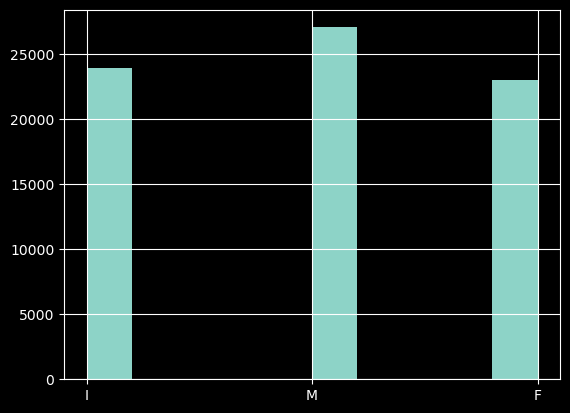

In [8]:
df.Sex.hist();

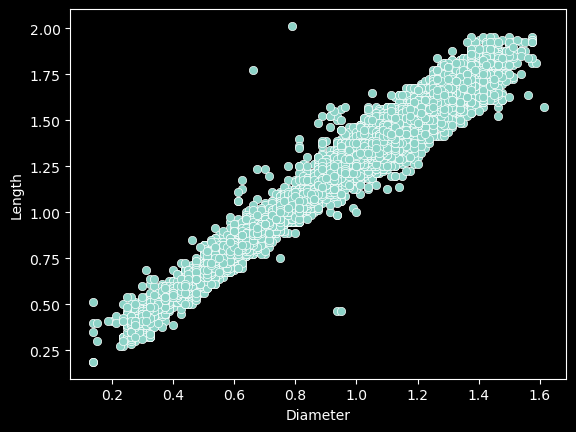

In [19]:
sns.scatterplot(x=df.Diameter, y=df.Length);

Здесь видим линейную корреляцию между диаметром и длиной краба.

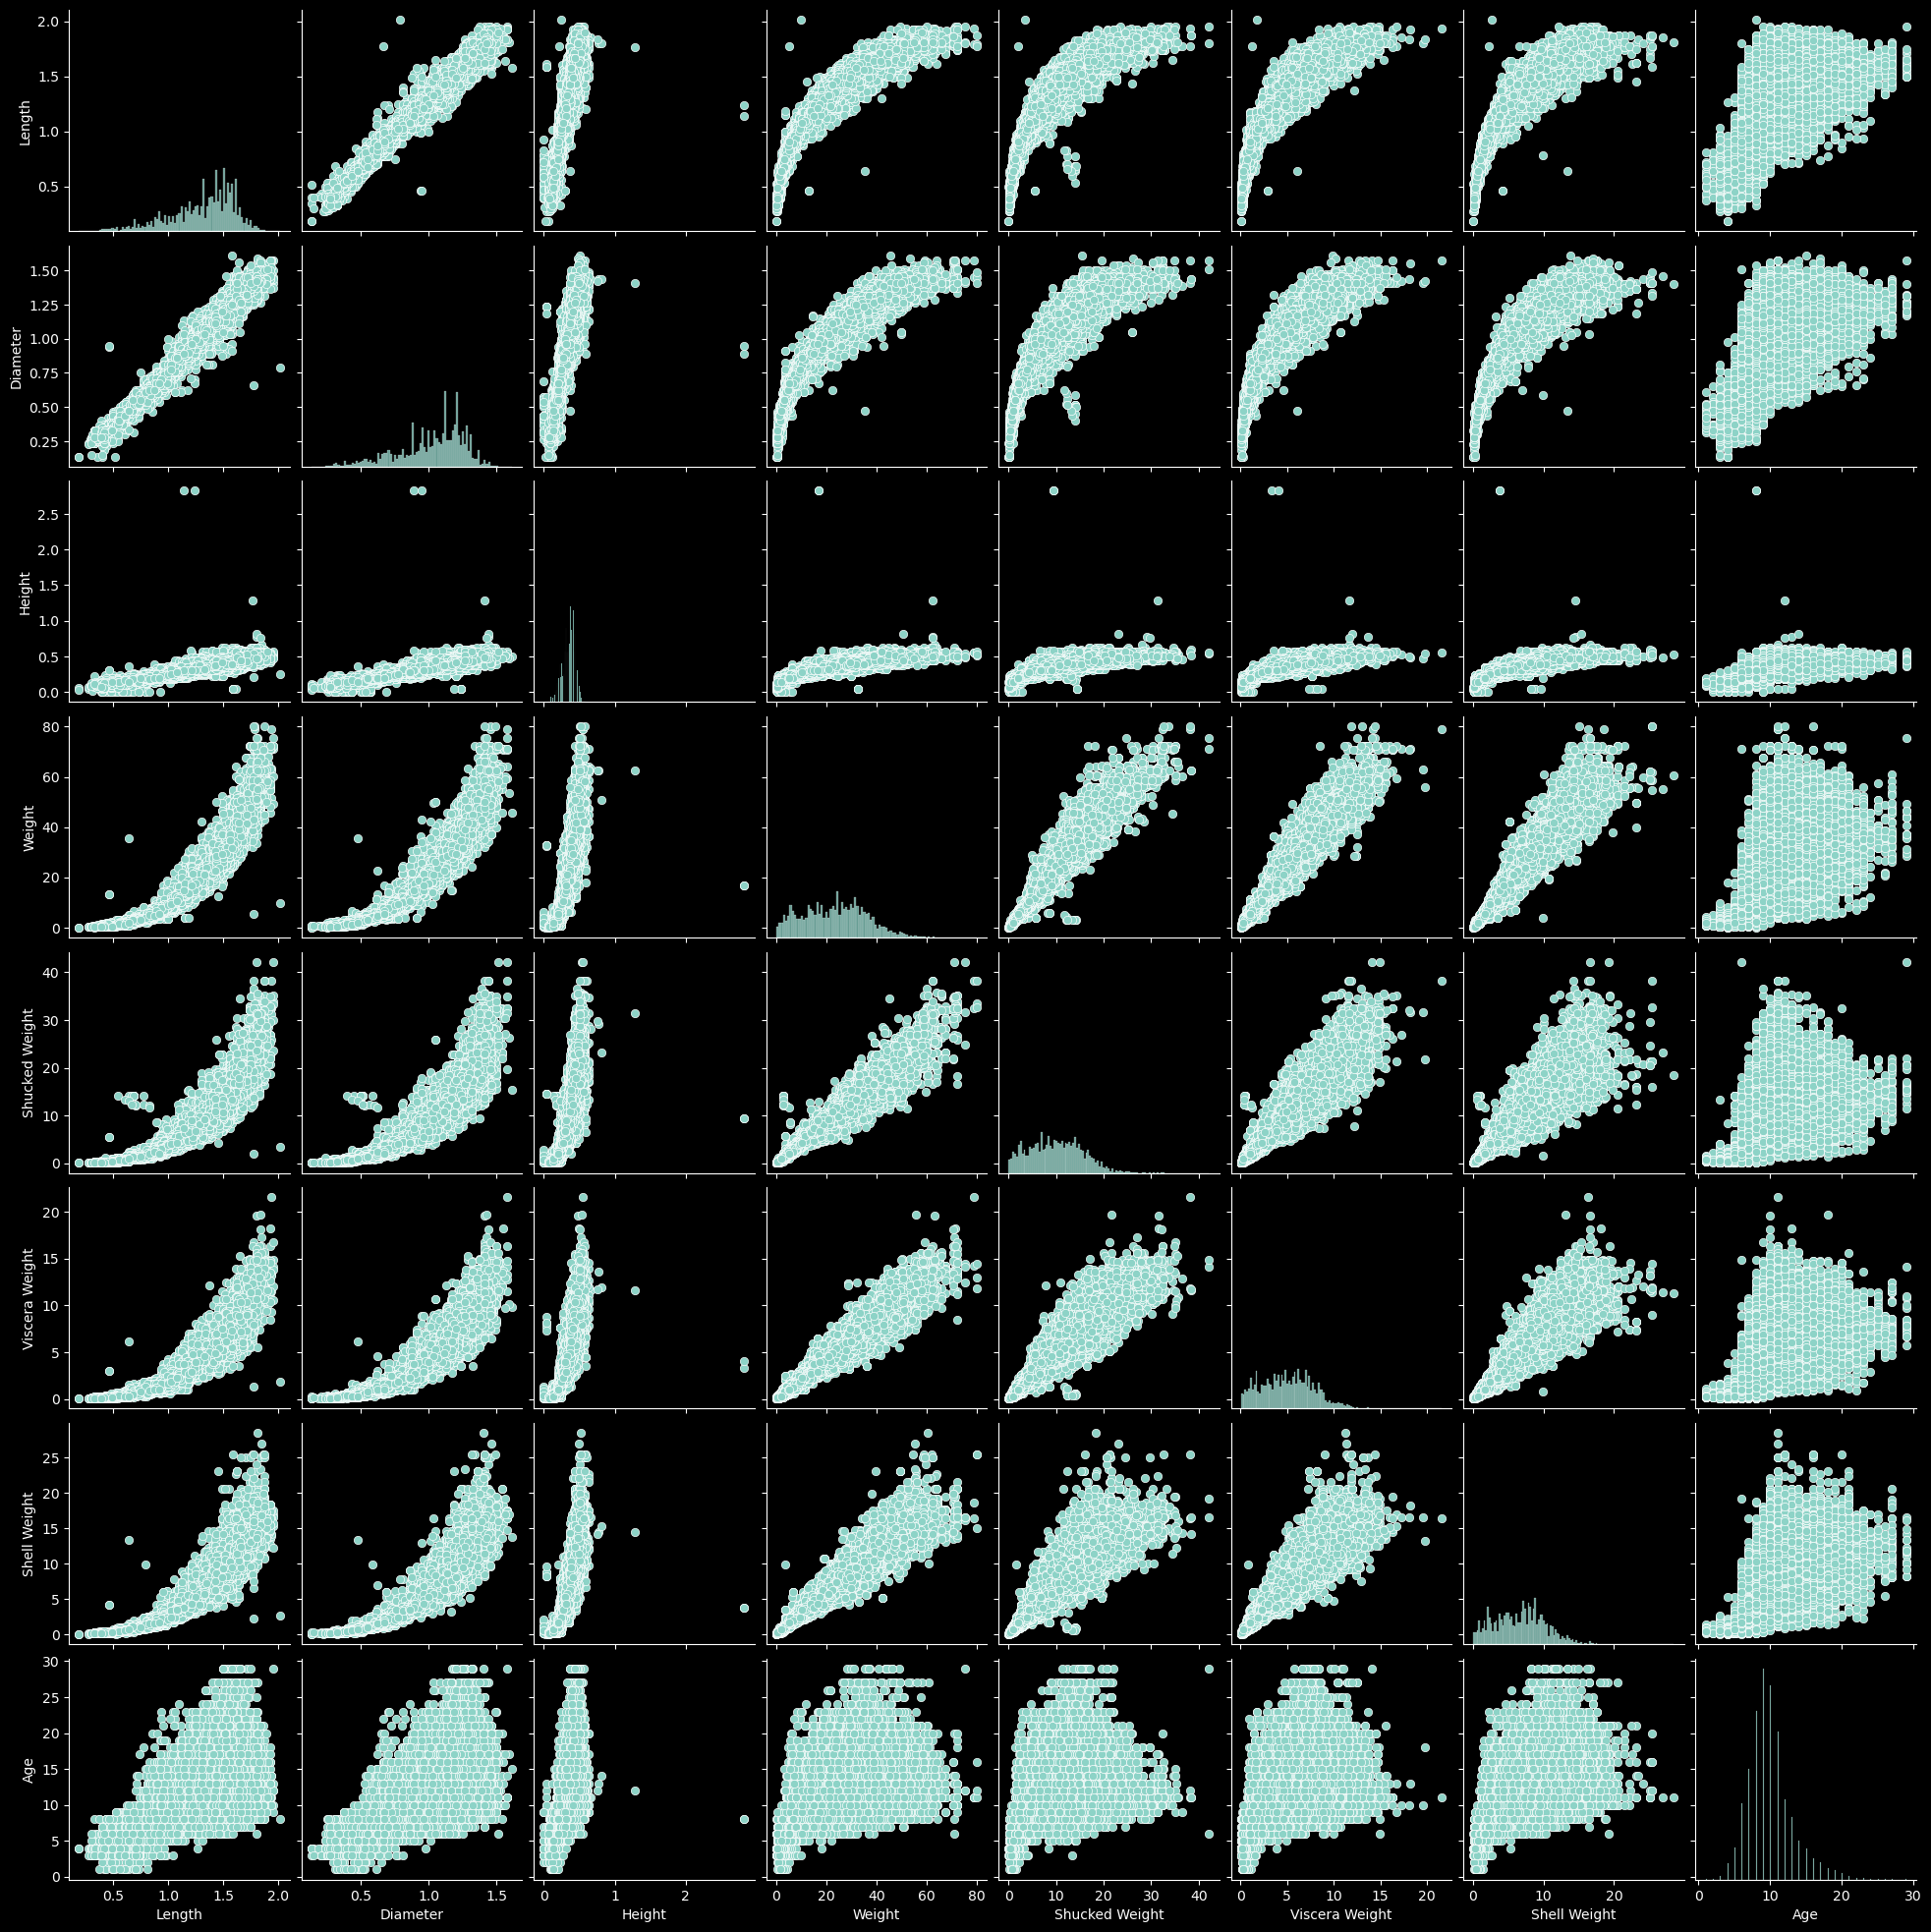

In [20]:
sns.pairplot(df);

<AxesSubplot:>

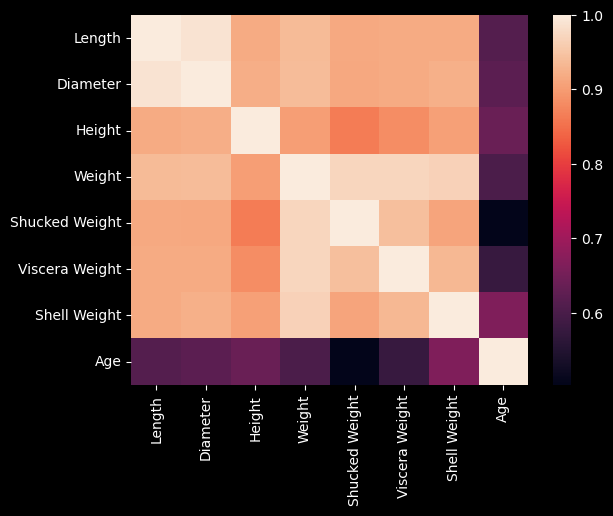

In [23]:
sns.heatmap(df.corr());

Видно что Age сильнее всего коррелирует с полями Shell Weight, Height, Diametr, Length

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 7.7+ MB


In [32]:
df.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age         Sex_F         Sex_I  \
count    74051.000000  74051.000000  74051.000000  74051.000000  74051.000000   
mean         5.058386      6.723870      9.967806      0.310732      0.323520   
std          2.792729      3.584372      3.175189      0.462796      0.467822   
min          0.042524      0.042524      1.000000      0.000000      0.000000   
25%          2.863300      3.968930      8.000000      0.000000      0.000000   
50%          4.989512      6.931453     10.000000      0.000000      0.000000   
75%          6.988152      9.071840     11.000000      1.000000      1.000000   
max         21.545620     28.491248     29.000000      1.000000      1.000000   

              Sex_M  
count  74051.000000  
mean       0.365748  
std        0.481643  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [27]:
df = pd.get_dummies(df)

In [30]:
X = df.drop("Age", axis=1)

In [33]:
Y = df.Age

<h1> Линейная регрессия </h1>

In [43]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [44]:
lr = LinearRegression(n_jobs=-1)

In [45]:
param_grid = {"fit_intercept" : [True, False],
             "normalize" : [True, False]}

In [47]:
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)
grid_search.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to 

GridSearchCV(cv=5, estimator=LinearRegression(n_jobs=-1),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [48]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'fit_intercept': False, 'normalize': True}
Best score:  0.5506519888587535


In [51]:
best_lr_model = grid_search.best_estimator_

In [53]:
y_predict_lr = best_lr_model.predict(df_test)

In [54]:
result = pd.DataFrame({'id': df_test.index, 'Age': y_predict_lr})
result.head()

result.to_csv('result_lr.csv', index = False)

<h1>Random Forest</h1>

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rf = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [500, 1000, 2000, 5000],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2)
grid_search.fit(X, Y)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 1000, 2000, 5000]})

In [106]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 2000}
Best score:  0.5469050170109355


In [107]:
rf_best = grid_search.best_estimator_
rf_best.fit(X, Y)

y_predict_rf = rf_best.predict(df_test)

In [108]:
y_predict_rf = np.round(y_predict_rf)
result = pd.DataFrame({'id': df_test.index, 'Age': y_predict_rf})
result.head()

result.to_csv('result_rf.csv', index = False)

<h1>CatBoost with Optuna</h1>

In [79]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
import optuna
from warnings import filterwarnings
from catboost import CatBoostRegressor

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [64]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train,y_train,random_state=42, test_size=0.1)

In [71]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, y_test.shape

((53316, 10), (53316,), (5924, 10), (5924,), (14811, 10), (14811,))

In [80]:
def check_rmse(model,x_val,y_val):
    pred = model.predict(x_val)
    return np.sqrt(mean_squared_error(y_val,pred))

In [99]:
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_float("learning_rate",0.007, 0.015)
    param['depth'] = trial.suggest_int('depth', 1, 6)
    param['l2_leaf_reg'] = trial.suggest_float('l2_leaf_reg', 3.0, 4.0)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 2, 3, 4])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = trial.suggest_int('iterations', 5000, 15000)
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 50
    param['random_state'] = 42
    param['logging_level'] = 'Silent'
    
    regressor = CatBoostRegressor(**param)
    regressor.fit(X_train.copy(), Y_train.copy(),
                  eval_set=[(X_val.copy(), Y_val.copy())],
                  early_stopping_rounds=100)
    return check_rmse(regressor,X_test,y_test)

In [100]:
%%time
study = optuna.create_study(study_name='catboost-seed')
study.optimize(objective, n_trials=10000, n_jobs=-1, timeout=24000)

[I 2023-06-04 18:07:14,987] A new study created in memory with name: catboost-seed
[I 2023-06-04 18:10:47,983] Trial 2 finished with value: 2.120153755822809 and parameters: {'learning_rate': 0.009000783839116962, 'depth': 1, 'l2_leaf_reg': 3.809194043687489, 'min_child_samples': 1, 'iterations': 5959}. Best is trial 2 with value: 2.120153755822809.
[I 2023-06-04 18:12:55,710] Trial 7 finished with value: 2.0323179561620055 and parameters: {'learning_rate': 0.013083439117510066, 'depth': 2, 'l2_leaf_reg': 3.735499181364976, 'min_child_samples': 2, 'iterations': 14956}. Best is trial 7 with value: 2.0323179561620055.
[I 2023-06-04 18:13:46,106] Trial 1 finished with value: 2.0288617369703585 and parameters: {'learning_rate': 0.012431650576299028, 'depth': 4, 'l2_leaf_reg': 3.036699518345495, 'min_child_samples': 3, 'iterations': 8854}. Best is trial 1 with value: 2.0288617369703585.
[I 2023-06-04 18:13:48,232] Trial 6 finished with value: 2.029914178975241 and parameters: {'learning_rat

[I 2023-06-04 18:44:30,197] Trial 30 finished with value: 2.0280903567228528 and parameters: {'learning_rate': 0.00749131195124143, 'depth': 5, 'l2_leaf_reg': 3.5053762563409494, 'min_child_samples': 3, 'iterations': 6672}. Best is trial 26 with value: 2.0276272137626927.
[I 2023-06-04 18:44:52,921] Trial 28 finished with value: 2.028601814698756 and parameters: {'learning_rate': 0.007124789651470206, 'depth': 6, 'l2_leaf_reg': 3.5093196107033737, 'min_child_samples': 3, 'iterations': 6614}. Best is trial 26 with value: 2.0276272137626927.
[I 2023-06-04 18:45:15,184] Trial 32 finished with value: 2.0283224161760978 and parameters: {'learning_rate': 0.013977536689804894, 'depth': 5, 'l2_leaf_reg': 3.5053817344708302, 'min_child_samples': 3, 'iterations': 6761}. Best is trial 26 with value: 2.0276272137626927.
[I 2023-06-04 18:45:38,692] Trial 33 finished with value: 2.028534304959351 and parameters: {'learning_rate': 0.012256891304641445, 'depth': 5, 'l2_leaf_reg': 3.171232577342243, 'm

[I 2023-06-04 19:26:20,736] Trial 62 finished with value: 2.029725399861045 and parameters: {'learning_rate': 0.009071581721759614, 'depth': 3, 'l2_leaf_reg': 3.419841324293366, 'min_child_samples': 4, 'iterations': 7369}. Best is trial 38 with value: 2.0276033189581555.
[I 2023-06-04 19:28:46,089] Trial 63 finished with value: 2.0287281909483497 and parameters: {'learning_rate': 0.00882278037171879, 'depth': 3, 'l2_leaf_reg': 3.548420805737671, 'min_child_samples': 4, 'iterations': 7209}. Best is trial 38 with value: 2.0276033189581555.
[I 2023-06-04 19:28:52,899] Trial 61 finished with value: 2.028740723346396 and parameters: {'learning_rate': 0.008974076936773216, 'depth': 5, 'l2_leaf_reg': 3.734809781195098, 'min_child_samples': 4, 'iterations': 7422}. Best is trial 38 with value: 2.0276033189581555.
[I 2023-06-04 19:30:35,371] Trial 60 finished with value: 2.0283197000648387 and parameters: {'learning_rate': 0.008696955763579543, 'depth': 5, 'l2_leaf_reg': 3.722620506828956, 'min_

[I 2023-06-04 20:10:22,076] Trial 91 finished with value: 2.0281799018266278 and parameters: {'learning_rate': 0.00723158049324395, 'depth': 5, 'l2_leaf_reg': 3.8843917535492474, 'min_child_samples': 3, 'iterations': 5586}. Best is trial 77 with value: 2.027429376017767.
[I 2023-06-04 20:10:47,107] Trial 92 finished with value: 2.028358163893054 and parameters: {'learning_rate': 0.0073229510832614145, 'depth': 5, 'l2_leaf_reg': 3.882452545858105, 'min_child_samples': 3, 'iterations': 5650}. Best is trial 77 with value: 2.027429376017767.
[I 2023-06-04 20:14:44,848] Trial 93 finished with value: 2.02849826336827 and parameters: {'learning_rate': 0.007235257077516884, 'depth': 5, 'l2_leaf_reg': 3.980379526905487, 'min_child_samples': 3, 'iterations': 6159}. Best is trial 77 with value: 2.027429376017767.
[I 2023-06-04 20:15:59,227] Trial 94 finished with value: 2.028546073030204 and parameters: {'learning_rate': 0.007241119843157545, 'depth': 5, 'l2_leaf_reg': 3.972021500493661, 'min_chi

[I 2023-06-04 20:49:50,506] Trial 122 finished with value: 2.028515588085823 and parameters: {'learning_rate': 0.008218476923044674, 'depth': 5, 'l2_leaf_reg': 3.469005831158613, 'min_child_samples': 1, 'iterations': 6555}. Best is trial 109 with value: 2.0271707048366845.
[I 2023-06-04 20:50:04,983] Trial 121 finished with value: 2.027032459931198 and parameters: {'learning_rate': 0.008128713545034078, 'depth': 5, 'l2_leaf_reg': 3.4382542622432197, 'min_child_samples': 1, 'iterations': 10934}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 20:50:47,038] Trial 123 finished with value: 2.0285847725671786 and parameters: {'learning_rate': 0.008191581161695093, 'depth': 5, 'l2_leaf_reg': 3.442360526424759, 'min_child_samples': 3, 'iterations': 10567}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 20:52:07,173] Trial 124 finished with value: 2.0281066565146704 and parameters: {'learning_rate': 0.007992226457555415, 'depth': 5, 'l2_leaf_reg': 3.4483586653164

[I 2023-06-04 21:31:31,103] Trial 151 finished with value: 2.0292835895824224 and parameters: {'learning_rate': 0.007161736191557057, 'depth': 5, 'l2_leaf_reg': 3.3801345714239734, 'min_child_samples': 2, 'iterations': 12397}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 21:32:59,567] Trial 152 finished with value: 2.028530350057402 and parameters: {'learning_rate': 0.007148386637941531, 'depth': 5, 'l2_leaf_reg': 3.9477770079335324, 'min_child_samples': 1, 'iterations': 12007}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 21:35:08,605] Trial 153 finished with value: 2.0287894201779912 and parameters: {'learning_rate': 0.007345569815140627, 'depth': 5, 'l2_leaf_reg': 3.3832454985154308, 'min_child_samples': 2, 'iterations': 12168}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 21:35:37,935] Trial 154 finished with value: 2.028782449134052 and parameters: {'learning_rate': 0.00788369316383912, 'depth': 5, 'l2_leaf_reg': 3.576730629631

[I 2023-06-04 22:10:43,628] Trial 182 finished with value: 2.0280707768373816 and parameters: {'learning_rate': 0.007890041500173915, 'depth': 5, 'l2_leaf_reg': 3.866536033646039, 'min_child_samples': 1, 'iterations': 10466}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 22:11:47,460] Trial 181 finished with value: 2.0280017747177266 and parameters: {'learning_rate': 0.0070011842246467055, 'depth': 5, 'l2_leaf_reg': 3.8512763855400536, 'min_child_samples': 1, 'iterations': 9474}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 22:13:56,984] Trial 184 finished with value: 2.02848344043135 and parameters: {'learning_rate': 0.007579667695786804, 'depth': 5, 'l2_leaf_reg': 3.864649377401363, 'min_child_samples': 1, 'iterations': 9607}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 22:14:42,006] Trial 183 finished with value: 2.028424946416245 and parameters: {'learning_rate': 0.0075498252246151195, 'depth': 5, 'l2_leaf_reg': 3.87980773070716

[I 2023-06-04 22:52:27,549] Trial 211 finished with value: 2.028070886758881 and parameters: {'learning_rate': 0.007850327751117943, 'depth': 5, 'l2_leaf_reg': 3.362525142595383, 'min_child_samples': 1, 'iterations': 8268}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 22:52:46,208] Trial 212 finished with value: 2.0280605877243896 and parameters: {'learning_rate': 0.007896331734560794, 'depth': 5, 'l2_leaf_reg': 3.9293226842331395, 'min_child_samples': 1, 'iterations': 7543}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 22:54:37,805] Trial 213 finished with value: 2.0279263410457764 and parameters: {'learning_rate': 0.007947268536337333, 'depth': 5, 'l2_leaf_reg': 3.901669863765487, 'min_child_samples': 1, 'iterations': 7719}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 22:56:50,630] Trial 215 finished with value: 2.0289768512132733 and parameters: {'learning_rate': 0.007857787753587576, 'depth': 5, 'l2_leaf_reg': 3.898133159060829

[I 2023-06-04 23:27:24,490] Trial 240 finished with value: 2.0283136981608134 and parameters: {'learning_rate': 0.008136742338636456, 'depth': 5, 'l2_leaf_reg': 3.5979917732156346, 'min_child_samples': 3, 'iterations': 5468}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 23:33:08,463] Trial 242 finished with value: 2.0278778209655326 and parameters: {'learning_rate': 0.00722473816477999, 'depth': 5, 'l2_leaf_reg': 3.604803461742917, 'min_child_samples': 3, 'iterations': 5474}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 23:33:16,975] Trial 244 finished with value: 2.0277250765489137 and parameters: {'learning_rate': 0.011705258360909873, 'depth': 5, 'l2_leaf_reg': 3.608935286006716, 'min_child_samples': 3, 'iterations': 5494}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-04 23:33:34,120] Trial 243 finished with value: 2.0283817146921557 and parameters: {'learning_rate': 0.007199764888641801, 'depth': 5, 'l2_leaf_reg': 3.733841852202076

[I 2023-06-05 00:05:45,199] Trial 271 finished with value: 2.0281759779065487 and parameters: {'learning_rate': 0.007772117870386007, 'depth': 5, 'l2_leaf_reg': 3.4705741595721284, 'min_child_samples': 1, 'iterations': 7142}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-05 00:06:11,969] Trial 272 finished with value: 2.0279612552555912 and parameters: {'learning_rate': 0.007762035350685869, 'depth': 5, 'l2_leaf_reg': 3.708195088031102, 'min_child_samples': 1, 'iterations': 5054}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-05 00:06:48,059] Trial 273 finished with value: 2.028621294557607 and parameters: {'learning_rate': 0.007768141428584839, 'depth': 5, 'l2_leaf_reg': 3.4703712012890104, 'min_child_samples': 1, 'iterations': 6988}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-05 00:07:21,967] Trial 274 finished with value: 2.0284198658739085 and parameters: {'learning_rate': 0.007781773088021359, 'depth': 5, 'l2_leaf_reg': 3.48237525389824

[I 2023-06-05 00:39:21,785] Trial 301 finished with value: 2.028821732610512 and parameters: {'learning_rate': 0.007285387560137136, 'depth': 5, 'l2_leaf_reg': 3.8302328070621714, 'min_child_samples': 1, 'iterations': 5342}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-05 00:40:56,856] Trial 303 finished with value: 2.027736696573881 and parameters: {'learning_rate': 0.00886819512128687, 'depth': 5, 'l2_leaf_reg': 3.338718577742535, 'min_child_samples': 1, 'iterations': 8109}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-05 00:41:00,266] Trial 302 finished with value: 2.0281799467494923 and parameters: {'learning_rate': 0.008329411102807415, 'depth': 5, 'l2_leaf_reg': 3.2876965284393913, 'min_child_samples': 1, 'iterations': 7929}. Best is trial 121 with value: 2.027032459931198.
[I 2023-06-05 00:41:23,768] Trial 304 finished with value: 2.027743725650846 and parameters: {'learning_rate': 0.009587098851992198, 'depth': 5, 'l2_leaf_reg': 3.3410266912782745,

Wall time: 6h 45min 26s


In [101]:
study.best_value

2.027032459931198

In [102]:
study.best_params

{'learning_rate': 0.008128713545034078,
 'depth': 5,
 'l2_leaf_reg': 3.4382542622432197,
 'min_child_samples': 1,
 'iterations': 10934}

In [103]:
%%time
optimized_regressor = CatBoostRegressor(learning_rate=study.best_params['learning_rate'],
                                        depth=study.best_params['depth'],
                                        l2_leaf_reg=study.best_params['l2_leaf_reg'],
                                        min_child_samples=study.best_params['min_child_samples'],
                                        grow_policy='Depthwise',
                                        iterations=study.best_params['iterations'],
                                        use_best_model=True,
                                        eval_metric='RMSE',
                                        od_type='iter',
                                        od_wait=50,
                                        random_state=42,
                                        logging_level='Silent')
optimized_regressor.fit(X_train.copy(), Y_train.copy(),
                        eval_set=[(X_test.copy(), y_test.copy())],
                        early_stopping_rounds=100)
pred_train = optimized_regressor.predict(X_train.copy())
print(f"rmse on training set : {check_rmse(optimized_regressor,X_train,Y_train)}")
print(f"rmse on valid set : {check_rmse(optimized_regressor,X_val,Y_val)}")

rmse on training set : 1.9469406485139515
rmse on valid set : 2.0381029658325382
Wall time: 2min


In [104]:
y_predicted_catboost_op = optimized_regressor.predict(df_test)
y_predicted_catboost_op = np.round(y_predicted_catboost_op)
result = pd.DataFrame({'id': df_test.index, 'Age': y_predicted_catboost_op})
result.head()
result.to_csv('result_catboost_optuna.csv', index = False)

<h1>Тюнинг CatBoost</h1>

In [126]:
X_without_H = X.drop("Height", axis=1)

In [131]:
df_test_without_H = df_test.drop("Height", axis = 1)

In [128]:
cat = CatBoostRegressor(learning_rate=study.best_params['learning_rate'],
                                        depth=6,
                                        l2_leaf_reg=study.best_params['l2_leaf_reg'],
                                        min_child_samples=study.best_params['min_child_samples'],
                                        grow_policy='Depthwise',
                                        iterations=8000)

cat.fit(X_without_H, Y)

0:	learn: 3.1614659	total: 281ms	remaining: 37m 27s
1:	learn: 3.1478527	total: 365ms	remaining: 24m 18s
2:	learn: 3.1346340	total: 445ms	remaining: 19m 46s
3:	learn: 3.1214005	total: 516ms	remaining: 17m 12s
4:	learn: 3.1083086	total: 614ms	remaining: 16m 22s
5:	learn: 3.0954542	total: 678ms	remaining: 15m 3s
6:	learn: 3.0825514	total: 745ms	remaining: 14m 10s
7:	learn: 3.0697638	total: 809ms	remaining: 13m 28s
8:	learn: 3.0573676	total: 870ms	remaining: 12m 52s
9:	learn: 3.0450514	total: 924ms	remaining: 12m 18s
10:	learn: 3.0328530	total: 983ms	remaining: 11m 54s
11:	learn: 3.0206876	total: 1.05s	remaining: 11m 38s
12:	learn: 3.0087124	total: 1.19s	remaining: 12m 9s
13:	learn: 2.9969147	total: 1.31s	remaining: 12m 27s
14:	learn: 2.9851958	total: 1.39s	remaining: 12m 17s
15:	learn: 2.9735125	total: 1.45s	remaining: 12m 2s
16:	learn: 2.9620988	total: 1.58s	remaining: 12m 24s
17:	learn: 2.9508710	total: 1.66s	remaining: 12m 14s
18:	learn: 2.9396790	total: 1.72s	remaining: 12m 4s
19:	lea

159:	learn: 2.2016775	total: 10.8s	remaining: 8m 46s
160:	learn: 2.1998678	total: 10.8s	remaining: 8m 47s
161:	learn: 2.1981633	total: 10.9s	remaining: 8m 48s
162:	learn: 2.1964756	total: 11s	remaining: 8m 48s
163:	learn: 2.1947444	total: 11.1s	remaining: 8m 48s
164:	learn: 2.1930129	total: 11.1s	remaining: 8m 48s
165:	learn: 2.1913210	total: 11.2s	remaining: 8m 49s
166:	learn: 2.1895983	total: 11.3s	remaining: 8m 48s
167:	learn: 2.1879219	total: 11.3s	remaining: 8m 47s
168:	learn: 2.1862109	total: 11.4s	remaining: 8m 47s
169:	learn: 2.1845582	total: 11.5s	remaining: 8m 47s
170:	learn: 2.1829350	total: 11.5s	remaining: 8m 47s
171:	learn: 2.1814287	total: 11.6s	remaining: 8m 47s
172:	learn: 2.1799772	total: 11.6s	remaining: 8m 46s
173:	learn: 2.1784023	total: 11.7s	remaining: 8m 48s
174:	learn: 2.1769135	total: 11.8s	remaining: 8m 47s
175:	learn: 2.1754322	total: 11.9s	remaining: 8m 47s
176:	learn: 2.1738689	total: 12s	remaining: 8m 48s
177:	learn: 2.1723839	total: 12s	remaining: 8m 48s

315:	learn: 2.0756746	total: 21.6s	remaining: 8m 44s
316:	learn: 2.0753859	total: 21.6s	remaining: 8m 44s
317:	learn: 2.0750758	total: 21.7s	remaining: 8m 44s
318:	learn: 2.0748015	total: 21.8s	remaining: 8m 44s
319:	learn: 2.0745074	total: 21.9s	remaining: 8m 44s
320:	learn: 2.0742120	total: 22s	remaining: 8m 45s
321:	learn: 2.0739386	total: 22s	remaining: 8m 44s
322:	learn: 2.0736743	total: 22.1s	remaining: 8m 44s
323:	learn: 2.0734156	total: 22.1s	remaining: 8m 44s
324:	learn: 2.0731651	total: 22.2s	remaining: 8m 44s
325:	learn: 2.0728822	total: 22.3s	remaining: 8m 44s
326:	learn: 2.0725937	total: 22.3s	remaining: 8m 44s
327:	learn: 2.0722711	total: 22.4s	remaining: 8m 43s
328:	learn: 2.0719794	total: 22.5s	remaining: 8m 43s
329:	learn: 2.0716666	total: 22.5s	remaining: 8m 43s
330:	learn: 2.0714346	total: 22.6s	remaining: 8m 44s
331:	learn: 2.0711575	total: 22.7s	remaining: 8m 44s
332:	learn: 2.0709332	total: 22.8s	remaining: 8m 44s
333:	learn: 2.0706672	total: 22.8s	remaining: 8m 4

473:	learn: 2.0485401	total: 34.1s	remaining: 9m 1s
474:	learn: 2.0484106	total: 34.2s	remaining: 9m 1s
475:	learn: 2.0482554	total: 34.2s	remaining: 9m 1s
476:	learn: 2.0481598	total: 34.3s	remaining: 9m 1s
477:	learn: 2.0480369	total: 34.4s	remaining: 9m
478:	learn: 2.0479565	total: 34.4s	remaining: 9m
479:	learn: 2.0478793	total: 34.5s	remaining: 9m
480:	learn: 2.0477318	total: 34.6s	remaining: 9m
481:	learn: 2.0476270	total: 34.7s	remaining: 9m
482:	learn: 2.0474927	total: 34.8s	remaining: 9m 1s
483:	learn: 2.0474024	total: 34.9s	remaining: 9m 1s
484:	learn: 2.0473079	total: 34.9s	remaining: 9m 1s
485:	learn: 2.0472341	total: 35s	remaining: 9m 1s
486:	learn: 2.0471268	total: 35.1s	remaining: 9m 1s
487:	learn: 2.0470625	total: 35.2s	remaining: 9m 1s
488:	learn: 2.0469497	total: 35.3s	remaining: 9m 1s
489:	learn: 2.0468890	total: 35.3s	remaining: 9m 1s
490:	learn: 2.0467723	total: 35.4s	remaining: 9m 1s
491:	learn: 2.0466796	total: 35.5s	remaining: 9m 1s
492:	learn: 2.0466106	total: 

633:	learn: 2.0359851	total: 46.7s	remaining: 9m 2s
634:	learn: 2.0359145	total: 46.7s	remaining: 9m 2s
635:	learn: 2.0358345	total: 46.8s	remaining: 9m 1s
636:	learn: 2.0357942	total: 46.9s	remaining: 9m 2s
637:	learn: 2.0357633	total: 47s	remaining: 9m 2s
638:	learn: 2.0356975	total: 47.1s	remaining: 9m 2s
639:	learn: 2.0356527	total: 47.2s	remaining: 9m 2s
640:	learn: 2.0355883	total: 47.2s	remaining: 9m 2s
641:	learn: 2.0355116	total: 47.3s	remaining: 9m 2s
642:	learn: 2.0354806	total: 47.5s	remaining: 9m 2s
643:	learn: 2.0353975	total: 47.5s	remaining: 9m 2s
644:	learn: 2.0353630	total: 47.6s	remaining: 9m 2s
645:	learn: 2.0352966	total: 47.7s	remaining: 9m 2s
646:	learn: 2.0352078	total: 47.8s	remaining: 9m 2s
647:	learn: 2.0351743	total: 47.8s	remaining: 9m 2s
648:	learn: 2.0351386	total: 47.9s	remaining: 9m 2s
649:	learn: 2.0350873	total: 48s	remaining: 9m 3s
650:	learn: 2.0350438	total: 48.1s	remaining: 9m 3s
651:	learn: 2.0349703	total: 48.2s	remaining: 9m 3s
652:	learn: 2.03

793:	learn: 2.0277623	total: 57.9s	remaining: 8m 45s
794:	learn: 2.0277132	total: 58s	remaining: 8m 45s
795:	learn: 2.0276450	total: 58.1s	remaining: 8m 45s
796:	learn: 2.0275946	total: 58.2s	remaining: 8m 45s
797:	learn: 2.0275419	total: 58.2s	remaining: 8m 45s
798:	learn: 2.0274862	total: 58.3s	remaining: 8m 45s
799:	learn: 2.0274254	total: 58.3s	remaining: 8m 45s
800:	learn: 2.0273920	total: 58.4s	remaining: 8m 45s
801:	learn: 2.0273397	total: 58.5s	remaining: 8m 45s
802:	learn: 2.0272841	total: 58.6s	remaining: 8m 44s
803:	learn: 2.0272303	total: 58.6s	remaining: 8m 44s
804:	learn: 2.0271870	total: 58.7s	remaining: 8m 44s
805:	learn: 2.0271689	total: 58.7s	remaining: 8m 44s
806:	learn: 2.0271000	total: 58.8s	remaining: 8m 44s
807:	learn: 2.0270685	total: 58.8s	remaining: 8m 43s
808:	learn: 2.0270082	total: 58.9s	remaining: 8m 43s
809:	learn: 2.0269846	total: 59s	remaining: 8m 43s
810:	learn: 2.0269234	total: 59s	remaining: 8m 43s
811:	learn: 2.0268802	total: 59.1s	remaining: 8m 43s

949:	learn: 2.0210722	total: 1m 7s	remaining: 8m 19s
950:	learn: 2.0210468	total: 1m 7s	remaining: 8m 19s
951:	learn: 2.0209857	total: 1m 7s	remaining: 8m 19s
952:	learn: 2.0209616	total: 1m 7s	remaining: 8m 19s
953:	learn: 2.0209419	total: 1m 7s	remaining: 8m 19s
954:	learn: 2.0209113	total: 1m 7s	remaining: 8m 19s
955:	learn: 2.0208816	total: 1m 7s	remaining: 8m 19s
956:	learn: 2.0208502	total: 1m 7s	remaining: 8m 18s
957:	learn: 2.0208075	total: 1m 7s	remaining: 8m 18s
958:	learn: 2.0207540	total: 1m 7s	remaining: 8m 18s
959:	learn: 2.0207115	total: 1m 7s	remaining: 8m 18s
960:	learn: 2.0206340	total: 1m 8s	remaining: 8m 18s
961:	learn: 2.0205808	total: 1m 8s	remaining: 8m 18s
962:	learn: 2.0205489	total: 1m 8s	remaining: 8m 18s
963:	learn: 2.0205309	total: 1m 8s	remaining: 8m 17s
964:	learn: 2.0204902	total: 1m 8s	remaining: 8m 17s
965:	learn: 2.0204542	total: 1m 8s	remaining: 8m 17s
966:	learn: 2.0204272	total: 1m 8s	remaining: 8m 17s
967:	learn: 2.0204103	total: 1m 8s	remaining: 

1104:	learn: 2.0152296	total: 1m 16s	remaining: 7m 59s
1105:	learn: 2.0151775	total: 1m 16s	remaining: 7m 59s
1106:	learn: 2.0151503	total: 1m 16s	remaining: 7m 59s
1107:	learn: 2.0151163	total: 1m 17s	remaining: 7m 59s
1108:	learn: 2.0150706	total: 1m 17s	remaining: 7m 59s
1109:	learn: 2.0150318	total: 1m 17s	remaining: 7m 58s
1110:	learn: 2.0150015	total: 1m 17s	remaining: 7m 58s
1111:	learn: 2.0149644	total: 1m 17s	remaining: 7m 58s
1112:	learn: 2.0149425	total: 1m 17s	remaining: 7m 58s
1113:	learn: 2.0148920	total: 1m 17s	remaining: 7m 58s
1114:	learn: 2.0148402	total: 1m 17s	remaining: 7m 58s
1115:	learn: 2.0147900	total: 1m 17s	remaining: 7m 58s
1116:	learn: 2.0147408	total: 1m 17s	remaining: 7m 57s
1117:	learn: 2.0147108	total: 1m 17s	remaining: 7m 57s
1118:	learn: 2.0146472	total: 1m 17s	remaining: 7m 57s
1119:	learn: 2.0146124	total: 1m 17s	remaining: 7m 57s
1120:	learn: 2.0145542	total: 1m 17s	remaining: 7m 57s
1121:	learn: 2.0145186	total: 1m 17s	remaining: 7m 57s
1122:	lear

1255:	learn: 2.0095835	total: 1m 26s	remaining: 7m 41s
1256:	learn: 2.0095461	total: 1m 26s	remaining: 7m 41s
1257:	learn: 2.0095004	total: 1m 26s	remaining: 7m 41s
1258:	learn: 2.0094542	total: 1m 26s	remaining: 7m 41s
1259:	learn: 2.0094345	total: 1m 26s	remaining: 7m 41s
1260:	learn: 2.0093896	total: 1m 26s	remaining: 7m 41s
1261:	learn: 2.0093534	total: 1m 26s	remaining: 7m 41s
1262:	learn: 2.0093047	total: 1m 26s	remaining: 7m 41s
1263:	learn: 2.0092822	total: 1m 26s	remaining: 7m 41s
1264:	learn: 2.0092264	total: 1m 26s	remaining: 7m 41s
1265:	learn: 2.0091939	total: 1m 26s	remaining: 7m 41s
1266:	learn: 2.0091667	total: 1m 26s	remaining: 7m 40s
1267:	learn: 2.0091141	total: 1m 26s	remaining: 7m 40s
1268:	learn: 2.0090891	total: 1m 26s	remaining: 7m 40s
1269:	learn: 2.0090646	total: 1m 26s	remaining: 7m 40s
1270:	learn: 2.0090230	total: 1m 26s	remaining: 7m 40s
1271:	learn: 2.0089849	total: 1m 27s	remaining: 7m 40s
1272:	learn: 2.0089337	total: 1m 27s	remaining: 7m 40s
1273:	lear

1404:	learn: 2.0029234	total: 1m 35s	remaining: 7m 27s
1405:	learn: 2.0028991	total: 1m 35s	remaining: 7m 27s
1406:	learn: 2.0028690	total: 1m 35s	remaining: 7m 27s
1407:	learn: 2.0028323	total: 1m 35s	remaining: 7m 27s
1408:	learn: 2.0027557	total: 1m 35s	remaining: 7m 27s
1409:	learn: 2.0027087	total: 1m 35s	remaining: 7m 26s
1410:	learn: 2.0026812	total: 1m 35s	remaining: 7m 26s
1411:	learn: 2.0026266	total: 1m 35s	remaining: 7m 26s
1412:	learn: 2.0025743	total: 1m 35s	remaining: 7m 26s
1413:	learn: 2.0025479	total: 1m 35s	remaining: 7m 26s
1414:	learn: 2.0025175	total: 1m 35s	remaining: 7m 26s
1415:	learn: 2.0024341	total: 1m 36s	remaining: 7m 26s
1416:	learn: 2.0023593	total: 1m 36s	remaining: 7m 26s
1417:	learn: 2.0023381	total: 1m 36s	remaining: 7m 26s
1418:	learn: 2.0023023	total: 1m 36s	remaining: 7m 26s
1419:	learn: 2.0022407	total: 1m 36s	remaining: 7m 26s
1420:	learn: 2.0022088	total: 1m 36s	remaining: 7m 26s
1421:	learn: 2.0021302	total: 1m 36s	remaining: 7m 25s
1422:	lear

1555:	learn: 1.9958124	total: 1m 45s	remaining: 7m 14s
1556:	learn: 1.9957296	total: 1m 45s	remaining: 7m 14s
1557:	learn: 1.9956607	total: 1m 45s	remaining: 7m 14s
1558:	learn: 1.9956264	total: 1m 45s	remaining: 7m 14s
1559:	learn: 1.9955692	total: 1m 45s	remaining: 7m 14s
1560:	learn: 1.9954727	total: 1m 45s	remaining: 7m 15s
1561:	learn: 1.9954486	total: 1m 45s	remaining: 7m 15s
1562:	learn: 1.9954062	total: 1m 45s	remaining: 7m 14s
1563:	learn: 1.9953385	total: 1m 45s	remaining: 7m 14s
1564:	learn: 1.9953241	total: 1m 45s	remaining: 7m 14s
1565:	learn: 1.9953186	total: 1m 45s	remaining: 7m 14s
1566:	learn: 1.9952841	total: 1m 45s	remaining: 7m 14s
1567:	learn: 1.9952718	total: 1m 45s	remaining: 7m 14s
1568:	learn: 1.9951850	total: 1m 45s	remaining: 7m 14s
1569:	learn: 1.9951112	total: 1m 46s	remaining: 7m 14s
1570:	learn: 1.9950484	total: 1m 46s	remaining: 7m 14s
1571:	learn: 1.9949622	total: 1m 46s	remaining: 7m 14s
1572:	learn: 1.9948991	total: 1m 46s	remaining: 7m 14s
1573:	lear

1706:	learn: 1.9895938	total: 1m 54s	remaining: 7m 1s
1707:	learn: 1.9895827	total: 1m 54s	remaining: 7m 1s
1708:	learn: 1.9894703	total: 1m 54s	remaining: 7m
1709:	learn: 1.9893985	total: 1m 54s	remaining: 7m
1710:	learn: 1.9893295	total: 1m 54s	remaining: 7m
1711:	learn: 1.9893064	total: 1m 54s	remaining: 7m
1712:	learn: 1.9892168	total: 1m 54s	remaining: 7m
1713:	learn: 1.9892080	total: 1m 54s	remaining: 7m
1714:	learn: 1.9891932	total: 1m 54s	remaining: 7m
1715:	learn: 1.9891833	total: 1m 54s	remaining: 7m
1716:	learn: 1.9891792	total: 1m 54s	remaining: 7m
1717:	learn: 1.9891124	total: 1m 54s	remaining: 6m 59s
1718:	learn: 1.9891020	total: 1m 54s	remaining: 7m
1719:	learn: 1.9890577	total: 1m 55s	remaining: 7m
1720:	learn: 1.9890528	total: 1m 55s	remaining: 7m
1721:	learn: 1.9890147	total: 1m 55s	remaining: 7m
1722:	learn: 1.9889783	total: 1m 55s	remaining: 7m
1723:	learn: 1.9889131	total: 1m 55s	remaining: 6m 59s
1724:	learn: 1.9888630	total: 1m 55s	remaining: 6m 59s
1725:	learn: 

1859:	learn: 1.9837095	total: 2m 3s	remaining: 6m 47s
1860:	learn: 1.9836806	total: 2m 3s	remaining: 6m 47s
1861:	learn: 1.9836479	total: 2m 3s	remaining: 6m 47s
1862:	learn: 1.9836051	total: 2m 3s	remaining: 6m 47s
1863:	learn: 1.9835907	total: 2m 3s	remaining: 6m 47s
1864:	learn: 1.9835884	total: 2m 3s	remaining: 6m 47s
1865:	learn: 1.9835739	total: 2m 3s	remaining: 6m 47s
1866:	learn: 1.9834746	total: 2m 3s	remaining: 6m 47s
1867:	learn: 1.9834348	total: 2m 4s	remaining: 6m 47s
1868:	learn: 1.9833799	total: 2m 4s	remaining: 6m 47s
1869:	learn: 1.9832734	total: 2m 4s	remaining: 6m 47s
1870:	learn: 1.9832494	total: 2m 4s	remaining: 6m 46s
1871:	learn: 1.9832021	total: 2m 4s	remaining: 6m 46s
1872:	learn: 1.9831314	total: 2m 4s	remaining: 6m 46s
1873:	learn: 1.9831102	total: 2m 4s	remaining: 6m 46s
1874:	learn: 1.9830615	total: 2m 4s	remaining: 6m 46s
1875:	learn: 1.9830311	total: 2m 4s	remaining: 6m 46s
1876:	learn: 1.9829387	total: 2m 4s	remaining: 6m 46s
1877:	learn: 1.9828954	total

2011:	learn: 1.9779651	total: 2m 14s	remaining: 6m 40s
2012:	learn: 1.9779261	total: 2m 14s	remaining: 6m 40s
2013:	learn: 1.9779240	total: 2m 14s	remaining: 6m 40s
2014:	learn: 1.9779073	total: 2m 14s	remaining: 6m 40s
2015:	learn: 1.9778577	total: 2m 14s	remaining: 6m 40s
2016:	learn: 1.9777997	total: 2m 14s	remaining: 6m 40s
2017:	learn: 1.9777514	total: 2m 14s	remaining: 6m 39s
2018:	learn: 1.9776840	total: 2m 15s	remaining: 6m 39s
2019:	learn: 1.9776362	total: 2m 15s	remaining: 6m 39s
2020:	learn: 1.9776013	total: 2m 15s	remaining: 6m 39s
2021:	learn: 1.9775872	total: 2m 15s	remaining: 6m 39s
2022:	learn: 1.9775559	total: 2m 15s	remaining: 6m 39s
2023:	learn: 1.9775475	total: 2m 15s	remaining: 6m 39s
2024:	learn: 1.9774713	total: 2m 15s	remaining: 6m 39s
2025:	learn: 1.9774676	total: 2m 15s	remaining: 6m 39s
2026:	learn: 1.9774047	total: 2m 15s	remaining: 6m 39s
2027:	learn: 1.9773547	total: 2m 15s	remaining: 6m 39s
2028:	learn: 1.9772903	total: 2m 15s	remaining: 6m 39s
2029:	lear

2162:	learn: 1.9720576	total: 2m 25s	remaining: 6m 32s
2163:	learn: 1.9720203	total: 2m 25s	remaining: 6m 32s
2164:	learn: 1.9719459	total: 2m 25s	remaining: 6m 32s
2165:	learn: 1.9719260	total: 2m 25s	remaining: 6m 32s
2166:	learn: 1.9718835	total: 2m 25s	remaining: 6m 32s
2167:	learn: 1.9718629	total: 2m 25s	remaining: 6m 32s
2168:	learn: 1.9718060	total: 2m 25s	remaining: 6m 32s
2169:	learn: 1.9717643	total: 2m 26s	remaining: 6m 32s
2170:	learn: 1.9717062	total: 2m 26s	remaining: 6m 32s
2171:	learn: 1.9716400	total: 2m 26s	remaining: 6m 32s
2172:	learn: 1.9715808	total: 2m 26s	remaining: 6m 32s
2173:	learn: 1.9715507	total: 2m 26s	remaining: 6m 32s
2174:	learn: 1.9714920	total: 2m 26s	remaining: 6m 32s
2175:	learn: 1.9714477	total: 2m 26s	remaining: 6m 32s
2176:	learn: 1.9713964	total: 2m 26s	remaining: 6m 31s
2177:	learn: 1.9713510	total: 2m 26s	remaining: 6m 31s
2178:	learn: 1.9713160	total: 2m 26s	remaining: 6m 31s
2179:	learn: 1.9712568	total: 2m 26s	remaining: 6m 31s
2180:	lear

2314:	learn: 1.9665265	total: 2m 35s	remaining: 6m 22s
2315:	learn: 1.9664502	total: 2m 35s	remaining: 6m 22s
2316:	learn: 1.9663879	total: 2m 35s	remaining: 6m 22s
2317:	learn: 1.9663432	total: 2m 35s	remaining: 6m 21s
2318:	learn: 1.9663208	total: 2m 35s	remaining: 6m 21s
2319:	learn: 1.9662700	total: 2m 35s	remaining: 6m 21s
2320:	learn: 1.9662267	total: 2m 36s	remaining: 6m 21s
2321:	learn: 1.9662198	total: 2m 36s	remaining: 6m 21s
2322:	learn: 1.9661653	total: 2m 36s	remaining: 6m 21s
2323:	learn: 1.9661240	total: 2m 36s	remaining: 6m 21s
2324:	learn: 1.9661020	total: 2m 36s	remaining: 6m 21s
2325:	learn: 1.9660687	total: 2m 36s	remaining: 6m 21s
2326:	learn: 1.9660351	total: 2m 36s	remaining: 6m 21s
2327:	learn: 1.9659775	total: 2m 36s	remaining: 6m 21s
2328:	learn: 1.9659271	total: 2m 36s	remaining: 6m 21s
2329:	learn: 1.9659181	total: 2m 36s	remaining: 6m 21s
2330:	learn: 1.9658984	total: 2m 36s	remaining: 6m 20s
2331:	learn: 1.9658556	total: 2m 36s	remaining: 6m 20s
2332:	lear

2466:	learn: 1.9610918	total: 2m 45s	remaining: 6m 11s
2467:	learn: 1.9610555	total: 2m 45s	remaining: 6m 11s
2468:	learn: 1.9610387	total: 2m 45s	remaining: 6m 11s
2469:	learn: 1.9609947	total: 2m 45s	remaining: 6m 11s
2470:	learn: 1.9609592	total: 2m 45s	remaining: 6m 10s
2471:	learn: 1.9608797	total: 2m 45s	remaining: 6m 10s
2472:	learn: 1.9608513	total: 2m 45s	remaining: 6m 10s
2473:	learn: 1.9608238	total: 2m 46s	remaining: 6m 10s
2474:	learn: 1.9608111	total: 2m 46s	remaining: 6m 10s
2475:	learn: 1.9607986	total: 2m 46s	remaining: 6m 10s
2476:	learn: 1.9607952	total: 2m 46s	remaining: 6m 10s
2477:	learn: 1.9607769	total: 2m 46s	remaining: 6m 10s
2478:	learn: 1.9607401	total: 2m 46s	remaining: 6m 10s
2479:	learn: 1.9607195	total: 2m 46s	remaining: 6m 10s
2480:	learn: 1.9606688	total: 2m 46s	remaining: 6m 10s
2481:	learn: 1.9606199	total: 2m 46s	remaining: 6m 10s
2482:	learn: 1.9606106	total: 2m 46s	remaining: 6m 10s
2483:	learn: 1.9605729	total: 2m 46s	remaining: 6m 10s
2484:	lear

2620:	learn: 1.9554503	total: 2m 55s	remaining: 6m
2621:	learn: 1.9553547	total: 2m 55s	remaining: 6m
2622:	learn: 1.9552915	total: 2m 55s	remaining: 6m
2623:	learn: 1.9552719	total: 2m 55s	remaining: 6m
2624:	learn: 1.9552622	total: 2m 55s	remaining: 6m
2625:	learn: 1.9552274	total: 2m 55s	remaining: 5m 59s
2626:	learn: 1.9551726	total: 2m 55s	remaining: 5m 59s
2627:	learn: 1.9551587	total: 2m 56s	remaining: 5m 59s
2628:	learn: 1.9551377	total: 2m 56s	remaining: 5m 59s
2629:	learn: 1.9551337	total: 2m 56s	remaining: 5m 59s
2630:	learn: 1.9550869	total: 2m 56s	remaining: 5m 59s
2631:	learn: 1.9550485	total: 2m 56s	remaining: 5m 59s
2632:	learn: 1.9549964	total: 2m 56s	remaining: 5m 59s
2633:	learn: 1.9549698	total: 2m 56s	remaining: 5m 59s
2634:	learn: 1.9549475	total: 2m 56s	remaining: 5m 59s
2635:	learn: 1.9549091	total: 2m 56s	remaining: 5m 59s
2636:	learn: 1.9548693	total: 2m 56s	remaining: 5m 59s
2637:	learn: 1.9548193	total: 2m 56s	remaining: 5m 59s
2638:	learn: 1.9548107	total: 

2772:	learn: 1.9506010	total: 3m 5s	remaining: 5m 49s
2773:	learn: 1.9505452	total: 3m 5s	remaining: 5m 49s
2774:	learn: 1.9504822	total: 3m 5s	remaining: 5m 49s
2775:	learn: 1.9504487	total: 3m 5s	remaining: 5m 49s
2776:	learn: 1.9503956	total: 3m 5s	remaining: 5m 49s
2777:	learn: 1.9503561	total: 3m 5s	remaining: 5m 49s
2778:	learn: 1.9503396	total: 3m 5s	remaining: 5m 48s
2779:	learn: 1.9502893	total: 3m 5s	remaining: 5m 48s
2780:	learn: 1.9502725	total: 3m 5s	remaining: 5m 48s
2781:	learn: 1.9502368	total: 3m 5s	remaining: 5m 48s
2782:	learn: 1.9502212	total: 3m 6s	remaining: 5m 48s
2783:	learn: 1.9502144	total: 3m 6s	remaining: 5m 48s
2784:	learn: 1.9502100	total: 3m 6s	remaining: 5m 48s
2785:	learn: 1.9501982	total: 3m 6s	remaining: 5m 48s
2786:	learn: 1.9501902	total: 3m 6s	remaining: 5m 48s
2787:	learn: 1.9501656	total: 3m 6s	remaining: 5m 48s
2788:	learn: 1.9501506	total: 3m 6s	remaining: 5m 48s
2789:	learn: 1.9501298	total: 3m 6s	remaining: 5m 48s
2790:	learn: 1.9500793	total

2925:	learn: 1.9456022	total: 3m 15s	remaining: 5m 38s
2926:	learn: 1.9455574	total: 3m 15s	remaining: 5m 38s
2927:	learn: 1.9455130	total: 3m 15s	remaining: 5m 38s
2928:	learn: 1.9454635	total: 3m 15s	remaining: 5m 38s
2929:	learn: 1.9454320	total: 3m 15s	remaining: 5m 38s
2930:	learn: 1.9454293	total: 3m 15s	remaining: 5m 38s
2931:	learn: 1.9453867	total: 3m 15s	remaining: 5m 38s
2932:	learn: 1.9453601	total: 3m 15s	remaining: 5m 38s
2933:	learn: 1.9452986	total: 3m 15s	remaining: 5m 38s
2934:	learn: 1.9452417	total: 3m 15s	remaining: 5m 38s
2935:	learn: 1.9451727	total: 3m 15s	remaining: 5m 38s
2936:	learn: 1.9451395	total: 3m 16s	remaining: 5m 37s
2937:	learn: 1.9450988	total: 3m 16s	remaining: 5m 37s
2938:	learn: 1.9450490	total: 3m 16s	remaining: 5m 37s
2939:	learn: 1.9449937	total: 3m 16s	remaining: 5m 37s
2940:	learn: 1.9449206	total: 3m 16s	remaining: 5m 37s
2941:	learn: 1.9448744	total: 3m 16s	remaining: 5m 37s
2942:	learn: 1.9448717	total: 3m 16s	remaining: 5m 37s
2943:	lear

3075:	learn: 1.9409727	total: 3m 25s	remaining: 5m 29s
3076:	learn: 1.9409163	total: 3m 25s	remaining: 5m 29s
3077:	learn: 1.9408598	total: 3m 25s	remaining: 5m 29s
3078:	learn: 1.9408149	total: 3m 25s	remaining: 5m 29s
3079:	learn: 1.9407737	total: 3m 25s	remaining: 5m 28s
3080:	learn: 1.9407716	total: 3m 26s	remaining: 5m 28s
3081:	learn: 1.9407641	total: 3m 26s	remaining: 5m 28s
3082:	learn: 1.9407400	total: 3m 26s	remaining: 5m 28s
3083:	learn: 1.9407012	total: 3m 26s	remaining: 5m 28s
3084:	learn: 1.9406651	total: 3m 26s	remaining: 5m 28s
3085:	learn: 1.9406294	total: 3m 26s	remaining: 5m 28s
3086:	learn: 1.9405645	total: 3m 26s	remaining: 5m 28s
3087:	learn: 1.9405618	total: 3m 26s	remaining: 5m 28s
3088:	learn: 1.9404950	total: 3m 26s	remaining: 5m 28s
3089:	learn: 1.9404432	total: 3m 26s	remaining: 5m 28s
3090:	learn: 1.9404095	total: 3m 26s	remaining: 5m 28s
3091:	learn: 1.9403434	total: 3m 26s	remaining: 5m 28s
3092:	learn: 1.9403134	total: 3m 26s	remaining: 5m 28s
3093:	lear

3227:	learn: 1.9363537	total: 3m 35s	remaining: 5m 18s
3228:	learn: 1.9363274	total: 3m 35s	remaining: 5m 18s
3229:	learn: 1.9363009	total: 3m 35s	remaining: 5m 18s
3230:	learn: 1.9362969	total: 3m 35s	remaining: 5m 18s
3231:	learn: 1.9362473	total: 3m 36s	remaining: 5m 18s
3232:	learn: 1.9361892	total: 3m 36s	remaining: 5m 18s
3233:	learn: 1.9361484	total: 3m 36s	remaining: 5m 18s
3234:	learn: 1.9361454	total: 3m 36s	remaining: 5m 18s
3235:	learn: 1.9361237	total: 3m 36s	remaining: 5m 18s
3236:	learn: 1.9360605	total: 3m 36s	remaining: 5m 18s
3237:	learn: 1.9360474	total: 3m 36s	remaining: 5m 18s
3238:	learn: 1.9360143	total: 3m 36s	remaining: 5m 18s
3239:	learn: 1.9359546	total: 3m 36s	remaining: 5m 18s
3240:	learn: 1.9359083	total: 3m 36s	remaining: 5m 18s
3241:	learn: 1.9358860	total: 3m 36s	remaining: 5m 17s
3242:	learn: 1.9358596	total: 3m 36s	remaining: 5m 17s
3243:	learn: 1.9358255	total: 3m 36s	remaining: 5m 17s
3244:	learn: 1.9358101	total: 3m 36s	remaining: 5m 17s
3245:	lear

3380:	learn: 1.9315474	total: 3m 45s	remaining: 5m 8s
3381:	learn: 1.9315263	total: 3m 45s	remaining: 5m 8s
3382:	learn: 1.9314958	total: 3m 45s	remaining: 5m 8s
3383:	learn: 1.9314831	total: 3m 45s	remaining: 5m 7s
3384:	learn: 1.9314595	total: 3m 45s	remaining: 5m 7s
3385:	learn: 1.9314573	total: 3m 45s	remaining: 5m 7s
3386:	learn: 1.9314230	total: 3m 45s	remaining: 5m 7s
3387:	learn: 1.9314168	total: 3m 46s	remaining: 5m 7s
3388:	learn: 1.9314012	total: 3m 46s	remaining: 5m 7s
3389:	learn: 1.9313911	total: 3m 46s	remaining: 5m 7s
3390:	learn: 1.9313617	total: 3m 46s	remaining: 5m 7s
3391:	learn: 1.9313126	total: 3m 46s	remaining: 5m 7s
3392:	learn: 1.9312782	total: 3m 46s	remaining: 5m 7s
3393:	learn: 1.9312501	total: 3m 46s	remaining: 5m 7s
3394:	learn: 1.9312202	total: 3m 46s	remaining: 5m 7s
3395:	learn: 1.9311821	total: 3m 46s	remaining: 5m 7s
3396:	learn: 1.9311437	total: 3m 46s	remaining: 5m 6s
3397:	learn: 1.9310910	total: 3m 46s	remaining: 5m 6s
3398:	learn: 1.9310735	total

3532:	learn: 1.9271867	total: 3m 55s	remaining: 4m 57s
3533:	learn: 1.9271466	total: 3m 55s	remaining: 4m 57s
3534:	learn: 1.9271333	total: 3m 55s	remaining: 4m 57s
3535:	learn: 1.9270961	total: 3m 55s	remaining: 4m 57s
3536:	learn: 1.9270841	total: 3m 55s	remaining: 4m 57s
3537:	learn: 1.9270371	total: 3m 55s	remaining: 4m 57s
3538:	learn: 1.9270019	total: 3m 55s	remaining: 4m 57s
3539:	learn: 1.9269983	total: 3m 55s	remaining: 4m 57s
3540:	learn: 1.9269846	total: 3m 55s	remaining: 4m 56s
3541:	learn: 1.9269365	total: 3m 55s	remaining: 4m 56s
3542:	learn: 1.9269024	total: 3m 55s	remaining: 4m 56s
3543:	learn: 1.9268737	total: 3m 55s	remaining: 4m 56s
3544:	learn: 1.9268599	total: 3m 56s	remaining: 4m 56s
3545:	learn: 1.9268508	total: 3m 56s	remaining: 4m 56s
3546:	learn: 1.9268124	total: 3m 56s	remaining: 4m 56s
3547:	learn: 1.9267772	total: 3m 56s	remaining: 4m 56s
3548:	learn: 1.9267307	total: 3m 56s	remaining: 4m 56s
3549:	learn: 1.9266894	total: 3m 56s	remaining: 4m 56s
3550:	lear

3687:	learn: 1.9227382	total: 4m 5s	remaining: 4m 46s
3688:	learn: 1.9227059	total: 4m 5s	remaining: 4m 46s
3689:	learn: 1.9226765	total: 4m 5s	remaining: 4m 46s
3690:	learn: 1.9226730	total: 4m 5s	remaining: 4m 46s
3691:	learn: 1.9226548	total: 4m 5s	remaining: 4m 46s
3692:	learn: 1.9226243	total: 4m 5s	remaining: 4m 46s
3693:	learn: 1.9225811	total: 4m 5s	remaining: 4m 46s
3694:	learn: 1.9225382	total: 4m 5s	remaining: 4m 46s
3695:	learn: 1.9225082	total: 4m 5s	remaining: 4m 46s
3696:	learn: 1.9224653	total: 4m 5s	remaining: 4m 45s
3697:	learn: 1.9224462	total: 4m 5s	remaining: 4m 45s
3698:	learn: 1.9224300	total: 4m 5s	remaining: 4m 45s
3699:	learn: 1.9224266	total: 4m 5s	remaining: 4m 45s
3700:	learn: 1.9223724	total: 4m 5s	remaining: 4m 45s
3701:	learn: 1.9223355	total: 4m 5s	remaining: 4m 45s
3702:	learn: 1.9223256	total: 4m 6s	remaining: 4m 45s
3703:	learn: 1.9223151	total: 4m 6s	remaining: 4m 45s
3704:	learn: 1.9222821	total: 4m 6s	remaining: 4m 45s
3705:	learn: 1.9222564	total

3841:	learn: 1.9185829	total: 4m 14s	remaining: 4m 35s
3842:	learn: 1.9185474	total: 4m 14s	remaining: 4m 35s
3843:	learn: 1.9185291	total: 4m 14s	remaining: 4m 35s
3844:	learn: 1.9184920	total: 4m 14s	remaining: 4m 35s
3845:	learn: 1.9184788	total: 4m 15s	remaining: 4m 35s
3846:	learn: 1.9184657	total: 4m 15s	remaining: 4m 35s
3847:	learn: 1.9184157	total: 4m 15s	remaining: 4m 35s
3848:	learn: 1.9184134	total: 4m 15s	remaining: 4m 35s
3849:	learn: 1.9183944	total: 4m 15s	remaining: 4m 35s
3850:	learn: 1.9183661	total: 4m 15s	remaining: 4m 35s
3851:	learn: 1.9183483	total: 4m 15s	remaining: 4m 35s
3852:	learn: 1.9183430	total: 4m 15s	remaining: 4m 34s
3853:	learn: 1.9183149	total: 4m 15s	remaining: 4m 34s
3854:	learn: 1.9183102	total: 4m 15s	remaining: 4m 34s
3855:	learn: 1.9182904	total: 4m 15s	remaining: 4m 34s
3856:	learn: 1.9182346	total: 4m 15s	remaining: 4m 34s
3857:	learn: 1.9182315	total: 4m 15s	remaining: 4m 34s
3858:	learn: 1.9181960	total: 4m 15s	remaining: 4m 34s
3859:	lear

3991:	learn: 1.9146509	total: 4m 24s	remaining: 4m 25s
3992:	learn: 1.9146461	total: 4m 24s	remaining: 4m 25s
3993:	learn: 1.9146238	total: 4m 24s	remaining: 4m 25s
3994:	learn: 1.9145762	total: 4m 24s	remaining: 4m 25s
3995:	learn: 1.9145713	total: 4m 24s	remaining: 4m 25s
3996:	learn: 1.9145466	total: 4m 24s	remaining: 4m 25s
3997:	learn: 1.9145324	total: 4m 24s	remaining: 4m 25s
3998:	learn: 1.9145258	total: 4m 24s	remaining: 4m 25s
3999:	learn: 1.9144859	total: 4m 25s	remaining: 4m 25s
4000:	learn: 1.9144603	total: 4m 25s	remaining: 4m 24s
4001:	learn: 1.9144293	total: 4m 25s	remaining: 4m 24s
4002:	learn: 1.9143987	total: 4m 25s	remaining: 4m 24s
4003:	learn: 1.9143794	total: 4m 25s	remaining: 4m 24s
4004:	learn: 1.9143600	total: 4m 25s	remaining: 4m 24s
4005:	learn: 1.9143366	total: 4m 25s	remaining: 4m 24s
4006:	learn: 1.9143267	total: 4m 25s	remaining: 4m 24s
4007:	learn: 1.9143202	total: 4m 25s	remaining: 4m 24s
4008:	learn: 1.9142755	total: 4m 25s	remaining: 4m 24s
4009:	lear

4142:	learn: 1.9111651	total: 4m 33s	remaining: 4m 15s
4143:	learn: 1.9111362	total: 4m 34s	remaining: 4m 14s
4144:	learn: 1.9111173	total: 4m 34s	remaining: 4m 14s
4145:	learn: 1.9111118	total: 4m 34s	remaining: 4m 14s
4146:	learn: 1.9110907	total: 4m 34s	remaining: 4m 14s
4147:	learn: 1.9110565	total: 4m 34s	remaining: 4m 14s
4148:	learn: 1.9110289	total: 4m 34s	remaining: 4m 14s
4149:	learn: 1.9109989	total: 4m 34s	remaining: 4m 14s
4150:	learn: 1.9109810	total: 4m 34s	remaining: 4m 14s
4151:	learn: 1.9109637	total: 4m 34s	remaining: 4m 14s
4152:	learn: 1.9109459	total: 4m 34s	remaining: 4m 14s
4153:	learn: 1.9109180	total: 4m 34s	remaining: 4m 14s
4154:	learn: 1.9108556	total: 4m 34s	remaining: 4m 14s
4155:	learn: 1.9108091	total: 4m 34s	remaining: 4m 14s
4156:	learn: 1.9107776	total: 4m 34s	remaining: 4m 14s
4157:	learn: 1.9107485	total: 4m 34s	remaining: 4m 13s
4158:	learn: 1.9107474	total: 4m 34s	remaining: 4m 13s
4159:	learn: 1.9107089	total: 4m 34s	remaining: 4m 13s
4160:	lear

4294:	learn: 1.9074637	total: 4m 43s	remaining: 4m 4s
4295:	learn: 1.9074554	total: 4m 43s	remaining: 4m 4s
4296:	learn: 1.9074474	total: 4m 43s	remaining: 4m 4s
4297:	learn: 1.9074190	total: 4m 43s	remaining: 4m 4s
4298:	learn: 1.9073917	total: 4m 43s	remaining: 4m 4s
4299:	learn: 1.9073607	total: 4m 43s	remaining: 4m 4s
4300:	learn: 1.9073455	total: 4m 43s	remaining: 4m 3s
4301:	learn: 1.9073399	total: 4m 43s	remaining: 4m 3s
4302:	learn: 1.9073180	total: 4m 43s	remaining: 4m 3s
4303:	learn: 1.9072959	total: 4m 43s	remaining: 4m 3s
4304:	learn: 1.9072264	total: 4m 43s	remaining: 4m 3s
4305:	learn: 1.9071991	total: 4m 43s	remaining: 4m 3s
4306:	learn: 1.9071886	total: 4m 43s	remaining: 4m 3s
4307:	learn: 1.9071659	total: 4m 44s	remaining: 4m 3s
4308:	learn: 1.9071438	total: 4m 44s	remaining: 4m 3s
4309:	learn: 1.9071122	total: 4m 44s	remaining: 4m 3s
4310:	learn: 1.9071073	total: 4m 44s	remaining: 4m 3s
4311:	learn: 1.9070870	total: 4m 44s	remaining: 4m 3s
4312:	learn: 1.9070648	total

4445:	learn: 1.9040430	total: 4m 52s	remaining: 3m 53s
4446:	learn: 1.9040276	total: 4m 52s	remaining: 3m 53s
4447:	learn: 1.9040229	total: 4m 52s	remaining: 3m 53s
4448:	learn: 1.9039958	total: 4m 52s	remaining: 3m 53s
4449:	learn: 1.9039445	total: 4m 52s	remaining: 3m 53s
4450:	learn: 1.9039137	total: 4m 52s	remaining: 3m 53s
4451:	learn: 1.9039101	total: 4m 52s	remaining: 3m 53s
4452:	learn: 1.9039072	total: 4m 52s	remaining: 3m 53s
4453:	learn: 1.9038842	total: 4m 52s	remaining: 3m 53s
4454:	learn: 1.9038637	total: 4m 52s	remaining: 3m 53s
4455:	learn: 1.9038338	total: 4m 52s	remaining: 3m 52s
4456:	learn: 1.9038040	total: 4m 52s	remaining: 3m 52s
4457:	learn: 1.9037817	total: 4m 53s	remaining: 3m 52s
4458:	learn: 1.9037322	total: 4m 53s	remaining: 3m 52s
4459:	learn: 1.9036991	total: 4m 53s	remaining: 3m 52s
4460:	learn: 1.9036735	total: 4m 53s	remaining: 3m 52s
4461:	learn: 1.9036610	total: 4m 53s	remaining: 3m 52s
4462:	learn: 1.9036590	total: 4m 53s	remaining: 3m 52s
4463:	lear

4597:	learn: 1.9002745	total: 5m 1s	remaining: 3m 43s
4598:	learn: 1.9002677	total: 5m 1s	remaining: 3m 43s
4599:	learn: 1.9002360	total: 5m 1s	remaining: 3m 42s
4600:	learn: 1.9002283	total: 5m 1s	remaining: 3m 42s
4601:	learn: 1.9002244	total: 5m 1s	remaining: 3m 42s
4602:	learn: 1.9002139	total: 5m 1s	remaining: 3m 42s
4603:	learn: 1.9002010	total: 5m 1s	remaining: 3m 42s
4604:	learn: 1.9001705	total: 5m 1s	remaining: 3m 42s
4605:	learn: 1.9001524	total: 5m 1s	remaining: 3m 42s
4606:	learn: 1.9001408	total: 5m 2s	remaining: 3m 42s
4607:	learn: 1.9001298	total: 5m 2s	remaining: 3m 42s
4608:	learn: 1.9001047	total: 5m 2s	remaining: 3m 42s
4609:	learn: 1.9000851	total: 5m 2s	remaining: 3m 42s
4610:	learn: 1.9000601	total: 5m 2s	remaining: 3m 42s
4611:	learn: 1.9000345	total: 5m 2s	remaining: 3m 42s
4612:	learn: 1.9000071	total: 5m 2s	remaining: 3m 42s
4613:	learn: 1.8999725	total: 5m 2s	remaining: 3m 41s
4614:	learn: 1.8999698	total: 5m 2s	remaining: 3m 41s
4615:	learn: 1.8999397	total

4751:	learn: 1.8965092	total: 5m 10s	remaining: 3m 32s
4752:	learn: 1.8965041	total: 5m 10s	remaining: 3m 32s
4753:	learn: 1.8964937	total: 5m 11s	remaining: 3m 32s
4754:	learn: 1.8964852	total: 5m 11s	remaining: 3m 32s
4755:	learn: 1.8964694	total: 5m 11s	remaining: 3m 32s
4756:	learn: 1.8964583	total: 5m 11s	remaining: 3m 32s
4757:	learn: 1.8964202	total: 5m 11s	remaining: 3m 32s
4758:	learn: 1.8963912	total: 5m 11s	remaining: 3m 32s
4759:	learn: 1.8963316	total: 5m 11s	remaining: 3m 31s
4760:	learn: 1.8963257	total: 5m 11s	remaining: 3m 31s
4761:	learn: 1.8963045	total: 5m 11s	remaining: 3m 31s
4762:	learn: 1.8962660	total: 5m 11s	remaining: 3m 31s
4763:	learn: 1.8962126	total: 5m 11s	remaining: 3m 31s
4764:	learn: 1.8961868	total: 5m 11s	remaining: 3m 31s
4765:	learn: 1.8961843	total: 5m 11s	remaining: 3m 31s
4766:	learn: 1.8961621	total: 5m 11s	remaining: 3m 31s
4767:	learn: 1.8961604	total: 5m 11s	remaining: 3m 31s
4768:	learn: 1.8961460	total: 5m 11s	remaining: 3m 31s
4769:	lear

4901:	learn: 1.8926901	total: 5m 20s	remaining: 3m 22s
4902:	learn: 1.8926737	total: 5m 20s	remaining: 3m 22s
4903:	learn: 1.8926267	total: 5m 20s	remaining: 3m 22s
4904:	learn: 1.8926134	total: 5m 20s	remaining: 3m 22s
4905:	learn: 1.8925774	total: 5m 20s	remaining: 3m 21s
4906:	learn: 1.8925472	total: 5m 20s	remaining: 3m 21s
4907:	learn: 1.8925279	total: 5m 20s	remaining: 3m 21s
4908:	learn: 1.8925158	total: 5m 20s	remaining: 3m 21s
4909:	learn: 1.8924846	total: 5m 20s	remaining: 3m 21s
4910:	learn: 1.8924716	total: 5m 20s	remaining: 3m 21s
4911:	learn: 1.8924253	total: 5m 20s	remaining: 3m 21s
4912:	learn: 1.8924066	total: 5m 20s	remaining: 3m 21s
4913:	learn: 1.8923721	total: 5m 20s	remaining: 3m 21s
4914:	learn: 1.8923713	total: 5m 20s	remaining: 3m 21s
4915:	learn: 1.8923622	total: 5m 20s	remaining: 3m 21s
4916:	learn: 1.8923344	total: 5m 20s	remaining: 3m 21s
4917:	learn: 1.8923151	total: 5m 21s	remaining: 3m 21s
4918:	learn: 1.8922373	total: 5m 21s	remaining: 3m 21s
4919:	lear

5053:	learn: 1.8890007	total: 5m 29s	remaining: 3m 11s
5054:	learn: 1.8889921	total: 5m 29s	remaining: 3m 11s
5055:	learn: 1.8889623	total: 5m 29s	remaining: 3m 11s
5056:	learn: 1.8889247	total: 5m 29s	remaining: 3m 11s
5057:	learn: 1.8888959	total: 5m 29s	remaining: 3m 11s
5058:	learn: 1.8888674	total: 5m 29s	remaining: 3m 11s
5059:	learn: 1.8888293	total: 5m 29s	remaining: 3m 11s
5060:	learn: 1.8888263	total: 5m 29s	remaining: 3m 11s
5061:	learn: 1.8888152	total: 5m 29s	remaining: 3m 11s
5062:	learn: 1.8887857	total: 5m 29s	remaining: 3m 11s
5063:	learn: 1.8887828	total: 5m 29s	remaining: 3m 11s
5064:	learn: 1.8887559	total: 5m 29s	remaining: 3m 11s
5065:	learn: 1.8887195	total: 5m 29s	remaining: 3m 11s
5066:	learn: 1.8886963	total: 5m 30s	remaining: 3m 11s
5067:	learn: 1.8886886	total: 5m 30s	remaining: 3m 10s
5068:	learn: 1.8886498	total: 5m 30s	remaining: 3m 10s
5069:	learn: 1.8886411	total: 5m 30s	remaining: 3m 10s
5070:	learn: 1.8886371	total: 5m 30s	remaining: 3m 10s
5071:	lear

5207:	learn: 1.8855335	total: 5m 38s	remaining: 3m 1s
5208:	learn: 1.8855156	total: 5m 38s	remaining: 3m 1s
5209:	learn: 1.8854857	total: 5m 38s	remaining: 3m 1s
5210:	learn: 1.8854414	total: 5m 38s	remaining: 3m 1s
5211:	learn: 1.8854373	total: 5m 38s	remaining: 3m 1s
5212:	learn: 1.8854174	total: 5m 38s	remaining: 3m 1s
5213:	learn: 1.8853995	total: 5m 38s	remaining: 3m 1s
5214:	learn: 1.8853616	total: 5m 38s	remaining: 3m 1s
5215:	learn: 1.8853508	total: 5m 39s	remaining: 3m
5216:	learn: 1.8853081	total: 5m 39s	remaining: 3m
5217:	learn: 1.8852755	total: 5m 39s	remaining: 3m
5218:	learn: 1.8852371	total: 5m 39s	remaining: 3m
5219:	learn: 1.8852326	total: 5m 39s	remaining: 3m
5220:	learn: 1.8852020	total: 5m 39s	remaining: 3m
5221:	learn: 1.8851945	total: 5m 39s	remaining: 3m
5222:	learn: 1.8851596	total: 5m 39s	remaining: 3m
5223:	learn: 1.8851464	total: 5m 39s	remaining: 3m
5224:	learn: 1.8851408	total: 5m 39s	remaining: 3m
5225:	learn: 1.8851094	total: 5m 39s	remaining: 3m
5226:	l

5361:	learn: 1.8817839	total: 5m 47s	remaining: 2m 51s
5362:	learn: 1.8817500	total: 5m 47s	remaining: 2m 51s
5363:	learn: 1.8817210	total: 5m 48s	remaining: 2m 51s
5364:	learn: 1.8817162	total: 5m 48s	remaining: 2m 50s
5365:	learn: 1.8816913	total: 5m 48s	remaining: 2m 50s
5366:	learn: 1.8816537	total: 5m 48s	remaining: 2m 50s
5367:	learn: 1.8816276	total: 5m 48s	remaining: 2m 50s
5368:	learn: 1.8816115	total: 5m 48s	remaining: 2m 50s
5369:	learn: 1.8815916	total: 5m 48s	remaining: 2m 50s
5370:	learn: 1.8815716	total: 5m 48s	remaining: 2m 50s
5371:	learn: 1.8815423	total: 5m 48s	remaining: 2m 50s
5372:	learn: 1.8815280	total: 5m 48s	remaining: 2m 50s
5373:	learn: 1.8815080	total: 5m 48s	remaining: 2m 50s
5374:	learn: 1.8814916	total: 5m 48s	remaining: 2m 50s
5375:	learn: 1.8814547	total: 5m 48s	remaining: 2m 50s
5376:	learn: 1.8814515	total: 5m 48s	remaining: 2m 50s
5377:	learn: 1.8814456	total: 5m 48s	remaining: 2m 50s
5378:	learn: 1.8814142	total: 5m 48s	remaining: 2m 50s
5379:	lear

5513:	learn: 1.8781825	total: 5m 56s	remaining: 2m 40s
5514:	learn: 1.8781473	total: 5m 56s	remaining: 2m 40s
5515:	learn: 1.8781427	total: 5m 56s	remaining: 2m 40s
5516:	learn: 1.8781349	total: 5m 57s	remaining: 2m 40s
5517:	learn: 1.8781216	total: 5m 57s	remaining: 2m 40s
5518:	learn: 1.8780972	total: 5m 57s	remaining: 2m 40s
5519:	learn: 1.8780740	total: 5m 57s	remaining: 2m 40s
5520:	learn: 1.8780475	total: 5m 57s	remaining: 2m 40s
5521:	learn: 1.8780296	total: 5m 57s	remaining: 2m 40s
5522:	learn: 1.8779927	total: 5m 57s	remaining: 2m 40s
5523:	learn: 1.8779731	total: 5m 57s	remaining: 2m 40s
5524:	learn: 1.8779721	total: 5m 57s	remaining: 2m 40s
5525:	learn: 1.8779480	total: 5m 57s	remaining: 2m 40s
5526:	learn: 1.8779335	total: 5m 57s	remaining: 2m 40s
5527:	learn: 1.8778918	total: 5m 57s	remaining: 2m 39s
5528:	learn: 1.8778551	total: 5m 57s	remaining: 2m 39s
5529:	learn: 1.8778352	total: 5m 57s	remaining: 2m 39s
5530:	learn: 1.8777959	total: 5m 57s	remaining: 2m 39s
5531:	lear

5667:	learn: 1.8748085	total: 6m 5s	remaining: 2m 30s
5668:	learn: 1.8748034	total: 6m 5s	remaining: 2m 30s
5669:	learn: 1.8747604	total: 6m 6s	remaining: 2m 30s
5670:	learn: 1.8747577	total: 6m 6s	remaining: 2m 30s
5671:	learn: 1.8747126	total: 6m 6s	remaining: 2m 30s
5672:	learn: 1.8746942	total: 6m 6s	remaining: 2m 30s
5673:	learn: 1.8746478	total: 6m 6s	remaining: 2m 30s
5674:	learn: 1.8746145	total: 6m 6s	remaining: 2m 30s
5675:	learn: 1.8746067	total: 6m 6s	remaining: 2m 30s
5676:	learn: 1.8745901	total: 6m 6s	remaining: 2m 30s
5677:	learn: 1.8745321	total: 6m 6s	remaining: 2m 29s
5678:	learn: 1.8745138	total: 6m 6s	remaining: 2m 29s
5679:	learn: 1.8744821	total: 6m 6s	remaining: 2m 29s
5680:	learn: 1.8744771	total: 6m 6s	remaining: 2m 29s
5681:	learn: 1.8744440	total: 6m 7s	remaining: 2m 29s
5682:	learn: 1.8743925	total: 6m 7s	remaining: 2m 29s
5683:	learn: 1.8743264	total: 6m 7s	remaining: 2m 29s
5684:	learn: 1.8743241	total: 6m 7s	remaining: 2m 29s
5685:	learn: 1.8743004	total

5818:	learn: 1.8710789	total: 6m 17s	remaining: 2m 21s
5819:	learn: 1.8710480	total: 6m 17s	remaining: 2m 21s
5820:	learn: 1.8710199	total: 6m 17s	remaining: 2m 21s
5821:	learn: 1.8709731	total: 6m 17s	remaining: 2m 21s
5822:	learn: 1.8709577	total: 6m 17s	remaining: 2m 21s
5823:	learn: 1.8709145	total: 6m 17s	remaining: 2m 21s
5824:	learn: 1.8708654	total: 6m 17s	remaining: 2m 21s
5825:	learn: 1.8708300	total: 6m 17s	remaining: 2m 20s
5826:	learn: 1.8708270	total: 6m 17s	remaining: 2m 20s
5827:	learn: 1.8708220	total: 6m 17s	remaining: 2m 20s
5828:	learn: 1.8708146	total: 6m 17s	remaining: 2m 20s
5829:	learn: 1.8707782	total: 6m 18s	remaining: 2m 20s
5830:	learn: 1.8707587	total: 6m 18s	remaining: 2m 20s
5831:	learn: 1.8707238	total: 6m 18s	remaining: 2m 20s
5832:	learn: 1.8707197	total: 6m 18s	remaining: 2m 20s
5833:	learn: 1.8706953	total: 6m 18s	remaining: 2m 20s
5834:	learn: 1.8706690	total: 6m 18s	remaining: 2m 20s
5835:	learn: 1.8706185	total: 6m 18s	remaining: 2m 20s
5836:	lear

5968:	learn: 1.8677457	total: 6m 28s	remaining: 2m 12s
5969:	learn: 1.8677395	total: 6m 28s	remaining: 2m 12s
5970:	learn: 1.8677198	total: 6m 28s	remaining: 2m 12s
5971:	learn: 1.8676834	total: 6m 28s	remaining: 2m 12s
5972:	learn: 1.8676743	total: 6m 28s	remaining: 2m 12s
5973:	learn: 1.8676567	total: 6m 29s	remaining: 2m 11s
5974:	learn: 1.8676546	total: 6m 29s	remaining: 2m 11s
5975:	learn: 1.8676443	total: 6m 29s	remaining: 2m 11s
5976:	learn: 1.8675735	total: 6m 29s	remaining: 2m 11s
5977:	learn: 1.8675514	total: 6m 29s	remaining: 2m 11s
5978:	learn: 1.8675452	total: 6m 29s	remaining: 2m 11s
5979:	learn: 1.8675419	total: 6m 29s	remaining: 2m 11s
5980:	learn: 1.8675296	total: 6m 29s	remaining: 2m 11s
5981:	learn: 1.8674974	total: 6m 29s	remaining: 2m 11s
5982:	learn: 1.8674672	total: 6m 29s	remaining: 2m 11s
5983:	learn: 1.8674605	total: 6m 29s	remaining: 2m 11s
5984:	learn: 1.8674465	total: 6m 29s	remaining: 2m 11s
5985:	learn: 1.8674255	total: 6m 29s	remaining: 2m 11s
5986:	lear

6120:	learn: 1.8644617	total: 6m 38s	remaining: 2m 2s
6121:	learn: 1.8644460	total: 6m 38s	remaining: 2m 2s
6122:	learn: 1.8644411	total: 6m 38s	remaining: 2m 2s
6123:	learn: 1.8644091	total: 6m 38s	remaining: 2m 2s
6124:	learn: 1.8643923	total: 6m 38s	remaining: 2m 1s
6125:	learn: 1.8643591	total: 6m 38s	remaining: 2m 1s
6126:	learn: 1.8643336	total: 6m 38s	remaining: 2m 1s
6127:	learn: 1.8643128	total: 6m 38s	remaining: 2m 1s
6128:	learn: 1.8643082	total: 6m 38s	remaining: 2m 1s
6129:	learn: 1.8642933	total: 6m 38s	remaining: 2m 1s
6130:	learn: 1.8642911	total: 6m 38s	remaining: 2m 1s
6131:	learn: 1.8642699	total: 6m 38s	remaining: 2m 1s
6132:	learn: 1.8642293	total: 6m 39s	remaining: 2m 1s
6133:	learn: 1.8642209	total: 6m 39s	remaining: 2m 1s
6134:	learn: 1.8642184	total: 6m 39s	remaining: 2m 1s
6135:	learn: 1.8642133	total: 6m 39s	remaining: 2m 1s
6136:	learn: 1.8642012	total: 6m 39s	remaining: 2m 1s
6137:	learn: 1.8641631	total: 6m 39s	remaining: 2m 1s
6138:	learn: 1.8641451	total

6272:	learn: 1.8614530	total: 6m 47s	remaining: 1m 52s
6273:	learn: 1.8614427	total: 6m 47s	remaining: 1m 51s
6274:	learn: 1.8614247	total: 6m 47s	remaining: 1m 51s
6275:	learn: 1.8613978	total: 6m 47s	remaining: 1m 51s
6276:	learn: 1.8613653	total: 6m 47s	remaining: 1m 51s
6277:	learn: 1.8613602	total: 6m 47s	remaining: 1m 51s
6278:	learn: 1.8613213	total: 6m 47s	remaining: 1m 51s
6279:	learn: 1.8613036	total: 6m 47s	remaining: 1m 51s
6280:	learn: 1.8612698	total: 6m 47s	remaining: 1m 51s
6281:	learn: 1.8612549	total: 6m 47s	remaining: 1m 51s
6282:	learn: 1.8612347	total: 6m 47s	remaining: 1m 51s
6283:	learn: 1.8612252	total: 6m 47s	remaining: 1m 51s
6284:	learn: 1.8612205	total: 6m 47s	remaining: 1m 51s
6285:	learn: 1.8612026	total: 6m 47s	remaining: 1m 51s
6286:	learn: 1.8611565	total: 6m 47s	remaining: 1m 51s
6287:	learn: 1.8611548	total: 6m 47s	remaining: 1m 51s
6288:	learn: 1.8611539	total: 6m 47s	remaining: 1m 50s
6289:	learn: 1.8611228	total: 6m 47s	remaining: 1m 50s
6290:	lear

6421:	learn: 1.8586332	total: 6m 54s	remaining: 1m 41s
6422:	learn: 1.8586046	total: 6m 55s	remaining: 1m 41s
6423:	learn: 1.8585908	total: 6m 55s	remaining: 1m 41s
6424:	learn: 1.8585655	total: 6m 55s	remaining: 1m 41s
6425:	learn: 1.8585367	total: 6m 55s	remaining: 1m 41s
6426:	learn: 1.8585102	total: 6m 55s	remaining: 1m 41s
6427:	learn: 1.8584754	total: 6m 55s	remaining: 1m 41s
6428:	learn: 1.8584440	total: 6m 55s	remaining: 1m 41s
6429:	learn: 1.8584231	total: 6m 55s	remaining: 1m 41s
6430:	learn: 1.8584223	total: 6m 55s	remaining: 1m 41s
6431:	learn: 1.8584201	total: 6m 55s	remaining: 1m 41s
6432:	learn: 1.8583918	total: 6m 55s	remaining: 1m 41s
6433:	learn: 1.8583586	total: 6m 55s	remaining: 1m 41s
6434:	learn: 1.8583410	total: 6m 55s	remaining: 1m 41s
6435:	learn: 1.8583281	total: 6m 55s	remaining: 1m 41s
6436:	learn: 1.8583255	total: 6m 55s	remaining: 1m 40s
6437:	learn: 1.8582808	total: 6m 55s	remaining: 1m 40s
6438:	learn: 1.8582782	total: 6m 55s	remaining: 1m 40s
6439:	lear

6572:	learn: 1.8557079	total: 7m 3s	remaining: 1m 31s
6573:	learn: 1.8557015	total: 7m 3s	remaining: 1m 31s
6574:	learn: 1.8556629	total: 7m 3s	remaining: 1m 31s
6575:	learn: 1.8556344	total: 7m 3s	remaining: 1m 31s
6576:	learn: 1.8556230	total: 7m 3s	remaining: 1m 31s
6577:	learn: 1.8555833	total: 7m 3s	remaining: 1m 31s
6578:	learn: 1.8555343	total: 7m 3s	remaining: 1m 31s
6579:	learn: 1.8554976	total: 7m 3s	remaining: 1m 31s
6580:	learn: 1.8554919	total: 7m 3s	remaining: 1m 31s
6581:	learn: 1.8554893	total: 7m 3s	remaining: 1m 31s
6582:	learn: 1.8554776	total: 7m 3s	remaining: 1m 31s
6583:	learn: 1.8554360	total: 7m 3s	remaining: 1m 31s
6584:	learn: 1.8553939	total: 7m 3s	remaining: 1m 31s
6585:	learn: 1.8553554	total: 7m 3s	remaining: 1m 31s
6586:	learn: 1.8553198	total: 7m 4s	remaining: 1m 30s
6587:	learn: 1.8553148	total: 7m 4s	remaining: 1m 30s
6588:	learn: 1.8552967	total: 7m 4s	remaining: 1m 30s
6589:	learn: 1.8552608	total: 7m 4s	remaining: 1m 30s
6590:	learn: 1.8552502	total

6724:	learn: 1.8524812	total: 7m 11s	remaining: 1m 21s
6725:	learn: 1.8524494	total: 7m 11s	remaining: 1m 21s
6726:	learn: 1.8524482	total: 7m 11s	remaining: 1m 21s
6727:	learn: 1.8524157	total: 7m 11s	remaining: 1m 21s
6728:	learn: 1.8524135	total: 7m 11s	remaining: 1m 21s
6729:	learn: 1.8524038	total: 7m 11s	remaining: 1m 21s
6730:	learn: 1.8523739	total: 7m 11s	remaining: 1m 21s
6731:	learn: 1.8523396	total: 7m 11s	remaining: 1m 21s
6732:	learn: 1.8522918	total: 7m 11s	remaining: 1m 21s
6733:	learn: 1.8522748	total: 7m 11s	remaining: 1m 21s
6734:	learn: 1.8522554	total: 7m 11s	remaining: 1m 21s
6735:	learn: 1.8522501	total: 7m 11s	remaining: 1m 21s
6736:	learn: 1.8522404	total: 7m 11s	remaining: 1m 20s
6737:	learn: 1.8522059	total: 7m 12s	remaining: 1m 20s
6738:	learn: 1.8521626	total: 7m 12s	remaining: 1m 20s
6739:	learn: 1.8521311	total: 7m 12s	remaining: 1m 20s
6740:	learn: 1.8520865	total: 7m 12s	remaining: 1m 20s
6741:	learn: 1.8520640	total: 7m 12s	remaining: 1m 20s
6742:	lear

6876:	learn: 1.8493237	total: 7m 19s	remaining: 1m 11s
6877:	learn: 1.8492843	total: 7m 19s	remaining: 1m 11s
6878:	learn: 1.8492636	total: 7m 19s	remaining: 1m 11s
6879:	learn: 1.8492459	total: 7m 19s	remaining: 1m 11s
6880:	learn: 1.8492178	total: 7m 19s	remaining: 1m 11s
6881:	learn: 1.8491834	total: 7m 19s	remaining: 1m 11s
6882:	learn: 1.8491650	total: 7m 19s	remaining: 1m 11s
6883:	learn: 1.8491590	total: 7m 19s	remaining: 1m 11s
6884:	learn: 1.8491320	total: 7m 19s	remaining: 1m 11s
6885:	learn: 1.8491243	total: 7m 19s	remaining: 1m 11s
6886:	learn: 1.8491206	total: 7m 19s	remaining: 1m 11s
6887:	learn: 1.8490985	total: 7m 20s	remaining: 1m 11s
6888:	learn: 1.8490630	total: 7m 20s	remaining: 1m 10s
6889:	learn: 1.8490614	total: 7m 20s	remaining: 1m 10s
6890:	learn: 1.8490393	total: 7m 20s	remaining: 1m 10s
6891:	learn: 1.8490068	total: 7m 20s	remaining: 1m 10s
6892:	learn: 1.8489638	total: 7m 20s	remaining: 1m 10s
6893:	learn: 1.8489428	total: 7m 20s	remaining: 1m 10s
6894:	lear

7030:	learn: 1.8462256	total: 7m 27s	remaining: 1m 1s
7031:	learn: 1.8462229	total: 7m 27s	remaining: 1m 1s
7032:	learn: 1.8462049	total: 7m 27s	remaining: 1m 1s
7033:	learn: 1.8461768	total: 7m 27s	remaining: 1m 1s
7034:	learn: 1.8461507	total: 7m 27s	remaining: 1m 1s
7035:	learn: 1.8461326	total: 7m 27s	remaining: 1m 1s
7036:	learn: 1.8461293	total: 7m 27s	remaining: 1m 1s
7037:	learn: 1.8461050	total: 7m 28s	remaining: 1m 1s
7038:	learn: 1.8460953	total: 7m 28s	remaining: 1m 1s
7039:	learn: 1.8460761	total: 7m 28s	remaining: 1m 1s
7040:	learn: 1.8460725	total: 7m 28s	remaining: 1m 1s
7041:	learn: 1.8460382	total: 7m 28s	remaining: 1m
7042:	learn: 1.8460252	total: 7m 28s	remaining: 1m
7043:	learn: 1.8460151	total: 7m 28s	remaining: 1m
7044:	learn: 1.8460019	total: 7m 28s	remaining: 1m
7045:	learn: 1.8459795	total: 7m 28s	remaining: 1m
7046:	learn: 1.8459576	total: 7m 28s	remaining: 1m
7047:	learn: 1.8459354	total: 7m 28s	remaining: 1m
7048:	learn: 1.8459035	total: 7m 28s	remaining: 1

7188:	learn: 1.8430582	total: 7m 35s	remaining: 51.4s
7189:	learn: 1.8430472	total: 7m 35s	remaining: 51.4s
7190:	learn: 1.8430214	total: 7m 36s	remaining: 51.3s
7191:	learn: 1.8430067	total: 7m 36s	remaining: 51.2s
7192:	learn: 1.8429869	total: 7m 36s	remaining: 51.2s
7193:	learn: 1.8429751	total: 7m 36s	remaining: 51.1s
7194:	learn: 1.8429633	total: 7m 36s	remaining: 51s
7195:	learn: 1.8429511	total: 7m 36s	remaining: 51s
7196:	learn: 1.8429181	total: 7m 36s	remaining: 50.9s
7197:	learn: 1.8429029	total: 7m 36s	remaining: 50.8s
7198:	learn: 1.8428870	total: 7m 36s	remaining: 50.8s
7199:	learn: 1.8428565	total: 7m 36s	remaining: 50.7s
7200:	learn: 1.8428418	total: 7m 36s	remaining: 50.7s
7201:	learn: 1.8427818	total: 7m 36s	remaining: 50.6s
7202:	learn: 1.8427401	total: 7m 36s	remaining: 50.5s
7203:	learn: 1.8427354	total: 7m 36s	remaining: 50.5s
7204:	learn: 1.8427101	total: 7m 36s	remaining: 50.4s
7205:	learn: 1.8426955	total: 7m 36s	remaining: 50.3s
7206:	learn: 1.8426832	total: 7m

7345:	learn: 1.8399903	total: 7m 44s	remaining: 41.3s
7346:	learn: 1.8399734	total: 7m 44s	remaining: 41.3s
7347:	learn: 1.8399325	total: 7m 44s	remaining: 41.2s
7348:	learn: 1.8399069	total: 7m 44s	remaining: 41.1s
7349:	learn: 1.8398814	total: 7m 44s	remaining: 41.1s
7350:	learn: 1.8398557	total: 7m 44s	remaining: 41s
7351:	learn: 1.8398532	total: 7m 44s	remaining: 40.9s
7352:	learn: 1.8398097	total: 7m 44s	remaining: 40.9s
7353:	learn: 1.8397908	total: 7m 44s	remaining: 40.8s
7354:	learn: 1.8397614	total: 7m 44s	remaining: 40.8s
7355:	learn: 1.8397387	total: 7m 44s	remaining: 40.7s
7356:	learn: 1.8397045	total: 7m 44s	remaining: 40.6s
7357:	learn: 1.8397020	total: 7m 44s	remaining: 40.6s
7358:	learn: 1.8396791	total: 7m 44s	remaining: 40.5s
7359:	learn: 1.8396616	total: 7m 45s	remaining: 40.4s
7360:	learn: 1.8396249	total: 7m 45s	remaining: 40.4s
7361:	learn: 1.8395994	total: 7m 45s	remaining: 40.3s
7362:	learn: 1.8395688	total: 7m 45s	remaining: 40.2s
7363:	learn: 1.8395375	total: 

7501:	learn: 1.8366239	total: 7m 52s	remaining: 31.4s
7502:	learn: 1.8366115	total: 7m 52s	remaining: 31.3s
7503:	learn: 1.8365641	total: 7m 52s	remaining: 31.2s
7504:	learn: 1.8365584	total: 7m 52s	remaining: 31.2s
7505:	learn: 1.8365396	total: 7m 52s	remaining: 31.1s
7506:	learn: 1.8365362	total: 7m 52s	remaining: 31.1s
7507:	learn: 1.8365246	total: 7m 52s	remaining: 31s
7508:	learn: 1.8365204	total: 7m 52s	remaining: 30.9s
7509:	learn: 1.8364964	total: 7m 53s	remaining: 30.9s
7510:	learn: 1.8364839	total: 7m 53s	remaining: 30.8s
7511:	learn: 1.8364685	total: 7m 53s	remaining: 30.7s
7512:	learn: 1.8364643	total: 7m 53s	remaining: 30.7s
7513:	learn: 1.8364394	total: 7m 53s	remaining: 30.6s
7514:	learn: 1.8364297	total: 7m 53s	remaining: 30.5s
7515:	learn: 1.8364029	total: 7m 53s	remaining: 30.5s
7516:	learn: 1.8363766	total: 7m 53s	remaining: 30.4s
7517:	learn: 1.8363161	total: 7m 53s	remaining: 30.4s
7518:	learn: 1.8362882	total: 7m 53s	remaining: 30.3s
7519:	learn: 1.8362616	total: 

7656:	learn: 1.8334431	total: 8m	remaining: 21.5s
7657:	learn: 1.8334400	total: 8m	remaining: 21.5s
7658:	learn: 1.8334190	total: 8m	remaining: 21.4s
7659:	learn: 1.8333945	total: 8m	remaining: 21.3s
7660:	learn: 1.8333638	total: 8m	remaining: 21.3s
7661:	learn: 1.8333254	total: 8m 1s	remaining: 21.2s
7662:	learn: 1.8332586	total: 8m 1s	remaining: 21.2s
7663:	learn: 1.8332353	total: 8m 1s	remaining: 21.1s
7664:	learn: 1.8332010	total: 8m 1s	remaining: 21s
7665:	learn: 1.8331503	total: 8m 1s	remaining: 21s
7666:	learn: 1.8331236	total: 8m 1s	remaining: 20.9s
7667:	learn: 1.8331071	total: 8m 1s	remaining: 20.8s
7668:	learn: 1.8331069	total: 8m 1s	remaining: 20.8s
7669:	learn: 1.8330727	total: 8m 1s	remaining: 20.7s
7670:	learn: 1.8330459	total: 8m 1s	remaining: 20.7s
7671:	learn: 1.8329873	total: 8m 1s	remaining: 20.6s
7672:	learn: 1.8329820	total: 8m 1s	remaining: 20.5s
7673:	learn: 1.8329642	total: 8m 1s	remaining: 20.5s
7674:	learn: 1.8329226	total: 8m 1s	remaining: 20.4s
7675:	learn:

7814:	learn: 1.8301905	total: 8m 9s	remaining: 11.6s
7815:	learn: 1.8301597	total: 8m 9s	remaining: 11.5s
7816:	learn: 1.8301365	total: 8m 9s	remaining: 11.5s
7817:	learn: 1.8301164	total: 8m 9s	remaining: 11.4s
7818:	learn: 1.8301013	total: 8m 9s	remaining: 11.3s
7819:	learn: 1.8300860	total: 8m 9s	remaining: 11.3s
7820:	learn: 1.8300831	total: 8m 9s	remaining: 11.2s
7821:	learn: 1.8300758	total: 8m 9s	remaining: 11.1s
7822:	learn: 1.8300592	total: 8m 9s	remaining: 11.1s
7823:	learn: 1.8300374	total: 8m 9s	remaining: 11s
7824:	learn: 1.8300145	total: 8m 9s	remaining: 10.9s
7825:	learn: 1.8299714	total: 8m 9s	remaining: 10.9s
7826:	learn: 1.8299589	total: 8m 9s	remaining: 10.8s
7827:	learn: 1.8299371	total: 8m 9s	remaining: 10.8s
7828:	learn: 1.8299063	total: 8m 9s	remaining: 10.7s
7829:	learn: 1.8298715	total: 8m 9s	remaining: 10.6s
7830:	learn: 1.8298603	total: 8m 9s	remaining: 10.6s
7831:	learn: 1.8298517	total: 8m 9s	remaining: 10.5s
7832:	learn: 1.8298353	total: 8m 10s	remaining: 

7967:	learn: 1.8268729	total: 8m 17s	remaining: 2s
7968:	learn: 1.8268378	total: 8m 17s	remaining: 1.93s
7969:	learn: 1.8267996	total: 8m 17s	remaining: 1.87s
7970:	learn: 1.8267902	total: 8m 17s	remaining: 1.81s
7971:	learn: 1.8267884	total: 8m 17s	remaining: 1.75s
7972:	learn: 1.8267874	total: 8m 17s	remaining: 1.68s
7973:	learn: 1.8267600	total: 8m 17s	remaining: 1.62s
7974:	learn: 1.8267525	total: 8m 17s	remaining: 1.56s
7975:	learn: 1.8267503	total: 8m 17s	remaining: 1.5s
7976:	learn: 1.8267214	total: 8m 17s	remaining: 1.43s
7977:	learn: 1.8266998	total: 8m 17s	remaining: 1.37s
7978:	learn: 1.8266845	total: 8m 17s	remaining: 1.31s
7979:	learn: 1.8266524	total: 8m 17s	remaining: 1.25s
7980:	learn: 1.8266499	total: 8m 17s	remaining: 1.19s
7981:	learn: 1.8266365	total: 8m 17s	remaining: 1.12s
7982:	learn: 1.8266337	total: 8m 17s	remaining: 1.06s
7983:	learn: 1.8265790	total: 8m 18s	remaining: 998ms
7984:	learn: 1.8265773	total: 8m 18s	remaining: 936ms
7985:	learn: 1.8265680	total: 8m

NameError: name 'y_predicted_catboost' is not defined

In [132]:
y_predicted_catboost = cat.predict(df_test_without_H)
y_predicted_catboost = np.round(y_predicted_catboost)
result = pd.DataFrame({'id': df_test.index, 'Age': y_predicted_catboost})
result.head()
result.to_csv('result_catboost.csv', index = False)

<h1>Стекинг</h1>

In [133]:
from sklearn.ensemble import StackingRegressor

In [137]:
cat = CatBoostRegressor(learning_rate=study.best_params['learning_rate'],
                                        depth=6,
                                        l2_leaf_reg=study.best_params['l2_leaf_reg'],
                                        min_child_samples=study.best_params['min_child_samples'],
                                        grow_policy='Depthwise',
                                        iterations=8000)
stack = StackingRegressor(
    estimators=[('lr', lr), ('rf', rf_best), ('cat', cat)],
    final_estimator=cat
)

In [138]:
stack.fit(X_train, Y_train)

0:	learn: 3.1555291	total: 2.78s	remaining: 6h 11m 16s
1:	learn: 3.1422285	total: 3.84s	remaining: 4h 15m 45s
2:	learn: 3.1291361	total: 4.46s	remaining: 3h 18m 10s
3:	learn: 3.1160402	total: 4.89s	remaining: 2h 42m 58s
4:	learn: 3.1030778	total: 5.46s	remaining: 2h 25m 33s
5:	learn: 3.0903907	total: 5.8s	remaining: 2h 8m 49s
6:	learn: 3.0776769	total: 6.02s	remaining: 1h 54m 32s
7:	learn: 3.0651093	total: 6.42s	remaining: 1h 46m 48s
8:	learn: 3.0527959	total: 6.7s	remaining: 1h 39m 10s
9:	learn: 3.0406363	total: 7.01s	remaining: 1h 33m 21s
10:	learn: 3.0288057	total: 7.26s	remaining: 1h 27m 52s
11:	learn: 3.0168547	total: 7.49s	remaining: 1h 23m 2s
12:	learn: 3.0049730	total: 7.83s	remaining: 1h 20m 12s
13:	learn: 2.9933319	total: 8.08s	remaining: 1h 16m 46s
14:	learn: 2.9818510	total: 8.26s	remaining: 1h 13m 18s
15:	learn: 2.9704090	total: 8.43s	remaining: 1h 10m 6s
16:	learn: 2.9592848	total: 8.52s	remaining: 1h 6m 39s
17:	learn: 2.9482247	total: 8.59s	remaining: 1h 3m 30s
18:	learn

156:	learn: 2.2122212	total: 20.7s	remaining: 17m 16s
157:	learn: 2.2102257	total: 20.8s	remaining: 17m 12s
158:	learn: 2.2084023	total: 20.9s	remaining: 17m 10s
159:	learn: 2.2065731	total: 20.9s	remaining: 17m 6s
160:	learn: 2.2046683	total: 21s	remaining: 17m 2s
161:	learn: 2.2028652	total: 21s	remaining: 16m 57s
162:	learn: 2.2011053	total: 21.1s	remaining: 16m 53s
163:	learn: 2.1994295	total: 21.1s	remaining: 16m 49s
164:	learn: 2.1976702	total: 21.2s	remaining: 16m 46s
165:	learn: 2.1959625	total: 21.2s	remaining: 16m 42s
166:	learn: 2.1942950	total: 21.3s	remaining: 16m 38s
167:	learn: 2.1925875	total: 21.4s	remaining: 16m 36s
168:	learn: 2.1910080	total: 21.4s	remaining: 16m 32s
169:	learn: 2.1894639	total: 21.5s	remaining: 16m 28s
170:	learn: 2.1878219	total: 21.5s	remaining: 16m 24s
171:	learn: 2.1862392	total: 21.6s	remaining: 16m 23s
172:	learn: 2.1847138	total: 21.7s	remaining: 16m 20s
173:	learn: 2.1831172	total: 21.7s	remaining: 16m 16s
174:	learn: 2.1816084	total: 21.8s

310:	learn: 2.0760610	total: 30s	remaining: 12m 22s
311:	learn: 2.0757630	total: 30.1s	remaining: 12m 20s
312:	learn: 2.0755014	total: 30.1s	remaining: 12m 19s
313:	learn: 2.0751635	total: 30.2s	remaining: 12m 18s
314:	learn: 2.0748242	total: 30.2s	remaining: 12m 17s
315:	learn: 2.0744844	total: 30.3s	remaining: 12m 16s
316:	learn: 2.0741531	total: 30.4s	remaining: 12m 15s
317:	learn: 2.0738080	total: 30.4s	remaining: 12m 14s
318:	learn: 2.0734919	total: 30.5s	remaining: 12m 13s
319:	learn: 2.0731361	total: 30.6s	remaining: 12m 13s
320:	learn: 2.0728883	total: 30.6s	remaining: 12m 12s
321:	learn: 2.0725361	total: 30.7s	remaining: 12m 10s
322:	learn: 2.0722366	total: 30.7s	remaining: 12m 9s
323:	learn: 2.0719349	total: 30.8s	remaining: 12m 8s
324:	learn: 2.0715650	total: 30.8s	remaining: 12m 7s
325:	learn: 2.0712574	total: 30.9s	remaining: 12m 6s
326:	learn: 2.0709740	total: 30.9s	remaining: 12m 5s
327:	learn: 2.0706451	total: 31s	remaining: 12m 4s
328:	learn: 2.0703628	total: 31s	remai

463:	learn: 2.0446874	total: 38.9s	remaining: 10m 31s
464:	learn: 2.0445506	total: 38.9s	remaining: 10m 30s
465:	learn: 2.0444310	total: 39s	remaining: 10m 30s
466:	learn: 2.0443190	total: 39s	remaining: 10m 29s
467:	learn: 2.0441403	total: 39.1s	remaining: 10m 28s
468:	learn: 2.0440194	total: 39.1s	remaining: 10m 27s
469:	learn: 2.0439037	total: 39.2s	remaining: 10m 27s
470:	learn: 2.0437764	total: 39.3s	remaining: 10m 27s
471:	learn: 2.0436426	total: 39.3s	remaining: 10m 27s
472:	learn: 2.0435333	total: 39.4s	remaining: 10m 26s
473:	learn: 2.0434264	total: 39.4s	remaining: 10m 25s
474:	learn: 2.0433169	total: 39.5s	remaining: 10m 25s
475:	learn: 2.0431986	total: 39.5s	remaining: 10m 24s
476:	learn: 2.0430395	total: 39.6s	remaining: 10m 24s
477:	learn: 2.0429672	total: 39.7s	remaining: 10m 24s
478:	learn: 2.0428148	total: 39.7s	remaining: 10m 24s
479:	learn: 2.0426860	total: 39.8s	remaining: 10m 23s
480:	learn: 2.0426094	total: 39.8s	remaining: 10m 22s
481:	learn: 2.0425165	total: 39.

619:	learn: 2.0298937	total: 47.8s	remaining: 9m 29s
620:	learn: 2.0297921	total: 47.9s	remaining: 9m 29s
621:	learn: 2.0297277	total: 47.9s	remaining: 9m 28s
622:	learn: 2.0296831	total: 48s	remaining: 9m 28s
623:	learn: 2.0295869	total: 48s	remaining: 9m 27s
624:	learn: 2.0295145	total: 48.1s	remaining: 9m 27s
625:	learn: 2.0294540	total: 48.2s	remaining: 9m 27s
626:	learn: 2.0293487	total: 48.2s	remaining: 9m 26s
627:	learn: 2.0292639	total: 48.3s	remaining: 9m 26s
628:	learn: 2.0292269	total: 48.3s	remaining: 9m 25s
629:	learn: 2.0291810	total: 48.4s	remaining: 9m 25s
630:	learn: 2.0290839	total: 48.4s	remaining: 9m 25s
631:	learn: 2.0289873	total: 48.4s	remaining: 9m 24s
632:	learn: 2.0289248	total: 48.5s	remaining: 9m 24s
633:	learn: 2.0288635	total: 48.5s	remaining: 9m 23s
634:	learn: 2.0288152	total: 48.6s	remaining: 9m 23s
635:	learn: 2.0287160	total: 48.6s	remaining: 9m 22s
636:	learn: 2.0286426	total: 48.7s	remaining: 9m 22s
637:	learn: 2.0285925	total: 48.7s	remaining: 9m 2

776:	learn: 2.0190713	total: 56s	remaining: 8m 40s
777:	learn: 2.0190393	total: 56.1s	remaining: 8m 40s
778:	learn: 2.0189480	total: 56.1s	remaining: 8m 40s
779:	learn: 2.0188843	total: 56.2s	remaining: 8m 39s
780:	learn: 2.0188296	total: 56.2s	remaining: 8m 39s
781:	learn: 2.0188039	total: 56.3s	remaining: 8m 39s
782:	learn: 2.0187312	total: 56.3s	remaining: 8m 39s
783:	learn: 2.0187084	total: 56.4s	remaining: 8m 38s
784:	learn: 2.0186192	total: 56.4s	remaining: 8m 38s
785:	learn: 2.0185715	total: 56.4s	remaining: 8m 38s
786:	learn: 2.0185067	total: 56.5s	remaining: 8m 37s
787:	learn: 2.0184593	total: 56.5s	remaining: 8m 37s
788:	learn: 2.0184220	total: 56.6s	remaining: 8m 37s
789:	learn: 2.0183956	total: 56.6s	remaining: 8m 36s
790:	learn: 2.0183206	total: 56.7s	remaining: 8m 36s
791:	learn: 2.0182712	total: 56.7s	remaining: 8m 36s
792:	learn: 2.0182362	total: 56.8s	remaining: 8m 35s
793:	learn: 2.0181286	total: 56.8s	remaining: 8m 35s
794:	learn: 2.0180666	total: 56.9s	remaining: 8m

935:	learn: 2.0106530	total: 1m 3s	remaining: 8m
936:	learn: 2.0105826	total: 1m 3s	remaining: 7m 59s
937:	learn: 2.0105619	total: 1m 3s	remaining: 7m 59s
938:	learn: 2.0105311	total: 1m 3s	remaining: 7m 59s
939:	learn: 2.0105132	total: 1m 3s	remaining: 7m 58s
940:	learn: 2.0104849	total: 1m 3s	remaining: 7m 58s
941:	learn: 2.0104667	total: 1m 3s	remaining: 7m 58s
942:	learn: 2.0104363	total: 1m 3s	remaining: 7m 57s
943:	learn: 2.0103754	total: 1m 3s	remaining: 7m 57s
944:	learn: 2.0103277	total: 1m 3s	remaining: 7m 57s
945:	learn: 2.0102560	total: 1m 3s	remaining: 7m 57s
946:	learn: 2.0101767	total: 1m 4s	remaining: 7m 56s
947:	learn: 2.0101402	total: 1m 4s	remaining: 7m 56s
948:	learn: 2.0100921	total: 1m 4s	remaining: 7m 56s
949:	learn: 2.0100651	total: 1m 4s	remaining: 7m 55s
950:	learn: 2.0100364	total: 1m 4s	remaining: 7m 55s
951:	learn: 2.0099629	total: 1m 4s	remaining: 7m 55s
952:	learn: 2.0099314	total: 1m 4s	remaining: 7m 55s
953:	learn: 2.0098651	total: 1m 4s	remaining: 7m 5

1092:	learn: 2.0027738	total: 1m 10s	remaining: 7m 27s
1093:	learn: 2.0027603	total: 1m 10s	remaining: 7m 27s
1094:	learn: 2.0027476	total: 1m 10s	remaining: 7m 26s
1095:	learn: 2.0027015	total: 1m 10s	remaining: 7m 26s
1096:	learn: 2.0026243	total: 1m 10s	remaining: 7m 26s
1097:	learn: 2.0025535	total: 1m 10s	remaining: 7m 26s
1098:	learn: 2.0024743	total: 1m 11s	remaining: 7m 26s
1099:	learn: 2.0024306	total: 1m 11s	remaining: 7m 25s
1100:	learn: 2.0023785	total: 1m 11s	remaining: 7m 25s
1101:	learn: 2.0023299	total: 1m 11s	remaining: 7m 25s
1102:	learn: 2.0022311	total: 1m 11s	remaining: 7m 25s
1103:	learn: 2.0022163	total: 1m 11s	remaining: 7m 24s
1104:	learn: 2.0021615	total: 1m 11s	remaining: 7m 24s
1105:	learn: 2.0021455	total: 1m 11s	remaining: 7m 24s
1106:	learn: 2.0020965	total: 1m 11s	remaining: 7m 24s
1107:	learn: 2.0020411	total: 1m 11s	remaining: 7m 24s
1108:	learn: 2.0020303	total: 1m 11s	remaining: 7m 24s
1109:	learn: 2.0019291	total: 1m 11s	remaining: 7m 23s
1110:	lear

1242:	learn: 1.9955783	total: 1m 17s	remaining: 7m 2s
1243:	learn: 1.9955304	total: 1m 17s	remaining: 7m 1s
1244:	learn: 1.9955177	total: 1m 17s	remaining: 7m 1s
1245:	learn: 1.9954650	total: 1m 17s	remaining: 7m 1s
1246:	learn: 1.9954524	total: 1m 17s	remaining: 7m 1s
1247:	learn: 1.9954107	total: 1m 17s	remaining: 7m 1s
1248:	learn: 1.9953811	total: 1m 17s	remaining: 7m
1249:	learn: 1.9953510	total: 1m 17s	remaining: 7m
1250:	learn: 1.9952966	total: 1m 17s	remaining: 7m
1251:	learn: 1.9952337	total: 1m 18s	remaining: 7m
1252:	learn: 1.9951389	total: 1m 18s	remaining: 7m
1253:	learn: 1.9950755	total: 1m 18s	remaining: 7m
1254:	learn: 1.9949983	total: 1m 18s	remaining: 6m 59s
1255:	learn: 1.9949546	total: 1m 18s	remaining: 6m 59s
1256:	learn: 1.9949298	total: 1m 18s	remaining: 6m 59s
1257:	learn: 1.9948818	total: 1m 18s	remaining: 6m 59s
1258:	learn: 1.9948514	total: 1m 18s	remaining: 6m 59s
1259:	learn: 1.9947922	total: 1m 18s	remaining: 6m 58s
1260:	learn: 1.9947477	total: 1m 18s	rem

1394:	learn: 1.9872469	total: 1m 24s	remaining: 6m 39s
1395:	learn: 1.9872171	total: 1m 24s	remaining: 6m 39s
1396:	learn: 1.9871252	total: 1m 24s	remaining: 6m 38s
1397:	learn: 1.9871040	total: 1m 24s	remaining: 6m 38s
1398:	learn: 1.9870427	total: 1m 24s	remaining: 6m 38s
1399:	learn: 1.9870056	total: 1m 24s	remaining: 6m 38s
1400:	learn: 1.9869800	total: 1m 24s	remaining: 6m 38s
1401:	learn: 1.9869562	total: 1m 24s	remaining: 6m 38s
1402:	learn: 1.9869139	total: 1m 24s	remaining: 6m 37s
1403:	learn: 1.9868650	total: 1m 24s	remaining: 6m 37s
1404:	learn: 1.9868061	total: 1m 24s	remaining: 6m 37s
1405:	learn: 1.9867564	total: 1m 24s	remaining: 6m 37s
1406:	learn: 1.9866605	total: 1m 24s	remaining: 6m 37s
1407:	learn: 1.9865899	total: 1m 24s	remaining: 6m 37s
1408:	learn: 1.9865269	total: 1m 24s	remaining: 6m 37s
1409:	learn: 1.9864898	total: 1m 24s	remaining: 6m 36s
1410:	learn: 1.9864291	total: 1m 24s	remaining: 6m 36s
1411:	learn: 1.9863540	total: 1m 25s	remaining: 6m 36s
1412:	lear

1544:	learn: 1.9788490	total: 1m 31s	remaining: 6m 20s
1545:	learn: 1.9788169	total: 1m 31s	remaining: 6m 20s
1546:	learn: 1.9787992	total: 1m 31s	remaining: 6m 20s
1547:	learn: 1.9787744	total: 1m 31s	remaining: 6m 20s
1548:	learn: 1.9786678	total: 1m 31s	remaining: 6m 20s
1549:	learn: 1.9785702	total: 1m 31s	remaining: 6m 19s
1550:	learn: 1.9784892	total: 1m 31s	remaining: 6m 19s
1551:	learn: 1.9784330	total: 1m 31s	remaining: 6m 19s
1552:	learn: 1.9783975	total: 1m 31s	remaining: 6m 19s
1553:	learn: 1.9783613	total: 1m 31s	remaining: 6m 19s
1554:	learn: 1.9783206	total: 1m 31s	remaining: 6m 19s
1555:	learn: 1.9782702	total: 1m 31s	remaining: 6m 19s
1556:	learn: 1.9782088	total: 1m 31s	remaining: 6m 19s
1557:	learn: 1.9781048	total: 1m 31s	remaining: 6m 18s
1558:	learn: 1.9780077	total: 1m 31s	remaining: 6m 18s
1559:	learn: 1.9779827	total: 1m 31s	remaining: 6m 18s
1560:	learn: 1.9779103	total: 1m 31s	remaining: 6m 18s
1561:	learn: 1.9778300	total: 1m 31s	remaining: 6m 18s
1562:	lear

1696:	learn: 1.9700797	total: 1m 38s	remaining: 6m 4s
1697:	learn: 1.9699732	total: 1m 38s	remaining: 6m 3s
1698:	learn: 1.9699011	total: 1m 38s	remaining: 6m 3s
1699:	learn: 1.9697924	total: 1m 38s	remaining: 6m 3s
1700:	learn: 1.9697708	total: 1m 38s	remaining: 6m 3s
1701:	learn: 1.9697338	total: 1m 38s	remaining: 6m 3s
1702:	learn: 1.9696759	total: 1m 38s	remaining: 6m 3s
1703:	learn: 1.9695864	total: 1m 38s	remaining: 6m 3s
1704:	learn: 1.9695127	total: 1m 38s	remaining: 6m 3s
1705:	learn: 1.9693823	total: 1m 38s	remaining: 6m 3s
1706:	learn: 1.9692808	total: 1m 38s	remaining: 6m 2s
1707:	learn: 1.9692740	total: 1m 38s	remaining: 6m 2s
1708:	learn: 1.9691567	total: 1m 38s	remaining: 6m 2s
1709:	learn: 1.9691394	total: 1m 38s	remaining: 6m 2s
1710:	learn: 1.9690409	total: 1m 38s	remaining: 6m 2s
1711:	learn: 1.9690116	total: 1m 38s	remaining: 6m 2s
1712:	learn: 1.9689840	total: 1m 38s	remaining: 6m 2s
1713:	learn: 1.9689177	total: 1m 38s	remaining: 6m 2s
1714:	learn: 1.9689051	total

1849:	learn: 1.9623077	total: 1m 44s	remaining: 5m 48s
1850:	learn: 1.9622565	total: 1m 44s	remaining: 5m 48s
1851:	learn: 1.9622468	total: 1m 44s	remaining: 5m 48s
1852:	learn: 1.9622030	total: 1m 44s	remaining: 5m 48s
1853:	learn: 1.9621374	total: 1m 44s	remaining: 5m 47s
1854:	learn: 1.9620857	total: 1m 45s	remaining: 5m 47s
1855:	learn: 1.9620753	total: 1m 45s	remaining: 5m 47s
1856:	learn: 1.9620219	total: 1m 45s	remaining: 5m 47s
1857:	learn: 1.9619862	total: 1m 45s	remaining: 5m 47s
1858:	learn: 1.9619272	total: 1m 45s	remaining: 5m 47s
1859:	learn: 1.9618752	total: 1m 45s	remaining: 5m 47s
1860:	learn: 1.9618654	total: 1m 45s	remaining: 5m 47s
1861:	learn: 1.9618417	total: 1m 45s	remaining: 5m 47s
1862:	learn: 1.9617740	total: 1m 45s	remaining: 5m 47s
1863:	learn: 1.9617621	total: 1m 45s	remaining: 5m 46s
1864:	learn: 1.9617508	total: 1m 45s	remaining: 5m 46s
1865:	learn: 1.9616802	total: 1m 45s	remaining: 5m 46s
1866:	learn: 1.9616481	total: 1m 45s	remaining: 5m 46s
1867:	lear

2003:	learn: 1.9556478	total: 1m 51s	remaining: 5m 32s
2004:	learn: 1.9555676	total: 1m 51s	remaining: 5m 32s
2005:	learn: 1.9554880	total: 1m 51s	remaining: 5m 32s
2006:	learn: 1.9554489	total: 1m 51s	remaining: 5m 32s
2007:	learn: 1.9554322	total: 1m 51s	remaining: 5m 32s
2008:	learn: 1.9554207	total: 1m 51s	remaining: 5m 32s
2009:	learn: 1.9553540	total: 1m 51s	remaining: 5m 32s
2010:	learn: 1.9553247	total: 1m 51s	remaining: 5m 32s
2011:	learn: 1.9552813	total: 1m 51s	remaining: 5m 32s
2012:	learn: 1.9552378	total: 1m 51s	remaining: 5m 32s
2013:	learn: 1.9552100	total: 1m 51s	remaining: 5m 32s
2014:	learn: 1.9551611	total: 1m 51s	remaining: 5m 31s
2015:	learn: 1.9551507	total: 1m 51s	remaining: 5m 31s
2016:	learn: 1.9550573	total: 1m 51s	remaining: 5m 31s
2017:	learn: 1.9550351	total: 1m 51s	remaining: 5m 31s
2018:	learn: 1.9549670	total: 1m 51s	remaining: 5m 31s
2019:	learn: 1.9549566	total: 1m 51s	remaining: 5m 31s
2020:	learn: 1.9549302	total: 1m 51s	remaining: 5m 31s
2021:	lear

2152:	learn: 1.9500903	total: 1m 57s	remaining: 5m 19s
2153:	learn: 1.9500385	total: 1m 57s	remaining: 5m 19s
2154:	learn: 1.9499689	total: 1m 57s	remaining: 5m 19s
2155:	learn: 1.9499581	total: 1m 57s	remaining: 5m 19s
2156:	learn: 1.9499123	total: 1m 57s	remaining: 5m 19s
2157:	learn: 1.9499046	total: 1m 57s	remaining: 5m 19s
2158:	learn: 1.9498950	total: 1m 57s	remaining: 5m 18s
2159:	learn: 1.9498826	total: 1m 57s	remaining: 5m 18s
2160:	learn: 1.9498687	total: 1m 57s	remaining: 5m 18s
2161:	learn: 1.9498422	total: 1m 57s	remaining: 5m 18s
2162:	learn: 1.9498292	total: 1m 58s	remaining: 5m 18s
2163:	learn: 1.9497655	total: 1m 58s	remaining: 5m 18s
2164:	learn: 1.9497117	total: 1m 58s	remaining: 5m 18s
2165:	learn: 1.9496632	total: 1m 58s	remaining: 5m 18s
2166:	learn: 1.9496454	total: 1m 58s	remaining: 5m 18s
2167:	learn: 1.9495698	total: 1m 58s	remaining: 5m 18s
2168:	learn: 1.9495188	total: 1m 58s	remaining: 5m 17s
2169:	learn: 1.9495090	total: 1m 58s	remaining: 5m 17s
2170:	lear

2308:	learn: 1.9436188	total: 2m 4s	remaining: 5m 6s
2309:	learn: 1.9435936	total: 2m 4s	remaining: 5m 6s
2310:	learn: 1.9435503	total: 2m 4s	remaining: 5m 6s
2311:	learn: 1.9434713	total: 2m 4s	remaining: 5m 6s
2312:	learn: 1.9433836	total: 2m 4s	remaining: 5m 6s
2313:	learn: 1.9433373	total: 2m 4s	remaining: 5m 6s
2314:	learn: 1.9433245	total: 2m 4s	remaining: 5m 6s
2315:	learn: 1.9432720	total: 2m 4s	remaining: 5m 5s
2316:	learn: 1.9432244	total: 2m 4s	remaining: 5m 5s
2317:	learn: 1.9431401	total: 2m 4s	remaining: 5m 5s
2318:	learn: 1.9430765	total: 2m 4s	remaining: 5m 5s
2319:	learn: 1.9430443	total: 2m 4s	remaining: 5m 5s
2320:	learn: 1.9429995	total: 2m 4s	remaining: 5m 5s
2321:	learn: 1.9429704	total: 2m 4s	remaining: 5m 5s
2322:	learn: 1.9429045	total: 2m 5s	remaining: 5m 5s
2323:	learn: 1.9428732	total: 2m 5s	remaining: 5m 5s
2324:	learn: 1.9428501	total: 2m 5s	remaining: 5m 5s
2325:	learn: 1.9427740	total: 2m 5s	remaining: 5m 5s
2326:	learn: 1.9427702	total: 2m 5s	remaining:

2464:	learn: 1.9369027	total: 2m 11s	remaining: 4m 56s
2465:	learn: 1.9368753	total: 2m 11s	remaining: 4m 55s
2466:	learn: 1.9367906	total: 2m 11s	remaining: 4m 55s
2467:	learn: 1.9367679	total: 2m 11s	remaining: 4m 55s
2468:	learn: 1.9367152	total: 2m 12s	remaining: 4m 55s
2469:	learn: 1.9366383	total: 2m 12s	remaining: 4m 55s
2470:	learn: 1.9365586	total: 2m 12s	remaining: 4m 55s
2471:	learn: 1.9365335	total: 2m 12s	remaining: 4m 55s
2472:	learn: 1.9364410	total: 2m 12s	remaining: 4m 55s
2473:	learn: 1.9363848	total: 2m 12s	remaining: 4m 55s
2474:	learn: 1.9363760	total: 2m 12s	remaining: 4m 55s
2475:	learn: 1.9362978	total: 2m 12s	remaining: 4m 55s
2476:	learn: 1.9362649	total: 2m 12s	remaining: 4m 55s
2477:	learn: 1.9362194	total: 2m 12s	remaining: 4m 55s
2478:	learn: 1.9361731	total: 2m 12s	remaining: 4m 55s
2479:	learn: 1.9361089	total: 2m 12s	remaining: 4m 55s
2480:	learn: 1.9360618	total: 2m 12s	remaining: 4m 54s
2481:	learn: 1.9359852	total: 2m 12s	remaining: 4m 54s
2482:	lear

2617:	learn: 1.9298884	total: 2m 19s	remaining: 4m 46s
2618:	learn: 1.9298233	total: 2m 19s	remaining: 4m 46s
2619:	learn: 1.9297566	total: 2m 19s	remaining: 4m 46s
2620:	learn: 1.9296832	total: 2m 19s	remaining: 4m 45s
2621:	learn: 1.9296714	total: 2m 19s	remaining: 4m 45s
2622:	learn: 1.9296296	total: 2m 19s	remaining: 4m 45s
2623:	learn: 1.9295840	total: 2m 19s	remaining: 4m 45s
2624:	learn: 1.9295011	total: 2m 19s	remaining: 4m 45s
2625:	learn: 1.9294531	total: 2m 19s	remaining: 4m 45s
2626:	learn: 1.9293944	total: 2m 19s	remaining: 4m 45s
2627:	learn: 1.9293406	total: 2m 19s	remaining: 4m 45s
2628:	learn: 1.9293218	total: 2m 19s	remaining: 4m 45s
2629:	learn: 1.9292968	total: 2m 19s	remaining: 4m 45s
2630:	learn: 1.9292813	total: 2m 19s	remaining: 4m 45s
2631:	learn: 1.9292444	total: 2m 19s	remaining: 4m 45s
2632:	learn: 1.9292378	total: 2m 19s	remaining: 4m 45s
2633:	learn: 1.9291338	total: 2m 19s	remaining: 4m 45s
2634:	learn: 1.9290888	total: 2m 20s	remaining: 4m 45s
2635:	lear

2768:	learn: 1.9231379	total: 2m 26s	remaining: 4m 37s
2769:	learn: 1.9230744	total: 2m 26s	remaining: 4m 36s
2770:	learn: 1.9230398	total: 2m 26s	remaining: 4m 36s
2771:	learn: 1.9229686	total: 2m 26s	remaining: 4m 36s
2772:	learn: 1.9229378	total: 2m 26s	remaining: 4m 36s
2773:	learn: 1.9228921	total: 2m 26s	remaining: 4m 36s
2774:	learn: 1.9228837	total: 2m 26s	remaining: 4m 36s
2775:	learn: 1.9228629	total: 2m 26s	remaining: 4m 36s
2776:	learn: 1.9228111	total: 2m 27s	remaining: 4m 36s
2777:	learn: 1.9228032	total: 2m 27s	remaining: 4m 36s
2778:	learn: 1.9227508	total: 2m 27s	remaining: 4m 36s
2779:	learn: 1.9226767	total: 2m 27s	remaining: 4m 36s
2780:	learn: 1.9226041	total: 2m 27s	remaining: 4m 36s
2781:	learn: 1.9225230	total: 2m 27s	remaining: 4m 36s
2782:	learn: 1.9224710	total: 2m 27s	remaining: 4m 36s
2783:	learn: 1.9224549	total: 2m 27s	remaining: 4m 36s
2784:	learn: 1.9224281	total: 2m 27s	remaining: 4m 36s
2785:	learn: 1.9223850	total: 2m 27s	remaining: 4m 35s
2786:	lear

2921:	learn: 1.9167006	total: 2m 34s	remaining: 4m 28s
2922:	learn: 1.9166886	total: 2m 34s	remaining: 4m 28s
2923:	learn: 1.9166594	total: 2m 34s	remaining: 4m 28s
2924:	learn: 1.9166257	total: 2m 34s	remaining: 4m 28s
2925:	learn: 1.9165454	total: 2m 34s	remaining: 4m 28s
2926:	learn: 1.9165256	total: 2m 34s	remaining: 4m 28s
2927:	learn: 1.9164873	total: 2m 34s	remaining: 4m 27s
2928:	learn: 1.9164073	total: 2m 34s	remaining: 4m 27s
2929:	learn: 1.9163723	total: 2m 34s	remaining: 4m 27s
2930:	learn: 1.9163362	total: 2m 34s	remaining: 4m 27s
2931:	learn: 1.9163099	total: 2m 34s	remaining: 4m 27s
2932:	learn: 1.9162925	total: 2m 34s	remaining: 4m 27s
2933:	learn: 1.9161998	total: 2m 34s	remaining: 4m 27s
2934:	learn: 1.9161922	total: 2m 35s	remaining: 4m 27s
2935:	learn: 1.9161879	total: 2m 35s	remaining: 4m 27s
2936:	learn: 1.9161641	total: 2m 35s	remaining: 4m 27s
2937:	learn: 1.9161426	total: 2m 35s	remaining: 4m 27s
2938:	learn: 1.9160777	total: 2m 35s	remaining: 4m 27s
2939:	lear

3074:	learn: 1.9106352	total: 2m 41s	remaining: 4m 19s
3075:	learn: 1.9106065	total: 2m 41s	remaining: 4m 19s
3076:	learn: 1.9105469	total: 2m 41s	remaining: 4m 19s
3077:	learn: 1.9105175	total: 2m 42s	remaining: 4m 19s
3078:	learn: 1.9105089	total: 2m 42s	remaining: 4m 19s
3079:	learn: 1.9105029	total: 2m 42s	remaining: 4m 19s
3080:	learn: 1.9104698	total: 2m 42s	remaining: 4m 19s
3081:	learn: 1.9104193	total: 2m 42s	remaining: 4m 18s
3082:	learn: 1.9103749	total: 2m 42s	remaining: 4m 18s
3083:	learn: 1.9103471	total: 2m 42s	remaining: 4m 18s
3084:	learn: 1.9102461	total: 2m 42s	remaining: 4m 18s
3085:	learn: 1.9102407	total: 2m 42s	remaining: 4m 18s
3086:	learn: 1.9102213	total: 2m 42s	remaining: 4m 18s
3087:	learn: 1.9101848	total: 2m 42s	remaining: 4m 18s
3088:	learn: 1.9101495	total: 2m 42s	remaining: 4m 18s
3089:	learn: 1.9101431	total: 2m 42s	remaining: 4m 18s
3090:	learn: 1.9101178	total: 2m 42s	remaining: 4m 18s
3091:	learn: 1.9100740	total: 2m 42s	remaining: 4m 18s
3092:	lear

3224:	learn: 1.9046942	total: 2m 49s	remaining: 4m 11s
3225:	learn: 1.9046542	total: 2m 49s	remaining: 4m 11s
3226:	learn: 1.9046235	total: 2m 49s	remaining: 4m 11s
3227:	learn: 1.9046049	total: 2m 49s	remaining: 4m 11s
3228:	learn: 1.9045325	total: 2m 49s	remaining: 4m 10s
3229:	learn: 1.9045133	total: 2m 49s	remaining: 4m 10s
3230:	learn: 1.9044973	total: 2m 49s	remaining: 4m 10s
3231:	learn: 1.9044283	total: 2m 50s	remaining: 4m 10s
3232:	learn: 1.9043746	total: 2m 50s	remaining: 4m 10s
3233:	learn: 1.9043245	total: 2m 50s	remaining: 4m 10s
3234:	learn: 1.9043105	total: 2m 50s	remaining: 4m 10s
3235:	learn: 1.9042363	total: 2m 50s	remaining: 4m 10s
3236:	learn: 1.9042043	total: 2m 50s	remaining: 4m 10s
3237:	learn: 1.9041297	total: 2m 50s	remaining: 4m 10s
3238:	learn: 1.9040837	total: 2m 50s	remaining: 4m 10s
3239:	learn: 1.9040337	total: 2m 50s	remaining: 4m 10s
3240:	learn: 1.9040036	total: 2m 50s	remaining: 4m 10s
3241:	learn: 1.9039373	total: 2m 50s	remaining: 4m 10s
3242:	lear

3378:	learn: 1.8992456	total: 2m 57s	remaining: 4m 3s
3379:	learn: 1.8991752	total: 2m 57s	remaining: 4m 3s
3380:	learn: 1.8991030	total: 2m 57s	remaining: 4m 3s
3381:	learn: 1.8990707	total: 2m 58s	remaining: 4m 3s
3382:	learn: 1.8990441	total: 2m 58s	remaining: 4m 3s
3383:	learn: 1.8990419	total: 2m 58s	remaining: 4m 2s
3384:	learn: 1.8990092	total: 2m 58s	remaining: 4m 2s
3385:	learn: 1.8989571	total: 2m 58s	remaining: 4m 2s
3386:	learn: 1.8988881	total: 2m 58s	remaining: 4m 2s
3387:	learn: 1.8988737	total: 2m 58s	remaining: 4m 2s
3388:	learn: 1.8988483	total: 2m 58s	remaining: 4m 2s
3389:	learn: 1.8987722	total: 2m 58s	remaining: 4m 2s
3390:	learn: 1.8987527	total: 2m 58s	remaining: 4m 2s
3391:	learn: 1.8986834	total: 2m 58s	remaining: 4m 2s
3392:	learn: 1.8986639	total: 2m 58s	remaining: 4m 2s
3393:	learn: 1.8986041	total: 2m 58s	remaining: 4m 2s
3394:	learn: 1.8985352	total: 2m 58s	remaining: 4m 2s
3395:	learn: 1.8984869	total: 2m 58s	remaining: 4m 2s
3396:	learn: 1.8984687	total

3536:	learn: 1.8931616	total: 3m 6s	remaining: 3m 55s
3537:	learn: 1.8931190	total: 3m 6s	remaining: 3m 55s
3538:	learn: 1.8930909	total: 3m 6s	remaining: 3m 55s
3539:	learn: 1.8930323	total: 3m 6s	remaining: 3m 55s
3540:	learn: 1.8929933	total: 3m 6s	remaining: 3m 55s
3541:	learn: 1.8929226	total: 3m 6s	remaining: 3m 55s
3542:	learn: 1.8928917	total: 3m 6s	remaining: 3m 54s
3543:	learn: 1.8928122	total: 3m 6s	remaining: 3m 54s
3544:	learn: 1.8927807	total: 3m 6s	remaining: 3m 54s
3545:	learn: 1.8927102	total: 3m 6s	remaining: 3m 54s
3546:	learn: 1.8926504	total: 3m 6s	remaining: 3m 54s
3547:	learn: 1.8925911	total: 3m 7s	remaining: 3m 54s
3548:	learn: 1.8925199	total: 3m 7s	remaining: 3m 54s
3549:	learn: 1.8925062	total: 3m 7s	remaining: 3m 54s
3550:	learn: 1.8924522	total: 3m 7s	remaining: 3m 54s
3551:	learn: 1.8924017	total: 3m 7s	remaining: 3m 54s
3552:	learn: 1.8923730	total: 3m 7s	remaining: 3m 54s
3553:	learn: 1.8923589	total: 3m 7s	remaining: 3m 54s
3554:	learn: 1.8923391	total

3691:	learn: 1.8876977	total: 3m 14s	remaining: 3m 46s
3692:	learn: 1.8876698	total: 3m 14s	remaining: 3m 46s
3693:	learn: 1.8876658	total: 3m 14s	remaining: 3m 46s
3694:	learn: 1.8876073	total: 3m 14s	remaining: 3m 46s
3695:	learn: 1.8875763	total: 3m 14s	remaining: 3m 46s
3696:	learn: 1.8874895	total: 3m 14s	remaining: 3m 46s
3697:	learn: 1.8874547	total: 3m 14s	remaining: 3m 46s
3698:	learn: 1.8874491	total: 3m 14s	remaining: 3m 46s
3699:	learn: 1.8874277	total: 3m 14s	remaining: 3m 46s
3700:	learn: 1.8874074	total: 3m 14s	remaining: 3m 46s
3701:	learn: 1.8873558	total: 3m 14s	remaining: 3m 46s
3702:	learn: 1.8872971	total: 3m 15s	remaining: 3m 46s
3703:	learn: 1.8872850	total: 3m 15s	remaining: 3m 46s
3704:	learn: 1.8872501	total: 3m 15s	remaining: 3m 46s
3705:	learn: 1.8871992	total: 3m 15s	remaining: 3m 46s
3706:	learn: 1.8871761	total: 3m 15s	remaining: 3m 46s
3707:	learn: 1.8871625	total: 3m 15s	remaining: 3m 45s
3708:	learn: 1.8871165	total: 3m 15s	remaining: 3m 45s
3709:	lear

3842:	learn: 1.8827306	total: 3m 22s	remaining: 3m 38s
3843:	learn: 1.8827276	total: 3m 22s	remaining: 3m 38s
3844:	learn: 1.8826911	total: 3m 22s	remaining: 3m 38s
3845:	learn: 1.8826236	total: 3m 22s	remaining: 3m 38s
3846:	learn: 1.8825866	total: 3m 22s	remaining: 3m 38s
3847:	learn: 1.8825397	total: 3m 22s	remaining: 3m 38s
3848:	learn: 1.8825005	total: 3m 22s	remaining: 3m 38s
3849:	learn: 1.8824854	total: 3m 22s	remaining: 3m 38s
3850:	learn: 1.8824777	total: 3m 22s	remaining: 3m 38s
3851:	learn: 1.8824267	total: 3m 22s	remaining: 3m 38s
3852:	learn: 1.8824020	total: 3m 22s	remaining: 3m 38s
3853:	learn: 1.8823979	total: 3m 22s	remaining: 3m 38s
3854:	learn: 1.8823343	total: 3m 22s	remaining: 3m 38s
3855:	learn: 1.8823062	total: 3m 23s	remaining: 3m 38s
3856:	learn: 1.8822776	total: 3m 23s	remaining: 3m 38s
3857:	learn: 1.8821927	total: 3m 23s	remaining: 3m 38s
3858:	learn: 1.8821502	total: 3m 23s	remaining: 3m 38s
3859:	learn: 1.8821192	total: 3m 23s	remaining: 3m 37s
3860:	lear

3991:	learn: 1.8779198	total: 3m 30s	remaining: 3m 30s
3992:	learn: 1.8778549	total: 3m 30s	remaining: 3m 30s
3993:	learn: 1.8778463	total: 3m 30s	remaining: 3m 30s
3994:	learn: 1.8778243	total: 3m 30s	remaining: 3m 30s
3995:	learn: 1.8778213	total: 3m 30s	remaining: 3m 30s
3996:	learn: 1.8777927	total: 3m 30s	remaining: 3m 30s
3997:	learn: 1.8777649	total: 3m 30s	remaining: 3m 30s
3998:	learn: 1.8777463	total: 3m 30s	remaining: 3m 30s
3999:	learn: 1.8777209	total: 3m 30s	remaining: 3m 30s
4000:	learn: 1.8776745	total: 3m 30s	remaining: 3m 30s
4001:	learn: 1.8776183	total: 3m 30s	remaining: 3m 30s
4002:	learn: 1.8776018	total: 3m 30s	remaining: 3m 30s
4003:	learn: 1.8775762	total: 3m 30s	remaining: 3m 30s
4004:	learn: 1.8775630	total: 3m 30s	remaining: 3m 30s
4005:	learn: 1.8775353	total: 3m 30s	remaining: 3m 30s
4006:	learn: 1.8775044	total: 3m 30s	remaining: 3m 30s
4007:	learn: 1.8774913	total: 3m 30s	remaining: 3m 29s
4008:	learn: 1.8774370	total: 3m 30s	remaining: 3m 29s
4009:	lear

4142:	learn: 1.8730506	total: 3m 37s	remaining: 3m 22s
4143:	learn: 1.8730250	total: 3m 38s	remaining: 3m 22s
4144:	learn: 1.8730127	total: 3m 38s	remaining: 3m 22s
4145:	learn: 1.8729465	total: 3m 38s	remaining: 3m 22s
4146:	learn: 1.8729053	total: 3m 38s	remaining: 3m 22s
4147:	learn: 1.8728448	total: 3m 38s	remaining: 3m 22s
4148:	learn: 1.8728256	total: 3m 38s	remaining: 3m 22s
4149:	learn: 1.8727562	total: 3m 38s	remaining: 3m 22s
4150:	learn: 1.8727351	total: 3m 38s	remaining: 3m 22s
4151:	learn: 1.8727179	total: 3m 38s	remaining: 3m 22s
4152:	learn: 1.8727094	total: 3m 38s	remaining: 3m 22s
4153:	learn: 1.8727076	total: 3m 38s	remaining: 3m 22s
4154:	learn: 1.8727016	total: 3m 38s	remaining: 3m 22s
4155:	learn: 1.8726639	total: 3m 38s	remaining: 3m 22s
4156:	learn: 1.8726190	total: 3m 38s	remaining: 3m 22s
4157:	learn: 1.8725786	total: 3m 38s	remaining: 3m 22s
4158:	learn: 1.8725714	total: 3m 39s	remaining: 3m 22s
4159:	learn: 1.8725082	total: 3m 39s	remaining: 3m 22s
4160:	lear

4292:	learn: 1.8684132	total: 3m 46s	remaining: 3m 15s
4293:	learn: 1.8683735	total: 3m 46s	remaining: 3m 15s
4294:	learn: 1.8683291	total: 3m 46s	remaining: 3m 15s
4295:	learn: 1.8683269	total: 3m 46s	remaining: 3m 15s
4296:	learn: 1.8682948	total: 3m 46s	remaining: 3m 15s
4297:	learn: 1.8682635	total: 3m 47s	remaining: 3m 15s
4298:	learn: 1.8682201	total: 3m 47s	remaining: 3m 15s
4299:	learn: 1.8681736	total: 3m 47s	remaining: 3m 15s
4300:	learn: 1.8681261	total: 3m 47s	remaining: 3m 15s
4301:	learn: 1.8681014	total: 3m 47s	remaining: 3m 15s
4302:	learn: 1.8680846	total: 3m 47s	remaining: 3m 15s
4303:	learn: 1.8680424	total: 3m 47s	remaining: 3m 15s
4304:	learn: 1.8680192	total: 3m 47s	remaining: 3m 15s
4305:	learn: 1.8680017	total: 3m 47s	remaining: 3m 15s
4306:	learn: 1.8679576	total: 3m 47s	remaining: 3m 15s
4307:	learn: 1.8679171	total: 3m 47s	remaining: 3m 15s
4308:	learn: 1.8678935	total: 3m 47s	remaining: 3m 14s
4309:	learn: 1.8678300	total: 3m 47s	remaining: 3m 14s
4310:	lear

4446:	learn: 1.8634629	total: 3m 54s	remaining: 3m 7s
4447:	learn: 1.8633994	total: 3m 54s	remaining: 3m 7s
4448:	learn: 1.8633417	total: 3m 54s	remaining: 3m 7s
4449:	learn: 1.8633280	total: 3m 54s	remaining: 3m 7s
4450:	learn: 1.8633245	total: 3m 54s	remaining: 3m 7s
4451:	learn: 1.8632748	total: 3m 54s	remaining: 3m 7s
4452:	learn: 1.8632431	total: 3m 54s	remaining: 3m 7s
4453:	learn: 1.8631828	total: 3m 55s	remaining: 3m 7s
4454:	learn: 1.8631714	total: 3m 55s	remaining: 3m 7s
4455:	learn: 1.8631655	total: 3m 55s	remaining: 3m 7s
4456:	learn: 1.8631574	total: 3m 55s	remaining: 3m 6s
4457:	learn: 1.8631505	total: 3m 55s	remaining: 3m 6s
4458:	learn: 1.8631001	total: 3m 55s	remaining: 3m 6s
4459:	learn: 1.8630784	total: 3m 55s	remaining: 3m 6s
4460:	learn: 1.8630392	total: 3m 55s	remaining: 3m 6s
4461:	learn: 1.8630326	total: 3m 55s	remaining: 3m 6s
4462:	learn: 1.8629775	total: 3m 55s	remaining: 3m 6s
4463:	learn: 1.8629696	total: 3m 55s	remaining: 3m 6s
4464:	learn: 1.8629411	total

4605:	learn: 1.8589144	total: 4m 2s	remaining: 2m 59s
4606:	learn: 1.8588796	total: 4m 3s	remaining: 2m 58s
4607:	learn: 1.8588333	total: 4m 3s	remaining: 2m 58s
4608:	learn: 1.8588214	total: 4m 3s	remaining: 2m 58s
4609:	learn: 1.8588062	total: 4m 3s	remaining: 2m 58s
4610:	learn: 1.8587240	total: 4m 3s	remaining: 2m 58s
4611:	learn: 1.8586833	total: 4m 3s	remaining: 2m 58s
4612:	learn: 1.8586349	total: 4m 3s	remaining: 2m 58s
4613:	learn: 1.8585967	total: 4m 3s	remaining: 2m 58s
4614:	learn: 1.8585837	total: 4m 3s	remaining: 2m 58s
4615:	learn: 1.8585349	total: 4m 3s	remaining: 2m 58s
4616:	learn: 1.8585184	total: 4m 3s	remaining: 2m 58s
4617:	learn: 1.8584949	total: 4m 3s	remaining: 2m 58s
4618:	learn: 1.8584748	total: 4m 3s	remaining: 2m 58s
4619:	learn: 1.8584607	total: 4m 3s	remaining: 2m 58s
4620:	learn: 1.8584469	total: 4m 3s	remaining: 2m 58s
4621:	learn: 1.8583890	total: 4m 3s	remaining: 2m 58s
4622:	learn: 1.8583879	total: 4m 3s	remaining: 2m 58s
4623:	learn: 1.8583287	total

4757:	learn: 1.8544137	total: 4m 10s	remaining: 2m 50s
4758:	learn: 1.8543581	total: 4m 10s	remaining: 2m 50s
4759:	learn: 1.8543333	total: 4m 10s	remaining: 2m 50s
4760:	learn: 1.8543155	total: 4m 10s	remaining: 2m 50s
4761:	learn: 1.8542795	total: 4m 10s	remaining: 2m 50s
4762:	learn: 1.8542225	total: 4m 10s	remaining: 2m 50s
4763:	learn: 1.8542029	total: 4m 10s	remaining: 2m 50s
4764:	learn: 1.8542015	total: 4m 11s	remaining: 2m 50s
4765:	learn: 1.8541684	total: 4m 11s	remaining: 2m 50s
4766:	learn: 1.8541637	total: 4m 11s	remaining: 2m 50s
4767:	learn: 1.8541256	total: 4m 11s	remaining: 2m 50s
4768:	learn: 1.8540528	total: 4m 11s	remaining: 2m 50s
4769:	learn: 1.8540072	total: 4m 11s	remaining: 2m 50s
4770:	learn: 1.8539363	total: 4m 11s	remaining: 2m 50s
4771:	learn: 1.8539183	total: 4m 11s	remaining: 2m 50s
4772:	learn: 1.8539074	total: 4m 11s	remaining: 2m 49s
4773:	learn: 1.8538750	total: 4m 11s	remaining: 2m 49s
4774:	learn: 1.8538547	total: 4m 11s	remaining: 2m 49s
4775:	lear

4907:	learn: 1.8502993	total: 4m 17s	remaining: 2m 42s
4908:	learn: 1.8502963	total: 4m 18s	remaining: 2m 42s
4909:	learn: 1.8502533	total: 4m 18s	remaining: 2m 42s
4910:	learn: 1.8502305	total: 4m 18s	remaining: 2m 42s
4911:	learn: 1.8502011	total: 4m 18s	remaining: 2m 42s
4912:	learn: 1.8501500	total: 4m 18s	remaining: 2m 42s
4913:	learn: 1.8501359	total: 4m 18s	remaining: 2m 42s
4914:	learn: 1.8500800	total: 4m 18s	remaining: 2m 42s
4915:	learn: 1.8500624	total: 4m 18s	remaining: 2m 42s
4916:	learn: 1.8500540	total: 4m 18s	remaining: 2m 42s
4917:	learn: 1.8500139	total: 4m 18s	remaining: 2m 41s
4918:	learn: 1.8499895	total: 4m 18s	remaining: 2m 41s
4919:	learn: 1.8499477	total: 4m 18s	remaining: 2m 41s
4920:	learn: 1.8499065	total: 4m 18s	remaining: 2m 41s
4921:	learn: 1.8498711	total: 4m 18s	remaining: 2m 41s
4922:	learn: 1.8498312	total: 4m 18s	remaining: 2m 41s
4923:	learn: 1.8497920	total: 4m 18s	remaining: 2m 41s
4924:	learn: 1.8497488	total: 4m 18s	remaining: 2m 41s
4925:	lear

5056:	learn: 1.8457060	total: 4m 25s	remaining: 2m 34s
5057:	learn: 1.8456428	total: 4m 25s	remaining: 2m 34s
5058:	learn: 1.8456046	total: 4m 25s	remaining: 2m 34s
5059:	learn: 1.8455687	total: 4m 25s	remaining: 2m 34s
5060:	learn: 1.8455393	total: 4m 25s	remaining: 2m 34s
5061:	learn: 1.8454799	total: 4m 25s	remaining: 2m 34s
5062:	learn: 1.8454772	total: 4m 25s	remaining: 2m 34s
5063:	learn: 1.8454726	total: 4m 25s	remaining: 2m 34s
5064:	learn: 1.8454597	total: 4m 25s	remaining: 2m 34s
5065:	learn: 1.8454559	total: 4m 25s	remaining: 2m 34s
5066:	learn: 1.8454154	total: 4m 26s	remaining: 2m 33s
5067:	learn: 1.8453595	total: 4m 26s	remaining: 2m 33s
5068:	learn: 1.8453570	total: 4m 26s	remaining: 2m 33s
5069:	learn: 1.8453390	total: 4m 26s	remaining: 2m 33s
5070:	learn: 1.8453152	total: 4m 26s	remaining: 2m 33s
5071:	learn: 1.8452941	total: 4m 26s	remaining: 2m 33s
5072:	learn: 1.8452565	total: 4m 26s	remaining: 2m 33s
5073:	learn: 1.8452541	total: 4m 26s	remaining: 2m 33s
5074:	lear

5209:	learn: 1.8414035	total: 4m 33s	remaining: 2m 26s
5210:	learn: 1.8413800	total: 4m 33s	remaining: 2m 26s
5211:	learn: 1.8413747	total: 4m 33s	remaining: 2m 26s
5212:	learn: 1.8413302	total: 4m 33s	remaining: 2m 26s
5213:	learn: 1.8413107	total: 4m 33s	remaining: 2m 26s
5214:	learn: 1.8412687	total: 4m 33s	remaining: 2m 25s
5215:	learn: 1.8412571	total: 4m 33s	remaining: 2m 25s
5216:	learn: 1.8412282	total: 4m 33s	remaining: 2m 25s
5217:	learn: 1.8412043	total: 4m 33s	remaining: 2m 25s
5218:	learn: 1.8411934	total: 4m 33s	remaining: 2m 25s
5219:	learn: 1.8411542	total: 4m 33s	remaining: 2m 25s
5220:	learn: 1.8411340	total: 4m 33s	remaining: 2m 25s
5221:	learn: 1.8411113	total: 4m 33s	remaining: 2m 25s
5222:	learn: 1.8410706	total: 4m 33s	remaining: 2m 25s
5223:	learn: 1.8410253	total: 4m 33s	remaining: 2m 25s
5224:	learn: 1.8409910	total: 4m 33s	remaining: 2m 25s
5225:	learn: 1.8409625	total: 4m 33s	remaining: 2m 25s
5226:	learn: 1.8409175	total: 4m 33s	remaining: 2m 25s
5227:	lear

5359:	learn: 1.8371897	total: 4m 40s	remaining: 2m 18s
5360:	learn: 1.8371649	total: 4m 40s	remaining: 2m 18s
5361:	learn: 1.8371391	total: 4m 40s	remaining: 2m 18s
5362:	learn: 1.8371108	total: 4m 40s	remaining: 2m 18s
5363:	learn: 1.8371024	total: 4m 40s	remaining: 2m 18s
5364:	learn: 1.8370978	total: 4m 40s	remaining: 2m 17s
5365:	learn: 1.8370942	total: 4m 40s	remaining: 2m 17s
5366:	learn: 1.8370533	total: 4m 41s	remaining: 2m 17s
5367:	learn: 1.8369991	total: 4m 41s	remaining: 2m 17s
5368:	learn: 1.8369606	total: 4m 41s	remaining: 2m 17s
5369:	learn: 1.8368991	total: 4m 41s	remaining: 2m 17s
5370:	learn: 1.8368964	total: 4m 41s	remaining: 2m 17s
5371:	learn: 1.8368500	total: 4m 41s	remaining: 2m 17s
5372:	learn: 1.8368479	total: 4m 41s	remaining: 2m 17s
5373:	learn: 1.8368178	total: 4m 41s	remaining: 2m 17s
5374:	learn: 1.8367978	total: 4m 41s	remaining: 2m 17s
5375:	learn: 1.8367570	total: 4m 41s	remaining: 2m 17s
5376:	learn: 1.8367467	total: 4m 41s	remaining: 2m 17s
5377:	lear

5511:	learn: 1.8330297	total: 4m 48s	remaining: 2m 10s
5512:	learn: 1.8330081	total: 4m 48s	remaining: 2m 10s
5513:	learn: 1.8329982	total: 4m 48s	remaining: 2m 9s
5514:	learn: 1.8329545	total: 4m 48s	remaining: 2m 9s
5515:	learn: 1.8329425	total: 4m 48s	remaining: 2m 9s
5516:	learn: 1.8329297	total: 4m 48s	remaining: 2m 9s
5517:	learn: 1.8328682	total: 4m 48s	remaining: 2m 9s
5518:	learn: 1.8328206	total: 4m 48s	remaining: 2m 9s
5519:	learn: 1.8327759	total: 4m 48s	remaining: 2m 9s
5520:	learn: 1.8327406	total: 4m 48s	remaining: 2m 9s
5521:	learn: 1.8327342	total: 4m 48s	remaining: 2m 9s
5522:	learn: 1.8326967	total: 4m 48s	remaining: 2m 9s
5523:	learn: 1.8326435	total: 4m 48s	remaining: 2m 9s
5524:	learn: 1.8325941	total: 4m 48s	remaining: 2m 9s
5525:	learn: 1.8325799	total: 4m 48s	remaining: 2m 9s
5526:	learn: 1.8325557	total: 4m 48s	remaining: 2m 9s
5527:	learn: 1.8325381	total: 4m 48s	remaining: 2m 9s
5528:	learn: 1.8325163	total: 4m 49s	remaining: 2m 9s
5529:	learn: 1.8324790	tot

5664:	learn: 1.8285268	total: 4m 55s	remaining: 2m 1s
5665:	learn: 1.8284629	total: 4m 55s	remaining: 2m 1s
5666:	learn: 1.8284094	total: 4m 56s	remaining: 2m 1s
5667:	learn: 1.8284052	total: 4m 56s	remaining: 2m 1s
5668:	learn: 1.8283998	total: 4m 56s	remaining: 2m 1s
5669:	learn: 1.8283500	total: 4m 56s	remaining: 2m 1s
5670:	learn: 1.8283044	total: 4m 56s	remaining: 2m 1s
5671:	learn: 1.8282773	total: 4m 56s	remaining: 2m 1s
5672:	learn: 1.8282255	total: 4m 56s	remaining: 2m 1s
5673:	learn: 1.8282114	total: 4m 56s	remaining: 2m 1s
5674:	learn: 1.8281612	total: 4m 56s	remaining: 2m 1s
5675:	learn: 1.8281239	total: 4m 56s	remaining: 2m 1s
5676:	learn: 1.8281087	total: 4m 56s	remaining: 2m 1s
5677:	learn: 1.8280678	total: 4m 56s	remaining: 2m 1s
5678:	learn: 1.8280668	total: 4m 56s	remaining: 2m 1s
5679:	learn: 1.8280544	total: 4m 56s	remaining: 2m 1s
5680:	learn: 1.8280384	total: 4m 56s	remaining: 2m 1s
5681:	learn: 1.8280317	total: 4m 56s	remaining: 2m 1s
5682:	learn: 1.8279469	total

5817:	learn: 1.8245181	total: 5m 3s	remaining: 1m 53s
5818:	learn: 1.8245131	total: 5m 3s	remaining: 1m 53s
5819:	learn: 1.8245052	total: 5m 3s	remaining: 1m 53s
5820:	learn: 1.8244812	total: 5m 3s	remaining: 1m 53s
5821:	learn: 1.8244400	total: 5m 4s	remaining: 1m 53s
5822:	learn: 1.8244328	total: 5m 4s	remaining: 1m 53s
5823:	learn: 1.8244030	total: 5m 4s	remaining: 1m 53s
5824:	learn: 1.8243683	total: 5m 4s	remaining: 1m 53s
5825:	learn: 1.8243662	total: 5m 4s	remaining: 1m 53s
5826:	learn: 1.8243231	total: 5m 4s	remaining: 1m 53s
5827:	learn: 1.8242432	total: 5m 4s	remaining: 1m 53s
5828:	learn: 1.8241877	total: 5m 4s	remaining: 1m 53s
5829:	learn: 1.8241418	total: 5m 4s	remaining: 1m 53s
5830:	learn: 1.8241310	total: 5m 4s	remaining: 1m 53s
5831:	learn: 1.8240708	total: 5m 4s	remaining: 1m 53s
5832:	learn: 1.8240353	total: 5m 4s	remaining: 1m 53s
5833:	learn: 1.8240063	total: 5m 4s	remaining: 1m 53s
5834:	learn: 1.8239863	total: 5m 4s	remaining: 1m 53s
5835:	learn: 1.8239642	total

5972:	learn: 1.8205837	total: 5m 11s	remaining: 1m 45s
5973:	learn: 1.8205291	total: 5m 11s	remaining: 1m 45s
5974:	learn: 1.8205190	total: 5m 11s	remaining: 1m 45s
5975:	learn: 1.8204431	total: 5m 11s	remaining: 1m 45s
5976:	learn: 1.8204356	total: 5m 11s	remaining: 1m 45s
5977:	learn: 1.8204174	total: 5m 11s	remaining: 1m 45s
5978:	learn: 1.8204090	total: 5m 11s	remaining: 1m 45s
5979:	learn: 1.8203788	total: 5m 11s	remaining: 1m 45s
5980:	learn: 1.8203567	total: 5m 11s	remaining: 1m 45s
5981:	learn: 1.8203322	total: 5m 11s	remaining: 1m 45s
5982:	learn: 1.8203048	total: 5m 11s	remaining: 1m 45s
5983:	learn: 1.8203001	total: 5m 11s	remaining: 1m 45s
5984:	learn: 1.8202870	total: 5m 11s	remaining: 1m 45s
5985:	learn: 1.8202843	total: 5m 11s	remaining: 1m 44s
5986:	learn: 1.8202590	total: 5m 11s	remaining: 1m 44s
5987:	learn: 1.8201835	total: 5m 12s	remaining: 1m 44s
5988:	learn: 1.8201480	total: 5m 12s	remaining: 1m 44s
5989:	learn: 1.8201435	total: 5m 12s	remaining: 1m 44s
5990:	lear

6125:	learn: 1.8165451	total: 5m 18s	remaining: 1m 37s
6126:	learn: 1.8165216	total: 5m 18s	remaining: 1m 37s
6127:	learn: 1.8164932	total: 5m 18s	remaining: 1m 37s
6128:	learn: 1.8164808	total: 5m 18s	remaining: 1m 37s
6129:	learn: 1.8164289	total: 5m 18s	remaining: 1m 37s
6130:	learn: 1.8164147	total: 5m 18s	remaining: 1m 37s
6131:	learn: 1.8163720	total: 5m 19s	remaining: 1m 37s
6132:	learn: 1.8163675	total: 5m 19s	remaining: 1m 37s
6133:	learn: 1.8163363	total: 5m 19s	remaining: 1m 37s
6134:	learn: 1.8162856	total: 5m 19s	remaining: 1m 37s
6135:	learn: 1.8162645	total: 5m 19s	remaining: 1m 36s
6136:	learn: 1.8162478	total: 5m 19s	remaining: 1m 36s
6137:	learn: 1.8162233	total: 5m 19s	remaining: 1m 36s
6138:	learn: 1.8161885	total: 5m 19s	remaining: 1m 36s
6139:	learn: 1.8161749	total: 5m 19s	remaining: 1m 36s
6140:	learn: 1.8161388	total: 5m 19s	remaining: 1m 36s
6141:	learn: 1.8161274	total: 5m 19s	remaining: 1m 36s
6142:	learn: 1.8160904	total: 5m 19s	remaining: 1m 36s
6143:	lear

6277:	learn: 1.8124150	total: 5m 26s	remaining: 1m 29s
6278:	learn: 1.8124062	total: 5m 26s	remaining: 1m 29s
6279:	learn: 1.8123800	total: 5m 26s	remaining: 1m 29s
6280:	learn: 1.8123450	total: 5m 26s	remaining: 1m 29s
6281:	learn: 1.8123150	total: 5m 26s	remaining: 1m 29s
6282:	learn: 1.8122804	total: 5m 26s	remaining: 1m 29s
6283:	learn: 1.8122558	total: 5m 26s	remaining: 1m 29s
6284:	learn: 1.8122240	total: 5m 26s	remaining: 1m 29s
6285:	learn: 1.8122054	total: 5m 26s	remaining: 1m 29s
6286:	learn: 1.8121593	total: 5m 26s	remaining: 1m 29s
6287:	learn: 1.8121542	total: 5m 26s	remaining: 1m 28s
6288:	learn: 1.8121253	total: 5m 26s	remaining: 1m 28s
6289:	learn: 1.8121214	total: 5m 26s	remaining: 1m 28s
6290:	learn: 1.8121163	total: 5m 26s	remaining: 1m 28s
6291:	learn: 1.8121107	total: 5m 27s	remaining: 1m 28s
6292:	learn: 1.8120705	total: 5m 27s	remaining: 1m 28s
6293:	learn: 1.8120394	total: 5m 27s	remaining: 1m 28s
6294:	learn: 1.8120260	total: 5m 27s	remaining: 1m 28s
6295:	lear

6429:	learn: 1.8083304	total: 5m 33s	remaining: 1m 21s
6430:	learn: 1.8082949	total: 5m 33s	remaining: 1m 21s
6431:	learn: 1.8082708	total: 5m 33s	remaining: 1m 21s
6432:	learn: 1.8082676	total: 5m 34s	remaining: 1m 21s
6433:	learn: 1.8082518	total: 5m 34s	remaining: 1m 21s
6434:	learn: 1.8081971	total: 5m 34s	remaining: 1m 21s
6435:	learn: 1.8081809	total: 5m 34s	remaining: 1m 21s
6436:	learn: 1.8081504	total: 5m 34s	remaining: 1m 21s
6437:	learn: 1.8081149	total: 5m 34s	remaining: 1m 21s
6438:	learn: 1.8080496	total: 5m 34s	remaining: 1m 21s
6439:	learn: 1.8080160	total: 5m 34s	remaining: 1m 21s
6440:	learn: 1.8079997	total: 5m 34s	remaining: 1m 20s
6441:	learn: 1.8079725	total: 5m 34s	remaining: 1m 20s
6442:	learn: 1.8079385	total: 5m 34s	remaining: 1m 20s
6443:	learn: 1.8079354	total: 5m 34s	remaining: 1m 20s
6444:	learn: 1.8078902	total: 5m 34s	remaining: 1m 20s
6445:	learn: 1.8078714	total: 5m 34s	remaining: 1m 20s
6446:	learn: 1.8078320	total: 5m 34s	remaining: 1m 20s
6447:	lear

6580:	learn: 1.8044056	total: 5m 41s	remaining: 1m 13s
6581:	learn: 1.8043914	total: 5m 41s	remaining: 1m 13s
6582:	learn: 1.8043599	total: 5m 41s	remaining: 1m 13s
6583:	learn: 1.8043419	total: 5m 41s	remaining: 1m 13s
6584:	learn: 1.8043184	total: 5m 41s	remaining: 1m 13s
6585:	learn: 1.8042960	total: 5m 41s	remaining: 1m 13s
6586:	learn: 1.8042524	total: 5m 41s	remaining: 1m 13s
6587:	learn: 1.8042452	total: 5m 41s	remaining: 1m 13s
6588:	learn: 1.8042160	total: 5m 41s	remaining: 1m 13s
6589:	learn: 1.8042142	total: 5m 41s	remaining: 1m 13s
6590:	learn: 1.8041886	total: 5m 41s	remaining: 1m 13s
6591:	learn: 1.8041146	total: 5m 41s	remaining: 1m 13s
6592:	learn: 1.8040761	total: 5m 42s	remaining: 1m 12s
6593:	learn: 1.8040436	total: 5m 42s	remaining: 1m 12s
6594:	learn: 1.8040031	total: 5m 42s	remaining: 1m 12s
6595:	learn: 1.8039656	total: 5m 42s	remaining: 1m 12s
6596:	learn: 1.8039601	total: 5m 42s	remaining: 1m 12s
6597:	learn: 1.8039376	total: 5m 42s	remaining: 1m 12s
6598:	lear

6732:	learn: 1.8005049	total: 5m 49s	remaining: 1m 5s
6733:	learn: 1.8004793	total: 5m 49s	remaining: 1m 5s
6734:	learn: 1.8004667	total: 5m 49s	remaining: 1m 5s
6735:	learn: 1.8004393	total: 5m 49s	remaining: 1m 5s
6736:	learn: 1.8004124	total: 5m 49s	remaining: 1m 5s
6737:	learn: 1.8003688	total: 5m 49s	remaining: 1m 5s
6738:	learn: 1.8003495	total: 5m 49s	remaining: 1m 5s
6739:	learn: 1.8003310	total: 5m 49s	remaining: 1m 5s
6740:	learn: 1.8002912	total: 5m 49s	remaining: 1m 5s
6741:	learn: 1.8002537	total: 5m 49s	remaining: 1m 5s
6742:	learn: 1.8002429	total: 5m 49s	remaining: 1m 5s
6743:	learn: 1.8002213	total: 5m 49s	remaining: 1m 5s
6744:	learn: 1.8002178	total: 5m 49s	remaining: 1m 5s
6745:	learn: 1.8002080	total: 5m 49s	remaining: 1m 5s
6746:	learn: 1.8001588	total: 5m 49s	remaining: 1m 4s
6747:	learn: 1.8001448	total: 5m 49s	remaining: 1m 4s
6748:	learn: 1.8001377	total: 5m 49s	remaining: 1m 4s
6749:	learn: 1.8001085	total: 5m 49s	remaining: 1m 4s
6750:	learn: 1.8000867	total

6889:	learn: 1.7964956	total: 5m 56s	remaining: 57.5s
6890:	learn: 1.7964920	total: 5m 56s	remaining: 57.4s
6891:	learn: 1.7964630	total: 5m 56s	remaining: 57.4s
6892:	learn: 1.7964161	total: 5m 56s	remaining: 57.3s
6893:	learn: 1.7964133	total: 5m 57s	remaining: 57.3s
6894:	learn: 1.7963953	total: 5m 57s	remaining: 57.2s
6895:	learn: 1.7963835	total: 5m 57s	remaining: 57.2s
6896:	learn: 1.7963765	total: 5m 57s	remaining: 57.1s
6897:	learn: 1.7963386	total: 5m 57s	remaining: 57.1s
6898:	learn: 1.7963231	total: 5m 57s	remaining: 57s
6899:	learn: 1.7963204	total: 5m 57s	remaining: 57s
6900:	learn: 1.7962550	total: 5m 57s	remaining: 56.9s
6901:	learn: 1.7962471	total: 5m 57s	remaining: 56.9s
6902:	learn: 1.7962245	total: 5m 57s	remaining: 56.8s
6903:	learn: 1.7962086	total: 5m 57s	remaining: 56.8s
6904:	learn: 1.7961960	total: 5m 57s	remaining: 56.7s
6905:	learn: 1.7961816	total: 5m 57s	remaining: 56.6s
6906:	learn: 1.7961542	total: 5m 57s	remaining: 56.6s
6907:	learn: 1.7961518	total: 5m

7046:	learn: 1.7930633	total: 6m 4s	remaining: 49.3s
7047:	learn: 1.7930327	total: 6m 4s	remaining: 49.3s
7048:	learn: 1.7929928	total: 6m 4s	remaining: 49.2s
7049:	learn: 1.7929838	total: 6m 4s	remaining: 49.2s
7050:	learn: 1.7929795	total: 6m 4s	remaining: 49.1s
7051:	learn: 1.7929597	total: 6m 4s	remaining: 49.1s
7052:	learn: 1.7929241	total: 6m 4s	remaining: 49s
7053:	learn: 1.7929103	total: 6m 5s	remaining: 49s
7054:	learn: 1.7928909	total: 6m 5s	remaining: 48.9s
7055:	learn: 1.7928414	total: 6m 5s	remaining: 48.9s
7056:	learn: 1.7928346	total: 6m 5s	remaining: 48.8s
7057:	learn: 1.7927789	total: 6m 5s	remaining: 48.8s
7058:	learn: 1.7927732	total: 6m 5s	remaining: 48.7s
7059:	learn: 1.7927466	total: 6m 5s	remaining: 48.6s
7060:	learn: 1.7927196	total: 6m 5s	remaining: 48.6s
7061:	learn: 1.7926706	total: 6m 5s	remaining: 48.5s
7062:	learn: 1.7926225	total: 6m 5s	remaining: 48.5s
7063:	learn: 1.7926191	total: 6m 5s	remaining: 48.4s
7064:	learn: 1.7925874	total: 6m 5s	remaining: 48.

7204:	learn: 1.7891174	total: 6m 12s	remaining: 41.1s
7205:	learn: 1.7891055	total: 6m 12s	remaining: 41.1s
7206:	learn: 1.7890471	total: 6m 12s	remaining: 41s
7207:	learn: 1.7890249	total: 6m 12s	remaining: 41s
7208:	learn: 1.7889680	total: 6m 12s	remaining: 40.9s
7209:	learn: 1.7889477	total: 6m 12s	remaining: 40.9s
7210:	learn: 1.7889376	total: 6m 12s	remaining: 40.8s
7211:	learn: 1.7888966	total: 6m 12s	remaining: 40.7s
7212:	learn: 1.7888917	total: 6m 12s	remaining: 40.7s
7213:	learn: 1.7888712	total: 6m 13s	remaining: 40.6s
7214:	learn: 1.7888155	total: 6m 13s	remaining: 40.6s
7215:	learn: 1.7888129	total: 6m 13s	remaining: 40.5s
7216:	learn: 1.7888039	total: 6m 13s	remaining: 40.5s
7217:	learn: 1.7887385	total: 6m 13s	remaining: 40.4s
7218:	learn: 1.7886878	total: 6m 13s	remaining: 40.4s
7219:	learn: 1.7886831	total: 6m 13s	remaining: 40.3s
7220:	learn: 1.7886577	total: 6m 13s	remaining: 40.3s
7221:	learn: 1.7886006	total: 6m 13s	remaining: 40.2s
7222:	learn: 1.7885756	total: 6m

7357:	learn: 1.7857655	total: 6m 20s	remaining: 33.2s
7358:	learn: 1.7857643	total: 6m 20s	remaining: 33.1s
7359:	learn: 1.7857612	total: 6m 20s	remaining: 33s
7360:	learn: 1.7857330	total: 6m 20s	remaining: 33s
7361:	learn: 1.7856946	total: 6m 20s	remaining: 32.9s
7362:	learn: 1.7856491	total: 6m 20s	remaining: 32.9s
7363:	learn: 1.7856445	total: 6m 20s	remaining: 32.8s
7364:	learn: 1.7856078	total: 6m 20s	remaining: 32.8s
7365:	learn: 1.7855576	total: 6m 20s	remaining: 32.7s
7366:	learn: 1.7855056	total: 6m 20s	remaining: 32.7s
7367:	learn: 1.7854663	total: 6m 20s	remaining: 32.6s
7368:	learn: 1.7854573	total: 6m 20s	remaining: 32.6s
7369:	learn: 1.7854249	total: 6m 20s	remaining: 32.5s
7370:	learn: 1.7854056	total: 6m 20s	remaining: 32.5s
7371:	learn: 1.7853912	total: 6m 20s	remaining: 32.4s
7372:	learn: 1.7853879	total: 6m 20s	remaining: 32.4s
7373:	learn: 1.7853585	total: 6m 20s	remaining: 32.3s
7374:	learn: 1.7853558	total: 6m 20s	remaining: 32.3s
7375:	learn: 1.7853263	total: 6m

7512:	learn: 1.7821592	total: 6m 27s	remaining: 25.1s
7513:	learn: 1.7821580	total: 6m 27s	remaining: 25.1s
7514:	learn: 1.7821409	total: 6m 27s	remaining: 25s
7515:	learn: 1.7821388	total: 6m 27s	remaining: 25s
7516:	learn: 1.7821352	total: 6m 27s	remaining: 24.9s
7517:	learn: 1.7821202	total: 6m 28s	remaining: 24.9s
7518:	learn: 1.7820636	total: 6m 28s	remaining: 24.8s
7519:	learn: 1.7820299	total: 6m 28s	remaining: 24.8s
7520:	learn: 1.7820080	total: 6m 28s	remaining: 24.7s
7521:	learn: 1.7819757	total: 6m 28s	remaining: 24.7s
7522:	learn: 1.7819680	total: 6m 28s	remaining: 24.6s
7523:	learn: 1.7819635	total: 6m 28s	remaining: 24.6s
7524:	learn: 1.7819622	total: 6m 28s	remaining: 24.5s
7525:	learn: 1.7819343	total: 6m 28s	remaining: 24.5s
7526:	learn: 1.7819322	total: 6m 28s	remaining: 24.4s
7527:	learn: 1.7819183	total: 6m 28s	remaining: 24.4s
7528:	learn: 1.7818778	total: 6m 28s	remaining: 24.3s
7529:	learn: 1.7818607	total: 6m 28s	remaining: 24.3s
7530:	learn: 1.7818255	total: 6m

7666:	learn: 1.7787744	total: 6m 35s	remaining: 17.2s
7667:	learn: 1.7787322	total: 6m 35s	remaining: 17.1s
7668:	learn: 1.7787310	total: 6m 35s	remaining: 17.1s
7669:	learn: 1.7787299	total: 6m 35s	remaining: 17s
7670:	learn: 1.7787082	total: 6m 35s	remaining: 17s
7671:	learn: 1.7786889	total: 6m 35s	remaining: 16.9s
7672:	learn: 1.7786598	total: 6m 35s	remaining: 16.9s
7673:	learn: 1.7786379	total: 6m 35s	remaining: 16.8s
7674:	learn: 1.7786354	total: 6m 35s	remaining: 16.8s
7675:	learn: 1.7786307	total: 6m 35s	remaining: 16.7s
7676:	learn: 1.7786152	total: 6m 35s	remaining: 16.7s
7677:	learn: 1.7786011	total: 6m 36s	remaining: 16.6s
7678:	learn: 1.7785934	total: 6m 36s	remaining: 16.6s
7679:	learn: 1.7785674	total: 6m 36s	remaining: 16.5s
7680:	learn: 1.7785521	total: 6m 36s	remaining: 16.5s
7681:	learn: 1.7784937	total: 6m 36s	remaining: 16.4s
7682:	learn: 1.7784604	total: 6m 36s	remaining: 16.4s
7683:	learn: 1.7784546	total: 6m 36s	remaining: 16.3s
7684:	learn: 1.7783944	total: 6m

7820:	learn: 1.7751540	total: 6m 43s	remaining: 9.23s
7821:	learn: 1.7751141	total: 6m 43s	remaining: 9.18s
7822:	learn: 1.7751020	total: 6m 43s	remaining: 9.12s
7823:	learn: 1.7750725	total: 6m 43s	remaining: 9.07s
7824:	learn: 1.7750704	total: 6m 43s	remaining: 9.02s
7825:	learn: 1.7749949	total: 6m 43s	remaining: 8.97s
7826:	learn: 1.7749727	total: 6m 43s	remaining: 8.92s
7827:	learn: 1.7749336	total: 6m 43s	remaining: 8.87s
7828:	learn: 1.7749308	total: 6m 43s	remaining: 8.81s
7829:	learn: 1.7749253	total: 6m 43s	remaining: 8.76s
7830:	learn: 1.7749085	total: 6m 43s	remaining: 8.71s
7831:	learn: 1.7749022	total: 6m 43s	remaining: 8.66s
7832:	learn: 1.7749005	total: 6m 43s	remaining: 8.61s
7833:	learn: 1.7748456	total: 6m 43s	remaining: 8.55s
7834:	learn: 1.7747932	total: 6m 43s	remaining: 8.5s
7835:	learn: 1.7747753	total: 6m 43s	remaining: 8.45s
7836:	learn: 1.7747521	total: 6m 43s	remaining: 8.4s
7837:	learn: 1.7747488	total: 6m 44s	remaining: 8.35s
7838:	learn: 1.7747473	total: 

7976:	learn: 1.7718945	total: 6m 50s	remaining: 1.18s
7977:	learn: 1.7718773	total: 6m 50s	remaining: 1.13s
7978:	learn: 1.7718754	total: 6m 51s	remaining: 1.08s
7979:	learn: 1.7718737	total: 6m 51s	remaining: 1.03s
7980:	learn: 1.7718724	total: 6m 51s	remaining: 979ms
7981:	learn: 1.7718476	total: 6m 51s	remaining: 927ms
7982:	learn: 1.7718408	total: 6m 51s	remaining: 876ms
7983:	learn: 1.7718391	total: 6m 51s	remaining: 824ms
7984:	learn: 1.7718286	total: 6m 51s	remaining: 773ms
7985:	learn: 1.7718092	total: 6m 51s	remaining: 721ms
7986:	learn: 1.7718069	total: 6m 51s	remaining: 670ms
7987:	learn: 1.7718020	total: 6m 51s	remaining: 618ms
7988:	learn: 1.7717844	total: 6m 51s	remaining: 566ms
7989:	learn: 1.7717575	total: 6m 51s	remaining: 515ms
7990:	learn: 1.7717557	total: 6m 51s	remaining: 463ms
7991:	learn: 1.7717238	total: 6m 51s	remaining: 412ms
7992:	learn: 1.7716951	total: 6m 51s	remaining: 360ms
7993:	learn: 1.7716924	total: 6m 51s	remaining: 309ms
7994:	learn: 1.7716689	total

135:	learn: 2.2640266	total: 6.06s	remaining: 5m 50s
136:	learn: 2.2616689	total: 6.1s	remaining: 5m 50s
137:	learn: 2.2591628	total: 6.14s	remaining: 5m 49s
138:	learn: 2.2566742	total: 6.18s	remaining: 5m 49s
139:	learn: 2.2542429	total: 6.23s	remaining: 5m 49s
140:	learn: 2.2518083	total: 6.29s	remaining: 5m 50s
141:	learn: 2.2495110	total: 6.41s	remaining: 5m 54s
142:	learn: 2.2472346	total: 6.45s	remaining: 5m 54s
143:	learn: 2.2447776	total: 6.49s	remaining: 5m 54s
144:	learn: 2.2424939	total: 6.53s	remaining: 5m 53s
145:	learn: 2.2402046	total: 6.56s	remaining: 5m 53s
146:	learn: 2.2379665	total: 6.61s	remaining: 5m 52s
147:	learn: 2.2357570	total: 6.65s	remaining: 5m 52s
148:	learn: 2.2336511	total: 6.7s	remaining: 5m 52s
149:	learn: 2.2315485	total: 6.75s	remaining: 5m 53s
150:	learn: 2.2294347	total: 6.81s	remaining: 5m 53s
151:	learn: 2.2273498	total: 6.85s	remaining: 5m 53s
152:	learn: 2.2253682	total: 6.89s	remaining: 5m 53s
153:	learn: 2.2233217	total: 6.96s	remaining: 5m

298:	learn: 2.0842016	total: 13.1s	remaining: 5m 37s
299:	learn: 2.0838265	total: 13.1s	remaining: 5m 37s
300:	learn: 2.0834664	total: 13.2s	remaining: 5m 36s
301:	learn: 2.0831016	total: 13.2s	remaining: 5m 36s
302:	learn: 2.0827549	total: 13.2s	remaining: 5m 36s
303:	learn: 2.0823793	total: 13.3s	remaining: 5m 36s
304:	learn: 2.0820902	total: 13.3s	remaining: 5m 36s
305:	learn: 2.0816992	total: 13.4s	remaining: 5m 35s
306:	learn: 2.0813597	total: 13.4s	remaining: 5m 35s
307:	learn: 2.0810200	total: 13.4s	remaining: 5m 35s
308:	learn: 2.0807052	total: 13.5s	remaining: 5m 35s
309:	learn: 2.0803190	total: 13.5s	remaining: 5m 34s
310:	learn: 2.0800522	total: 13.5s	remaining: 5m 34s
311:	learn: 2.0796851	total: 13.6s	remaining: 5m 34s
312:	learn: 2.0792674	total: 13.6s	remaining: 5m 33s
313:	learn: 2.0788477	total: 13.6s	remaining: 5m 33s
314:	learn: 2.0785049	total: 13.7s	remaining: 5m 33s
315:	learn: 2.0782010	total: 13.7s	remaining: 5m 32s
316:	learn: 2.0778291	total: 13.7s	remaining: 

454:	learn: 2.0485788	total: 20.3s	remaining: 5m 37s
455:	learn: 2.0484242	total: 20.4s	remaining: 5m 36s
456:	learn: 2.0483148	total: 20.4s	remaining: 5m 36s
457:	learn: 2.0482002	total: 20.4s	remaining: 5m 36s
458:	learn: 2.0481063	total: 20.5s	remaining: 5m 36s
459:	learn: 2.0479391	total: 20.5s	remaining: 5m 36s
460:	learn: 2.0478209	total: 20.5s	remaining: 5m 35s
461:	learn: 2.0476801	total: 20.6s	remaining: 5m 35s
462:	learn: 2.0474815	total: 20.6s	remaining: 5m 35s
463:	learn: 2.0473542	total: 20.6s	remaining: 5m 35s
464:	learn: 2.0471959	total: 20.7s	remaining: 5m 35s
465:	learn: 2.0470836	total: 20.7s	remaining: 5m 34s
466:	learn: 2.0469476	total: 20.7s	remaining: 5m 34s
467:	learn: 2.0468585	total: 20.8s	remaining: 5m 34s
468:	learn: 2.0467462	total: 20.8s	remaining: 5m 34s
469:	learn: 2.0466447	total: 20.8s	remaining: 5m 33s
470:	learn: 2.0465176	total: 20.9s	remaining: 5m 33s
471:	learn: 2.0464109	total: 20.9s	remaining: 5m 33s
472:	learn: 2.0462179	total: 20.9s	remaining: 

616:	learn: 2.0317539	total: 27.6s	remaining: 5m 30s
617:	learn: 2.0316934	total: 27.6s	remaining: 5m 30s
618:	learn: 2.0316211	total: 27.7s	remaining: 5m 29s
619:	learn: 2.0315253	total: 27.7s	remaining: 5m 29s
620:	learn: 2.0314571	total: 27.8s	remaining: 5m 29s
621:	learn: 2.0313780	total: 27.8s	remaining: 5m 29s
622:	learn: 2.0313049	total: 27.8s	remaining: 5m 29s
623:	learn: 2.0312278	total: 28s	remaining: 5m 30s
624:	learn: 2.0311476	total: 28s	remaining: 5m 30s
625:	learn: 2.0310679	total: 28.1s	remaining: 5m 30s
626:	learn: 2.0310112	total: 28.1s	remaining: 5m 30s
627:	learn: 2.0308616	total: 28.1s	remaining: 5m 30s
628:	learn: 2.0308029	total: 28.2s	remaining: 5m 30s
629:	learn: 2.0307335	total: 28.2s	remaining: 5m 30s
630:	learn: 2.0306450	total: 28.3s	remaining: 5m 30s
631:	learn: 2.0305990	total: 28.3s	remaining: 5m 30s
632:	learn: 2.0304792	total: 28.3s	remaining: 5m 29s
633:	learn: 2.0303966	total: 28.4s	remaining: 5m 29s
634:	learn: 2.0303527	total: 28.4s	remaining: 5m 2

778:	learn: 2.0197954	total: 33.5s	remaining: 5m 10s
779:	learn: 2.0197721	total: 33.6s	remaining: 5m 10s
780:	learn: 2.0197087	total: 33.6s	remaining: 5m 10s
781:	learn: 2.0196874	total: 33.6s	remaining: 5m 10s
782:	learn: 2.0196503	total: 33.6s	remaining: 5m 10s
783:	learn: 2.0196048	total: 33.7s	remaining: 5m 9s
784:	learn: 2.0194624	total: 33.7s	remaining: 5m 9s
785:	learn: 2.0193806	total: 33.7s	remaining: 5m 9s
786:	learn: 2.0193322	total: 33.8s	remaining: 5m 9s
787:	learn: 2.0192472	total: 33.8s	remaining: 5m 9s
788:	learn: 2.0191422	total: 33.8s	remaining: 5m 9s
789:	learn: 2.0190797	total: 33.9s	remaining: 5m 9s
790:	learn: 2.0190446	total: 33.9s	remaining: 5m 8s
791:	learn: 2.0189886	total: 33.9s	remaining: 5m 8s
792:	learn: 2.0189408	total: 34s	remaining: 5m 8s
793:	learn: 2.0188528	total: 34s	remaining: 5m 8s
794:	learn: 2.0187730	total: 34s	remaining: 5m 8s
795:	learn: 2.0187415	total: 34.1s	remaining: 5m 8s
796:	learn: 2.0186984	total: 34.1s	remaining: 5m 8s
797:	learn: 2

939:	learn: 2.0103352	total: 38.7s	remaining: 4m 50s
940:	learn: 2.0102975	total: 38.8s	remaining: 4m 50s
941:	learn: 2.0102436	total: 38.8s	remaining: 4m 50s
942:	learn: 2.0101544	total: 38.8s	remaining: 4m 50s
943:	learn: 2.0100976	total: 38.9s	remaining: 4m 50s
944:	learn: 2.0100620	total: 38.9s	remaining: 4m 50s
945:	learn: 2.0100134	total: 38.9s	remaining: 4m 50s
946:	learn: 2.0099654	total: 39s	remaining: 4m 50s
947:	learn: 2.0098936	total: 39s	remaining: 4m 49s
948:	learn: 2.0098315	total: 39s	remaining: 4m 49s
949:	learn: 2.0097887	total: 39s	remaining: 4m 49s
950:	learn: 2.0097676	total: 39.1s	remaining: 4m 49s
951:	learn: 2.0097305	total: 39.3s	remaining: 4m 51s
952:	learn: 2.0097029	total: 39.4s	remaining: 4m 50s
953:	learn: 2.0096130	total: 39.4s	remaining: 4m 50s
954:	learn: 2.0095544	total: 39.4s	remaining: 4m 50s
955:	learn: 2.0094758	total: 39.5s	remaining: 4m 50s
956:	learn: 2.0094246	total: 39.5s	remaining: 4m 50s
957:	learn: 2.0093497	total: 39.5s	remaining: 4m 50s
9

1093:	learn: 2.0017950	total: 43.9s	remaining: 4m 36s
1094:	learn: 2.0017226	total: 43.9s	remaining: 4m 36s
1095:	learn: 2.0016960	total: 43.9s	remaining: 4m 36s
1096:	learn: 2.0016754	total: 44s	remaining: 4m 36s
1097:	learn: 2.0016576	total: 44s	remaining: 4m 36s
1098:	learn: 2.0016035	total: 44s	remaining: 4m 36s
1099:	learn: 2.0015452	total: 44s	remaining: 4m 36s
1100:	learn: 2.0015077	total: 44.1s	remaining: 4m 36s
1101:	learn: 2.0014856	total: 44.1s	remaining: 4m 35s
1102:	learn: 2.0014001	total: 44.1s	remaining: 4m 35s
1103:	learn: 2.0013358	total: 44.2s	remaining: 4m 35s
1104:	learn: 2.0012969	total: 44.2s	remaining: 4m 35s
1105:	learn: 2.0012126	total: 44.2s	remaining: 4m 35s
1106:	learn: 2.0011588	total: 44.3s	remaining: 4m 35s
1107:	learn: 2.0011112	total: 44.3s	remaining: 4m 35s
1108:	learn: 2.0010106	total: 44.3s	remaining: 4m 35s
1109:	learn: 2.0009595	total: 44.4s	remaining: 4m 35s
1110:	learn: 2.0008678	total: 44.4s	remaining: 4m 35s
1111:	learn: 2.0008216	total: 44.4s	

1247:	learn: 1.9924907	total: 51.2s	remaining: 4m 36s
1248:	learn: 1.9924481	total: 51.2s	remaining: 4m 36s
1249:	learn: 1.9924203	total: 51.3s	remaining: 4m 37s
1250:	learn: 1.9923538	total: 51.4s	remaining: 4m 37s
1251:	learn: 1.9922460	total: 51.4s	remaining: 4m 37s
1252:	learn: 1.9921985	total: 51.4s	remaining: 4m 37s
1253:	learn: 1.9921230	total: 51.5s	remaining: 4m 37s
1254:	learn: 1.9920847	total: 51.6s	remaining: 4m 37s
1255:	learn: 1.9920512	total: 51.6s	remaining: 4m 37s
1256:	learn: 1.9919531	total: 51.7s	remaining: 4m 37s
1257:	learn: 1.9918645	total: 51.7s	remaining: 4m 37s
1258:	learn: 1.9918458	total: 51.8s	remaining: 4m 37s
1259:	learn: 1.9917840	total: 51.8s	remaining: 4m 37s
1260:	learn: 1.9917384	total: 51.8s	remaining: 4m 36s
1261:	learn: 1.9917140	total: 51.9s	remaining: 4m 36s
1262:	learn: 1.9916157	total: 51.9s	remaining: 4m 36s
1263:	learn: 1.9915792	total: 51.9s	remaining: 4m 36s
1264:	learn: 1.9915039	total: 51.9s	remaining: 4m 36s
1265:	learn: 1.9914085	total

1400:	learn: 1.9822639	total: 57.4s	remaining: 4m 30s
1401:	learn: 1.9821799	total: 57.4s	remaining: 4m 30s
1402:	learn: 1.9821542	total: 57.5s	remaining: 4m 30s
1403:	learn: 1.9820474	total: 57.5s	remaining: 4m 30s
1404:	learn: 1.9819658	total: 57.5s	remaining: 4m 29s
1405:	learn: 1.9818489	total: 57.5s	remaining: 4m 29s
1406:	learn: 1.9817319	total: 57.6s	remaining: 4m 29s
1407:	learn: 1.9817122	total: 57.6s	remaining: 4m 29s
1408:	learn: 1.9816320	total: 57.6s	remaining: 4m 29s
1409:	learn: 1.9815853	total: 57.7s	remaining: 4m 29s
1410:	learn: 1.9814429	total: 57.7s	remaining: 4m 29s
1411:	learn: 1.9813669	total: 57.7s	remaining: 4m 29s
1412:	learn: 1.9813437	total: 57.8s	remaining: 4m 29s
1413:	learn: 1.9812390	total: 57.8s	remaining: 4m 29s
1414:	learn: 1.9811192	total: 57.8s	remaining: 4m 29s
1415:	learn: 1.9809945	total: 57.9s	remaining: 4m 29s
1416:	learn: 1.9809583	total: 57.9s	remaining: 4m 28s
1417:	learn: 1.9808636	total: 57.9s	remaining: 4m 28s
1418:	learn: 1.9807296	total

1558:	learn: 1.9698515	total: 1m 3s	remaining: 4m 23s
1559:	learn: 1.9697800	total: 1m 3s	remaining: 4m 23s
1560:	learn: 1.9696452	total: 1m 3s	remaining: 4m 23s
1561:	learn: 1.9696233	total: 1m 3s	remaining: 4m 23s
1562:	learn: 1.9695254	total: 1m 3s	remaining: 4m 23s
1563:	learn: 1.9694477	total: 1m 3s	remaining: 4m 22s
1564:	learn: 1.9694095	total: 1m 3s	remaining: 4m 22s
1565:	learn: 1.9693679	total: 1m 3s	remaining: 4m 22s
1566:	learn: 1.9693568	total: 1m 3s	remaining: 4m 22s
1567:	learn: 1.9692894	total: 1m 4s	remaining: 4m 22s
1568:	learn: 1.9692090	total: 1m 4s	remaining: 4m 22s
1569:	learn: 1.9691903	total: 1m 4s	remaining: 4m 22s
1570:	learn: 1.9690880	total: 1m 4s	remaining: 4m 22s
1571:	learn: 1.9690165	total: 1m 4s	remaining: 4m 22s
1572:	learn: 1.9689139	total: 1m 4s	remaining: 4m 23s
1573:	learn: 1.9687977	total: 1m 4s	remaining: 4m 23s
1574:	learn: 1.9687801	total: 1m 4s	remaining: 4m 22s
1575:	learn: 1.9686833	total: 1m 4s	remaining: 4m 22s
1576:	learn: 1.9686328	total

1713:	learn: 1.9592855	total: 1m 13s	remaining: 4m 28s
1714:	learn: 1.9592529	total: 1m 13s	remaining: 4m 28s
1715:	learn: 1.9591917	total: 1m 13s	remaining: 4m 28s
1716:	learn: 1.9591632	total: 1m 13s	remaining: 4m 28s
1717:	learn: 1.9591251	total: 1m 13s	remaining: 4m 28s
1718:	learn: 1.9590157	total: 1m 13s	remaining: 4m 28s
1719:	learn: 1.9590042	total: 1m 13s	remaining: 4m 28s
1720:	learn: 1.9589773	total: 1m 13s	remaining: 4m 28s
1721:	learn: 1.9589332	total: 1m 13s	remaining: 4m 28s
1722:	learn: 1.9588910	total: 1m 13s	remaining: 4m 28s
1723:	learn: 1.9588455	total: 1m 13s	remaining: 4m 28s
1724:	learn: 1.9587853	total: 1m 13s	remaining: 4m 28s
1725:	learn: 1.9587480	total: 1m 13s	remaining: 4m 28s
1726:	learn: 1.9586518	total: 1m 13s	remaining: 4m 28s
1727:	learn: 1.9585812	total: 1m 13s	remaining: 4m 28s
1728:	learn: 1.9585447	total: 1m 13s	remaining: 4m 28s
1729:	learn: 1.9585028	total: 1m 14s	remaining: 4m 28s
1730:	learn: 1.9583752	total: 1m 14s	remaining: 4m 28s
1731:	lear

1863:	learn: 1.9502599	total: 1m 18s	remaining: 4m 18s
1864:	learn: 1.9501638	total: 1m 18s	remaining: 4m 18s
1865:	learn: 1.9501431	total: 1m 18s	remaining: 4m 18s
1866:	learn: 1.9500930	total: 1m 18s	remaining: 4m 18s
1867:	learn: 1.9500689	total: 1m 18s	remaining: 4m 18s
1868:	learn: 1.9499986	total: 1m 18s	remaining: 4m 18s
1869:	learn: 1.9499442	total: 1m 18s	remaining: 4m 17s
1870:	learn: 1.9498925	total: 1m 18s	remaining: 4m 17s
1871:	learn: 1.9498116	total: 1m 18s	remaining: 4m 17s
1872:	learn: 1.9497516	total: 1m 18s	remaining: 4m 17s
1873:	learn: 1.9497171	total: 1m 18s	remaining: 4m 17s
1874:	learn: 1.9496793	total: 1m 18s	remaining: 4m 17s
1875:	learn: 1.9496606	total: 1m 18s	remaining: 4m 17s
1876:	learn: 1.9495588	total: 1m 18s	remaining: 4m 17s
1877:	learn: 1.9495216	total: 1m 18s	remaining: 4m 17s
1878:	learn: 1.9495055	total: 1m 18s	remaining: 4m 17s
1879:	learn: 1.9494153	total: 1m 18s	remaining: 4m 17s
1880:	learn: 1.9493638	total: 1m 19s	remaining: 4m 17s
1881:	lear

2018:	learn: 1.9404157	total: 1m 23s	remaining: 4m 7s
2019:	learn: 1.9403651	total: 1m 23s	remaining: 4m 7s
2020:	learn: 1.9402685	total: 1m 23s	remaining: 4m 7s
2021:	learn: 1.9402509	total: 1m 23s	remaining: 4m 7s
2022:	learn: 1.9401474	total: 1m 23s	remaining: 4m 7s
2023:	learn: 1.9400786	total: 1m 23s	remaining: 4m 7s
2024:	learn: 1.9400466	total: 1m 23s	remaining: 4m 7s
2025:	learn: 1.9399552	total: 1m 23s	remaining: 4m 7s
2026:	learn: 1.9399168	total: 1m 23s	remaining: 4m 7s
2027:	learn: 1.9398546	total: 1m 23s	remaining: 4m 7s
2028:	learn: 1.9398136	total: 1m 23s	remaining: 4m 7s
2029:	learn: 1.9398020	total: 1m 24s	remaining: 4m 7s
2030:	learn: 1.9397074	total: 1m 24s	remaining: 4m 7s
2031:	learn: 1.9396799	total: 1m 24s	remaining: 4m 6s
2032:	learn: 1.9396759	total: 1m 24s	remaining: 4m 6s
2033:	learn: 1.9396072	total: 1m 24s	remaining: 4m 6s
2034:	learn: 1.9395620	total: 1m 24s	remaining: 4m 6s
2035:	learn: 1.9395179	total: 1m 24s	remaining: 4m 6s
2036:	learn: 1.9394653	total

2174:	learn: 1.9317515	total: 1m 29s	remaining: 3m 58s
2175:	learn: 1.9316974	total: 1m 29s	remaining: 3m 58s
2176:	learn: 1.9316369	total: 1m 29s	remaining: 3m 58s
2177:	learn: 1.9315161	total: 1m 29s	remaining: 3m 58s
2178:	learn: 1.9314403	total: 1m 29s	remaining: 3m 58s
2179:	learn: 1.9313904	total: 1m 29s	remaining: 3m 58s
2180:	learn: 1.9313856	total: 1m 29s	remaining: 3m 58s
2181:	learn: 1.9313344	total: 1m 29s	remaining: 3m 58s
2182:	learn: 1.9312475	total: 1m 29s	remaining: 3m 58s
2183:	learn: 1.9312139	total: 1m 29s	remaining: 3m 58s
2184:	learn: 1.9311755	total: 1m 29s	remaining: 3m 58s
2185:	learn: 1.9311360	total: 1m 29s	remaining: 3m 58s
2186:	learn: 1.9310672	total: 1m 29s	remaining: 3m 58s
2187:	learn: 1.9310122	total: 1m 29s	remaining: 3m 57s
2188:	learn: 1.9309603	total: 1m 29s	remaining: 3m 58s
2189:	learn: 1.9309121	total: 1m 29s	remaining: 3m 57s
2190:	learn: 1.9308892	total: 1m 29s	remaining: 3m 57s
2191:	learn: 1.9308453	total: 1m 29s	remaining: 3m 57s
2192:	lear

2326:	learn: 1.9244072	total: 1m 34s	remaining: 3m 50s
2327:	learn: 1.9243451	total: 1m 34s	remaining: 3m 50s
2328:	learn: 1.9243169	total: 1m 34s	remaining: 3m 50s
2329:	learn: 1.9242954	total: 1m 34s	remaining: 3m 50s
2330:	learn: 1.9242679	total: 1m 34s	remaining: 3m 50s
2331:	learn: 1.9242243	total: 1m 34s	remaining: 3m 50s
2332:	learn: 1.9241488	total: 1m 34s	remaining: 3m 50s
2333:	learn: 1.9241362	total: 1m 34s	remaining: 3m 50s
2334:	learn: 1.9240969	total: 1m 34s	remaining: 3m 49s
2335:	learn: 1.9239908	total: 1m 34s	remaining: 3m 49s
2336:	learn: 1.9239261	total: 1m 34s	remaining: 3m 49s
2337:	learn: 1.9238957	total: 1m 34s	remaining: 3m 49s
2338:	learn: 1.9238849	total: 1m 34s	remaining: 3m 49s
2339:	learn: 1.9237762	total: 1m 34s	remaining: 3m 49s
2340:	learn: 1.9237378	total: 1m 34s	remaining: 3m 49s
2341:	learn: 1.9236635	total: 1m 35s	remaining: 3m 49s
2342:	learn: 1.9236212	total: 1m 35s	remaining: 3m 49s
2343:	learn: 1.9236134	total: 1m 35s	remaining: 3m 49s
2344:	lear

2479:	learn: 1.9174671	total: 1m 40s	remaining: 3m 43s
2480:	learn: 1.9173651	total: 1m 40s	remaining: 3m 43s
2481:	learn: 1.9173283	total: 1m 40s	remaining: 3m 42s
2482:	learn: 1.9172597	total: 1m 40s	remaining: 3m 42s
2483:	learn: 1.9171876	total: 1m 40s	remaining: 3m 42s
2484:	learn: 1.9171163	total: 1m 40s	remaining: 3m 42s
2485:	learn: 1.9170468	total: 1m 40s	remaining: 3m 42s
2486:	learn: 1.9170327	total: 1m 40s	remaining: 3m 42s
2487:	learn: 1.9169960	total: 1m 40s	remaining: 3m 42s
2488:	learn: 1.9169818	total: 1m 40s	remaining: 3m 42s
2489:	learn: 1.9169031	total: 1m 40s	remaining: 3m 42s
2490:	learn: 1.9168579	total: 1m 40s	remaining: 3m 42s
2491:	learn: 1.9167844	total: 1m 40s	remaining: 3m 42s
2492:	learn: 1.9167458	total: 1m 40s	remaining: 3m 42s
2493:	learn: 1.9167195	total: 1m 40s	remaining: 3m 42s
2494:	learn: 1.9166548	total: 1m 40s	remaining: 3m 42s
2495:	learn: 1.9166142	total: 1m 40s	remaining: 3m 42s
2496:	learn: 1.9165614	total: 1m 40s	remaining: 3m 42s
2497:	lear

2630:	learn: 1.9108131	total: 1m 45s	remaining: 3m 35s
2631:	learn: 1.9107559	total: 1m 45s	remaining: 3m 35s
2632:	learn: 1.9106530	total: 1m 45s	remaining: 3m 35s
2633:	learn: 1.9106419	total: 1m 45s	remaining: 3m 35s
2634:	learn: 1.9106002	total: 1m 45s	remaining: 3m 35s
2635:	learn: 1.9105776	total: 1m 45s	remaining: 3m 35s
2636:	learn: 1.9105561	total: 1m 45s	remaining: 3m 35s
2637:	learn: 1.9105363	total: 1m 45s	remaining: 3m 35s
2638:	learn: 1.9105173	total: 1m 46s	remaining: 3m 35s
2639:	learn: 1.9104363	total: 1m 46s	remaining: 3m 35s
2640:	learn: 1.9104054	total: 1m 46s	remaining: 3m 35s
2641:	learn: 1.9103874	total: 1m 46s	remaining: 3m 35s
2642:	learn: 1.9103389	total: 1m 46s	remaining: 3m 35s
2643:	learn: 1.9103179	total: 1m 46s	remaining: 3m 35s
2644:	learn: 1.9102262	total: 1m 46s	remaining: 3m 34s
2645:	learn: 1.9102142	total: 1m 46s	remaining: 3m 34s
2646:	learn: 1.9101640	total: 1m 46s	remaining: 3m 34s
2647:	learn: 1.9101484	total: 1m 46s	remaining: 3m 34s
2648:	lear

2780:	learn: 1.9039519	total: 1m 51s	remaining: 3m 28s
2781:	learn: 1.9038932	total: 1m 51s	remaining: 3m 28s
2782:	learn: 1.9038012	total: 1m 51s	remaining: 3m 28s
2783:	learn: 1.9037849	total: 1m 51s	remaining: 3m 28s
2784:	learn: 1.9037369	total: 1m 51s	remaining: 3m 28s
2785:	learn: 1.9036825	total: 1m 51s	remaining: 3m 28s
2786:	learn: 1.9036491	total: 1m 51s	remaining: 3m 28s
2787:	learn: 1.9036025	total: 1m 51s	remaining: 3m 28s
2788:	learn: 1.9035411	total: 1m 51s	remaining: 3m 28s
2789:	learn: 1.9035142	total: 1m 51s	remaining: 3m 28s
2790:	learn: 1.9035054	total: 1m 51s	remaining: 3m 28s
2791:	learn: 1.9034286	total: 1m 51s	remaining: 3m 28s
2792:	learn: 1.9033433	total: 1m 51s	remaining: 3m 28s
2793:	learn: 1.9033011	total: 1m 51s	remaining: 3m 28s
2794:	learn: 1.9032881	total: 1m 51s	remaining: 3m 28s
2795:	learn: 1.9032611	total: 1m 51s	remaining: 3m 28s
2796:	learn: 1.9032381	total: 1m 51s	remaining: 3m 28s
2797:	learn: 1.9031727	total: 1m 51s	remaining: 3m 28s
2798:	lear

2929:	learn: 1.8973390	total: 1m 56s	remaining: 3m 22s
2930:	learn: 1.8973283	total: 1m 56s	remaining: 3m 22s
2931:	learn: 1.8972415	total: 1m 56s	remaining: 3m 22s
2932:	learn: 1.8972021	total: 1m 56s	remaining: 3m 21s
2933:	learn: 1.8971500	total: 1m 56s	remaining: 3m 21s
2934:	learn: 1.8971196	total: 1m 56s	remaining: 3m 21s
2935:	learn: 1.8970708	total: 1m 56s	remaining: 3m 21s
2936:	learn: 1.8970474	total: 1m 57s	remaining: 3m 21s
2937:	learn: 1.8970431	total: 1m 57s	remaining: 3m 21s
2938:	learn: 1.8969830	total: 1m 57s	remaining: 3m 21s
2939:	learn: 1.8969306	total: 1m 57s	remaining: 3m 21s
2940:	learn: 1.8968671	total: 1m 57s	remaining: 3m 21s
2941:	learn: 1.8968171	total: 1m 57s	remaining: 3m 21s
2942:	learn: 1.8967587	total: 1m 57s	remaining: 3m 21s
2943:	learn: 1.8967080	total: 1m 57s	remaining: 3m 21s
2944:	learn: 1.8966589	total: 1m 57s	remaining: 3m 21s
2945:	learn: 1.8966019	total: 1m 57s	remaining: 3m 21s
2946:	learn: 1.8965722	total: 1m 57s	remaining: 3m 21s
2947:	lear

3083:	learn: 1.8906052	total: 2m 1s	remaining: 3m 14s
3084:	learn: 1.8905538	total: 2m 1s	remaining: 3m 14s
3085:	learn: 1.8905358	total: 2m 1s	remaining: 3m 14s
3086:	learn: 1.8905243	total: 2m 1s	remaining: 3m 14s
3087:	learn: 1.8904662	total: 2m 2s	remaining: 3m 14s
3088:	learn: 1.8904565	total: 2m 2s	remaining: 3m 14s
3089:	learn: 1.8904363	total: 2m 2s	remaining: 3m 14s
3090:	learn: 1.8904134	total: 2m 2s	remaining: 3m 13s
3091:	learn: 1.8903469	total: 2m 2s	remaining: 3m 13s
3092:	learn: 1.8903281	total: 2m 2s	remaining: 3m 13s
3093:	learn: 1.8902837	total: 2m 2s	remaining: 3m 13s
3094:	learn: 1.8902116	total: 2m 2s	remaining: 3m 13s
3095:	learn: 1.8901986	total: 2m 2s	remaining: 3m 13s
3096:	learn: 1.8901144	total: 2m 2s	remaining: 3m 13s
3097:	learn: 1.8900321	total: 2m 2s	remaining: 3m 13s
3098:	learn: 1.8900272	total: 2m 2s	remaining: 3m 13s
3099:	learn: 1.8899811	total: 2m 2s	remaining: 3m 13s
3100:	learn: 1.8899285	total: 2m 2s	remaining: 3m 13s
3101:	learn: 1.8898660	total

3236:	learn: 1.8840421	total: 2m 7s	remaining: 3m 7s
3237:	learn: 1.8839929	total: 2m 7s	remaining: 3m 7s
3238:	learn: 1.8839356	total: 2m 7s	remaining: 3m 7s
3239:	learn: 1.8838787	total: 2m 7s	remaining: 3m 7s
3240:	learn: 1.8838420	total: 2m 7s	remaining: 3m 7s
3241:	learn: 1.8838049	total: 2m 7s	remaining: 3m 7s
3242:	learn: 1.8837515	total: 2m 7s	remaining: 3m 7s
3243:	learn: 1.8837058	total: 2m 7s	remaining: 3m 7s
3244:	learn: 1.8836726	total: 2m 7s	remaining: 3m 7s
3245:	learn: 1.8836603	total: 2m 7s	remaining: 3m 7s
3246:	learn: 1.8836024	total: 2m 7s	remaining: 3m 6s
3247:	learn: 1.8835530	total: 2m 7s	remaining: 3m 6s
3248:	learn: 1.8834985	total: 2m 7s	remaining: 3m 6s
3249:	learn: 1.8834467	total: 2m 7s	remaining: 3m 6s
3250:	learn: 1.8834224	total: 2m 7s	remaining: 3m 6s
3251:	learn: 1.8833870	total: 2m 7s	remaining: 3m 6s
3252:	learn: 1.8833525	total: 2m 8s	remaining: 3m 6s
3253:	learn: 1.8833282	total: 2m 8s	remaining: 3m 6s
3254:	learn: 1.8833236	total: 2m 8s	remaining:

3394:	learn: 1.8778166	total: 2m 12s	remaining: 3m
3395:	learn: 1.8777698	total: 2m 12s	remaining: 3m
3396:	learn: 1.8777207	total: 2m 12s	remaining: 2m 59s
3397:	learn: 1.8777114	total: 2m 12s	remaining: 2m 59s
3398:	learn: 1.8776682	total: 2m 12s	remaining: 2m 59s
3399:	learn: 1.8776268	total: 2m 12s	remaining: 2m 59s
3400:	learn: 1.8776122	total: 2m 12s	remaining: 2m 59s
3401:	learn: 1.8775521	total: 2m 13s	remaining: 2m 59s
3402:	learn: 1.8774912	total: 2m 13s	remaining: 2m 59s
3403:	learn: 1.8774201	total: 2m 13s	remaining: 2m 59s
3404:	learn: 1.8773896	total: 2m 13s	remaining: 2m 59s
3405:	learn: 1.8773696	total: 2m 13s	remaining: 2m 59s
3406:	learn: 1.8773579	total: 2m 13s	remaining: 2m 59s
3407:	learn: 1.8772991	total: 2m 13s	remaining: 2m 59s
3408:	learn: 1.8772389	total: 2m 13s	remaining: 2m 59s
3409:	learn: 1.8771335	total: 2m 13s	remaining: 2m 59s
3410:	learn: 1.8770854	total: 2m 13s	remaining: 2m 59s
3411:	learn: 1.8770492	total: 2m 13s	remaining: 2m 59s
3412:	learn: 1.877

3549:	learn: 1.8712731	total: 2m 18s	remaining: 2m 53s
3550:	learn: 1.8712075	total: 2m 18s	remaining: 2m 53s
3551:	learn: 1.8711641	total: 2m 18s	remaining: 2m 53s
3552:	learn: 1.8711219	total: 2m 18s	remaining: 2m 53s
3553:	learn: 1.8710363	total: 2m 18s	remaining: 2m 52s
3554:	learn: 1.8710036	total: 2m 18s	remaining: 2m 52s
3555:	learn: 1.8709839	total: 2m 18s	remaining: 2m 52s
3556:	learn: 1.8709237	total: 2m 18s	remaining: 2m 52s
3557:	learn: 1.8708667	total: 2m 18s	remaining: 2m 52s
3558:	learn: 1.8707938	total: 2m 18s	remaining: 2m 52s
3559:	learn: 1.8707824	total: 2m 18s	remaining: 2m 52s
3560:	learn: 1.8707578	total: 2m 18s	remaining: 2m 52s
3561:	learn: 1.8707142	total: 2m 18s	remaining: 2m 52s
3562:	learn: 1.8706927	total: 2m 18s	remaining: 2m 52s
3563:	learn: 1.8706518	total: 2m 18s	remaining: 2m 52s
3564:	learn: 1.8706294	total: 2m 18s	remaining: 2m 52s
3565:	learn: 1.8706235	total: 2m 18s	remaining: 2m 52s
3566:	learn: 1.8705692	total: 2m 18s	remaining: 2m 52s
3567:	lear

3698:	learn: 1.8655021	total: 2m 23s	remaining: 2m 46s
3699:	learn: 1.8654921	total: 2m 23s	remaining: 2m 46s
3700:	learn: 1.8654345	total: 2m 23s	remaining: 2m 46s
3701:	learn: 1.8653536	total: 2m 23s	remaining: 2m 46s
3702:	learn: 1.8653300	total: 2m 23s	remaining: 2m 46s
3703:	learn: 1.8653078	total: 2m 23s	remaining: 2m 46s
3704:	learn: 1.8652926	total: 2m 23s	remaining: 2m 46s
3705:	learn: 1.8652603	total: 2m 23s	remaining: 2m 46s
3706:	learn: 1.8652375	total: 2m 23s	remaining: 2m 46s
3707:	learn: 1.8651920	total: 2m 23s	remaining: 2m 46s
3708:	learn: 1.8651034	total: 2m 23s	remaining: 2m 46s
3709:	learn: 1.8650951	total: 2m 23s	remaining: 2m 46s
3710:	learn: 1.8650232	total: 2m 23s	remaining: 2m 46s
3711:	learn: 1.8649993	total: 2m 23s	remaining: 2m 45s
3712:	learn: 1.8649574	total: 2m 23s	remaining: 2m 45s
3713:	learn: 1.8649120	total: 2m 23s	remaining: 2m 45s
3714:	learn: 1.8648924	total: 2m 23s	remaining: 2m 45s
3715:	learn: 1.8648246	total: 2m 23s	remaining: 2m 45s
3716:	lear

3851:	learn: 1.8600488	total: 2m 30s	remaining: 2m 41s
3852:	learn: 1.8599758	total: 2m 30s	remaining: 2m 41s
3853:	learn: 1.8599510	total: 2m 30s	remaining: 2m 41s
3854:	learn: 1.8599214	total: 2m 30s	remaining: 2m 41s
3855:	learn: 1.8599060	total: 2m 30s	remaining: 2m 41s
3856:	learn: 1.8598442	total: 2m 30s	remaining: 2m 41s
3857:	learn: 1.8597696	total: 2m 30s	remaining: 2m 41s
3858:	learn: 1.8597558	total: 2m 30s	remaining: 2m 41s
3859:	learn: 1.8597354	total: 2m 30s	remaining: 2m 41s
3860:	learn: 1.8596875	total: 2m 30s	remaining: 2m 41s
3861:	learn: 1.8596329	total: 2m 30s	remaining: 2m 41s
3862:	learn: 1.8595858	total: 2m 30s	remaining: 2m 41s
3863:	learn: 1.8595507	total: 2m 30s	remaining: 2m 41s
3864:	learn: 1.8595039	total: 2m 30s	remaining: 2m 41s
3865:	learn: 1.8594906	total: 2m 30s	remaining: 2m 41s
3866:	learn: 1.8594218	total: 2m 31s	remaining: 2m 41s
3867:	learn: 1.8594068	total: 2m 31s	remaining: 2m 41s
3868:	learn: 1.8593729	total: 2m 31s	remaining: 2m 41s
3869:	lear

4000:	learn: 1.8547852	total: 2m 36s	remaining: 2m 36s
4001:	learn: 1.8547192	total: 2m 36s	remaining: 2m 36s
4002:	learn: 1.8546523	total: 2m 36s	remaining: 2m 35s
4003:	learn: 1.8546329	total: 2m 36s	remaining: 2m 35s
4004:	learn: 1.8545995	total: 2m 36s	remaining: 2m 35s
4005:	learn: 1.8545833	total: 2m 36s	remaining: 2m 35s
4006:	learn: 1.8545631	total: 2m 36s	remaining: 2m 35s
4007:	learn: 1.8545405	total: 2m 36s	remaining: 2m 35s
4008:	learn: 1.8545378	total: 2m 36s	remaining: 2m 35s
4009:	learn: 1.8544789	total: 2m 36s	remaining: 2m 35s
4010:	learn: 1.8544565	total: 2m 36s	remaining: 2m 35s
4011:	learn: 1.8544323	total: 2m 36s	remaining: 2m 35s
4012:	learn: 1.8544109	total: 2m 36s	remaining: 2m 35s
4013:	learn: 1.8544069	total: 2m 36s	remaining: 2m 35s
4014:	learn: 1.8543729	total: 2m 36s	remaining: 2m 35s
4015:	learn: 1.8543609	total: 2m 36s	remaining: 2m 35s
4016:	learn: 1.8543032	total: 2m 36s	remaining: 2m 35s
4017:	learn: 1.8542616	total: 2m 36s	remaining: 2m 35s
4018:	lear

4151:	learn: 1.8492944	total: 2m 40s	remaining: 2m 29s
4152:	learn: 1.8492914	total: 2m 40s	remaining: 2m 29s
4153:	learn: 1.8492537	total: 2m 40s	remaining: 2m 29s
4154:	learn: 1.8492374	total: 2m 41s	remaining: 2m 29s
4155:	learn: 1.8491775	total: 2m 41s	remaining: 2m 28s
4156:	learn: 1.8491689	total: 2m 41s	remaining: 2m 28s
4157:	learn: 1.8491193	total: 2m 41s	remaining: 2m 28s
4158:	learn: 1.8490563	total: 2m 41s	remaining: 2m 28s
4159:	learn: 1.8490217	total: 2m 41s	remaining: 2m 28s
4160:	learn: 1.8489707	total: 2m 41s	remaining: 2m 28s
4161:	learn: 1.8489192	total: 2m 41s	remaining: 2m 28s
4162:	learn: 1.8488829	total: 2m 41s	remaining: 2m 28s
4163:	learn: 1.8488537	total: 2m 41s	remaining: 2m 28s
4164:	learn: 1.8488360	total: 2m 41s	remaining: 2m 28s
4165:	learn: 1.8488222	total: 2m 41s	remaining: 2m 28s
4166:	learn: 1.8487842	total: 2m 41s	remaining: 2m 28s
4167:	learn: 1.8487370	total: 2m 41s	remaining: 2m 28s
4168:	learn: 1.8487172	total: 2m 41s	remaining: 2m 28s
4169:	lear

4300:	learn: 1.8440707	total: 2m 45s	remaining: 2m 22s
4301:	learn: 1.8440462	total: 2m 45s	remaining: 2m 22s
4302:	learn: 1.8440323	total: 2m 45s	remaining: 2m 22s
4303:	learn: 1.8439673	total: 2m 45s	remaining: 2m 22s
4304:	learn: 1.8439269	total: 2m 45s	remaining: 2m 22s
4305:	learn: 1.8438881	total: 2m 45s	remaining: 2m 22s
4306:	learn: 1.8438867	total: 2m 45s	remaining: 2m 21s
4307:	learn: 1.8438616	total: 2m 45s	remaining: 2m 21s
4308:	learn: 1.8438428	total: 2m 45s	remaining: 2m 21s
4309:	learn: 1.8438201	total: 2m 45s	remaining: 2m 21s
4310:	learn: 1.8437962	total: 2m 45s	remaining: 2m 21s
4311:	learn: 1.8437420	total: 2m 45s	remaining: 2m 21s
4312:	learn: 1.8437047	total: 2m 45s	remaining: 2m 21s
4313:	learn: 1.8436892	total: 2m 45s	remaining: 2m 21s
4314:	learn: 1.8436300	total: 2m 45s	remaining: 2m 21s
4315:	learn: 1.8435669	total: 2m 45s	remaining: 2m 21s
4316:	learn: 1.8435518	total: 2m 45s	remaining: 2m 21s
4317:	learn: 1.8435285	total: 2m 45s	remaining: 2m 21s
4318:	lear

4453:	learn: 1.8389104	total: 2m 50s	remaining: 2m 15s
4454:	learn: 1.8388526	total: 2m 50s	remaining: 2m 15s
4455:	learn: 1.8387872	total: 2m 50s	remaining: 2m 15s
4456:	learn: 1.8387387	total: 2m 50s	remaining: 2m 15s
4457:	learn: 1.8387337	total: 2m 50s	remaining: 2m 15s
4458:	learn: 1.8387212	total: 2m 50s	remaining: 2m 15s
4459:	learn: 1.8386611	total: 2m 50s	remaining: 2m 15s
4460:	learn: 1.8386424	total: 2m 50s	remaining: 2m 15s
4461:	learn: 1.8385733	total: 2m 50s	remaining: 2m 15s
4462:	learn: 1.8385324	total: 2m 50s	remaining: 2m 15s
4463:	learn: 1.8385039	total: 2m 50s	remaining: 2m 14s
4464:	learn: 1.8384912	total: 2m 50s	remaining: 2m 14s
4465:	learn: 1.8384673	total: 2m 50s	remaining: 2m 14s
4466:	learn: 1.8384514	total: 2m 50s	remaining: 2m 14s
4467:	learn: 1.8384208	total: 2m 50s	remaining: 2m 14s
4468:	learn: 1.8383560	total: 2m 50s	remaining: 2m 14s
4469:	learn: 1.8382814	total: 2m 50s	remaining: 2m 14s
4470:	learn: 1.8382386	total: 2m 50s	remaining: 2m 14s
4471:	lear

4606:	learn: 1.8332312	total: 2m 55s	remaining: 2m 9s
4607:	learn: 1.8331665	total: 2m 56s	remaining: 2m 9s
4608:	learn: 1.8331635	total: 2m 56s	remaining: 2m 9s
4609:	learn: 1.8330960	total: 2m 56s	remaining: 2m 9s
4610:	learn: 1.8330515	total: 2m 56s	remaining: 2m 9s
4611:	learn: 1.8330480	total: 2m 56s	remaining: 2m 9s
4612:	learn: 1.8329898	total: 2m 56s	remaining: 2m 9s
4613:	learn: 1.8329699	total: 2m 56s	remaining: 2m 9s
4614:	learn: 1.8329088	total: 2m 56s	remaining: 2m 9s
4615:	learn: 1.8328823	total: 2m 56s	remaining: 2m 9s
4616:	learn: 1.8328607	total: 2m 56s	remaining: 2m 9s
4617:	learn: 1.8328256	total: 2m 56s	remaining: 2m 9s
4618:	learn: 1.8327875	total: 2m 56s	remaining: 2m 9s
4619:	learn: 1.8327531	total: 2m 56s	remaining: 2m 9s
4620:	learn: 1.8327107	total: 2m 56s	remaining: 2m 9s
4621:	learn: 1.8326701	total: 2m 56s	remaining: 2m 9s
4622:	learn: 1.8326623	total: 2m 56s	remaining: 2m 9s
4623:	learn: 1.8326164	total: 2m 56s	remaining: 2m 9s
4624:	learn: 1.8325750	total

4765:	learn: 1.8276785	total: 3m 2s	remaining: 2m 3s
4766:	learn: 1.8276742	total: 3m 2s	remaining: 2m 3s
4767:	learn: 1.8276387	total: 3m 2s	remaining: 2m 3s
4768:	learn: 1.8276021	total: 3m 2s	remaining: 2m 3s
4769:	learn: 1.8275913	total: 3m 2s	remaining: 2m 3s
4770:	learn: 1.8275494	total: 3m 2s	remaining: 2m 3s
4771:	learn: 1.8275321	total: 3m 2s	remaining: 2m 3s
4772:	learn: 1.8275111	total: 3m 2s	remaining: 2m 3s
4773:	learn: 1.8274883	total: 3m 2s	remaining: 2m 3s
4774:	learn: 1.8274854	total: 3m 2s	remaining: 2m 3s
4775:	learn: 1.8274724	total: 3m 2s	remaining: 2m 3s
4776:	learn: 1.8274427	total: 3m 2s	remaining: 2m 3s
4777:	learn: 1.8273977	total: 3m 2s	remaining: 2m 3s
4778:	learn: 1.8273843	total: 3m 2s	remaining: 2m 3s
4779:	learn: 1.8273621	total: 3m 2s	remaining: 2m 3s
4780:	learn: 1.8273553	total: 3m 2s	remaining: 2m 3s
4781:	learn: 1.8273237	total: 3m 3s	remaining: 2m 3s
4782:	learn: 1.8272997	total: 3m 3s	remaining: 2m 3s
4783:	learn: 1.8272667	total: 3m 3s	remaining:

4923:	learn: 1.8226905	total: 3m 7s	remaining: 1m 56s
4924:	learn: 1.8226654	total: 3m 7s	remaining: 1m 56s
4925:	learn: 1.8226107	total: 3m 7s	remaining: 1m 56s
4926:	learn: 1.8225752	total: 3m 7s	remaining: 1m 56s
4927:	learn: 1.8225639	total: 3m 7s	remaining: 1m 56s
4928:	learn: 1.8224968	total: 3m 7s	remaining: 1m 56s
4929:	learn: 1.8224499	total: 3m 7s	remaining: 1m 56s
4930:	learn: 1.8224048	total: 3m 7s	remaining: 1m 56s
4931:	learn: 1.8223096	total: 3m 7s	remaining: 1m 56s
4932:	learn: 1.8222771	total: 3m 7s	remaining: 1m 56s
4933:	learn: 1.8222575	total: 3m 7s	remaining: 1m 56s
4934:	learn: 1.8222299	total: 3m 7s	remaining: 1m 56s
4935:	learn: 1.8221899	total: 3m 7s	remaining: 1m 56s
4936:	learn: 1.8221435	total: 3m 7s	remaining: 1m 56s
4937:	learn: 1.8221346	total: 3m 7s	remaining: 1m 56s
4938:	learn: 1.8221050	total: 3m 7s	remaining: 1m 56s
4939:	learn: 1.8220571	total: 3m 7s	remaining: 1m 56s
4940:	learn: 1.8220184	total: 3m 7s	remaining: 1m 56s
4941:	learn: 1.8219818	total

5082:	learn: 1.8174226	total: 3m 11s	remaining: 1m 49s
5083:	learn: 1.8174150	total: 3m 11s	remaining: 1m 49s
5084:	learn: 1.8173980	total: 3m 11s	remaining: 1m 49s
5085:	learn: 1.8173549	total: 3m 11s	remaining: 1m 49s
5086:	learn: 1.8173462	total: 3m 11s	remaining: 1m 49s
5087:	learn: 1.8172918	total: 3m 11s	remaining: 1m 49s
5088:	learn: 1.8172665	total: 3m 11s	remaining: 1m 49s
5089:	learn: 1.8172500	total: 3m 11s	remaining: 1m 49s
5090:	learn: 1.8172182	total: 3m 12s	remaining: 1m 49s
5091:	learn: 1.8172091	total: 3m 12s	remaining: 1m 49s
5092:	learn: 1.8171634	total: 3m 12s	remaining: 1m 49s
5093:	learn: 1.8171119	total: 3m 12s	remaining: 1m 49s
5094:	learn: 1.8171030	total: 3m 12s	remaining: 1m 49s
5095:	learn: 1.8170618	total: 3m 12s	remaining: 1m 49s
5096:	learn: 1.8170236	total: 3m 12s	remaining: 1m 49s
5097:	learn: 1.8169643	total: 3m 12s	remaining: 1m 49s
5098:	learn: 1.8169309	total: 3m 12s	remaining: 1m 49s
5099:	learn: 1.8168993	total: 3m 12s	remaining: 1m 49s
5100:	lear

5231:	learn: 1.8125958	total: 3m 16s	remaining: 1m 43s
5232:	learn: 1.8125936	total: 3m 16s	remaining: 1m 43s
5233:	learn: 1.8125798	total: 3m 16s	remaining: 1m 43s
5234:	learn: 1.8125436	total: 3m 16s	remaining: 1m 43s
5235:	learn: 1.8125372	total: 3m 16s	remaining: 1m 43s
5236:	learn: 1.8125345	total: 3m 16s	remaining: 1m 43s
5237:	learn: 1.8125321	total: 3m 16s	remaining: 1m 43s
5238:	learn: 1.8125106	total: 3m 16s	remaining: 1m 43s
5239:	learn: 1.8125018	total: 3m 16s	remaining: 1m 43s
5240:	learn: 1.8124438	total: 3m 16s	remaining: 1m 43s
5241:	learn: 1.8123769	total: 3m 16s	remaining: 1m 43s
5242:	learn: 1.8123479	total: 3m 16s	remaining: 1m 43s
5243:	learn: 1.8123407	total: 3m 16s	remaining: 1m 43s
5244:	learn: 1.8123135	total: 3m 16s	remaining: 1m 43s
5245:	learn: 1.8123112	total: 3m 16s	remaining: 1m 43s
5246:	learn: 1.8122903	total: 3m 16s	remaining: 1m 43s
5247:	learn: 1.8122682	total: 3m 16s	remaining: 1m 43s
5248:	learn: 1.8122607	total: 3m 16s	remaining: 1m 43s
5249:	lear

5388:	learn: 1.8080632	total: 3m 20s	remaining: 1m 37s
5389:	learn: 1.8080515	total: 3m 20s	remaining: 1m 37s
5390:	learn: 1.8080124	total: 3m 20s	remaining: 1m 37s
5391:	learn: 1.8080099	total: 3m 20s	remaining: 1m 37s
5392:	learn: 1.8079759	total: 3m 20s	remaining: 1m 37s
5393:	learn: 1.8079557	total: 3m 20s	remaining: 1m 37s
5394:	learn: 1.8079024	total: 3m 20s	remaining: 1m 37s
5395:	learn: 1.8078386	total: 3m 20s	remaining: 1m 36s
5396:	learn: 1.8078230	total: 3m 20s	remaining: 1m 36s
5397:	learn: 1.8077894	total: 3m 20s	remaining: 1m 36s
5398:	learn: 1.8077591	total: 3m 21s	remaining: 1m 36s
5399:	learn: 1.8077242	total: 3m 21s	remaining: 1m 36s
5400:	learn: 1.8077159	total: 3m 21s	remaining: 1m 36s
5401:	learn: 1.8076891	total: 3m 21s	remaining: 1m 36s
5402:	learn: 1.8076734	total: 3m 21s	remaining: 1m 36s
5403:	learn: 1.8076640	total: 3m 21s	remaining: 1m 36s
5404:	learn: 1.8076458	total: 3m 21s	remaining: 1m 36s
5405:	learn: 1.8076240	total: 3m 21s	remaining: 1m 36s
5406:	lear

5544:	learn: 1.8030414	total: 3m 25s	remaining: 1m 30s
5545:	learn: 1.8030108	total: 3m 25s	remaining: 1m 30s
5546:	learn: 1.8029923	total: 3m 25s	remaining: 1m 30s
5547:	learn: 1.8029623	total: 3m 25s	remaining: 1m 30s
5548:	learn: 1.8029311	total: 3m 25s	remaining: 1m 30s
5549:	learn: 1.8029106	total: 3m 25s	remaining: 1m 30s
5550:	learn: 1.8028840	total: 3m 25s	remaining: 1m 30s
5551:	learn: 1.8028706	total: 3m 25s	remaining: 1m 30s
5552:	learn: 1.8028385	total: 3m 25s	remaining: 1m 30s
5553:	learn: 1.8028358	total: 3m 25s	remaining: 1m 30s
5554:	learn: 1.8028304	total: 3m 25s	remaining: 1m 30s
5555:	learn: 1.8027994	total: 3m 25s	remaining: 1m 30s
5556:	learn: 1.8027377	total: 3m 25s	remaining: 1m 30s
5557:	learn: 1.8027252	total: 3m 25s	remaining: 1m 30s
5558:	learn: 1.8026660	total: 3m 25s	remaining: 1m 30s
5559:	learn: 1.8026052	total: 3m 25s	remaining: 1m 30s
5560:	learn: 1.8025452	total: 3m 25s	remaining: 1m 30s
5561:	learn: 1.8024796	total: 3m 25s	remaining: 1m 30s
5562:	lear

5693:	learn: 1.7982496	total: 3m 29s	remaining: 1m 24s
5694:	learn: 1.7982133	total: 3m 29s	remaining: 1m 24s
5695:	learn: 1.7981815	total: 3m 29s	remaining: 1m 24s
5696:	learn: 1.7981569	total: 3m 29s	remaining: 1m 24s
5697:	learn: 1.7981426	total: 3m 29s	remaining: 1m 24s
5698:	learn: 1.7981265	total: 3m 29s	remaining: 1m 24s
5699:	learn: 1.7981214	total: 3m 29s	remaining: 1m 24s
5700:	learn: 1.7981142	total: 3m 29s	remaining: 1m 24s
5701:	learn: 1.7980517	total: 3m 29s	remaining: 1m 24s
5702:	learn: 1.7980097	total: 3m 29s	remaining: 1m 24s
5703:	learn: 1.7980056	total: 3m 29s	remaining: 1m 24s
5704:	learn: 1.7979705	total: 3m 29s	remaining: 1m 24s
5705:	learn: 1.7979605	total: 3m 29s	remaining: 1m 24s
5706:	learn: 1.7979215	total: 3m 29s	remaining: 1m 24s
5707:	learn: 1.7979015	total: 3m 29s	remaining: 1m 24s
5708:	learn: 1.7978870	total: 3m 29s	remaining: 1m 24s
5709:	learn: 1.7978780	total: 3m 29s	remaining: 1m 24s
5710:	learn: 1.7978239	total: 3m 29s	remaining: 1m 24s
5711:	lear

5843:	learn: 1.7941126	total: 3m 33s	remaining: 1m 18s
5844:	learn: 1.7940705	total: 3m 34s	remaining: 1m 18s
5845:	learn: 1.7940603	total: 3m 34s	remaining: 1m 18s
5846:	learn: 1.7940426	total: 3m 34s	remaining: 1m 18s
5847:	learn: 1.7940186	total: 3m 34s	remaining: 1m 18s
5848:	learn: 1.7939943	total: 3m 34s	remaining: 1m 18s
5849:	learn: 1.7939833	total: 3m 34s	remaining: 1m 18s
5850:	learn: 1.7939756	total: 3m 34s	remaining: 1m 18s
5851:	learn: 1.7939286	total: 3m 34s	remaining: 1m 18s
5852:	learn: 1.7938712	total: 3m 34s	remaining: 1m 18s
5853:	learn: 1.7938511	total: 3m 34s	remaining: 1m 18s
5854:	learn: 1.7938207	total: 3m 34s	remaining: 1m 18s
5855:	learn: 1.7937897	total: 3m 34s	remaining: 1m 18s
5856:	learn: 1.7937824	total: 3m 34s	remaining: 1m 18s
5857:	learn: 1.7937362	total: 3m 34s	remaining: 1m 18s
5858:	learn: 1.7936838	total: 3m 34s	remaining: 1m 18s
5859:	learn: 1.7936742	total: 3m 34s	remaining: 1m 18s
5860:	learn: 1.7936281	total: 3m 34s	remaining: 1m 18s
5861:	lear

5998:	learn: 1.7896329	total: 3m 38s	remaining: 1m 12s
5999:	learn: 1.7896242	total: 3m 38s	remaining: 1m 12s
6000:	learn: 1.7896160	total: 3m 38s	remaining: 1m 12s
6001:	learn: 1.7896055	total: 3m 38s	remaining: 1m 12s
6002:	learn: 1.7895491	total: 3m 38s	remaining: 1m 12s
6003:	learn: 1.7895211	total: 3m 38s	remaining: 1m 12s
6004:	learn: 1.7894864	total: 3m 38s	remaining: 1m 12s
6005:	learn: 1.7894549	total: 3m 38s	remaining: 1m 12s
6006:	learn: 1.7894076	total: 3m 38s	remaining: 1m 12s
6007:	learn: 1.7893719	total: 3m 38s	remaining: 1m 12s
6008:	learn: 1.7893226	total: 3m 38s	remaining: 1m 12s
6009:	learn: 1.7892921	total: 3m 38s	remaining: 1m 12s
6010:	learn: 1.7892770	total: 3m 38s	remaining: 1m 12s
6011:	learn: 1.7892738	total: 3m 38s	remaining: 1m 12s
6012:	learn: 1.7892527	total: 3m 38s	remaining: 1m 12s
6013:	learn: 1.7892039	total: 3m 38s	remaining: 1m 12s
6014:	learn: 1.7891573	total: 3m 38s	remaining: 1m 12s
6015:	learn: 1.7890850	total: 3m 38s	remaining: 1m 12s
6016:	lear

6149:	learn: 1.7852371	total: 3m 43s	remaining: 1m 7s
6150:	learn: 1.7852139	total: 3m 43s	remaining: 1m 7s
6151:	learn: 1.7851630	total: 3m 43s	remaining: 1m 7s
6152:	learn: 1.7850992	total: 3m 43s	remaining: 1m 7s
6153:	learn: 1.7850760	total: 3m 43s	remaining: 1m 7s
6154:	learn: 1.7850460	total: 3m 43s	remaining: 1m 7s
6155:	learn: 1.7849802	total: 3m 43s	remaining: 1m 6s
6156:	learn: 1.7849219	total: 3m 43s	remaining: 1m 6s
6157:	learn: 1.7849082	total: 3m 43s	remaining: 1m 6s
6158:	learn: 1.7849055	total: 3m 43s	remaining: 1m 6s
6159:	learn: 1.7848592	total: 3m 43s	remaining: 1m 6s
6160:	learn: 1.7847912	total: 3m 43s	remaining: 1m 6s
6161:	learn: 1.7847730	total: 3m 43s	remaining: 1m 6s
6162:	learn: 1.7847494	total: 3m 43s	remaining: 1m 6s
6163:	learn: 1.7847269	total: 3m 43s	remaining: 1m 6s
6164:	learn: 1.7846829	total: 3m 43s	remaining: 1m 6s
6165:	learn: 1.7846480	total: 3m 43s	remaining: 1m 6s
6166:	learn: 1.7846248	total: 3m 43s	remaining: 1m 6s
6167:	learn: 1.7845775	total

6306:	learn: 1.7807436	total: 3m 47s	remaining: 1m 1s
6307:	learn: 1.7807327	total: 3m 47s	remaining: 1m 1s
6308:	learn: 1.7806705	total: 3m 47s	remaining: 1m 1s
6309:	learn: 1.7806367	total: 3m 47s	remaining: 1m
6310:	learn: 1.7806067	total: 3m 47s	remaining: 1m
6311:	learn: 1.7806006	total: 3m 47s	remaining: 1m
6312:	learn: 1.7805806	total: 3m 47s	remaining: 1m
6313:	learn: 1.7805463	total: 3m 47s	remaining: 1m
6314:	learn: 1.7805321	total: 3m 47s	remaining: 1m
6315:	learn: 1.7805103	total: 3m 47s	remaining: 1m
6316:	learn: 1.7804689	total: 3m 47s	remaining: 1m
6317:	learn: 1.7804499	total: 3m 47s	remaining: 1m
6318:	learn: 1.7804094	total: 3m 47s	remaining: 1m
6319:	learn: 1.7803988	total: 3m 47s	remaining: 1m
6320:	learn: 1.7803530	total: 3m 47s	remaining: 1m
6321:	learn: 1.7803414	total: 3m 47s	remaining: 1m
6322:	learn: 1.7802873	total: 3m 48s	remaining: 1m
6323:	learn: 1.7802612	total: 3m 48s	remaining: 1m
6324:	learn: 1.7802393	total: 3m 48s	remaining: 1m
6325:	learn: 1.7802000

6465:	learn: 1.7761104	total: 3m 51s	remaining: 54.9s
6466:	learn: 1.7760579	total: 3m 51s	remaining: 54.9s
6467:	learn: 1.7760283	total: 3m 51s	remaining: 54.9s
6468:	learn: 1.7759864	total: 3m 51s	remaining: 54.8s
6469:	learn: 1.7759498	total: 3m 51s	remaining: 54.8s
6470:	learn: 1.7759314	total: 3m 51s	remaining: 54.7s
6471:	learn: 1.7758953	total: 3m 51s	remaining: 54.7s
6472:	learn: 1.7758739	total: 3m 51s	remaining: 54.7s
6473:	learn: 1.7758308	total: 3m 51s	remaining: 54.6s
6474:	learn: 1.7757873	total: 3m 51s	remaining: 54.6s
6475:	learn: 1.7757607	total: 3m 51s	remaining: 54.6s
6476:	learn: 1.7757073	total: 3m 51s	remaining: 54.5s
6477:	learn: 1.7757026	total: 3m 51s	remaining: 54.5s
6478:	learn: 1.7756494	total: 3m 52s	remaining: 54.5s
6479:	learn: 1.7756449	total: 3m 52s	remaining: 54.5s
6480:	learn: 1.7755798	total: 3m 52s	remaining: 54.4s
6481:	learn: 1.7755624	total: 3m 52s	remaining: 54.4s
6482:	learn: 1.7755552	total: 3m 52s	remaining: 54.4s
6483:	learn: 1.7755116	total

6622:	learn: 1.7715524	total: 3m 56s	remaining: 49.1s
6623:	learn: 1.7715191	total: 3m 56s	remaining: 49.1s
6624:	learn: 1.7714944	total: 3m 56s	remaining: 49.1s
6625:	learn: 1.7714761	total: 3m 56s	remaining: 49s
6626:	learn: 1.7714654	total: 3m 56s	remaining: 49s
6627:	learn: 1.7714285	total: 3m 56s	remaining: 48.9s
6628:	learn: 1.7713889	total: 3m 56s	remaining: 48.9s
6629:	learn: 1.7713508	total: 3m 56s	remaining: 48.9s
6630:	learn: 1.7713433	total: 3m 56s	remaining: 48.8s
6631:	learn: 1.7713393	total: 3m 56s	remaining: 48.8s
6632:	learn: 1.7713356	total: 3m 56s	remaining: 48.8s
6633:	learn: 1.7713198	total: 3m 56s	remaining: 48.7s
6634:	learn: 1.7713141	total: 3m 56s	remaining: 48.7s
6635:	learn: 1.7712766	total: 3m 56s	remaining: 48.6s
6636:	learn: 1.7712446	total: 3m 56s	remaining: 48.6s
6637:	learn: 1.7712108	total: 3m 56s	remaining: 48.6s
6638:	learn: 1.7711854	total: 3m 56s	remaining: 48.5s
6639:	learn: 1.7711842	total: 3m 56s	remaining: 48.5s
6640:	learn: 1.7711763	total: 3m

6780:	learn: 1.7679619	total: 4m	remaining: 43.2s
6781:	learn: 1.7679241	total: 4m	remaining: 43.2s
6782:	learn: 1.7679019	total: 4m	remaining: 43.1s
6783:	learn: 1.7678988	total: 4m	remaining: 43.1s
6784:	learn: 1.7678706	total: 4m	remaining: 43.1s
6785:	learn: 1.7678282	total: 4m	remaining: 43s
6786:	learn: 1.7678262	total: 4m	remaining: 43s
6787:	learn: 1.7678114	total: 4m	remaining: 42.9s
6788:	learn: 1.7678009	total: 4m	remaining: 42.9s
6789:	learn: 1.7677752	total: 4m	remaining: 42.9s
6790:	learn: 1.7677674	total: 4m	remaining: 42.8s
6791:	learn: 1.7677168	total: 4m	remaining: 42.8s
6792:	learn: 1.7677102	total: 4m	remaining: 42.8s
6793:	learn: 1.7677023	total: 4m	remaining: 42.7s
6794:	learn: 1.7676715	total: 4m	remaining: 42.7s
6795:	learn: 1.7676328	total: 4m	remaining: 42.6s
6796:	learn: 1.7676181	total: 4m	remaining: 42.6s
6797:	learn: 1.7675906	total: 4m	remaining: 42.6s
6798:	learn: 1.7675616	total: 4m	remaining: 42.5s
6799:	learn: 1.7675505	total: 4m	remaining: 42.5s
6800

6941:	learn: 1.7636407	total: 4m 4s	remaining: 37.2s
6942:	learn: 1.7636134	total: 4m 4s	remaining: 37.2s
6943:	learn: 1.7635870	total: 4m 4s	remaining: 37.2s
6944:	learn: 1.7635266	total: 4m 4s	remaining: 37.1s
6945:	learn: 1.7635008	total: 4m 4s	remaining: 37.1s
6946:	learn: 1.7634699	total: 4m 4s	remaining: 37s
6947:	learn: 1.7634506	total: 4m 4s	remaining: 37s
6948:	learn: 1.7634345	total: 4m 4s	remaining: 37s
6949:	learn: 1.7634292	total: 4m 4s	remaining: 36.9s
6950:	learn: 1.7633506	total: 4m 4s	remaining: 36.9s
6951:	learn: 1.7632917	total: 4m 4s	remaining: 36.9s
6952:	learn: 1.7632796	total: 4m 4s	remaining: 36.8s
6953:	learn: 1.7632565	total: 4m 4s	remaining: 36.8s
6954:	learn: 1.7632422	total: 4m 4s	remaining: 36.8s
6955:	learn: 1.7632283	total: 4m 4s	remaining: 36.7s
6956:	learn: 1.7632170	total: 4m 4s	remaining: 36.7s
6957:	learn: 1.7632018	total: 4m 4s	remaining: 36.6s
6958:	learn: 1.7631359	total: 4m 4s	remaining: 36.6s
6959:	learn: 1.7630820	total: 4m 4s	remaining: 36.6s

7100:	learn: 1.7592308	total: 4m 9s	remaining: 31.5s
7101:	learn: 1.7592235	total: 4m 9s	remaining: 31.5s
7102:	learn: 1.7592212	total: 4m 9s	remaining: 31.5s
7103:	learn: 1.7592152	total: 4m 9s	remaining: 31.4s
7104:	learn: 1.7591993	total: 4m 9s	remaining: 31.4s
7105:	learn: 1.7591966	total: 4m 9s	remaining: 31.4s
7106:	learn: 1.7591652	total: 4m 9s	remaining: 31.3s
7107:	learn: 1.7591440	total: 4m 9s	remaining: 31.3s
7108:	learn: 1.7591090	total: 4m 9s	remaining: 31.3s
7109:	learn: 1.7590848	total: 4m 9s	remaining: 31.2s
7110:	learn: 1.7590674	total: 4m 9s	remaining: 31.2s
7111:	learn: 1.7590578	total: 4m 9s	remaining: 31.2s
7112:	learn: 1.7589883	total: 4m 9s	remaining: 31.1s
7113:	learn: 1.7589694	total: 4m 9s	remaining: 31.1s
7114:	learn: 1.7589590	total: 4m 9s	remaining: 31s
7115:	learn: 1.7589133	total: 4m 9s	remaining: 31s
7116:	learn: 1.7588777	total: 4m 9s	remaining: 31s
7117:	learn: 1.7588433	total: 4m 9s	remaining: 30.9s
7118:	learn: 1.7587496	total: 4m 9s	remaining: 30.9s

7254:	learn: 1.7547087	total: 4m 13s	remaining: 26s
7255:	learn: 1.7547007	total: 4m 13s	remaining: 26s
7256:	learn: 1.7546924	total: 4m 13s	remaining: 25.9s
7257:	learn: 1.7546778	total: 4m 13s	remaining: 25.9s
7258:	learn: 1.7546209	total: 4m 13s	remaining: 25.9s
7259:	learn: 1.7546025	total: 4m 13s	remaining: 25.8s
7260:	learn: 1.7545779	total: 4m 13s	remaining: 25.8s
7261:	learn: 1.7545159	total: 4m 13s	remaining: 25.8s
7262:	learn: 1.7545103	total: 4m 13s	remaining: 25.7s
7263:	learn: 1.7544876	total: 4m 13s	remaining: 25.7s
7264:	learn: 1.7544844	total: 4m 13s	remaining: 25.7s
7265:	learn: 1.7544813	total: 4m 13s	remaining: 25.6s
7266:	learn: 1.7544654	total: 4m 13s	remaining: 25.6s
7267:	learn: 1.7544447	total: 4m 13s	remaining: 25.6s
7268:	learn: 1.7544414	total: 4m 13s	remaining: 25.5s
7269:	learn: 1.7543905	total: 4m 13s	remaining: 25.5s
7270:	learn: 1.7543788	total: 4m 13s	remaining: 25.4s
7271:	learn: 1.7543255	total: 4m 13s	remaining: 25.4s
7272:	learn: 1.7543150	total: 4m

7410:	learn: 1.7503806	total: 4m 17s	remaining: 20.5s
7411:	learn: 1.7503667	total: 4m 17s	remaining: 20.4s
7412:	learn: 1.7503513	total: 4m 17s	remaining: 20.4s
7413:	learn: 1.7503264	total: 4m 17s	remaining: 20.4s
7414:	learn: 1.7502689	total: 4m 17s	remaining: 20.3s
7415:	learn: 1.7502587	total: 4m 17s	remaining: 20.3s
7416:	learn: 1.7502544	total: 4m 17s	remaining: 20.2s
7417:	learn: 1.7502160	total: 4m 17s	remaining: 20.2s
7418:	learn: 1.7501974	total: 4m 17s	remaining: 20.2s
7419:	learn: 1.7501898	total: 4m 17s	remaining: 20.1s
7420:	learn: 1.7501812	total: 4m 17s	remaining: 20.1s
7421:	learn: 1.7501614	total: 4m 17s	remaining: 20.1s
7422:	learn: 1.7501451	total: 4m 17s	remaining: 20s
7423:	learn: 1.7501258	total: 4m 17s	remaining: 20s
7424:	learn: 1.7501197	total: 4m 17s	remaining: 20s
7425:	learn: 1.7500605	total: 4m 17s	remaining: 19.9s
7426:	learn: 1.7500184	total: 4m 17s	remaining: 19.9s
7427:	learn: 1.7499986	total: 4m 17s	remaining: 19.9s
7428:	learn: 1.7499957	total: 4m 1

7569:	learn: 1.7462813	total: 4m 21s	remaining: 14.9s
7570:	learn: 1.7462598	total: 4m 21s	remaining: 14.8s
7571:	learn: 1.7462480	total: 4m 21s	remaining: 14.8s
7572:	learn: 1.7462397	total: 4m 21s	remaining: 14.8s
7573:	learn: 1.7461434	total: 4m 21s	remaining: 14.7s
7574:	learn: 1.7460932	total: 4m 21s	remaining: 14.7s
7575:	learn: 1.7460489	total: 4m 21s	remaining: 14.7s
7576:	learn: 1.7460310	total: 4m 21s	remaining: 14.6s
7577:	learn: 1.7460166	total: 4m 21s	remaining: 14.6s
7578:	learn: 1.7459543	total: 4m 21s	remaining: 14.6s
7579:	learn: 1.7459495	total: 4m 22s	remaining: 14.5s
7580:	learn: 1.7458752	total: 4m 22s	remaining: 14.5s
7581:	learn: 1.7458702	total: 4m 22s	remaining: 14.4s
7582:	learn: 1.7458511	total: 4m 22s	remaining: 14.4s
7583:	learn: 1.7458398	total: 4m 22s	remaining: 14.4s
7584:	learn: 1.7458338	total: 4m 22s	remaining: 14.3s
7585:	learn: 1.7458127	total: 4m 22s	remaining: 14.3s
7586:	learn: 1.7457731	total: 4m 22s	remaining: 14.3s
7587:	learn: 1.7457621	total

7725:	learn: 1.7424179	total: 4m 25s	remaining: 9.43s
7726:	learn: 1.7424001	total: 4m 25s	remaining: 9.39s
7727:	learn: 1.7423411	total: 4m 25s	remaining: 9.36s
7728:	learn: 1.7423163	total: 4m 25s	remaining: 9.32s
7729:	learn: 1.7422816	total: 4m 26s	remaining: 9.29s
7730:	learn: 1.7422780	total: 4m 26s	remaining: 9.26s
7731:	learn: 1.7422381	total: 4m 26s	remaining: 9.22s
7732:	learn: 1.7421624	total: 4m 26s	remaining: 9.19s
7733:	learn: 1.7421302	total: 4m 26s	remaining: 9.15s
7734:	learn: 1.7420824	total: 4m 26s	remaining: 9.12s
7735:	learn: 1.7420564	total: 4m 26s	remaining: 9.08s
7736:	learn: 1.7420334	total: 4m 26s	remaining: 9.05s
7737:	learn: 1.7420081	total: 4m 26s	remaining: 9.01s
7738:	learn: 1.7419436	total: 4m 26s	remaining: 8.98s
7739:	learn: 1.7419168	total: 4m 26s	remaining: 8.95s
7740:	learn: 1.7419102	total: 4m 26s	remaining: 8.91s
7741:	learn: 1.7419028	total: 4m 26s	remaining: 8.88s
7742:	learn: 1.7418588	total: 4m 26s	remaining: 8.84s
7743:	learn: 1.7417936	total

7884:	learn: 1.7377976	total: 4m 30s	remaining: 3.94s
7885:	learn: 1.7377650	total: 4m 30s	remaining: 3.91s
7886:	learn: 1.7377357	total: 4m 30s	remaining: 3.87s
7887:	learn: 1.7377061	total: 4m 30s	remaining: 3.84s
7888:	learn: 1.7376837	total: 4m 30s	remaining: 3.81s
7889:	learn: 1.7376594	total: 4m 30s	remaining: 3.77s
7890:	learn: 1.7376372	total: 4m 30s	remaining: 3.74s
7891:	learn: 1.7376200	total: 4m 30s	remaining: 3.7s
7892:	learn: 1.7375661	total: 4m 30s	remaining: 3.67s
7893:	learn: 1.7375403	total: 4m 30s	remaining: 3.63s
7894:	learn: 1.7375214	total: 4m 30s	remaining: 3.6s
7895:	learn: 1.7375015	total: 4m 30s	remaining: 3.56s
7896:	learn: 1.7374894	total: 4m 30s	remaining: 3.53s
7897:	learn: 1.7374552	total: 4m 30s	remaining: 3.5s
7898:	learn: 1.7374389	total: 4m 30s	remaining: 3.46s
7899:	learn: 1.7374261	total: 4m 30s	remaining: 3.43s
7900:	learn: 1.7374105	total: 4m 30s	remaining: 3.39s
7901:	learn: 1.7374064	total: 4m 30s	remaining: 3.36s
7902:	learn: 1.7373622	total: 4

45:	learn: 2.6875749	total: 1.32s	remaining: 3m 48s
46:	learn: 2.6796619	total: 1.35s	remaining: 3m 49s
47:	learn: 2.6718950	total: 1.38s	remaining: 3m 49s
48:	learn: 2.6644891	total: 1.41s	remaining: 3m 48s
49:	learn: 2.6569094	total: 1.44s	remaining: 3m 48s
50:	learn: 2.6494498	total: 1.47s	remaining: 3m 48s
51:	learn: 2.6419505	total: 1.49s	remaining: 3m 48s
52:	learn: 2.6346769	total: 1.52s	remaining: 3m 48s
53:	learn: 2.6273775	total: 1.55s	remaining: 3m 48s
54:	learn: 2.6201184	total: 1.58s	remaining: 3m 48s
55:	learn: 2.6130242	total: 1.61s	remaining: 3m 48s
56:	learn: 2.6059385	total: 1.64s	remaining: 3m 48s
57:	learn: 2.5991836	total: 1.67s	remaining: 3m 48s
58:	learn: 2.5923705	total: 1.69s	remaining: 3m 47s
59:	learn: 2.5857180	total: 1.72s	remaining: 3m 47s
60:	learn: 2.5790014	total: 1.74s	remaining: 3m 46s
61:	learn: 2.5725817	total: 1.77s	remaining: 3m 46s
62:	learn: 2.5662047	total: 1.8s	remaining: 3m 46s
63:	learn: 2.5598709	total: 1.83s	remaining: 3m 46s
64:	learn: 2.

201:	learn: 2.1449262	total: 5.83s	remaining: 3m 44s
202:	learn: 2.1438238	total: 5.86s	remaining: 3m 44s
203:	learn: 2.1428049	total: 5.88s	remaining: 3m 44s
204:	learn: 2.1417750	total: 5.91s	remaining: 3m 44s
205:	learn: 2.1406937	total: 5.94s	remaining: 3m 44s
206:	learn: 2.1396634	total: 5.96s	remaining: 3m 44s
207:	learn: 2.1386851	total: 5.99s	remaining: 3m 44s
208:	learn: 2.1376686	total: 6.01s	remaining: 3m 44s
209:	learn: 2.1366133	total: 6.04s	remaining: 3m 44s
210:	learn: 2.1357290	total: 6.07s	remaining: 3m 43s
211:	learn: 2.1348114	total: 6.09s	remaining: 3m 43s
212:	learn: 2.1338380	total: 6.12s	remaining: 3m 43s
213:	learn: 2.1328512	total: 6.14s	remaining: 3m 43s
214:	learn: 2.1318145	total: 6.17s	remaining: 3m 43s
215:	learn: 2.1308638	total: 6.19s	remaining: 3m 43s
216:	learn: 2.1299261	total: 6.22s	remaining: 3m 43s
217:	learn: 2.1290239	total: 6.25s	remaining: 3m 43s
218:	learn: 2.1281166	total: 6.28s	remaining: 3m 43s
219:	learn: 2.1272339	total: 6.31s	remaining: 

359:	learn: 2.0599214	total: 10.2s	remaining: 3m 35s
360:	learn: 2.0596750	total: 10.2s	remaining: 3m 35s
361:	learn: 2.0593886	total: 10.2s	remaining: 3m 35s
362:	learn: 2.0591643	total: 10.3s	remaining: 3m 35s
363:	learn: 2.0588827	total: 10.3s	remaining: 3m 35s
364:	learn: 2.0586007	total: 10.3s	remaining: 3m 35s
365:	learn: 2.0583964	total: 10.3s	remaining: 3m 35s
366:	learn: 2.0581224	total: 10.4s	remaining: 3m 35s
367:	learn: 2.0578363	total: 10.4s	remaining: 3m 35s
368:	learn: 2.0575678	total: 10.4s	remaining: 3m 35s
369:	learn: 2.0573347	total: 10.4s	remaining: 3m 35s
370:	learn: 2.0571928	total: 10.5s	remaining: 3m 35s
371:	learn: 2.0570019	total: 10.5s	remaining: 3m 35s
372:	learn: 2.0567656	total: 10.5s	remaining: 3m 35s
373:	learn: 2.0565244	total: 10.5s	remaining: 3m 34s
374:	learn: 2.0563457	total: 10.6s	remaining: 3m 34s
375:	learn: 2.0561469	total: 10.6s	remaining: 3m 34s
376:	learn: 2.0558607	total: 10.6s	remaining: 3m 34s
377:	learn: 2.0556468	total: 10.6s	remaining: 

523:	learn: 2.0340211	total: 14.4s	remaining: 3m 25s
524:	learn: 2.0339384	total: 14.4s	remaining: 3m 25s
525:	learn: 2.0338611	total: 14.5s	remaining: 3m 25s
526:	learn: 2.0337792	total: 14.5s	remaining: 3m 25s
527:	learn: 2.0335907	total: 14.5s	remaining: 3m 25s
528:	learn: 2.0335188	total: 14.5s	remaining: 3m 25s
529:	learn: 2.0334413	total: 14.6s	remaining: 3m 25s
530:	learn: 2.0333350	total: 14.6s	remaining: 3m 25s
531:	learn: 2.0332651	total: 14.6s	remaining: 3m 25s
532:	learn: 2.0331834	total: 14.6s	remaining: 3m 25s
533:	learn: 2.0330527	total: 14.7s	remaining: 3m 25s
534:	learn: 2.0329614	total: 14.7s	remaining: 3m 25s
535:	learn: 2.0328530	total: 14.7s	remaining: 3m 24s
536:	learn: 2.0327155	total: 14.7s	remaining: 3m 24s
537:	learn: 2.0326221	total: 14.8s	remaining: 3m 24s
538:	learn: 2.0325191	total: 14.8s	remaining: 3m 24s
539:	learn: 2.0323914	total: 14.8s	remaining: 3m 24s
540:	learn: 2.0322942	total: 14.8s	remaining: 3m 24s
541:	learn: 2.0322036	total: 14.9s	remaining: 

681:	learn: 2.0190749	total: 18.4s	remaining: 3m 17s
682:	learn: 2.0190017	total: 18.4s	remaining: 3m 17s
683:	learn: 2.0189191	total: 18.4s	remaining: 3m 17s
684:	learn: 2.0188748	total: 18.4s	remaining: 3m 17s
685:	learn: 2.0188156	total: 18.5s	remaining: 3m 16s
686:	learn: 2.0187583	total: 18.5s	remaining: 3m 16s
687:	learn: 2.0186825	total: 18.5s	remaining: 3m 16s
688:	learn: 2.0186333	total: 18.5s	remaining: 3m 16s
689:	learn: 2.0185837	total: 18.6s	remaining: 3m 16s
690:	learn: 2.0185328	total: 18.6s	remaining: 3m 16s
691:	learn: 2.0184534	total: 18.6s	remaining: 3m 16s
692:	learn: 2.0183878	total: 18.6s	remaining: 3m 16s
693:	learn: 2.0183391	total: 18.7s	remaining: 3m 16s
694:	learn: 2.0182452	total: 18.7s	remaining: 3m 16s
695:	learn: 2.0181856	total: 18.7s	remaining: 3m 16s
696:	learn: 2.0181161	total: 18.7s	remaining: 3m 16s
697:	learn: 2.0180027	total: 18.8s	remaining: 3m 16s
698:	learn: 2.0178894	total: 18.8s	remaining: 3m 16s
699:	learn: 2.0177948	total: 18.8s	remaining: 

841:	learn: 2.0084347	total: 22.3s	remaining: 3m 9s
842:	learn: 2.0083945	total: 22.4s	remaining: 3m 9s
843:	learn: 2.0083135	total: 22.4s	remaining: 3m 9s
844:	learn: 2.0082634	total: 22.4s	remaining: 3m 9s
845:	learn: 2.0081902	total: 22.4s	remaining: 3m 9s
846:	learn: 2.0081341	total: 22.5s	remaining: 3m 9s
847:	learn: 2.0080708	total: 22.5s	remaining: 3m 9s
848:	learn: 2.0080250	total: 22.5s	remaining: 3m 9s
849:	learn: 2.0079810	total: 22.5s	remaining: 3m 9s
850:	learn: 2.0079141	total: 22.6s	remaining: 3m 9s
851:	learn: 2.0078805	total: 22.6s	remaining: 3m 9s
852:	learn: 2.0077896	total: 22.6s	remaining: 3m 9s
853:	learn: 2.0076911	total: 22.6s	remaining: 3m 9s
854:	learn: 2.0076480	total: 22.7s	remaining: 3m 9s
855:	learn: 2.0075913	total: 22.7s	remaining: 3m 9s
856:	learn: 2.0075823	total: 22.7s	remaining: 3m 9s
857:	learn: 2.0074962	total: 22.7s	remaining: 3m 9s
858:	learn: 2.0074295	total: 22.8s	remaining: 3m 9s
859:	learn: 2.0073538	total: 22.8s	remaining: 3m 9s
860:	learn: 

1001:	learn: 1.9991157	total: 26.3s	remaining: 3m 3s
1002:	learn: 1.9990275	total: 26.3s	remaining: 3m 3s
1003:	learn: 1.9989833	total: 26.4s	remaining: 3m 3s
1004:	learn: 1.9989644	total: 26.4s	remaining: 3m 3s
1005:	learn: 1.9989104	total: 26.4s	remaining: 3m 3s
1006:	learn: 1.9988855	total: 26.4s	remaining: 3m 3s
1007:	learn: 1.9988629	total: 26.4s	remaining: 3m 3s
1008:	learn: 1.9988098	total: 26.5s	remaining: 3m 3s
1009:	learn: 1.9987448	total: 26.5s	remaining: 3m 3s
1010:	learn: 1.9986634	total: 26.5s	remaining: 3m 3s
1011:	learn: 1.9986010	total: 26.5s	remaining: 3m 3s
1012:	learn: 1.9985436	total: 26.6s	remaining: 3m 3s
1013:	learn: 1.9984747	total: 26.6s	remaining: 3m 3s
1014:	learn: 1.9984202	total: 26.6s	remaining: 3m 3s
1015:	learn: 1.9983454	total: 26.6s	remaining: 3m 3s
1016:	learn: 1.9983158	total: 26.7s	remaining: 3m 3s
1017:	learn: 1.9982273	total: 26.7s	remaining: 3m 3s
1018:	learn: 1.9981546	total: 26.7s	remaining: 3m 3s
1019:	learn: 1.9980796	total: 26.7s	remaining:

1159:	learn: 1.9901151	total: 30.3s	remaining: 2m 58s
1160:	learn: 1.9900357	total: 30.3s	remaining: 2m 58s
1161:	learn: 1.9899864	total: 30.3s	remaining: 2m 58s
1162:	learn: 1.9899271	total: 30.4s	remaining: 2m 58s
1163:	learn: 1.9899058	total: 30.4s	remaining: 2m 58s
1164:	learn: 1.9898459	total: 30.4s	remaining: 2m 58s
1165:	learn: 1.9898093	total: 30.4s	remaining: 2m 58s
1166:	learn: 1.9897704	total: 30.5s	remaining: 2m 58s
1167:	learn: 1.9897093	total: 30.5s	remaining: 2m 58s
1168:	learn: 1.9896176	total: 30.5s	remaining: 2m 58s
1169:	learn: 1.9895869	total: 30.5s	remaining: 2m 58s
1170:	learn: 1.9895139	total: 30.6s	remaining: 2m 58s
1171:	learn: 1.9894702	total: 30.6s	remaining: 2m 58s
1172:	learn: 1.9893977	total: 30.6s	remaining: 2m 58s
1173:	learn: 1.9893538	total: 30.6s	remaining: 2m 58s
1174:	learn: 1.9892359	total: 30.7s	remaining: 2m 58s
1175:	learn: 1.9891801	total: 30.7s	remaining: 2m 58s
1176:	learn: 1.9891244	total: 30.7s	remaining: 2m 58s
1177:	learn: 1.9890346	total

1318:	learn: 1.9806478	total: 34.3s	remaining: 2m 53s
1319:	learn: 1.9805867	total: 34.4s	remaining: 2m 53s
1320:	learn: 1.9805223	total: 34.4s	remaining: 2m 53s
1321:	learn: 1.9804624	total: 34.4s	remaining: 2m 53s
1322:	learn: 1.9804248	total: 34.4s	remaining: 2m 53s
1323:	learn: 1.9803352	total: 34.5s	remaining: 2m 53s
1324:	learn: 1.9802926	total: 34.5s	remaining: 2m 53s
1325:	learn: 1.9802350	total: 34.5s	remaining: 2m 53s
1326:	learn: 1.9802103	total: 34.5s	remaining: 2m 53s
1327:	learn: 1.9801322	total: 34.6s	remaining: 2m 53s
1328:	learn: 1.9801069	total: 34.6s	remaining: 2m 53s
1329:	learn: 1.9800091	total: 34.6s	remaining: 2m 53s
1330:	learn: 1.9799353	total: 34.6s	remaining: 2m 53s
1331:	learn: 1.9799129	total: 34.7s	remaining: 2m 53s
1332:	learn: 1.9798468	total: 34.7s	remaining: 2m 53s
1333:	learn: 1.9798145	total: 34.7s	remaining: 2m 53s
1334:	learn: 1.9797489	total: 34.7s	remaining: 2m 53s
1335:	learn: 1.9797088	total: 34.8s	remaining: 2m 53s
1336:	learn: 1.9796128	total

1478:	learn: 1.9699279	total: 38.5s	remaining: 2m 49s
1479:	learn: 1.9699172	total: 38.5s	remaining: 2m 49s
1480:	learn: 1.9698855	total: 38.6s	remaining: 2m 49s
1481:	learn: 1.9698354	total: 38.6s	remaining: 2m 49s
1482:	learn: 1.9697965	total: 38.6s	remaining: 2m 49s
1483:	learn: 1.9697787	total: 38.6s	remaining: 2m 49s
1484:	learn: 1.9697153	total: 38.7s	remaining: 2m 49s
1485:	learn: 1.9696394	total: 38.7s	remaining: 2m 49s
1486:	learn: 1.9695612	total: 38.7s	remaining: 2m 49s
1487:	learn: 1.9695390	total: 38.7s	remaining: 2m 49s
1488:	learn: 1.9694540	total: 38.8s	remaining: 2m 49s
1489:	learn: 1.9693916	total: 38.8s	remaining: 2m 49s
1490:	learn: 1.9693209	total: 38.8s	remaining: 2m 49s
1491:	learn: 1.9692342	total: 38.8s	remaining: 2m 49s
1492:	learn: 1.9692015	total: 38.9s	remaining: 2m 49s
1493:	learn: 1.9691788	total: 38.9s	remaining: 2m 49s
1494:	learn: 1.9690466	total: 38.9s	remaining: 2m 49s
1495:	learn: 1.9690027	total: 38.9s	remaining: 2m 49s
1496:	learn: 1.9689843	total

1635:	learn: 1.9600201	total: 42.5s	remaining: 2m 45s
1636:	learn: 1.9599471	total: 42.5s	remaining: 2m 45s
1637:	learn: 1.9599215	total: 42.6s	remaining: 2m 45s
1638:	learn: 1.9598002	total: 42.6s	remaining: 2m 45s
1639:	learn: 1.9597768	total: 42.6s	remaining: 2m 45s
1640:	learn: 1.9597415	total: 42.6s	remaining: 2m 45s
1641:	learn: 1.9596143	total: 42.7s	remaining: 2m 45s
1642:	learn: 1.9595864	total: 42.7s	remaining: 2m 45s
1643:	learn: 1.9595748	total: 42.7s	remaining: 2m 45s
1644:	learn: 1.9594692	total: 42.7s	remaining: 2m 45s
1645:	learn: 1.9594490	total: 42.8s	remaining: 2m 45s
1646:	learn: 1.9593814	total: 42.8s	remaining: 2m 45s
1647:	learn: 1.9593579	total: 42.8s	remaining: 2m 44s
1648:	learn: 1.9592456	total: 42.8s	remaining: 2m 44s
1649:	learn: 1.9592347	total: 42.9s	remaining: 2m 44s
1650:	learn: 1.9592204	total: 42.9s	remaining: 2m 44s
1651:	learn: 1.9591261	total: 42.9s	remaining: 2m 44s
1652:	learn: 1.9590710	total: 42.9s	remaining: 2m 44s
1653:	learn: 1.9590239	total

1789:	learn: 1.9506126	total: 46.5s	remaining: 2m 41s
1790:	learn: 1.9505856	total: 46.5s	remaining: 2m 41s
1791:	learn: 1.9505232	total: 46.5s	remaining: 2m 41s
1792:	learn: 1.9504880	total: 46.5s	remaining: 2m 41s
1793:	learn: 1.9503953	total: 46.6s	remaining: 2m 41s
1794:	learn: 1.9503854	total: 46.6s	remaining: 2m 41s
1795:	learn: 1.9503724	total: 46.6s	remaining: 2m 41s
1796:	learn: 1.9502880	total: 46.6s	remaining: 2m 41s
1797:	learn: 1.9502401	total: 46.7s	remaining: 2m 41s
1798:	learn: 1.9502004	total: 46.7s	remaining: 2m 41s
1799:	learn: 1.9501728	total: 46.7s	remaining: 2m 40s
1800:	learn: 1.9500922	total: 46.8s	remaining: 2m 40s
1801:	learn: 1.9500372	total: 46.8s	remaining: 2m 40s
1802:	learn: 1.9500053	total: 46.8s	remaining: 2m 40s
1803:	learn: 1.9499361	total: 46.8s	remaining: 2m 40s
1804:	learn: 1.9498592	total: 46.9s	remaining: 2m 40s
1805:	learn: 1.9497890	total: 46.9s	remaining: 2m 40s
1806:	learn: 1.9497173	total: 46.9s	remaining: 2m 40s
1807:	learn: 1.9497086	total

1943:	learn: 1.9417484	total: 51.1s	remaining: 2m 39s
1944:	learn: 1.9416152	total: 51.2s	remaining: 2m 39s
1945:	learn: 1.9415411	total: 51.2s	remaining: 2m 39s
1946:	learn: 1.9415284	total: 51.2s	remaining: 2m 39s
1947:	learn: 1.9414367	total: 51.2s	remaining: 2m 39s
1948:	learn: 1.9413704	total: 51.3s	remaining: 2m 39s
1949:	learn: 1.9413353	total: 51.3s	remaining: 2m 39s
1950:	learn: 1.9412452	total: 51.3s	remaining: 2m 39s
1951:	learn: 1.9412250	total: 51.4s	remaining: 2m 39s
1952:	learn: 1.9411029	total: 51.4s	remaining: 2m 39s
1953:	learn: 1.9410387	total: 51.4s	remaining: 2m 39s
1954:	learn: 1.9410216	total: 51.5s	remaining: 2m 39s
1955:	learn: 1.9410012	total: 51.5s	remaining: 2m 39s
1956:	learn: 1.9409231	total: 51.5s	remaining: 2m 39s
1957:	learn: 1.9408910	total: 51.6s	remaining: 2m 39s
1958:	learn: 1.9407973	total: 51.6s	remaining: 2m 39s
1959:	learn: 1.9407868	total: 51.6s	remaining: 2m 39s
1960:	learn: 1.9406940	total: 51.7s	remaining: 2m 39s
1961:	learn: 1.9405947	total

2098:	learn: 1.9331316	total: 56.2s	remaining: 2m 37s
2099:	learn: 1.9330977	total: 56.2s	remaining: 2m 37s
2100:	learn: 1.9330671	total: 56.2s	remaining: 2m 37s
2101:	learn: 1.9329680	total: 56.3s	remaining: 2m 37s
2102:	learn: 1.9328943	total: 56.3s	remaining: 2m 37s
2103:	learn: 1.9328800	total: 56.3s	remaining: 2m 37s
2104:	learn: 1.9328524	total: 56.3s	remaining: 2m 37s
2105:	learn: 1.9328102	total: 56.4s	remaining: 2m 37s
2106:	learn: 1.9327552	total: 56.4s	remaining: 2m 37s
2107:	learn: 1.9326855	total: 56.4s	remaining: 2m 37s
2108:	learn: 1.9325814	total: 56.4s	remaining: 2m 37s
2109:	learn: 1.9324763	total: 56.5s	remaining: 2m 37s
2110:	learn: 1.9324036	total: 56.5s	remaining: 2m 37s
2111:	learn: 1.9323801	total: 56.5s	remaining: 2m 37s
2112:	learn: 1.9322717	total: 56.6s	remaining: 2m 37s
2113:	learn: 1.9322289	total: 56.6s	remaining: 2m 37s
2114:	learn: 1.9321021	total: 56.7s	remaining: 2m 37s
2115:	learn: 1.9320715	total: 56.7s	remaining: 2m 37s
2116:	learn: 1.9319948	total

2255:	learn: 1.9243248	total: 1m 1s	remaining: 2m 36s
2256:	learn: 1.9242492	total: 1m 1s	remaining: 2m 36s
2257:	learn: 1.9242337	total: 1m 1s	remaining: 2m 36s
2258:	learn: 1.9242251	total: 1m 1s	remaining: 2m 36s
2259:	learn: 1.9241463	total: 1m 1s	remaining: 2m 36s
2260:	learn: 1.9241381	total: 1m 1s	remaining: 2m 36s
2261:	learn: 1.9241050	total: 1m 1s	remaining: 2m 36s
2262:	learn: 1.9240677	total: 1m 1s	remaining: 2m 36s
2263:	learn: 1.9240034	total: 1m 1s	remaining: 2m 36s
2264:	learn: 1.9239432	total: 1m 1s	remaining: 2m 36s
2265:	learn: 1.9239137	total: 1m 1s	remaining: 2m 36s
2266:	learn: 1.9238905	total: 1m 1s	remaining: 2m 36s
2267:	learn: 1.9238279	total: 1m 1s	remaining: 2m 36s
2268:	learn: 1.9237329	total: 1m 1s	remaining: 2m 36s
2269:	learn: 1.9237078	total: 1m 1s	remaining: 2m 36s
2270:	learn: 1.9236467	total: 1m 1s	remaining: 2m 36s
2271:	learn: 1.9235808	total: 1m 1s	remaining: 2m 36s
2272:	learn: 1.9234838	total: 1m 1s	remaining: 2m 36s
2273:	learn: 1.9233768	total

2407:	learn: 1.9164480	total: 1m 6s	remaining: 2m 34s
2408:	learn: 1.9164020	total: 1m 6s	remaining: 2m 34s
2409:	learn: 1.9163512	total: 1m 6s	remaining: 2m 34s
2410:	learn: 1.9162639	total: 1m 6s	remaining: 2m 34s
2411:	learn: 1.9162531	total: 1m 6s	remaining: 2m 34s
2412:	learn: 1.9161975	total: 1m 6s	remaining: 2m 34s
2413:	learn: 1.9161247	total: 1m 6s	remaining: 2m 34s
2414:	learn: 1.9160481	total: 1m 6s	remaining: 2m 34s
2415:	learn: 1.9160210	total: 1m 6s	remaining: 2m 34s
2416:	learn: 1.9159645	total: 1m 6s	remaining: 2m 34s
2417:	learn: 1.9159381	total: 1m 6s	remaining: 2m 34s
2418:	learn: 1.9159012	total: 1m 6s	remaining: 2m 34s
2419:	learn: 1.9158467	total: 1m 6s	remaining: 2m 34s
2420:	learn: 1.9157672	total: 1m 6s	remaining: 2m 34s
2421:	learn: 1.9157257	total: 1m 6s	remaining: 2m 34s
2422:	learn: 1.9156830	total: 1m 6s	remaining: 2m 34s
2423:	learn: 1.9155950	total: 1m 6s	remaining: 2m 34s
2424:	learn: 1.9155779	total: 1m 7s	remaining: 2m 34s
2425:	learn: 1.9155574	total

2564:	learn: 1.9082287	total: 1m 11s	remaining: 2m 31s
2565:	learn: 1.9082176	total: 1m 11s	remaining: 2m 31s
2566:	learn: 1.9081659	total: 1m 11s	remaining: 2m 31s
2567:	learn: 1.9081043	total: 1m 11s	remaining: 2m 31s
2568:	learn: 1.9080737	total: 1m 11s	remaining: 2m 31s
2569:	learn: 1.9079733	total: 1m 11s	remaining: 2m 31s
2570:	learn: 1.9079145	total: 1m 11s	remaining: 2m 31s
2571:	learn: 1.9078436	total: 1m 11s	remaining: 2m 31s
2572:	learn: 1.9077706	total: 1m 11s	remaining: 2m 31s
2573:	learn: 1.9077557	total: 1m 11s	remaining: 2m 31s
2574:	learn: 1.9076981	total: 1m 11s	remaining: 2m 31s
2575:	learn: 1.9076780	total: 1m 11s	remaining: 2m 31s
2576:	learn: 1.9075735	total: 1m 11s	remaining: 2m 31s
2577:	learn: 1.9074986	total: 1m 12s	remaining: 2m 31s
2578:	learn: 1.9074407	total: 1m 12s	remaining: 2m 31s
2579:	learn: 1.9073973	total: 1m 12s	remaining: 2m 31s
2580:	learn: 1.9073819	total: 1m 12s	remaining: 2m 31s
2581:	learn: 1.9072953	total: 1m 12s	remaining: 2m 31s
2582:	lear

2713:	learn: 1.9004990	total: 1m 15s	remaining: 2m 27s
2714:	learn: 1.9004744	total: 1m 15s	remaining: 2m 27s
2715:	learn: 1.9004177	total: 1m 15s	remaining: 2m 27s
2716:	learn: 1.9004050	total: 1m 15s	remaining: 2m 27s
2717:	learn: 1.9003545	total: 1m 15s	remaining: 2m 27s
2718:	learn: 1.9003181	total: 1m 16s	remaining: 2m 27s
2719:	learn: 1.9002711	total: 1m 16s	remaining: 2m 27s
2720:	learn: 1.9001800	total: 1m 16s	remaining: 2m 27s
2721:	learn: 1.9001300	total: 1m 16s	remaining: 2m 27s
2722:	learn: 1.9000724	total: 1m 16s	remaining: 2m 27s
2723:	learn: 1.9000666	total: 1m 16s	remaining: 2m 27s
2724:	learn: 1.9000101	total: 1m 16s	remaining: 2m 27s
2725:	learn: 1.8999390	total: 1m 16s	remaining: 2m 27s
2726:	learn: 1.8999229	total: 1m 16s	remaining: 2m 27s
2727:	learn: 1.8999127	total: 1m 16s	remaining: 2m 27s
2728:	learn: 1.8998237	total: 1m 16s	remaining: 2m 27s
2729:	learn: 1.8997846	total: 1m 16s	remaining: 2m 27s
2730:	learn: 1.8996835	total: 1m 16s	remaining: 2m 27s
2731:	lear

2862:	learn: 1.8926466	total: 1m 21s	remaining: 2m 25s
2863:	learn: 1.8925780	total: 1m 21s	remaining: 2m 25s
2864:	learn: 1.8925097	total: 1m 21s	remaining: 2m 25s
2865:	learn: 1.8924428	total: 1m 21s	remaining: 2m 25s
2866:	learn: 1.8923760	total: 1m 21s	remaining: 2m 25s
2867:	learn: 1.8923413	total: 1m 21s	remaining: 2m 25s
2868:	learn: 1.8922870	total: 1m 21s	remaining: 2m 25s
2869:	learn: 1.8922670	total: 1m 21s	remaining: 2m 25s
2870:	learn: 1.8922286	total: 1m 21s	remaining: 2m 25s
2871:	learn: 1.8922009	total: 1m 21s	remaining: 2m 25s
2872:	learn: 1.8920930	total: 1m 21s	remaining: 2m 25s
2873:	learn: 1.8920519	total: 1m 21s	remaining: 2m 25s
2874:	learn: 1.8920066	total: 1m 21s	remaining: 2m 25s
2875:	learn: 1.8919903	total: 1m 21s	remaining: 2m 25s
2876:	learn: 1.8919093	total: 1m 21s	remaining: 2m 25s
2877:	learn: 1.8918543	total: 1m 21s	remaining: 2m 25s
2878:	learn: 1.8918097	total: 1m 21s	remaining: 2m 25s
2879:	learn: 1.8917689	total: 1m 21s	remaining: 2m 25s
2880:	lear

3013:	learn: 1.8855057	total: 1m 25s	remaining: 2m 21s
3014:	learn: 1.8854593	total: 1m 25s	remaining: 2m 21s
3015:	learn: 1.8853949	total: 1m 25s	remaining: 2m 21s
3016:	learn: 1.8853616	total: 1m 25s	remaining: 2m 21s
3017:	learn: 1.8853375	total: 1m 25s	remaining: 2m 21s
3018:	learn: 1.8852936	total: 1m 25s	remaining: 2m 21s
3019:	learn: 1.8852435	total: 1m 25s	remaining: 2m 21s
3020:	learn: 1.8851719	total: 1m 26s	remaining: 2m 21s
3021:	learn: 1.8851374	total: 1m 26s	remaining: 2m 21s
3022:	learn: 1.8850688	total: 1m 26s	remaining: 2m 21s
3023:	learn: 1.8850271	total: 1m 26s	remaining: 2m 21s
3024:	learn: 1.8850177	total: 1m 26s	remaining: 2m 21s
3025:	learn: 1.8849918	total: 1m 26s	remaining: 2m 21s
3026:	learn: 1.8849557	total: 1m 26s	remaining: 2m 21s
3027:	learn: 1.8849177	total: 1m 26s	remaining: 2m 21s
3028:	learn: 1.8848950	total: 1m 26s	remaining: 2m 21s
3029:	learn: 1.8848080	total: 1m 26s	remaining: 2m 21s
3030:	learn: 1.8847715	total: 1m 26s	remaining: 2m 21s
3031:	lear

3169:	learn: 1.8792097	total: 1m 29s	remaining: 2m 17s
3170:	learn: 1.8791940	total: 1m 30s	remaining: 2m 17s
3171:	learn: 1.8790912	total: 1m 30s	remaining: 2m 17s
3172:	learn: 1.8790381	total: 1m 30s	remaining: 2m 17s
3173:	learn: 1.8789834	total: 1m 30s	remaining: 2m 16s
3174:	learn: 1.8789284	total: 1m 30s	remaining: 2m 16s
3175:	learn: 1.8788940	total: 1m 30s	remaining: 2m 16s
3176:	learn: 1.8788527	total: 1m 30s	remaining: 2m 16s
3177:	learn: 1.8787700	total: 1m 30s	remaining: 2m 16s
3178:	learn: 1.8787627	total: 1m 30s	remaining: 2m 16s
3179:	learn: 1.8787030	total: 1m 30s	remaining: 2m 16s
3180:	learn: 1.8786653	total: 1m 30s	remaining: 2m 16s
3181:	learn: 1.8786136	total: 1m 30s	remaining: 2m 16s
3182:	learn: 1.8785162	total: 1m 30s	remaining: 2m 16s
3183:	learn: 1.8784500	total: 1m 30s	remaining: 2m 16s
3184:	learn: 1.8784299	total: 1m 30s	remaining: 2m 16s
3185:	learn: 1.8784209	total: 1m 30s	remaining: 2m 16s
3186:	learn: 1.8783934	total: 1m 30s	remaining: 2m 16s
3187:	lear

3321:	learn: 1.8726289	total: 1m 34s	remaining: 2m 12s
3322:	learn: 1.8725902	total: 1m 34s	remaining: 2m 12s
3323:	learn: 1.8725687	total: 1m 34s	remaining: 2m 12s
3324:	learn: 1.8725092	total: 1m 34s	remaining: 2m 12s
3325:	learn: 1.8724448	total: 1m 34s	remaining: 2m 12s
3326:	learn: 1.8724118	total: 1m 34s	remaining: 2m 12s
3327:	learn: 1.8723514	total: 1m 34s	remaining: 2m 12s
3328:	learn: 1.8723434	total: 1m 34s	remaining: 2m 12s
3329:	learn: 1.8722661	total: 1m 34s	remaining: 2m 12s
3330:	learn: 1.8722041	total: 1m 34s	remaining: 2m 12s
3331:	learn: 1.8721652	total: 1m 34s	remaining: 2m 12s
3332:	learn: 1.8721265	total: 1m 34s	remaining: 2m 12s
3333:	learn: 1.8721019	total: 1m 34s	remaining: 2m 12s
3334:	learn: 1.8720292	total: 1m 34s	remaining: 2m 12s
3335:	learn: 1.8719664	total: 1m 34s	remaining: 2m 12s
3336:	learn: 1.8719040	total: 1m 34s	remaining: 2m 12s
3337:	learn: 1.8718936	total: 1m 34s	remaining: 2m 12s
3338:	learn: 1.8718475	total: 1m 34s	remaining: 2m 12s
3339:	lear

3475:	learn: 1.8661331	total: 1m 38s	remaining: 2m 8s
3476:	learn: 1.8660996	total: 1m 38s	remaining: 2m 8s
3477:	learn: 1.8660408	total: 1m 38s	remaining: 2m 8s
3478:	learn: 1.8660193	total: 1m 38s	remaining: 2m 8s
3479:	learn: 1.8659941	total: 1m 38s	remaining: 2m 8s
3480:	learn: 1.8659376	total: 1m 38s	remaining: 2m 8s
3481:	learn: 1.8658783	total: 1m 38s	remaining: 2m 8s
3482:	learn: 1.8658382	total: 1m 38s	remaining: 2m 8s
3483:	learn: 1.8657637	total: 1m 38s	remaining: 2m 8s
3484:	learn: 1.8657045	total: 1m 38s	remaining: 2m 8s
3485:	learn: 1.8656377	total: 1m 38s	remaining: 2m 8s
3486:	learn: 1.8655844	total: 1m 38s	remaining: 2m 8s
3487:	learn: 1.8655182	total: 1m 38s	remaining: 2m 7s
3488:	learn: 1.8654422	total: 1m 38s	remaining: 2m 7s
3489:	learn: 1.8654165	total: 1m 39s	remaining: 2m 7s
3490:	learn: 1.8653439	total: 1m 39s	remaining: 2m 7s
3491:	learn: 1.8653245	total: 1m 39s	remaining: 2m 7s
3492:	learn: 1.8652599	total: 1m 39s	remaining: 2m 7s
3493:	learn: 1.8651998	total

3631:	learn: 1.8597551	total: 1m 44s	remaining: 2m 5s
3632:	learn: 1.8597516	total: 1m 44s	remaining: 2m 5s
3633:	learn: 1.8597030	total: 1m 44s	remaining: 2m 5s
3634:	learn: 1.8596995	total: 1m 44s	remaining: 2m 5s
3635:	learn: 1.8596783	total: 1m 44s	remaining: 2m 5s
3636:	learn: 1.8596296	total: 1m 44s	remaining: 2m 5s
3637:	learn: 1.8595626	total: 1m 44s	remaining: 2m 5s
3638:	learn: 1.8595398	total: 1m 44s	remaining: 2m 5s
3639:	learn: 1.8595281	total: 1m 44s	remaining: 2m 5s
3640:	learn: 1.8594962	total: 1m 44s	remaining: 2m 5s
3641:	learn: 1.8594458	total: 1m 44s	remaining: 2m 5s
3642:	learn: 1.8594014	total: 1m 45s	remaining: 2m 5s
3643:	learn: 1.8593206	total: 1m 45s	remaining: 2m 5s
3644:	learn: 1.8593105	total: 1m 45s	remaining: 2m 5s
3645:	learn: 1.8592491	total: 1m 45s	remaining: 2m 5s
3646:	learn: 1.8592058	total: 1m 45s	remaining: 2m 5s
3647:	learn: 1.8591891	total: 1m 45s	remaining: 2m 5s
3648:	learn: 1.8591319	total: 1m 45s	remaining: 2m 5s
3649:	learn: 1.8591021	total

3789:	learn: 1.8532863	total: 1m 49s	remaining: 2m 1s
3790:	learn: 1.8532317	total: 1m 49s	remaining: 2m 1s
3791:	learn: 1.8531542	total: 1m 49s	remaining: 2m 1s
3792:	learn: 1.8531464	total: 1m 49s	remaining: 2m 1s
3793:	learn: 1.8530853	total: 1m 49s	remaining: 2m 1s
3794:	learn: 1.8530165	total: 1m 49s	remaining: 2m 1s
3795:	learn: 1.8529682	total: 1m 49s	remaining: 2m 1s
3796:	learn: 1.8529592	total: 1m 49s	remaining: 2m 1s
3797:	learn: 1.8529245	total: 1m 49s	remaining: 2m 1s
3798:	learn: 1.8528654	total: 1m 49s	remaining: 2m 1s
3799:	learn: 1.8528215	total: 1m 50s	remaining: 2m 1s
3800:	learn: 1.8527852	total: 1m 50s	remaining: 2m 1s
3801:	learn: 1.8527429	total: 1m 50s	remaining: 2m 1s
3802:	learn: 1.8526988	total: 1m 50s	remaining: 2m 1s
3803:	learn: 1.8526091	total: 1m 50s	remaining: 2m 1s
3804:	learn: 1.8525737	total: 1m 50s	remaining: 2m 1s
3805:	learn: 1.8525360	total: 1m 50s	remaining: 2m 1s
3806:	learn: 1.8524892	total: 1m 50s	remaining: 2m 1s
3807:	learn: 1.8524675	total

3943:	learn: 1.8469415	total: 1m 54s	remaining: 1m 58s
3944:	learn: 1.8469237	total: 1m 54s	remaining: 1m 58s
3945:	learn: 1.8468715	total: 1m 54s	remaining: 1m 58s
3946:	learn: 1.8468437	total: 1m 54s	remaining: 1m 58s
3947:	learn: 1.8467893	total: 1m 54s	remaining: 1m 57s
3948:	learn: 1.8467562	total: 1m 54s	remaining: 1m 57s
3949:	learn: 1.8467128	total: 1m 55s	remaining: 1m 57s
3950:	learn: 1.8466726	total: 1m 55s	remaining: 1m 57s
3951:	learn: 1.8466173	total: 1m 55s	remaining: 1m 57s
3952:	learn: 1.8465610	total: 1m 55s	remaining: 1m 57s
3953:	learn: 1.8465535	total: 1m 55s	remaining: 1m 57s
3954:	learn: 1.8465036	total: 1m 55s	remaining: 1m 57s
3955:	learn: 1.8464658	total: 1m 55s	remaining: 1m 57s
3956:	learn: 1.8464253	total: 1m 55s	remaining: 1m 57s
3957:	learn: 1.8463590	total: 1m 55s	remaining: 1m 57s
3958:	learn: 1.8463311	total: 1m 55s	remaining: 1m 57s
3959:	learn: 1.8463086	total: 1m 55s	remaining: 1m 57s
3960:	learn: 1.8462865	total: 1m 55s	remaining: 1m 57s
3961:	lear

4096:	learn: 1.8408517	total: 2m 1s	remaining: 1m 55s
4097:	learn: 1.8408212	total: 2m 1s	remaining: 1m 55s
4098:	learn: 1.8407879	total: 2m 1s	remaining: 1m 55s
4099:	learn: 1.8407595	total: 2m 1s	remaining: 1m 55s
4100:	learn: 1.8407093	total: 2m 1s	remaining: 1m 55s
4101:	learn: 1.8406760	total: 2m 1s	remaining: 1m 55s
4102:	learn: 1.8406274	total: 2m 1s	remaining: 1m 55s
4103:	learn: 1.8405913	total: 2m 1s	remaining: 1m 55s
4104:	learn: 1.8405691	total: 2m 1s	remaining: 1m 55s
4105:	learn: 1.8405045	total: 2m 1s	remaining: 1m 55s
4106:	learn: 1.8404354	total: 2m 1s	remaining: 1m 55s
4107:	learn: 1.8403713	total: 2m 1s	remaining: 1m 55s
4108:	learn: 1.8403632	total: 2m 1s	remaining: 1m 55s
4109:	learn: 1.8403506	total: 2m 1s	remaining: 1m 55s
4110:	learn: 1.8403154	total: 2m 1s	remaining: 1m 55s
4111:	learn: 1.8402681	total: 2m 1s	remaining: 1m 55s
4112:	learn: 1.8402642	total: 2m 1s	remaining: 1m 55s
4113:	learn: 1.8402049	total: 2m 1s	remaining: 1m 55s
4114:	learn: 1.8401434	total

4250:	learn: 1.8351995	total: 2m 7s	remaining: 1m 52s
4251:	learn: 1.8351666	total: 2m 7s	remaining: 1m 52s
4252:	learn: 1.8350813	total: 2m 7s	remaining: 1m 52s
4253:	learn: 1.8350721	total: 2m 7s	remaining: 1m 52s
4254:	learn: 1.8350119	total: 2m 7s	remaining: 1m 52s
4255:	learn: 1.8349420	total: 2m 7s	remaining: 1m 52s
4256:	learn: 1.8349068	total: 2m 7s	remaining: 1m 52s
4257:	learn: 1.8348703	total: 2m 7s	remaining: 1m 52s
4258:	learn: 1.8348371	total: 2m 7s	remaining: 1m 52s
4259:	learn: 1.8348019	total: 2m 7s	remaining: 1m 52s
4260:	learn: 1.8347972	total: 2m 7s	remaining: 1m 52s
4261:	learn: 1.8347548	total: 2m 7s	remaining: 1m 51s
4262:	learn: 1.8347097	total: 2m 7s	remaining: 1m 51s
4263:	learn: 1.8346847	total: 2m 7s	remaining: 1m 51s
4264:	learn: 1.8346617	total: 2m 7s	remaining: 1m 51s
4265:	learn: 1.8346254	total: 2m 7s	remaining: 1m 51s
4266:	learn: 1.8345806	total: 2m 7s	remaining: 1m 51s
4267:	learn: 1.8345749	total: 2m 7s	remaining: 1m 51s
4268:	learn: 1.8345531	total

4404:	learn: 1.8298743	total: 2m 12s	remaining: 1m 47s
4405:	learn: 1.8298254	total: 2m 12s	remaining: 1m 47s
4406:	learn: 1.8297703	total: 2m 12s	remaining: 1m 47s
4407:	learn: 1.8297606	total: 2m 12s	remaining: 1m 47s
4408:	learn: 1.8297487	total: 2m 12s	remaining: 1m 47s
4409:	learn: 1.8297406	total: 2m 12s	remaining: 1m 47s
4410:	learn: 1.8297213	total: 2m 12s	remaining: 1m 47s
4411:	learn: 1.8296506	total: 2m 12s	remaining: 1m 47s
4412:	learn: 1.8296083	total: 2m 12s	remaining: 1m 47s
4413:	learn: 1.8295871	total: 2m 12s	remaining: 1m 47s
4414:	learn: 1.8295834	total: 2m 12s	remaining: 1m 47s
4415:	learn: 1.8295805	total: 2m 12s	remaining: 1m 47s
4416:	learn: 1.8295107	total: 2m 12s	remaining: 1m 47s
4417:	learn: 1.8294355	total: 2m 12s	remaining: 1m 47s
4418:	learn: 1.8293917	total: 2m 12s	remaining: 1m 47s
4419:	learn: 1.8293255	total: 2m 12s	remaining: 1m 47s
4420:	learn: 1.8292683	total: 2m 12s	remaining: 1m 47s
4421:	learn: 1.8292589	total: 2m 12s	remaining: 1m 47s
4422:	lear

4558:	learn: 1.8244974	total: 2m 16s	remaining: 1m 43s
4559:	learn: 1.8244734	total: 2m 16s	remaining: 1m 43s
4560:	learn: 1.8244274	total: 2m 16s	remaining: 1m 43s
4561:	learn: 1.8243854	total: 2m 17s	remaining: 1m 43s
4562:	learn: 1.8243799	total: 2m 17s	remaining: 1m 43s
4563:	learn: 1.8243140	total: 2m 17s	remaining: 1m 43s
4564:	learn: 1.8242965	total: 2m 17s	remaining: 1m 43s
4565:	learn: 1.8242539	total: 2m 17s	remaining: 1m 43s
4566:	learn: 1.8242190	total: 2m 17s	remaining: 1m 43s
4567:	learn: 1.8242116	total: 2m 17s	remaining: 1m 43s
4568:	learn: 1.8242016	total: 2m 17s	remaining: 1m 43s
4569:	learn: 1.8241482	total: 2m 17s	remaining: 1m 43s
4570:	learn: 1.8240844	total: 2m 17s	remaining: 1m 42s
4571:	learn: 1.8240722	total: 2m 17s	remaining: 1m 42s
4572:	learn: 1.8240218	total: 2m 17s	remaining: 1m 42s
4573:	learn: 1.8239897	total: 2m 17s	remaining: 1m 42s
4574:	learn: 1.8239347	total: 2m 17s	remaining: 1m 42s
4575:	learn: 1.8238492	total: 2m 17s	remaining: 1m 42s
4576:	lear

4713:	learn: 1.8190093	total: 2m 21s	remaining: 1m 38s
4714:	learn: 1.8189600	total: 2m 21s	remaining: 1m 38s
4715:	learn: 1.8189323	total: 2m 21s	remaining: 1m 38s
4716:	learn: 1.8188979	total: 2m 21s	remaining: 1m 38s
4717:	learn: 1.8188738	total: 2m 21s	remaining: 1m 38s
4718:	learn: 1.8188676	total: 2m 21s	remaining: 1m 38s
4719:	learn: 1.8188553	total: 2m 21s	remaining: 1m 38s
4720:	learn: 1.8187797	total: 2m 21s	remaining: 1m 38s
4721:	learn: 1.8187563	total: 2m 21s	remaining: 1m 38s
4722:	learn: 1.8186940	total: 2m 21s	remaining: 1m 38s
4723:	learn: 1.8186784	total: 2m 21s	remaining: 1m 38s
4724:	learn: 1.8186354	total: 2m 21s	remaining: 1m 38s
4725:	learn: 1.8185816	total: 2m 21s	remaining: 1m 38s
4726:	learn: 1.8185474	total: 2m 21s	remaining: 1m 38s
4727:	learn: 1.8185071	total: 2m 21s	remaining: 1m 38s
4728:	learn: 1.8184798	total: 2m 21s	remaining: 1m 38s
4729:	learn: 1.8184708	total: 2m 22s	remaining: 1m 38s
4730:	learn: 1.8184527	total: 2m 22s	remaining: 1m 38s
4731:	lear

4865:	learn: 1.8136490	total: 2m 26s	remaining: 1m 34s
4866:	learn: 1.8136311	total: 2m 26s	remaining: 1m 34s
4867:	learn: 1.8135728	total: 2m 26s	remaining: 1m 34s
4868:	learn: 1.8135339	total: 2m 26s	remaining: 1m 34s
4869:	learn: 1.8135133	total: 2m 26s	remaining: 1m 34s
4870:	learn: 1.8134819	total: 2m 26s	remaining: 1m 34s
4871:	learn: 1.8134519	total: 2m 26s	remaining: 1m 34s
4872:	learn: 1.8134287	total: 2m 26s	remaining: 1m 34s
4873:	learn: 1.8134089	total: 2m 26s	remaining: 1m 33s
4874:	learn: 1.8134029	total: 2m 26s	remaining: 1m 33s
4875:	learn: 1.8133609	total: 2m 26s	remaining: 1m 33s
4876:	learn: 1.8133391	total: 2m 26s	remaining: 1m 33s
4877:	learn: 1.8132977	total: 2m 26s	remaining: 1m 33s
4878:	learn: 1.8132815	total: 2m 26s	remaining: 1m 33s
4879:	learn: 1.8132396	total: 2m 26s	remaining: 1m 33s
4880:	learn: 1.8131856	total: 2m 26s	remaining: 1m 33s
4881:	learn: 1.8131267	total: 2m 26s	remaining: 1m 33s
4882:	learn: 1.8130852	total: 2m 26s	remaining: 1m 33s
4883:	lear

5018:	learn: 1.8082809	total: 2m 30s	remaining: 1m 29s
5019:	learn: 1.8082245	total: 2m 31s	remaining: 1m 29s
5020:	learn: 1.8081884	total: 2m 31s	remaining: 1m 29s
5021:	learn: 1.8081593	total: 2m 31s	remaining: 1m 29s
5022:	learn: 1.8081152	total: 2m 31s	remaining: 1m 29s
5023:	learn: 1.8081111	total: 2m 31s	remaining: 1m 29s
5024:	learn: 1.8080635	total: 2m 31s	remaining: 1m 29s
5025:	learn: 1.8079880	total: 2m 31s	remaining: 1m 29s
5026:	learn: 1.8079831	total: 2m 31s	remaining: 1m 29s
5027:	learn: 1.8079334	total: 2m 31s	remaining: 1m 29s
5028:	learn: 1.8078855	total: 2m 31s	remaining: 1m 29s
5029:	learn: 1.8078412	total: 2m 31s	remaining: 1m 29s
5030:	learn: 1.8077951	total: 2m 31s	remaining: 1m 29s
5031:	learn: 1.8077560	total: 2m 31s	remaining: 1m 29s
5032:	learn: 1.8077184	total: 2m 31s	remaining: 1m 29s
5033:	learn: 1.8077155	total: 2m 31s	remaining: 1m 29s
5034:	learn: 1.8076803	total: 2m 31s	remaining: 1m 29s
5035:	learn: 1.8076179	total: 2m 31s	remaining: 1m 29s
5036:	lear

5167:	learn: 1.8027510	total: 2m 36s	remaining: 1m 25s
5168:	learn: 1.8027269	total: 2m 36s	remaining: 1m 25s
5169:	learn: 1.8026802	total: 2m 36s	remaining: 1m 25s
5170:	learn: 1.8026525	total: 2m 36s	remaining: 1m 25s
5171:	learn: 1.8026150	total: 2m 36s	remaining: 1m 25s
5172:	learn: 1.8025704	total: 2m 36s	remaining: 1m 25s
5173:	learn: 1.8025368	total: 2m 36s	remaining: 1m 25s
5174:	learn: 1.8024903	total: 2m 36s	remaining: 1m 25s
5175:	learn: 1.8024676	total: 2m 36s	remaining: 1m 25s
5176:	learn: 1.8024059	total: 2m 36s	remaining: 1m 25s
5177:	learn: 1.8023441	total: 2m 36s	remaining: 1m 25s
5178:	learn: 1.8023031	total: 2m 36s	remaining: 1m 25s
5179:	learn: 1.8022830	total: 2m 36s	remaining: 1m 25s
5180:	learn: 1.8022152	total: 2m 36s	remaining: 1m 25s
5181:	learn: 1.8021814	total: 2m 36s	remaining: 1m 25s
5182:	learn: 1.8021762	total: 2m 36s	remaining: 1m 25s
5183:	learn: 1.8021462	total: 2m 36s	remaining: 1m 25s
5184:	learn: 1.8020851	total: 2m 36s	remaining: 1m 25s
5185:	lear

5319:	learn: 1.7975366	total: 2m 41s	remaining: 1m 21s
5320:	learn: 1.7974758	total: 2m 41s	remaining: 1m 21s
5321:	learn: 1.7974408	total: 2m 41s	remaining: 1m 21s
5322:	learn: 1.7973746	total: 2m 41s	remaining: 1m 21s
5323:	learn: 1.7973308	total: 2m 41s	remaining: 1m 21s
5324:	learn: 1.7972960	total: 2m 41s	remaining: 1m 21s
5325:	learn: 1.7972461	total: 2m 41s	remaining: 1m 21s
5326:	learn: 1.7972396	total: 2m 41s	remaining: 1m 21s
5327:	learn: 1.7972371	total: 2m 41s	remaining: 1m 21s
5328:	learn: 1.7972112	total: 2m 41s	remaining: 1m 20s
5329:	learn: 1.7972053	total: 2m 41s	remaining: 1m 20s
5330:	learn: 1.7971738	total: 2m 41s	remaining: 1m 20s
5331:	learn: 1.7971109	total: 2m 41s	remaining: 1m 20s
5332:	learn: 1.7970713	total: 2m 41s	remaining: 1m 20s
5333:	learn: 1.7970368	total: 2m 41s	remaining: 1m 20s
5334:	learn: 1.7969944	total: 2m 41s	remaining: 1m 20s
5335:	learn: 1.7969891	total: 2m 41s	remaining: 1m 20s
5336:	learn: 1.7969206	total: 2m 41s	remaining: 1m 20s
5337:	lear

5471:	learn: 1.7923612	total: 2m 45s	remaining: 1m 16s
5472:	learn: 1.7923319	total: 2m 45s	remaining: 1m 16s
5473:	learn: 1.7923234	total: 2m 46s	remaining: 1m 16s
5474:	learn: 1.7922886	total: 2m 46s	remaining: 1m 16s
5475:	learn: 1.7922291	total: 2m 46s	remaining: 1m 16s
5476:	learn: 1.7921868	total: 2m 46s	remaining: 1m 16s
5477:	learn: 1.7921674	total: 2m 46s	remaining: 1m 16s
5478:	learn: 1.7921405	total: 2m 46s	remaining: 1m 16s
5479:	learn: 1.7921014	total: 2m 46s	remaining: 1m 16s
5480:	learn: 1.7920481	total: 2m 46s	remaining: 1m 16s
5481:	learn: 1.7920099	total: 2m 46s	remaining: 1m 16s
5482:	learn: 1.7919609	total: 2m 46s	remaining: 1m 16s
5483:	learn: 1.7918912	total: 2m 46s	remaining: 1m 16s
5484:	learn: 1.7918810	total: 2m 46s	remaining: 1m 16s
5485:	learn: 1.7918510	total: 2m 46s	remaining: 1m 16s
5486:	learn: 1.7918352	total: 2m 46s	remaining: 1m 16s
5487:	learn: 1.7917764	total: 2m 46s	remaining: 1m 16s
5488:	learn: 1.7917738	total: 2m 46s	remaining: 1m 16s
5489:	lear

5622:	learn: 1.7878264	total: 2m 50s	remaining: 1m 12s
5623:	learn: 1.7878129	total: 2m 50s	remaining: 1m 12s
5624:	learn: 1.7878068	total: 2m 50s	remaining: 1m 12s
5625:	learn: 1.7877375	total: 2m 50s	remaining: 1m 12s
5626:	learn: 1.7876971	total: 2m 50s	remaining: 1m 12s
5627:	learn: 1.7876917	total: 2m 50s	remaining: 1m 12s
5628:	learn: 1.7876325	total: 2m 50s	remaining: 1m 11s
5629:	learn: 1.7875962	total: 2m 50s	remaining: 1m 11s
5630:	learn: 1.7875551	total: 2m 50s	remaining: 1m 11s
5631:	learn: 1.7875507	total: 2m 50s	remaining: 1m 11s
5632:	learn: 1.7875337	total: 2m 51s	remaining: 1m 11s
5633:	learn: 1.7874813	total: 2m 51s	remaining: 1m 11s
5634:	learn: 1.7874334	total: 2m 51s	remaining: 1m 11s
5635:	learn: 1.7874116	total: 2m 51s	remaining: 1m 11s
5636:	learn: 1.7874031	total: 2m 51s	remaining: 1m 11s
5637:	learn: 1.7873819	total: 2m 51s	remaining: 1m 11s
5638:	learn: 1.7873327	total: 2m 51s	remaining: 1m 11s
5639:	learn: 1.7873308	total: 2m 51s	remaining: 1m 11s
5640:	lear

5774:	learn: 1.7831397	total: 2m 55s	remaining: 1m 7s
5775:	learn: 1.7831185	total: 2m 55s	remaining: 1m 7s
5776:	learn: 1.7830922	total: 2m 55s	remaining: 1m 7s
5777:	learn: 1.7830800	total: 2m 55s	remaining: 1m 7s
5778:	learn: 1.7830603	total: 2m 56s	remaining: 1m 7s
5779:	learn: 1.7830222	total: 2m 56s	remaining: 1m 7s
5780:	learn: 1.7830131	total: 2m 56s	remaining: 1m 7s
5781:	learn: 1.7829547	total: 2m 56s	remaining: 1m 7s
5782:	learn: 1.7829365	total: 2m 56s	remaining: 1m 7s
5783:	learn: 1.7829090	total: 2m 56s	remaining: 1m 7s
5784:	learn: 1.7828642	total: 2m 56s	remaining: 1m 7s
5785:	learn: 1.7828239	total: 2m 56s	remaining: 1m 7s
5786:	learn: 1.7827691	total: 2m 56s	remaining: 1m 7s
5787:	learn: 1.7827615	total: 2m 56s	remaining: 1m 7s
5788:	learn: 1.7827343	total: 2m 56s	remaining: 1m 7s
5789:	learn: 1.7826858	total: 2m 56s	remaining: 1m 7s
5790:	learn: 1.7826599	total: 2m 56s	remaining: 1m 7s
5791:	learn: 1.7826170	total: 2m 56s	remaining: 1m 7s
5792:	learn: 1.7826032	total

5929:	learn: 1.7787396	total: 3m	remaining: 1m 3s
5930:	learn: 1.7787343	total: 3m	remaining: 1m 3s
5931:	learn: 1.7786784	total: 3m	remaining: 1m 3s
5932:	learn: 1.7786288	total: 3m	remaining: 1m 3s
5933:	learn: 1.7786280	total: 3m	remaining: 1m 3s
5934:	learn: 1.7786231	total: 3m 1s	remaining: 1m 2s
5935:	learn: 1.7785707	total: 3m 1s	remaining: 1m 2s
5936:	learn: 1.7785097	total: 3m 1s	remaining: 1m 2s
5937:	learn: 1.7784899	total: 3m 1s	remaining: 1m 2s
5938:	learn: 1.7784333	total: 3m 1s	remaining: 1m 2s
5939:	learn: 1.7783568	total: 3m 1s	remaining: 1m 2s
5940:	learn: 1.7783225	total: 3m 1s	remaining: 1m 2s
5941:	learn: 1.7782964	total: 3m 1s	remaining: 1m 2s
5942:	learn: 1.7782924	total: 3m 1s	remaining: 1m 2s
5943:	learn: 1.7782578	total: 3m 1s	remaining: 1m 2s
5944:	learn: 1.7782412	total: 3m 1s	remaining: 1m 2s
5945:	learn: 1.7782219	total: 3m 1s	remaining: 1m 2s
5946:	learn: 1.7782088	total: 3m 1s	remaining: 1m 2s
5947:	learn: 1.7781720	total: 3m 1s	remaining: 1m 2s
5948:	le

6091:	learn: 1.7737016	total: 3m 5s	remaining: 58.2s
6092:	learn: 1.7736668	total: 3m 5s	remaining: 58.2s
6093:	learn: 1.7736474	total: 3m 6s	remaining: 58.2s
6094:	learn: 1.7736232	total: 3m 6s	remaining: 58.1s
6095:	learn: 1.7735419	total: 3m 6s	remaining: 58.1s
6096:	learn: 1.7734955	total: 3m 6s	remaining: 58.1s
6097:	learn: 1.7734770	total: 3m 6s	remaining: 58.1s
6098:	learn: 1.7734364	total: 3m 6s	remaining: 58s
6099:	learn: 1.7733919	total: 3m 6s	remaining: 58s
6100:	learn: 1.7733593	total: 3m 6s	remaining: 58s
6101:	learn: 1.7733563	total: 3m 6s	remaining: 57.9s
6102:	learn: 1.7733319	total: 3m 6s	remaining: 57.9s
6103:	learn: 1.7733076	total: 3m 6s	remaining: 57.9s
6104:	learn: 1.7732734	total: 3m 6s	remaining: 57.8s
6105:	learn: 1.7732017	total: 3m 6s	remaining: 57.8s
6106:	learn: 1.7731542	total: 3m 6s	remaining: 57.8s
6107:	learn: 1.7731329	total: 3m 6s	remaining: 57.8s
6108:	learn: 1.7730702	total: 3m 6s	remaining: 57.7s
6109:	learn: 1.7729885	total: 3m 6s	remaining: 57.7s

6247:	learn: 1.7684078	total: 3m 10s	remaining: 53.5s
6248:	learn: 1.7683541	total: 3m 10s	remaining: 53.5s
6249:	learn: 1.7683062	total: 3m 10s	remaining: 53.5s
6250:	learn: 1.7682694	total: 3m 10s	remaining: 53.4s
6251:	learn: 1.7682149	total: 3m 11s	remaining: 53.4s
6252:	learn: 1.7681777	total: 3m 11s	remaining: 53.4s
6253:	learn: 1.7681655	total: 3m 11s	remaining: 53.3s
6254:	learn: 1.7680874	total: 3m 11s	remaining: 53.3s
6255:	learn: 1.7680667	total: 3m 11s	remaining: 53.3s
6256:	learn: 1.7680309	total: 3m 11s	remaining: 53.3s
6257:	learn: 1.7679805	total: 3m 11s	remaining: 53.2s
6258:	learn: 1.7679769	total: 3m 11s	remaining: 53.2s
6259:	learn: 1.7679364	total: 3m 11s	remaining: 53.2s
6260:	learn: 1.7678877	total: 3m 11s	remaining: 53.1s
6261:	learn: 1.7678287	total: 3m 11s	remaining: 53.1s
6262:	learn: 1.7677636	total: 3m 11s	remaining: 53.1s
6263:	learn: 1.7677596	total: 3m 11s	remaining: 53s
6264:	learn: 1.7677374	total: 3m 11s	remaining: 53s
6265:	learn: 1.7676949	total: 3m

6404:	learn: 1.7638882	total: 3m 15s	remaining: 48.7s
6405:	learn: 1.7638580	total: 3m 15s	remaining: 48.7s
6406:	learn: 1.7638494	total: 3m 15s	remaining: 48.6s
6407:	learn: 1.7638451	total: 3m 15s	remaining: 48.6s
6408:	learn: 1.7637758	total: 3m 15s	remaining: 48.6s
6409:	learn: 1.7637640	total: 3m 15s	remaining: 48.5s
6410:	learn: 1.7637468	total: 3m 15s	remaining: 48.5s
6411:	learn: 1.7637437	total: 3m 15s	remaining: 48.5s
6412:	learn: 1.7637018	total: 3m 15s	remaining: 48.5s
6413:	learn: 1.7636753	total: 3m 15s	remaining: 48.4s
6414:	learn: 1.7636728	total: 3m 15s	remaining: 48.4s
6415:	learn: 1.7636488	total: 3m 15s	remaining: 48.4s
6416:	learn: 1.7636295	total: 3m 15s	remaining: 48.3s
6417:	learn: 1.7635799	total: 3m 15s	remaining: 48.3s
6418:	learn: 1.7635262	total: 3m 15s	remaining: 48.3s
6419:	learn: 1.7635058	total: 3m 16s	remaining: 48.2s
6420:	learn: 1.7634591	total: 3m 16s	remaining: 48.2s
6421:	learn: 1.7634472	total: 3m 16s	remaining: 48.2s
6422:	learn: 1.7634435	total

6560:	learn: 1.7590543	total: 3m 20s	remaining: 43.9s
6561:	learn: 1.7590149	total: 3m 20s	remaining: 43.9s
6562:	learn: 1.7589844	total: 3m 20s	remaining: 43.9s
6563:	learn: 1.7589626	total: 3m 20s	remaining: 43.8s
6564:	learn: 1.7589481	total: 3m 20s	remaining: 43.8s
6565:	learn: 1.7589152	total: 3m 20s	remaining: 43.8s
6566:	learn: 1.7589081	total: 3m 20s	remaining: 43.7s
6567:	learn: 1.7589021	total: 3m 20s	remaining: 43.7s
6568:	learn: 1.7588553	total: 3m 20s	remaining: 43.7s
6569:	learn: 1.7587695	total: 3m 20s	remaining: 43.7s
6570:	learn: 1.7587343	total: 3m 20s	remaining: 43.6s
6571:	learn: 1.7587196	total: 3m 20s	remaining: 43.6s
6572:	learn: 1.7586953	total: 3m 20s	remaining: 43.6s
6573:	learn: 1.7586893	total: 3m 20s	remaining: 43.5s
6574:	learn: 1.7586569	total: 3m 20s	remaining: 43.5s
6575:	learn: 1.7586175	total: 3m 20s	remaining: 43.5s
6576:	learn: 1.7585967	total: 3m 20s	remaining: 43.5s
6577:	learn: 1.7585671	total: 3m 20s	remaining: 43.4s
6578:	learn: 1.7585148	total

6713:	learn: 1.7546069	total: 3m 25s	remaining: 39.3s
6714:	learn: 1.7545812	total: 3m 25s	remaining: 39.3s
6715:	learn: 1.7545308	total: 3m 25s	remaining: 39.3s
6716:	learn: 1.7545262	total: 3m 25s	remaining: 39.2s
6717:	learn: 1.7544744	total: 3m 25s	remaining: 39.2s
6718:	learn: 1.7544695	total: 3m 25s	remaining: 39.2s
6719:	learn: 1.7544669	total: 3m 25s	remaining: 39.1s
6720:	learn: 1.7543994	total: 3m 25s	remaining: 39.1s
6721:	learn: 1.7543960	total: 3m 25s	remaining: 39.1s
6722:	learn: 1.7543586	total: 3m 25s	remaining: 39.1s
6723:	learn: 1.7543315	total: 3m 25s	remaining: 39s
6724:	learn: 1.7542701	total: 3m 25s	remaining: 39s
6725:	learn: 1.7542355	total: 3m 25s	remaining: 39s
6726:	learn: 1.7542276	total: 3m 25s	remaining: 38.9s
6727:	learn: 1.7541845	total: 3m 25s	remaining: 38.9s
6728:	learn: 1.7541649	total: 3m 25s	remaining: 38.9s
6729:	learn: 1.7541330	total: 3m 25s	remaining: 38.8s
6730:	learn: 1.7540894	total: 3m 25s	remaining: 38.8s
6731:	learn: 1.7540874	total: 3m 2

6870:	learn: 1.7502448	total: 3m 30s	remaining: 34.5s
6871:	learn: 1.7502155	total: 3m 30s	remaining: 34.5s
6872:	learn: 1.7501691	total: 3m 30s	remaining: 34.5s
6873:	learn: 1.7501018	total: 3m 30s	remaining: 34.4s
6874:	learn: 1.7500670	total: 3m 30s	remaining: 34.4s
6875:	learn: 1.7500342	total: 3m 30s	remaining: 34.4s
6876:	learn: 1.7500200	total: 3m 30s	remaining: 34.4s
6877:	learn: 1.7500164	total: 3m 30s	remaining: 34.3s
6878:	learn: 1.7499988	total: 3m 30s	remaining: 34.3s
6879:	learn: 1.7499717	total: 3m 30s	remaining: 34.3s
6880:	learn: 1.7499479	total: 3m 30s	remaining: 34.2s
6881:	learn: 1.7499248	total: 3m 30s	remaining: 34.2s
6882:	learn: 1.7498621	total: 3m 30s	remaining: 34.2s
6883:	learn: 1.7498338	total: 3m 30s	remaining: 34.1s
6884:	learn: 1.7498139	total: 3m 30s	remaining: 34.1s
6885:	learn: 1.7497544	total: 3m 30s	remaining: 34.1s
6886:	learn: 1.7497380	total: 3m 30s	remaining: 34s
6887:	learn: 1.7496892	total: 3m 30s	remaining: 34s
6888:	learn: 1.7496399	total: 3m

7029:	learn: 1.7456626	total: 3m 35s	remaining: 29.7s
7030:	learn: 1.7456562	total: 3m 35s	remaining: 29.6s
7031:	learn: 1.7456530	total: 3m 35s	remaining: 29.6s
7032:	learn: 1.7456317	total: 3m 35s	remaining: 29.6s
7033:	learn: 1.7455876	total: 3m 35s	remaining: 29.5s
7034:	learn: 1.7455834	total: 3m 35s	remaining: 29.5s
7035:	learn: 1.7455652	total: 3m 35s	remaining: 29.5s
7036:	learn: 1.7455403	total: 3m 35s	remaining: 29.5s
7037:	learn: 1.7455142	total: 3m 35s	remaining: 29.4s
7038:	learn: 1.7454845	total: 3m 35s	remaining: 29.4s
7039:	learn: 1.7454335	total: 3m 35s	remaining: 29.4s
7040:	learn: 1.7454309	total: 3m 35s	remaining: 29.3s
7041:	learn: 1.7454098	total: 3m 35s	remaining: 29.3s
7042:	learn: 1.7453898	total: 3m 35s	remaining: 29.3s
7043:	learn: 1.7453446	total: 3m 35s	remaining: 29.2s
7044:	learn: 1.7453091	total: 3m 35s	remaining: 29.2s
7045:	learn: 1.7452613	total: 3m 35s	remaining: 29.2s
7046:	learn: 1.7452442	total: 3m 35s	remaining: 29.1s
7047:	learn: 1.7452249	total

7185:	learn: 1.7413420	total: 3m 39s	remaining: 24.9s
7186:	learn: 1.7413200	total: 3m 39s	remaining: 24.8s
7187:	learn: 1.7413106	total: 3m 39s	remaining: 24.8s
7188:	learn: 1.7412859	total: 3m 39s	remaining: 24.8s
7189:	learn: 1.7412417	total: 3m 39s	remaining: 24.8s
7190:	learn: 1.7412086	total: 3m 39s	remaining: 24.7s
7191:	learn: 1.7412015	total: 3m 39s	remaining: 24.7s
7192:	learn: 1.7411717	total: 3m 39s	remaining: 24.7s
7193:	learn: 1.7411322	total: 3m 39s	remaining: 24.6s
7194:	learn: 1.7411197	total: 3m 39s	remaining: 24.6s
7195:	learn: 1.7411179	total: 3m 40s	remaining: 24.6s
7196:	learn: 1.7410959	total: 3m 40s	remaining: 24.6s
7197:	learn: 1.7410631	total: 3m 40s	remaining: 24.6s
7198:	learn: 1.7410616	total: 3m 40s	remaining: 24.5s
7199:	learn: 1.7410224	total: 3m 40s	remaining: 24.5s
7200:	learn: 1.7410075	total: 3m 40s	remaining: 24.5s
7201:	learn: 1.7409685	total: 3m 40s	remaining: 24.4s
7202:	learn: 1.7409348	total: 3m 40s	remaining: 24.4s
7203:	learn: 1.7409243	total

7340:	learn: 1.7366172	total: 3m 44s	remaining: 20.2s
7341:	learn: 1.7366154	total: 3m 44s	remaining: 20.1s
7342:	learn: 1.7365481	total: 3m 44s	remaining: 20.1s
7343:	learn: 1.7365370	total: 3m 44s	remaining: 20.1s
7344:	learn: 1.7365336	total: 3m 44s	remaining: 20.1s
7345:	learn: 1.7364994	total: 3m 44s	remaining: 20s
7346:	learn: 1.7364820	total: 3m 44s	remaining: 20s
7347:	learn: 1.7364403	total: 3m 44s	remaining: 20s
7348:	learn: 1.7364043	total: 3m 44s	remaining: 19.9s
7349:	learn: 1.7363827	total: 3m 45s	remaining: 19.9s
7350:	learn: 1.7363615	total: 3m 45s	remaining: 19.9s
7351:	learn: 1.7363580	total: 3m 45s	remaining: 19.8s
7352:	learn: 1.7363246	total: 3m 45s	remaining: 19.8s
7353:	learn: 1.7362866	total: 3m 45s	remaining: 19.8s
7354:	learn: 1.7362314	total: 3m 45s	remaining: 19.7s
7355:	learn: 1.7362283	total: 3m 45s	remaining: 19.7s
7356:	learn: 1.7361806	total: 3m 45s	remaining: 19.7s
7357:	learn: 1.7361552	total: 3m 45s	remaining: 19.7s
7358:	learn: 1.7361500	total: 3m 4

7494:	learn: 1.7320563	total: 3m 49s	remaining: 15.5s
7495:	learn: 1.7320206	total: 3m 49s	remaining: 15.4s
7496:	learn: 1.7320075	total: 3m 49s	remaining: 15.4s
7497:	learn: 1.7319633	total: 3m 49s	remaining: 15.4s
7498:	learn: 1.7319330	total: 3m 49s	remaining: 15.3s
7499:	learn: 1.7319065	total: 3m 49s	remaining: 15.3s
7500:	learn: 1.7318859	total: 3m 49s	remaining: 15.3s
7501:	learn: 1.7318817	total: 3m 49s	remaining: 15.2s
7502:	learn: 1.7318668	total: 3m 49s	remaining: 15.2s
7503:	learn: 1.7318485	total: 3m 49s	remaining: 15.2s
7504:	learn: 1.7318156	total: 3m 49s	remaining: 15.2s
7505:	learn: 1.7317920	total: 3m 49s	remaining: 15.1s
7506:	learn: 1.7317687	total: 3m 49s	remaining: 15.1s
7507:	learn: 1.7317415	total: 3m 49s	remaining: 15.1s
7508:	learn: 1.7317094	total: 3m 49s	remaining: 15s
7509:	learn: 1.7316708	total: 3m 49s	remaining: 15s
7510:	learn: 1.7316673	total: 3m 49s	remaining: 15s
7511:	learn: 1.7316634	total: 3m 49s	remaining: 14.9s
7512:	learn: 1.7316510	total: 3m 4

7649:	learn: 1.7277227	total: 3m 54s	remaining: 10.7s
7650:	learn: 1.7277071	total: 3m 54s	remaining: 10.7s
7651:	learn: 1.7277064	total: 3m 54s	remaining: 10.7s
7652:	learn: 1.7276669	total: 3m 54s	remaining: 10.6s
7653:	learn: 1.7276355	total: 3m 54s	remaining: 10.6s
7654:	learn: 1.7276135	total: 3m 54s	remaining: 10.6s
7655:	learn: 1.7276097	total: 3m 54s	remaining: 10.5s
7656:	learn: 1.7275911	total: 3m 54s	remaining: 10.5s
7657:	learn: 1.7275671	total: 3m 54s	remaining: 10.5s
7658:	learn: 1.7275120	total: 3m 54s	remaining: 10.4s
7659:	learn: 1.7274919	total: 3m 54s	remaining: 10.4s
7660:	learn: 1.7274886	total: 3m 54s	remaining: 10.4s
7661:	learn: 1.7274689	total: 3m 54s	remaining: 10.3s
7662:	learn: 1.7273890	total: 3m 54s	remaining: 10.3s
7663:	learn: 1.7273765	total: 3m 54s	remaining: 10.3s
7664:	learn: 1.7273381	total: 3m 54s	remaining: 10.3s
7665:	learn: 1.7272762	total: 3m 54s	remaining: 10.2s
7666:	learn: 1.7272618	total: 3m 54s	remaining: 10.2s
7667:	learn: 1.7272393	total

7802:	learn: 1.7233447	total: 3m 59s	remaining: 6.05s
7803:	learn: 1.7232938	total: 3m 59s	remaining: 6.02s
7804:	learn: 1.7232542	total: 3m 59s	remaining: 5.99s
7805:	learn: 1.7232190	total: 3m 59s	remaining: 5.96s
7806:	learn: 1.7231590	total: 3m 59s	remaining: 5.93s
7807:	learn: 1.7231137	total: 3m 59s	remaining: 5.9s
7808:	learn: 1.7230600	total: 3m 59s	remaining: 5.87s
7809:	learn: 1.7230113	total: 4m	remaining: 5.84s
7810:	learn: 1.7229959	total: 4m	remaining: 5.81s
7811:	learn: 1.7229356	total: 4m	remaining: 5.78s
7812:	learn: 1.7229296	total: 4m	remaining: 5.75s
7813:	learn: 1.7228973	total: 4m	remaining: 5.72s
7814:	learn: 1.7228758	total: 4m	remaining: 5.69s
7815:	learn: 1.7228349	total: 4m	remaining: 5.66s
7816:	learn: 1.7228021	total: 4m	remaining: 5.63s
7817:	learn: 1.7227841	total: 4m	remaining: 5.6s
7818:	learn: 1.7227339	total: 4m	remaining: 5.57s
7819:	learn: 1.7227044	total: 4m	remaining: 5.54s
7820:	learn: 1.7226717	total: 4m	remaining: 5.51s
7821:	learn: 1.7226288	t

7958:	learn: 1.7186712	total: 4m 7s	remaining: 1.27s
7959:	learn: 1.7186528	total: 4m 7s	remaining: 1.24s
7960:	learn: 1.7186308	total: 4m 7s	remaining: 1.21s
7961:	learn: 1.7186186	total: 4m 7s	remaining: 1.18s
7962:	learn: 1.7185786	total: 4m 7s	remaining: 1.15s
7963:	learn: 1.7185624	total: 4m 7s	remaining: 1.12s
7964:	learn: 1.7185406	total: 4m 7s	remaining: 1.09s
7965:	learn: 1.7185050	total: 4m 7s	remaining: 1.05s
7966:	learn: 1.7184965	total: 4m 7s	remaining: 1.02s
7967:	learn: 1.7184797	total: 4m 7s	remaining: 994ms
7968:	learn: 1.7184602	total: 4m 7s	remaining: 963ms
7969:	learn: 1.7184212	total: 4m 7s	remaining: 932ms
7970:	learn: 1.7183851	total: 4m 7s	remaining: 901ms
7971:	learn: 1.7183377	total: 4m 7s	remaining: 870ms
7972:	learn: 1.7183134	total: 4m 7s	remaining: 839ms
7973:	learn: 1.7182703	total: 4m 7s	remaining: 808ms
7974:	learn: 1.7182690	total: 4m 7s	remaining: 777ms
7975:	learn: 1.7182353	total: 4m 7s	remaining: 746ms
7976:	learn: 1.7181983	total: 4m 7s	remaining:

117:	learn: 2.3137892	total: 5.17s	remaining: 5m 45s
118:	learn: 2.3105639	total: 5.21s	remaining: 5m 44s
119:	learn: 2.3074173	total: 5.24s	remaining: 5m 44s
120:	learn: 2.3044035	total: 5.27s	remaining: 5m 43s
121:	learn: 2.3012808	total: 5.31s	remaining: 5m 42s
122:	learn: 2.2981997	total: 5.36s	remaining: 5m 43s
123:	learn: 2.2953572	total: 5.39s	remaining: 5m 42s
124:	learn: 2.2924704	total: 5.43s	remaining: 5m 42s
125:	learn: 2.2894661	total: 5.47s	remaining: 5m 41s
126:	learn: 2.2867305	total: 5.51s	remaining: 5m 41s
127:	learn: 2.2840406	total: 5.55s	remaining: 5m 41s
128:	learn: 2.2811785	total: 5.59s	remaining: 5m 41s
129:	learn: 2.2783721	total: 5.63s	remaining: 5m 41s
130:	learn: 2.2757071	total: 5.67s	remaining: 5m 40s
131:	learn: 2.2731138	total: 5.71s	remaining: 5m 40s
132:	learn: 2.2703692	total: 5.75s	remaining: 5m 40s
133:	learn: 2.2677884	total: 5.84s	remaining: 5m 42s
134:	learn: 2.2651796	total: 5.88s	remaining: 5m 42s
135:	learn: 2.2627093	total: 5.92s	remaining: 

278:	learn: 2.0913320	total: 10.4s	remaining: 4m 47s
279:	learn: 2.0908086	total: 10.4s	remaining: 4m 47s
280:	learn: 2.0903250	total: 10.5s	remaining: 4m 47s
281:	learn: 2.0898791	total: 10.5s	remaining: 4m 47s
282:	learn: 2.0894593	total: 10.5s	remaining: 4m 47s
283:	learn: 2.0890831	total: 10.6s	remaining: 4m 47s
284:	learn: 2.0886255	total: 10.6s	remaining: 4m 47s
285:	learn: 2.0881747	total: 10.6s	remaining: 4m 47s
286:	learn: 2.0876776	total: 10.7s	remaining: 4m 46s
287:	learn: 2.0872338	total: 10.7s	remaining: 4m 46s
288:	learn: 2.0868295	total: 10.7s	remaining: 4m 46s
289:	learn: 2.0863254	total: 10.8s	remaining: 4m 46s
290:	learn: 2.0858716	total: 10.8s	remaining: 4m 46s
291:	learn: 2.0854383	total: 10.8s	remaining: 4m 46s
292:	learn: 2.0849860	total: 10.9s	remaining: 4m 46s
293:	learn: 2.0846299	total: 10.9s	remaining: 4m 46s
294:	learn: 2.0842427	total: 11s	remaining: 4m 46s
295:	learn: 2.0837535	total: 11s	remaining: 4m 46s
296:	learn: 2.0834088	total: 11s	remaining: 4m 45s

439:	learn: 2.0485851	total: 15.7s	remaining: 4m 30s
440:	learn: 2.0484230	total: 15.8s	remaining: 4m 30s
441:	learn: 2.0483014	total: 15.8s	remaining: 4m 30s
442:	learn: 2.0482207	total: 15.8s	remaining: 4m 29s
443:	learn: 2.0480664	total: 15.8s	remaining: 4m 29s
444:	learn: 2.0479068	total: 15.9s	remaining: 4m 29s
445:	learn: 2.0477076	total: 15.9s	remaining: 4m 29s
446:	learn: 2.0475839	total: 15.9s	remaining: 4m 29s
447:	learn: 2.0474528	total: 16s	remaining: 4m 29s
448:	learn: 2.0472645	total: 16s	remaining: 4m 28s
449:	learn: 2.0471562	total: 16s	remaining: 4m 28s
450:	learn: 2.0470451	total: 16.1s	remaining: 4m 28s
451:	learn: 2.0469417	total: 16.1s	remaining: 4m 28s
452:	learn: 2.0468361	total: 16.1s	remaining: 4m 28s
453:	learn: 2.0467121	total: 16.2s	remaining: 4m 28s
454:	learn: 2.0465961	total: 16.2s	remaining: 4m 28s
455:	learn: 2.0464862	total: 16.2s	remaining: 4m 28s
456:	learn: 2.0463141	total: 16.2s	remaining: 4m 28s
457:	learn: 2.0461777	total: 16.3s	remaining: 4m 27s

599:	learn: 2.0306035	total: 21.6s	remaining: 4m 26s
600:	learn: 2.0304460	total: 21.6s	remaining: 4m 26s
601:	learn: 2.0303120	total: 21.7s	remaining: 4m 26s
602:	learn: 2.0302313	total: 21.7s	remaining: 4m 26s
603:	learn: 2.0301417	total: 21.7s	remaining: 4m 26s
604:	learn: 2.0300513	total: 21.8s	remaining: 4m 26s
605:	learn: 2.0299458	total: 21.8s	remaining: 4m 26s
606:	learn: 2.0298897	total: 21.8s	remaining: 4m 26s
607:	learn: 2.0298313	total: 21.9s	remaining: 4m 25s
608:	learn: 2.0297449	total: 21.9s	remaining: 4m 25s
609:	learn: 2.0296454	total: 22s	remaining: 4m 26s
610:	learn: 2.0295417	total: 22s	remaining: 4m 26s
611:	learn: 2.0294686	total: 22s	remaining: 4m 26s
612:	learn: 2.0294098	total: 22.1s	remaining: 4m 26s
613:	learn: 2.0293659	total: 22.1s	remaining: 4m 26s
614:	learn: 2.0292786	total: 22.2s	remaining: 4m 26s
615:	learn: 2.0291944	total: 22.2s	remaining: 4m 25s
616:	learn: 2.0290875	total: 22.2s	remaining: 4m 25s
617:	learn: 2.0289820	total: 22.3s	remaining: 4m 26s

755:	learn: 2.0193696	total: 27.1s	remaining: 4m 19s
756:	learn: 2.0193472	total: 27.1s	remaining: 4m 19s
757:	learn: 2.0192651	total: 27.1s	remaining: 4m 19s
758:	learn: 2.0191929	total: 27.2s	remaining: 4m 19s
759:	learn: 2.0191563	total: 27.2s	remaining: 4m 19s
760:	learn: 2.0190404	total: 27.2s	remaining: 4m 18s
761:	learn: 2.0190058	total: 27.3s	remaining: 4m 18s
762:	learn: 2.0189273	total: 27.3s	remaining: 4m 18s
763:	learn: 2.0188744	total: 27.3s	remaining: 4m 18s
764:	learn: 2.0188418	total: 27.4s	remaining: 4m 18s
765:	learn: 2.0187343	total: 27.4s	remaining: 4m 18s
766:	learn: 2.0186926	total: 27.4s	remaining: 4m 18s
767:	learn: 2.0186096	total: 27.4s	remaining: 4m 18s
768:	learn: 2.0185530	total: 27.5s	remaining: 4m 18s
769:	learn: 2.0184691	total: 27.5s	remaining: 4m 18s
770:	learn: 2.0183866	total: 27.5s	remaining: 4m 18s
771:	learn: 2.0183060	total: 27.6s	remaining: 4m 18s
772:	learn: 2.0182332	total: 27.6s	remaining: 4m 18s
773:	learn: 2.0182049	total: 27.6s	remaining: 

917:	learn: 2.0098754	total: 32s	remaining: 4m 6s
918:	learn: 2.0097961	total: 32s	remaining: 4m 6s
919:	learn: 2.0097506	total: 32s	remaining: 4m 6s
920:	learn: 2.0096610	total: 32s	remaining: 4m 6s
921:	learn: 2.0096286	total: 32.1s	remaining: 4m 6s
922:	learn: 2.0095599	total: 32.1s	remaining: 4m 6s
923:	learn: 2.0095421	total: 32.1s	remaining: 4m 6s
924:	learn: 2.0095008	total: 32.2s	remaining: 4m 6s
925:	learn: 2.0094547	total: 32.2s	remaining: 4m 5s
926:	learn: 2.0094126	total: 32.2s	remaining: 4m 5s
927:	learn: 2.0093698	total: 32.3s	remaining: 4m 5s
928:	learn: 2.0093345	total: 32.3s	remaining: 4m 5s
929:	learn: 2.0092860	total: 32.3s	remaining: 4m 5s
930:	learn: 2.0092551	total: 32.3s	remaining: 4m 5s
931:	learn: 2.0091817	total: 32.4s	remaining: 4m 5s
932:	learn: 2.0091449	total: 32.4s	remaining: 4m 5s
933:	learn: 2.0091131	total: 32.4s	remaining: 4m 5s
934:	learn: 2.0090551	total: 32.4s	remaining: 4m 5s
935:	learn: 2.0090276	total: 32.5s	remaining: 4m 5s
936:	learn: 2.008977

1078:	learn: 2.0013758	total: 36.7s	remaining: 3m 55s
1079:	learn: 2.0013572	total: 36.8s	remaining: 3m 55s
1080:	learn: 2.0012175	total: 36.8s	remaining: 3m 55s
1081:	learn: 2.0011677	total: 36.8s	remaining: 3m 55s
1082:	learn: 2.0011006	total: 36.8s	remaining: 3m 55s
1083:	learn: 2.0010496	total: 36.9s	remaining: 3m 55s
1084:	learn: 2.0010369	total: 36.9s	remaining: 3m 55s
1085:	learn: 2.0009629	total: 36.9s	remaining: 3m 55s
1086:	learn: 2.0009254	total: 37s	remaining: 3m 55s
1087:	learn: 2.0008716	total: 37s	remaining: 3m 55s
1088:	learn: 2.0008294	total: 37s	remaining: 3m 54s
1089:	learn: 2.0007641	total: 37.1s	remaining: 3m 54s
1090:	learn: 2.0007367	total: 37.1s	remaining: 3m 54s
1091:	learn: 2.0006506	total: 37.1s	remaining: 3m 54s
1092:	learn: 2.0005488	total: 37.1s	remaining: 3m 54s
1093:	learn: 2.0004849	total: 37.2s	remaining: 3m 54s
1094:	learn: 2.0004489	total: 37.2s	remaining: 3m 54s
1095:	learn: 2.0003635	total: 37.2s	remaining: 3m 54s
1096:	learn: 2.0003322	total: 37.3

1236:	learn: 1.9923273	total: 41.4s	remaining: 3m 46s
1237:	learn: 1.9922772	total: 41.5s	remaining: 3m 46s
1238:	learn: 1.9922186	total: 41.5s	remaining: 3m 46s
1239:	learn: 1.9921910	total: 41.5s	remaining: 3m 46s
1240:	learn: 1.9921706	total: 41.5s	remaining: 3m 46s
1241:	learn: 1.9921076	total: 41.6s	remaining: 3m 46s
1242:	learn: 1.9920918	total: 41.6s	remaining: 3m 46s
1243:	learn: 1.9920235	total: 41.6s	remaining: 3m 46s
1244:	learn: 1.9919895	total: 41.7s	remaining: 3m 46s
1245:	learn: 1.9919557	total: 41.7s	remaining: 3m 45s
1246:	learn: 1.9918819	total: 41.7s	remaining: 3m 45s
1247:	learn: 1.9918061	total: 41.7s	remaining: 3m 45s
1248:	learn: 1.9917245	total: 41.8s	remaining: 3m 45s
1249:	learn: 1.9916478	total: 41.8s	remaining: 3m 45s
1250:	learn: 1.9916123	total: 41.8s	remaining: 3m 45s
1251:	learn: 1.9915506	total: 41.9s	remaining: 3m 45s
1252:	learn: 1.9915078	total: 41.9s	remaining: 3m 45s
1253:	learn: 1.9914465	total: 41.9s	remaining: 3m 45s
1254:	learn: 1.9913453	total

1391:	learn: 1.9831282	total: 46.1s	remaining: 3m 38s
1392:	learn: 1.9830479	total: 46.1s	remaining: 3m 38s
1393:	learn: 1.9829833	total: 46.1s	remaining: 3m 38s
1394:	learn: 1.9829561	total: 46.2s	remaining: 3m 38s
1395:	learn: 1.9829211	total: 46.2s	remaining: 3m 38s
1396:	learn: 1.9828858	total: 46.2s	remaining: 3m 38s
1397:	learn: 1.9828295	total: 46.2s	remaining: 3m 38s
1398:	learn: 1.9827350	total: 46.3s	remaining: 3m 38s
1399:	learn: 1.9826726	total: 46.3s	remaining: 3m 38s
1400:	learn: 1.9825766	total: 46.3s	remaining: 3m 38s
1401:	learn: 1.9825411	total: 46.4s	remaining: 3m 38s
1402:	learn: 1.9824729	total: 46.4s	remaining: 3m 38s
1403:	learn: 1.9824061	total: 46.5s	remaining: 3m 38s
1404:	learn: 1.9823758	total: 46.5s	remaining: 3m 38s
1405:	learn: 1.9823102	total: 46.5s	remaining: 3m 38s
1406:	learn: 1.9822206	total: 46.6s	remaining: 3m 38s
1407:	learn: 1.9821877	total: 46.6s	remaining: 3m 38s
1408:	learn: 1.9821620	total: 46.6s	remaining: 3m 38s
1409:	learn: 1.9821518	total

1544:	learn: 1.9747885	total: 50.6s	remaining: 3m 31s
1545:	learn: 1.9746712	total: 50.6s	remaining: 3m 31s
1546:	learn: 1.9746507	total: 50.6s	remaining: 3m 31s
1547:	learn: 1.9746294	total: 50.7s	remaining: 3m 31s
1548:	learn: 1.9746005	total: 50.7s	remaining: 3m 31s
1549:	learn: 1.9745600	total: 50.7s	remaining: 3m 31s
1550:	learn: 1.9744536	total: 50.8s	remaining: 3m 31s
1551:	learn: 1.9744221	total: 50.8s	remaining: 3m 30s
1552:	learn: 1.9743978	total: 50.8s	remaining: 3m 30s
1553:	learn: 1.9743083	total: 50.8s	remaining: 3m 30s
1554:	learn: 1.9742765	total: 50.9s	remaining: 3m 30s
1555:	learn: 1.9742393	total: 50.9s	remaining: 3m 30s
1556:	learn: 1.9741369	total: 50.9s	remaining: 3m 30s
1557:	learn: 1.9740728	total: 50.9s	remaining: 3m 30s
1558:	learn: 1.9740469	total: 51s	remaining: 3m 30s
1559:	learn: 1.9740181	total: 51s	remaining: 3m 30s
1560:	learn: 1.9739891	total: 51s	remaining: 3m 30s
1561:	learn: 1.9739730	total: 51s	remaining: 3m 30s
1562:	learn: 1.9739411	total: 51.1s	

1697:	learn: 1.9681189	total: 55s	remaining: 3m 24s
1698:	learn: 1.9680869	total: 55s	remaining: 3m 24s
1699:	learn: 1.9679766	total: 55.1s	remaining: 3m 24s
1700:	learn: 1.9679520	total: 55.1s	remaining: 3m 24s
1701:	learn: 1.9679243	total: 55.1s	remaining: 3m 23s
1702:	learn: 1.9679022	total: 55.2s	remaining: 3m 23s
1703:	learn: 1.9677691	total: 55.2s	remaining: 3m 23s
1704:	learn: 1.9676815	total: 55.2s	remaining: 3m 23s
1705:	learn: 1.9676559	total: 55.2s	remaining: 3m 23s
1706:	learn: 1.9675191	total: 55.3s	remaining: 3m 23s
1707:	learn: 1.9674861	total: 55.3s	remaining: 3m 23s
1708:	learn: 1.9674708	total: 55.3s	remaining: 3m 23s
1709:	learn: 1.9673985	total: 55.4s	remaining: 3m 23s
1710:	learn: 1.9673714	total: 55.4s	remaining: 3m 23s
1711:	learn: 1.9673561	total: 55.4s	remaining: 3m 23s
1712:	learn: 1.9673065	total: 55.4s	remaining: 3m 23s
1713:	learn: 1.9672344	total: 55.5s	remaining: 3m 23s
1714:	learn: 1.9672039	total: 55.5s	remaining: 3m 23s
1715:	learn: 1.9671058	total: 55

1853:	learn: 1.9586720	total: 59.6s	remaining: 3m 17s
1854:	learn: 1.9586539	total: 59.7s	remaining: 3m 17s
1855:	learn: 1.9586210	total: 59.7s	remaining: 3m 17s
1856:	learn: 1.9585835	total: 59.7s	remaining: 3m 17s
1857:	learn: 1.9585598	total: 59.8s	remaining: 3m 17s
1858:	learn: 1.9584779	total: 59.8s	remaining: 3m 17s
1859:	learn: 1.9584651	total: 59.8s	remaining: 3m 17s
1860:	learn: 1.9583971	total: 59.8s	remaining: 3m 17s
1861:	learn: 1.9583358	total: 59.9s	remaining: 3m 17s
1862:	learn: 1.9582722	total: 59.9s	remaining: 3m 17s
1863:	learn: 1.9582613	total: 59.9s	remaining: 3m 17s
1864:	learn: 1.9582204	total: 60s	remaining: 3m 17s
1865:	learn: 1.9581486	total: 60s	remaining: 3m 17s
1866:	learn: 1.9580703	total: 1m	remaining: 3m 17s
1867:	learn: 1.9579660	total: 1m	remaining: 3m 17s
1868:	learn: 1.9578943	total: 1m	remaining: 3m 17s
1869:	learn: 1.9577882	total: 1m	remaining: 3m 17s
1870:	learn: 1.9577002	total: 1m	remaining: 3m 17s
1871:	learn: 1.9575945	total: 1m	remaining: 3m 

2011:	learn: 1.9482980	total: 1m 4s	remaining: 3m 12s
2012:	learn: 1.9482403	total: 1m 4s	remaining: 3m 12s
2013:	learn: 1.9481467	total: 1m 4s	remaining: 3m 12s
2014:	learn: 1.9480473	total: 1m 4s	remaining: 3m 12s
2015:	learn: 1.9479457	total: 1m 4s	remaining: 3m 12s
2016:	learn: 1.9478752	total: 1m 4s	remaining: 3m 12s
2017:	learn: 1.9477536	total: 1m 4s	remaining: 3m 11s
2018:	learn: 1.9477194	total: 1m 4s	remaining: 3m 11s
2019:	learn: 1.9476518	total: 1m 4s	remaining: 3m 11s
2020:	learn: 1.9475817	total: 1m 4s	remaining: 3m 11s
2021:	learn: 1.9475566	total: 1m 4s	remaining: 3m 11s
2022:	learn: 1.9475131	total: 1m 4s	remaining: 3m 11s
2023:	learn: 1.9473853	total: 1m 4s	remaining: 3m 11s
2024:	learn: 1.9473757	total: 1m 4s	remaining: 3m 11s
2025:	learn: 1.9473003	total: 1m 5s	remaining: 3m 11s
2026:	learn: 1.9472825	total: 1m 5s	remaining: 3m 11s
2027:	learn: 1.9472300	total: 1m 5s	remaining: 3m 11s
2028:	learn: 1.9471683	total: 1m 5s	remaining: 3m 11s
2029:	learn: 1.9471167	total

2167:	learn: 1.9388100	total: 1m 9s	remaining: 3m 6s
2168:	learn: 1.9387921	total: 1m 9s	remaining: 3m 6s
2169:	learn: 1.9386899	total: 1m 9s	remaining: 3m 6s
2170:	learn: 1.9385901	total: 1m 9s	remaining: 3m 6s
2171:	learn: 1.9384713	total: 1m 9s	remaining: 3m 6s
2172:	learn: 1.9383909	total: 1m 9s	remaining: 3m 6s
2173:	learn: 1.9383465	total: 1m 9s	remaining: 3m 6s
2174:	learn: 1.9383174	total: 1m 9s	remaining: 3m 6s
2175:	learn: 1.9382260	total: 1m 9s	remaining: 3m 6s
2176:	learn: 1.9381525	total: 1m 9s	remaining: 3m 6s
2177:	learn: 1.9381064	total: 1m 9s	remaining: 3m 6s
2178:	learn: 1.9380536	total: 1m 9s	remaining: 3m 6s
2179:	learn: 1.9379630	total: 1m 9s	remaining: 3m 6s
2180:	learn: 1.9379013	total: 1m 9s	remaining: 3m 6s
2181:	learn: 1.9378430	total: 1m 9s	remaining: 3m 6s
2182:	learn: 1.9378000	total: 1m 10s	remaining: 3m 6s
2183:	learn: 1.9377427	total: 1m 10s	remaining: 3m 6s
2184:	learn: 1.9377249	total: 1m 10s	remaining: 3m 6s
2185:	learn: 1.9376668	total: 1m 10s	remain

2320:	learn: 1.9304654	total: 1m 14s	remaining: 3m 1s
2321:	learn: 1.9304054	total: 1m 14s	remaining: 3m 1s
2322:	learn: 1.9303713	total: 1m 14s	remaining: 3m 1s
2323:	learn: 1.9303504	total: 1m 14s	remaining: 3m 1s
2324:	learn: 1.9303312	total: 1m 14s	remaining: 3m 1s
2325:	learn: 1.9302326	total: 1m 14s	remaining: 3m 1s
2326:	learn: 1.9301610	total: 1m 14s	remaining: 3m 1s
2327:	learn: 1.9301164	total: 1m 14s	remaining: 3m 1s
2328:	learn: 1.9300778	total: 1m 14s	remaining: 3m 1s
2329:	learn: 1.9300039	total: 1m 14s	remaining: 3m 1s
2330:	learn: 1.9299444	total: 1m 14s	remaining: 3m 1s
2331:	learn: 1.9299036	total: 1m 14s	remaining: 3m 1s
2332:	learn: 1.9298156	total: 1m 14s	remaining: 3m 1s
2333:	learn: 1.9297519	total: 1m 14s	remaining: 3m 1s
2334:	learn: 1.9296494	total: 1m 14s	remaining: 3m 1s
2335:	learn: 1.9295528	total: 1m 14s	remaining: 3m 1s
2336:	learn: 1.9295001	total: 1m 14s	remaining: 3m 1s
2337:	learn: 1.9293920	total: 1m 14s	remaining: 3m 1s
2338:	learn: 1.9293874	total

2473:	learn: 1.9225572	total: 1m 19s	remaining: 2m 57s
2474:	learn: 1.9225124	total: 1m 19s	remaining: 2m 57s
2475:	learn: 1.9224605	total: 1m 19s	remaining: 2m 57s
2476:	learn: 1.9224334	total: 1m 19s	remaining: 2m 57s
2477:	learn: 1.9223760	total: 1m 19s	remaining: 2m 56s
2478:	learn: 1.9223480	total: 1m 19s	remaining: 2m 56s
2479:	learn: 1.9223168	total: 1m 19s	remaining: 2m 56s
2480:	learn: 1.9222432	total: 1m 19s	remaining: 2m 56s
2481:	learn: 1.9222105	total: 1m 19s	remaining: 2m 56s
2482:	learn: 1.9221661	total: 1m 19s	remaining: 2m 56s
2483:	learn: 1.9221260	total: 1m 19s	remaining: 2m 56s
2484:	learn: 1.9220689	total: 1m 19s	remaining: 2m 56s
2485:	learn: 1.9219792	total: 1m 19s	remaining: 2m 56s
2486:	learn: 1.9219305	total: 1m 19s	remaining: 2m 56s
2487:	learn: 1.9219247	total: 1m 19s	remaining: 2m 56s
2488:	learn: 1.9218720	total: 1m 19s	remaining: 2m 56s
2489:	learn: 1.9217897	total: 1m 19s	remaining: 2m 56s
2490:	learn: 1.9217384	total: 1m 19s	remaining: 2m 56s
2491:	lear

2623:	learn: 1.9149680	total: 1m 23s	remaining: 2m 52s
2624:	learn: 1.9149170	total: 1m 24s	remaining: 2m 52s
2625:	learn: 1.9147920	total: 1m 24s	remaining: 2m 52s
2626:	learn: 1.9147312	total: 1m 24s	remaining: 2m 52s
2627:	learn: 1.9146364	total: 1m 24s	remaining: 2m 51s
2628:	learn: 1.9146172	total: 1m 24s	remaining: 2m 51s
2629:	learn: 1.9145752	total: 1m 24s	remaining: 2m 51s
2630:	learn: 1.9145065	total: 1m 24s	remaining: 2m 51s
2631:	learn: 1.9144354	total: 1m 24s	remaining: 2m 51s
2632:	learn: 1.9144125	total: 1m 24s	remaining: 2m 51s
2633:	learn: 1.9143774	total: 1m 24s	remaining: 2m 51s
2634:	learn: 1.9142890	total: 1m 24s	remaining: 2m 51s
2635:	learn: 1.9142192	total: 1m 24s	remaining: 2m 51s
2636:	learn: 1.9141526	total: 1m 24s	remaining: 2m 51s
2637:	learn: 1.9140711	total: 1m 24s	remaining: 2m 51s
2638:	learn: 1.9140273	total: 1m 24s	remaining: 2m 51s
2639:	learn: 1.9140037	total: 1m 24s	remaining: 2m 51s
2640:	learn: 1.9138918	total: 1m 24s	remaining: 2m 51s
2641:	lear

2776:	learn: 1.9070243	total: 1m 28s	remaining: 2m 47s
2777:	learn: 1.9069330	total: 1m 28s	remaining: 2m 47s
2778:	learn: 1.9068735	total: 1m 29s	remaining: 2m 47s
2779:	learn: 1.9068675	total: 1m 29s	remaining: 2m 47s
2780:	learn: 1.9068451	total: 1m 29s	remaining: 2m 47s
2781:	learn: 1.9068252	total: 1m 29s	remaining: 2m 47s
2782:	learn: 1.9067541	total: 1m 29s	remaining: 2m 47s
2783:	learn: 1.9066883	total: 1m 29s	remaining: 2m 47s
2784:	learn: 1.9066333	total: 1m 29s	remaining: 2m 47s
2785:	learn: 1.9066100	total: 1m 29s	remaining: 2m 47s
2786:	learn: 1.9065837	total: 1m 29s	remaining: 2m 46s
2787:	learn: 1.9065671	total: 1m 29s	remaining: 2m 46s
2788:	learn: 1.9064960	total: 1m 29s	remaining: 2m 46s
2789:	learn: 1.9064365	total: 1m 29s	remaining: 2m 46s
2790:	learn: 1.9064307	total: 1m 29s	remaining: 2m 46s
2791:	learn: 1.9064264	total: 1m 29s	remaining: 2m 46s
2792:	learn: 1.9063692	total: 1m 29s	remaining: 2m 46s
2793:	learn: 1.9063167	total: 1m 29s	remaining: 2m 46s
2794:	lear

2931:	learn: 1.8992576	total: 1m 33s	remaining: 2m 42s
2932:	learn: 1.8992177	total: 1m 33s	remaining: 2m 42s
2933:	learn: 1.8991844	total: 1m 33s	remaining: 2m 42s
2934:	learn: 1.8991660	total: 1m 33s	remaining: 2m 42s
2935:	learn: 1.8991466	total: 1m 34s	remaining: 2m 42s
2936:	learn: 1.8990842	total: 1m 34s	remaining: 2m 42s
2937:	learn: 1.8990588	total: 1m 34s	remaining: 2m 42s
2938:	learn: 1.8989812	total: 1m 34s	remaining: 2m 42s
2939:	learn: 1.8989771	total: 1m 34s	remaining: 2m 41s
2940:	learn: 1.8989184	total: 1m 34s	remaining: 2m 41s
2941:	learn: 1.8988727	total: 1m 34s	remaining: 2m 41s
2942:	learn: 1.8988524	total: 1m 34s	remaining: 2m 41s
2943:	learn: 1.8987738	total: 1m 34s	remaining: 2m 41s
2944:	learn: 1.8987336	total: 1m 34s	remaining: 2m 41s
2945:	learn: 1.8987276	total: 1m 34s	remaining: 2m 41s
2946:	learn: 1.8987014	total: 1m 34s	remaining: 2m 41s
2947:	learn: 1.8986988	total: 1m 34s	remaining: 2m 41s
2948:	learn: 1.8986723	total: 1m 34s	remaining: 2m 41s
2949:	lear

3086:	learn: 1.8925309	total: 1m 38s	remaining: 2m 37s
3087:	learn: 1.8925009	total: 1m 38s	remaining: 2m 37s
3088:	learn: 1.8924451	total: 1m 38s	remaining: 2m 37s
3089:	learn: 1.8923563	total: 1m 38s	remaining: 2m 37s
3090:	learn: 1.8923253	total: 1m 38s	remaining: 2m 37s
3091:	learn: 1.8922884	total: 1m 38s	remaining: 2m 36s
3092:	learn: 1.8922143	total: 1m 38s	remaining: 2m 36s
3093:	learn: 1.8921596	total: 1m 38s	remaining: 2m 36s
3094:	learn: 1.8921438	total: 1m 38s	remaining: 2m 36s
3095:	learn: 1.8920889	total: 1m 39s	remaining: 2m 36s
3096:	learn: 1.8920329	total: 1m 39s	remaining: 2m 36s
3097:	learn: 1.8919842	total: 1m 39s	remaining: 2m 36s
3098:	learn: 1.8919480	total: 1m 39s	remaining: 2m 36s
3099:	learn: 1.8919171	total: 1m 39s	remaining: 2m 36s
3100:	learn: 1.8918529	total: 1m 39s	remaining: 2m 36s
3101:	learn: 1.8918405	total: 1m 39s	remaining: 2m 36s
3102:	learn: 1.8917879	total: 1m 39s	remaining: 2m 36s
3103:	learn: 1.8917275	total: 1m 39s	remaining: 2m 36s
3104:	lear

3237:	learn: 1.8862634	total: 1m 43s	remaining: 2m 32s
3238:	learn: 1.8862216	total: 1m 43s	remaining: 2m 32s
3239:	learn: 1.8861922	total: 1m 43s	remaining: 2m 32s
3240:	learn: 1.8861771	total: 1m 43s	remaining: 2m 32s
3241:	learn: 1.8861285	total: 1m 43s	remaining: 2m 32s
3242:	learn: 1.8861007	total: 1m 43s	remaining: 2m 32s
3243:	learn: 1.8860853	total: 1m 43s	remaining: 2m 32s
3244:	learn: 1.8860005	total: 1m 43s	remaining: 2m 32s
3245:	learn: 1.8859626	total: 1m 43s	remaining: 2m 32s
3246:	learn: 1.8859237	total: 1m 43s	remaining: 2m 32s
3247:	learn: 1.8858829	total: 1m 43s	remaining: 2m 31s
3248:	learn: 1.8858336	total: 1m 43s	remaining: 2m 31s
3249:	learn: 1.8857783	total: 1m 43s	remaining: 2m 31s
3250:	learn: 1.8857213	total: 1m 43s	remaining: 2m 31s
3251:	learn: 1.8856349	total: 1m 44s	remaining: 2m 31s
3252:	learn: 1.8856173	total: 1m 44s	remaining: 2m 31s
3253:	learn: 1.8855700	total: 1m 44s	remaining: 2m 31s
3254:	learn: 1.8855194	total: 1m 44s	remaining: 2m 31s
3255:	lear

3392:	learn: 1.8793536	total: 1m 48s	remaining: 2m 27s
3393:	learn: 1.8793284	total: 1m 48s	remaining: 2m 27s
3394:	learn: 1.8793148	total: 1m 48s	remaining: 2m 27s
3395:	learn: 1.8792821	total: 1m 48s	remaining: 2m 27s
3396:	learn: 1.8792598	total: 1m 48s	remaining: 2m 27s
3397:	learn: 1.8792350	total: 1m 48s	remaining: 2m 27s
3398:	learn: 1.8791802	total: 1m 48s	remaining: 2m 27s
3399:	learn: 1.8791111	total: 1m 48s	remaining: 2m 27s
3400:	learn: 1.8790713	total: 1m 48s	remaining: 2m 27s
3401:	learn: 1.8790116	total: 1m 48s	remaining: 2m 27s
3402:	learn: 1.8789651	total: 1m 48s	remaining: 2m 26s
3403:	learn: 1.8789515	total: 1m 48s	remaining: 2m 26s
3404:	learn: 1.8788885	total: 1m 48s	remaining: 2m 26s
3405:	learn: 1.8788135	total: 1m 48s	remaining: 2m 26s
3406:	learn: 1.8787196	total: 1m 48s	remaining: 2m 26s
3407:	learn: 1.8787068	total: 1m 48s	remaining: 2m 26s
3408:	learn: 1.8786554	total: 1m 48s	remaining: 2m 26s
3409:	learn: 1.8786189	total: 1m 49s	remaining: 2m 26s
3410:	lear

3544:	learn: 1.8728695	total: 1m 53s	remaining: 2m 22s
3545:	learn: 1.8728455	total: 1m 53s	remaining: 2m 22s
3546:	learn: 1.8728358	total: 1m 53s	remaining: 2m 22s
3547:	learn: 1.8728259	total: 1m 53s	remaining: 2m 22s
3548:	learn: 1.8727671	total: 1m 53s	remaining: 2m 22s
3549:	learn: 1.8727040	total: 1m 53s	remaining: 2m 22s
3550:	learn: 1.8726822	total: 1m 53s	remaining: 2m 22s
3551:	learn: 1.8726767	total: 1m 53s	remaining: 2m 22s
3552:	learn: 1.8726480	total: 1m 53s	remaining: 2m 22s
3553:	learn: 1.8726342	total: 1m 53s	remaining: 2m 22s
3554:	learn: 1.8725661	total: 1m 53s	remaining: 2m 22s
3555:	learn: 1.8725084	total: 1m 53s	remaining: 2m 22s
3556:	learn: 1.8724863	total: 1m 53s	remaining: 2m 22s
3557:	learn: 1.8724491	total: 1m 53s	remaining: 2m 22s
3558:	learn: 1.8724196	total: 1m 53s	remaining: 2m 21s
3559:	learn: 1.8723852	total: 1m 53s	remaining: 2m 21s
3560:	learn: 1.8723482	total: 1m 53s	remaining: 2m 21s
3561:	learn: 1.8722681	total: 1m 53s	remaining: 2m 21s
3562:	lear

3693:	learn: 1.8666659	total: 1m 58s	remaining: 2m 17s
3694:	learn: 1.8666093	total: 1m 58s	remaining: 2m 17s
3695:	learn: 1.8665671	total: 1m 58s	remaining: 2m 17s
3696:	learn: 1.8665621	total: 1m 58s	remaining: 2m 17s
3697:	learn: 1.8665380	total: 1m 58s	remaining: 2m 17s
3698:	learn: 1.8665000	total: 1m 58s	remaining: 2m 17s
3699:	learn: 1.8664217	total: 1m 58s	remaining: 2m 17s
3700:	learn: 1.8663587	total: 1m 58s	remaining: 2m 17s
3701:	learn: 1.8663179	total: 1m 58s	remaining: 2m 17s
3702:	learn: 1.8662502	total: 1m 58s	remaining: 2m 17s
3703:	learn: 1.8662310	total: 1m 58s	remaining: 2m 17s
3704:	learn: 1.8661820	total: 1m 58s	remaining: 2m 17s
3705:	learn: 1.8660962	total: 1m 58s	remaining: 2m 17s
3706:	learn: 1.8660348	total: 1m 58s	remaining: 2m 17s
3707:	learn: 1.8660095	total: 1m 58s	remaining: 2m 17s
3708:	learn: 1.8660074	total: 1m 58s	remaining: 2m 17s
3709:	learn: 1.8659572	total: 1m 58s	remaining: 2m 17s
3710:	learn: 1.8659362	total: 1m 58s	remaining: 2m 17s
3711:	lear

3847:	learn: 1.8604309	total: 2m 2s	remaining: 2m 12s
3848:	learn: 1.8604151	total: 2m 2s	remaining: 2m 12s
3849:	learn: 1.8603765	total: 2m 2s	remaining: 2m 12s
3850:	learn: 1.8603023	total: 2m 2s	remaining: 2m 12s
3851:	learn: 1.8602729	total: 2m 3s	remaining: 2m 12s
3852:	learn: 1.8602516	total: 2m 3s	remaining: 2m 12s
3853:	learn: 1.8602083	total: 2m 3s	remaining: 2m 12s
3854:	learn: 1.8601906	total: 2m 3s	remaining: 2m 12s
3855:	learn: 1.8601321	total: 2m 3s	remaining: 2m 12s
3856:	learn: 1.8601172	total: 2m 3s	remaining: 2m 12s
3857:	learn: 1.8600321	total: 2m 3s	remaining: 2m 12s
3858:	learn: 1.8600306	total: 2m 3s	remaining: 2m 12s
3859:	learn: 1.8600099	total: 2m 3s	remaining: 2m 12s
3860:	learn: 1.8600039	total: 2m 3s	remaining: 2m 12s
3861:	learn: 1.8599914	total: 2m 3s	remaining: 2m 12s
3862:	learn: 1.8599679	total: 2m 3s	remaining: 2m 12s
3863:	learn: 1.8599083	total: 2m 3s	remaining: 2m 12s
3864:	learn: 1.8598716	total: 2m 3s	remaining: 2m 12s
3865:	learn: 1.8597976	total

4002:	learn: 1.8544852	total: 2m 7s	remaining: 2m 7s
4003:	learn: 1.8544662	total: 2m 7s	remaining: 2m 7s
4004:	learn: 1.8544199	total: 2m 7s	remaining: 2m 7s
4005:	learn: 1.8543889	total: 2m 7s	remaining: 2m 7s
4006:	learn: 1.8543489	total: 2m 7s	remaining: 2m 7s
4007:	learn: 1.8543161	total: 2m 7s	remaining: 2m 7s
4008:	learn: 1.8542941	total: 2m 7s	remaining: 2m 7s
4009:	learn: 1.8542764	total: 2m 7s	remaining: 2m 7s
4010:	learn: 1.8542738	total: 2m 7s	remaining: 2m 7s
4011:	learn: 1.8541966	total: 2m 8s	remaining: 2m 7s
4012:	learn: 1.8541222	total: 2m 8s	remaining: 2m 7s
4013:	learn: 1.8540433	total: 2m 8s	remaining: 2m 7s
4014:	learn: 1.8540091	total: 2m 8s	remaining: 2m 7s
4015:	learn: 1.8539664	total: 2m 8s	remaining: 2m 7s
4016:	learn: 1.8539524	total: 2m 8s	remaining: 2m 7s
4017:	learn: 1.8539318	total: 2m 8s	remaining: 2m 7s
4018:	learn: 1.8538918	total: 2m 8s	remaining: 2m 7s
4019:	learn: 1.8538680	total: 2m 8s	remaining: 2m 7s
4020:	learn: 1.8538098	total: 2m 8s	remaining:

4156:	learn: 1.8487457	total: 2m 12s	remaining: 2m 2s
4157:	learn: 1.8486998	total: 2m 12s	remaining: 2m 2s
4158:	learn: 1.8486761	total: 2m 12s	remaining: 2m 2s
4159:	learn: 1.8486087	total: 2m 12s	remaining: 2m 2s
4160:	learn: 1.8485751	total: 2m 12s	remaining: 2m 2s
4161:	learn: 1.8485470	total: 2m 12s	remaining: 2m 2s
4162:	learn: 1.8485433	total: 2m 12s	remaining: 2m 2s
4163:	learn: 1.8484935	total: 2m 12s	remaining: 2m 2s
4164:	learn: 1.8484717	total: 2m 12s	remaining: 2m 2s
4165:	learn: 1.8484499	total: 2m 12s	remaining: 2m 2s
4166:	learn: 1.8484348	total: 2m 12s	remaining: 2m 2s
4167:	learn: 1.8484049	total: 2m 12s	remaining: 2m 2s
4168:	learn: 1.8483916	total: 2m 13s	remaining: 2m 2s
4169:	learn: 1.8483887	total: 2m 13s	remaining: 2m 2s
4170:	learn: 1.8483510	total: 2m 13s	remaining: 2m 2s
4171:	learn: 1.8483353	total: 2m 13s	remaining: 2m 2s
4172:	learn: 1.8483049	total: 2m 13s	remaining: 2m 2s
4173:	learn: 1.8482619	total: 2m 13s	remaining: 2m 2s
4174:	learn: 1.8482422	total

4313:	learn: 1.8426179	total: 2m 17s	remaining: 1m 57s
4314:	learn: 1.8425801	total: 2m 17s	remaining: 1m 57s
4315:	learn: 1.8425553	total: 2m 17s	remaining: 1m 57s
4316:	learn: 1.8425537	total: 2m 17s	remaining: 1m 57s
4317:	learn: 1.8425285	total: 2m 17s	remaining: 1m 57s
4318:	learn: 1.8424703	total: 2m 17s	remaining: 1m 57s
4319:	learn: 1.8424480	total: 2m 17s	remaining: 1m 57s
4320:	learn: 1.8423817	total: 2m 17s	remaining: 1m 57s
4321:	learn: 1.8423561	total: 2m 17s	remaining: 1m 57s
4322:	learn: 1.8423129	total: 2m 17s	remaining: 1m 57s
4323:	learn: 1.8422520	total: 2m 17s	remaining: 1m 57s
4324:	learn: 1.8422292	total: 2m 17s	remaining: 1m 57s
4325:	learn: 1.8421947	total: 2m 17s	remaining: 1m 56s
4326:	learn: 1.8421301	total: 2m 17s	remaining: 1m 56s
4327:	learn: 1.8420576	total: 2m 17s	remaining: 1m 56s
4328:	learn: 1.8420526	total: 2m 17s	remaining: 1m 56s
4329:	learn: 1.8420472	total: 2m 17s	remaining: 1m 56s
4330:	learn: 1.8420368	total: 2m 17s	remaining: 1m 56s
4331:	lear

4467:	learn: 1.8372677	total: 2m 22s	remaining: 1m 52s
4468:	learn: 1.8372153	total: 2m 22s	remaining: 1m 52s
4469:	learn: 1.8371747	total: 2m 22s	remaining: 1m 52s
4470:	learn: 1.8371544	total: 2m 22s	remaining: 1m 52s
4471:	learn: 1.8371393	total: 2m 22s	remaining: 1m 52s
4472:	learn: 1.8370932	total: 2m 22s	remaining: 1m 52s
4473:	learn: 1.8370829	total: 2m 22s	remaining: 1m 52s
4474:	learn: 1.8370502	total: 2m 22s	remaining: 1m 52s
4475:	learn: 1.8370386	total: 2m 22s	remaining: 1m 52s
4476:	learn: 1.8369698	total: 2m 22s	remaining: 1m 52s
4477:	learn: 1.8369586	total: 2m 22s	remaining: 1m 52s
4478:	learn: 1.8369252	total: 2m 22s	remaining: 1m 52s
4479:	learn: 1.8369239	total: 2m 22s	remaining: 1m 52s
4480:	learn: 1.8368628	total: 2m 22s	remaining: 1m 52s
4481:	learn: 1.8368011	total: 2m 22s	remaining: 1m 51s
4482:	learn: 1.8367948	total: 2m 22s	remaining: 1m 51s
4483:	learn: 1.8367493	total: 2m 22s	remaining: 1m 51s
4484:	learn: 1.8367482	total: 2m 22s	remaining: 1m 51s
4485:	lear

4618:	learn: 1.8319567	total: 2m 26s	remaining: 1m 47s
4619:	learn: 1.8319459	total: 2m 26s	remaining: 1m 47s
4620:	learn: 1.8318956	total: 2m 26s	remaining: 1m 47s
4621:	learn: 1.8318784	total: 2m 26s	remaining: 1m 47s
4622:	learn: 1.8318251	total: 2m 26s	remaining: 1m 47s
4623:	learn: 1.8318001	total: 2m 27s	remaining: 1m 47s
4624:	learn: 1.8317572	total: 2m 27s	remaining: 1m 47s
4625:	learn: 1.8317557	total: 2m 27s	remaining: 1m 47s
4626:	learn: 1.8317195	total: 2m 27s	remaining: 1m 47s
4627:	learn: 1.8317002	total: 2m 27s	remaining: 1m 47s
4628:	learn: 1.8316813	total: 2m 27s	remaining: 1m 47s
4629:	learn: 1.8316215	total: 2m 27s	remaining: 1m 47s
4630:	learn: 1.8315657	total: 2m 27s	remaining: 1m 47s
4631:	learn: 1.8315521	total: 2m 27s	remaining: 1m 47s
4632:	learn: 1.8315016	total: 2m 27s	remaining: 1m 47s
4633:	learn: 1.8314348	total: 2m 27s	remaining: 1m 47s
4634:	learn: 1.8314248	total: 2m 27s	remaining: 1m 46s
4635:	learn: 1.8313995	total: 2m 27s	remaining: 1m 46s
4636:	lear

4770:	learn: 1.8267268	total: 2m 31s	remaining: 1m 42s
4771:	learn: 1.8266807	total: 2m 31s	remaining: 1m 42s
4772:	learn: 1.8266065	total: 2m 31s	remaining: 1m 42s
4773:	learn: 1.8265473	total: 2m 31s	remaining: 1m 42s
4774:	learn: 1.8265301	total: 2m 31s	remaining: 1m 42s
4775:	learn: 1.8264821	total: 2m 31s	remaining: 1m 42s
4776:	learn: 1.8264011	total: 2m 31s	remaining: 1m 42s
4777:	learn: 1.8263070	total: 2m 31s	remaining: 1m 42s
4778:	learn: 1.8263031	total: 2m 31s	remaining: 1m 42s
4779:	learn: 1.8263001	total: 2m 31s	remaining: 1m 42s
4780:	learn: 1.8262238	total: 2m 31s	remaining: 1m 42s
4781:	learn: 1.8261861	total: 2m 31s	remaining: 1m 42s
4782:	learn: 1.8261599	total: 2m 31s	remaining: 1m 42s
4783:	learn: 1.8261100	total: 2m 31s	remaining: 1m 42s
4784:	learn: 1.8260761	total: 2m 31s	remaining: 1m 42s
4785:	learn: 1.8260313	total: 2m 31s	remaining: 1m 42s
4786:	learn: 1.8260181	total: 2m 31s	remaining: 1m 41s
4787:	learn: 1.8259721	total: 2m 31s	remaining: 1m 41s
4788:	lear

4925:	learn: 1.8215679	total: 2m 36s	remaining: 1m 37s
4926:	learn: 1.8215643	total: 2m 36s	remaining: 1m 37s
4927:	learn: 1.8215363	total: 2m 36s	remaining: 1m 37s
4928:	learn: 1.8214951	total: 2m 36s	remaining: 1m 37s
4929:	learn: 1.8214729	total: 2m 36s	remaining: 1m 37s
4930:	learn: 1.8214587	total: 2m 36s	remaining: 1m 37s
4931:	learn: 1.8214215	total: 2m 36s	remaining: 1m 37s
4932:	learn: 1.8214114	total: 2m 36s	remaining: 1m 37s
4933:	learn: 1.8213881	total: 2m 36s	remaining: 1m 37s
4934:	learn: 1.8212926	total: 2m 36s	remaining: 1m 37s
4935:	learn: 1.8212880	total: 2m 36s	remaining: 1m 37s
4936:	learn: 1.8212469	total: 2m 36s	remaining: 1m 37s
4937:	learn: 1.8211518	total: 2m 36s	remaining: 1m 37s
4938:	learn: 1.8211418	total: 2m 36s	remaining: 1m 37s
4939:	learn: 1.8210984	total: 2m 36s	remaining: 1m 36s
4940:	learn: 1.8210853	total: 2m 36s	remaining: 1m 36s
4941:	learn: 1.8210627	total: 2m 36s	remaining: 1m 36s
4942:	learn: 1.8210377	total: 2m 36s	remaining: 1m 36s
4943:	lear

5075:	learn: 1.8164824	total: 2m 40s	remaining: 1m 32s
5076:	learn: 1.8164573	total: 2m 41s	remaining: 1m 32s
5077:	learn: 1.8164454	total: 2m 41s	remaining: 1m 32s
5078:	learn: 1.8164234	total: 2m 41s	remaining: 1m 32s
5079:	learn: 1.8163956	total: 2m 41s	remaining: 1m 32s
5080:	learn: 1.8163673	total: 2m 41s	remaining: 1m 32s
5081:	learn: 1.8163379	total: 2m 41s	remaining: 1m 32s
5082:	learn: 1.8162931	total: 2m 41s	remaining: 1m 32s
5083:	learn: 1.8162705	total: 2m 41s	remaining: 1m 32s
5084:	learn: 1.8162675	total: 2m 41s	remaining: 1m 32s
5085:	learn: 1.8162510	total: 2m 41s	remaining: 1m 32s
5086:	learn: 1.8161967	total: 2m 41s	remaining: 1m 32s
5087:	learn: 1.8161857	total: 2m 41s	remaining: 1m 32s
5088:	learn: 1.8161604	total: 2m 41s	remaining: 1m 32s
5089:	learn: 1.8161061	total: 2m 41s	remaining: 1m 32s
5090:	learn: 1.8161039	total: 2m 41s	remaining: 1m 32s
5091:	learn: 1.8160844	total: 2m 41s	remaining: 1m 32s
5092:	learn: 1.8160654	total: 2m 41s	remaining: 1m 32s
5093:	lear

5227:	learn: 1.8116018	total: 2m 45s	remaining: 1m 27s
5228:	learn: 1.8115590	total: 2m 45s	remaining: 1m 27s
5229:	learn: 1.8115555	total: 2m 45s	remaining: 1m 27s
5230:	learn: 1.8115423	total: 2m 45s	remaining: 1m 27s
5231:	learn: 1.8114958	total: 2m 45s	remaining: 1m 27s
5232:	learn: 1.8114709	total: 2m 45s	remaining: 1m 27s
5233:	learn: 1.8114227	total: 2m 45s	remaining: 1m 27s
5234:	learn: 1.8113198	total: 2m 45s	remaining: 1m 27s
5235:	learn: 1.8113004	total: 2m 45s	remaining: 1m 27s
5236:	learn: 1.8112651	total: 2m 46s	remaining: 1m 27s
5237:	learn: 1.8112344	total: 2m 46s	remaining: 1m 27s
5238:	learn: 1.8111941	total: 2m 46s	remaining: 1m 27s
5239:	learn: 1.8111510	total: 2m 46s	remaining: 1m 27s
5240:	learn: 1.8111428	total: 2m 46s	remaining: 1m 27s
5241:	learn: 1.8111233	total: 2m 46s	remaining: 1m 27s
5242:	learn: 1.8110965	total: 2m 46s	remaining: 1m 27s
5243:	learn: 1.8110057	total: 2m 46s	remaining: 1m 27s
5244:	learn: 1.8110020	total: 2m 46s	remaining: 1m 27s
5245:	lear

5376:	learn: 1.8065079	total: 2m 50s	remaining: 1m 23s
5377:	learn: 1.8064442	total: 2m 50s	remaining: 1m 23s
5378:	learn: 1.8064414	total: 2m 50s	remaining: 1m 23s
5379:	learn: 1.8064039	total: 2m 50s	remaining: 1m 23s
5380:	learn: 1.8063265	total: 2m 50s	remaining: 1m 22s
5381:	learn: 1.8063005	total: 2m 50s	remaining: 1m 22s
5382:	learn: 1.8062754	total: 2m 50s	remaining: 1m 22s
5383:	learn: 1.8062580	total: 2m 50s	remaining: 1m 22s
5384:	learn: 1.8061957	total: 2m 50s	remaining: 1m 22s
5385:	learn: 1.8061852	total: 2m 50s	remaining: 1m 22s
5386:	learn: 1.8061727	total: 2m 50s	remaining: 1m 22s
5387:	learn: 1.8060932	total: 2m 50s	remaining: 1m 22s
5388:	learn: 1.8060655	total: 2m 50s	remaining: 1m 22s
5389:	learn: 1.8060133	total: 2m 50s	remaining: 1m 22s
5390:	learn: 1.8059806	total: 2m 50s	remaining: 1m 22s
5391:	learn: 1.8059551	total: 2m 50s	remaining: 1m 22s
5392:	learn: 1.8059313	total: 2m 50s	remaining: 1m 22s
5393:	learn: 1.8059232	total: 2m 50s	remaining: 1m 22s
5394:	lear

5527:	learn: 1.8016192	total: 2m 55s	remaining: 1m 18s
5528:	learn: 1.8015733	total: 2m 55s	remaining: 1m 18s
5529:	learn: 1.8015694	total: 2m 55s	remaining: 1m 18s
5530:	learn: 1.8015673	total: 2m 55s	remaining: 1m 18s
5531:	learn: 1.8015634	total: 2m 55s	remaining: 1m 18s
5532:	learn: 1.8015296	total: 2m 55s	remaining: 1m 18s
5533:	learn: 1.8015035	total: 2m 55s	remaining: 1m 18s
5534:	learn: 1.8014803	total: 2m 55s	remaining: 1m 18s
5535:	learn: 1.8014210	total: 2m 55s	remaining: 1m 18s
5536:	learn: 1.8013735	total: 2m 55s	remaining: 1m 17s
5537:	learn: 1.8013455	total: 2m 55s	remaining: 1m 17s
5538:	learn: 1.8013392	total: 2m 55s	remaining: 1m 17s
5539:	learn: 1.8013143	total: 2m 55s	remaining: 1m 17s
5540:	learn: 1.8012709	total: 2m 55s	remaining: 1m 17s
5541:	learn: 1.8012441	total: 2m 55s	remaining: 1m 17s
5542:	learn: 1.8011961	total: 2m 55s	remaining: 1m 17s
5543:	learn: 1.8011617	total: 2m 55s	remaining: 1m 17s
5544:	learn: 1.8011478	total: 2m 55s	remaining: 1m 17s
5545:	lear

5681:	learn: 1.7967035	total: 2m 59s	remaining: 1m 13s
5682:	learn: 1.7966830	total: 2m 59s	remaining: 1m 13s
5683:	learn: 1.7966509	total: 2m 59s	remaining: 1m 13s
5684:	learn: 1.7965695	total: 2m 59s	remaining: 1m 13s
5685:	learn: 1.7965140	total: 2m 59s	remaining: 1m 13s
5686:	learn: 1.7964658	total: 2m 59s	remaining: 1m 13s
5687:	learn: 1.7964268	total: 2m 59s	remaining: 1m 13s
5688:	learn: 1.7963943	total: 2m 59s	remaining: 1m 13s
5689:	learn: 1.7963350	total: 3m	remaining: 1m 13s
5690:	learn: 1.7962614	total: 3m	remaining: 1m 13s
5691:	learn: 1.7962115	total: 3m	remaining: 1m 13s
5692:	learn: 1.7962065	total: 3m	remaining: 1m 12s
5693:	learn: 1.7961924	total: 3m	remaining: 1m 12s
5694:	learn: 1.7961344	total: 3m	remaining: 1m 12s
5695:	learn: 1.7961040	total: 3m	remaining: 1m 12s
5696:	learn: 1.7960922	total: 3m	remaining: 1m 12s
5697:	learn: 1.7960529	total: 3m	remaining: 1m 12s
5698:	learn: 1.7960489	total: 3m	remaining: 1m 12s
5699:	learn: 1.7960255	total: 3m	remaining: 1m 12s

5840:	learn: 1.7912153	total: 3m 4s	remaining: 1m 8s
5841:	learn: 1.7912089	total: 3m 4s	remaining: 1m 8s
5842:	learn: 1.7911872	total: 3m 4s	remaining: 1m 8s
5843:	learn: 1.7911514	total: 3m 4s	remaining: 1m 8s
5844:	learn: 1.7911138	total: 3m 4s	remaining: 1m 8s
5845:	learn: 1.7911053	total: 3m 4s	remaining: 1m 8s
5846:	learn: 1.7910740	total: 3m 4s	remaining: 1m 8s
5847:	learn: 1.7910013	total: 3m 4s	remaining: 1m 8s
5848:	learn: 1.7909795	total: 3m 4s	remaining: 1m 7s
5849:	learn: 1.7909368	total: 3m 4s	remaining: 1m 7s
5850:	learn: 1.7908932	total: 3m 4s	remaining: 1m 7s
5851:	learn: 1.7908571	total: 3m 4s	remaining: 1m 7s
5852:	learn: 1.7908549	total: 3m 4s	remaining: 1m 7s
5853:	learn: 1.7908208	total: 3m 5s	remaining: 1m 7s
5854:	learn: 1.7908191	total: 3m 5s	remaining: 1m 7s
5855:	learn: 1.7907901	total: 3m 5s	remaining: 1m 7s
5856:	learn: 1.7907838	total: 3m 5s	remaining: 1m 7s
5857:	learn: 1.7907699	total: 3m 5s	remaining: 1m 7s
5858:	learn: 1.7907152	total: 3m 5s	remaining:

6000:	learn: 1.7862108	total: 3m 9s	remaining: 1m 3s
6001:	learn: 1.7861886	total: 3m 9s	remaining: 1m 3s
6002:	learn: 1.7861385	total: 3m 9s	remaining: 1m 3s
6003:	learn: 1.7861263	total: 3m 9s	remaining: 1m 3s
6004:	learn: 1.7860843	total: 3m 9s	remaining: 1m 3s
6005:	learn: 1.7860503	total: 3m 9s	remaining: 1m 2s
6006:	learn: 1.7860353	total: 3m 9s	remaining: 1m 2s
6007:	learn: 1.7860211	total: 3m 9s	remaining: 1m 2s
6008:	learn: 1.7860032	total: 3m 9s	remaining: 1m 2s
6009:	learn: 1.7859854	total: 3m 9s	remaining: 1m 2s
6010:	learn: 1.7859355	total: 3m 9s	remaining: 1m 2s
6011:	learn: 1.7859265	total: 3m 9s	remaining: 1m 2s
6012:	learn: 1.7858648	total: 3m 9s	remaining: 1m 2s
6013:	learn: 1.7858641	total: 3m 9s	remaining: 1m 2s
6014:	learn: 1.7858573	total: 3m 9s	remaining: 1m 2s
6015:	learn: 1.7858299	total: 3m 10s	remaining: 1m 2s
6016:	learn: 1.7857680	total: 3m 10s	remaining: 1m 2s
6017:	learn: 1.7857177	total: 3m 10s	remaining: 1m 2s
6018:	learn: 1.7856946	total: 3m 10s	remain

6158:	learn: 1.7813441	total: 3m 14s	remaining: 58.1s
6159:	learn: 1.7812731	total: 3m 14s	remaining: 58.1s
6160:	learn: 1.7812276	total: 3m 14s	remaining: 58.1s
6161:	learn: 1.7812243	total: 3m 14s	remaining: 58.1s
6162:	learn: 1.7811673	total: 3m 14s	remaining: 58s
6163:	learn: 1.7811044	total: 3m 14s	remaining: 58s
6164:	learn: 1.7810850	total: 3m 14s	remaining: 58s
6165:	learn: 1.7810752	total: 3m 14s	remaining: 57.9s
6166:	learn: 1.7810456	total: 3m 14s	remaining: 57.9s
6167:	learn: 1.7809939	total: 3m 14s	remaining: 57.9s
6168:	learn: 1.7809918	total: 3m 14s	remaining: 57.9s
6169:	learn: 1.7809715	total: 3m 14s	remaining: 57.8s
6170:	learn: 1.7809690	total: 3m 14s	remaining: 57.8s
6171:	learn: 1.7809454	total: 3m 15s	remaining: 57.8s
6172:	learn: 1.7809079	total: 3m 15s	remaining: 57.7s
6173:	learn: 1.7808845	total: 3m 15s	remaining: 57.7s
6174:	learn: 1.7808412	total: 3m 15s	remaining: 57.7s
6175:	learn: 1.7808292	total: 3m 15s	remaining: 57.6s
6176:	learn: 1.7808135	total: 3m 1

6317:	learn: 1.7764047	total: 3m 19s	remaining: 53.1s
6318:	learn: 1.7763732	total: 3m 19s	remaining: 53s
6319:	learn: 1.7763530	total: 3m 19s	remaining: 53s
6320:	learn: 1.7763147	total: 3m 19s	remaining: 53s
6321:	learn: 1.7762969	total: 3m 19s	remaining: 53s
6322:	learn: 1.7762734	total: 3m 19s	remaining: 52.9s
6323:	learn: 1.7762428	total: 3m 19s	remaining: 52.9s
6324:	learn: 1.7762033	total: 3m 19s	remaining: 52.9s
6325:	learn: 1.7761905	total: 3m 19s	remaining: 52.8s
6326:	learn: 1.7761406	total: 3m 19s	remaining: 52.8s
6327:	learn: 1.7761298	total: 3m 19s	remaining: 52.8s
6328:	learn: 1.7761252	total: 3m 19s	remaining: 52.7s
6329:	learn: 1.7761024	total: 3m 19s	remaining: 52.7s
6330:	learn: 1.7760545	total: 3m 19s	remaining: 52.7s
6331:	learn: 1.7760480	total: 3m 19s	remaining: 52.6s
6332:	learn: 1.7760076	total: 3m 19s	remaining: 52.6s
6333:	learn: 1.7759815	total: 3m 19s	remaining: 52.6s
6334:	learn: 1.7759620	total: 3m 19s	remaining: 52.5s
6335:	learn: 1.7758875	total: 3m 19s

6473:	learn: 1.7721766	total: 3m 23s	remaining: 48.1s
6474:	learn: 1.7721743	total: 3m 23s	remaining: 48s
6475:	learn: 1.7721243	total: 3m 24s	remaining: 48s
6476:	learn: 1.7721212	total: 3m 24s	remaining: 48s
6477:	learn: 1.7720656	total: 3m 24s	remaining: 47.9s
6478:	learn: 1.7720629	total: 3m 24s	remaining: 47.9s
6479:	learn: 1.7720422	total: 3m 24s	remaining: 47.9s
6480:	learn: 1.7719861	total: 3m 24s	remaining: 47.9s
6481:	learn: 1.7719284	total: 3m 24s	remaining: 47.9s
6482:	learn: 1.7718751	total: 3m 24s	remaining: 47.8s
6483:	learn: 1.7718455	total: 3m 24s	remaining: 47.8s
6484:	learn: 1.7718394	total: 3m 24s	remaining: 47.8s
6485:	learn: 1.7718295	total: 3m 24s	remaining: 47.8s
6486:	learn: 1.7718247	total: 3m 24s	remaining: 47.7s
6487:	learn: 1.7718103	total: 3m 24s	remaining: 47.7s
6488:	learn: 1.7717960	total: 3m 24s	remaining: 47.7s
6489:	learn: 1.7717637	total: 3m 24s	remaining: 47.7s
6490:	learn: 1.7717588	total: 3m 24s	remaining: 47.6s
6491:	learn: 1.7717335	total: 3m 2

6629:	learn: 1.7675182	total: 3m 30s	remaining: 43.5s
6630:	learn: 1.7675157	total: 3m 30s	remaining: 43.4s
6631:	learn: 1.7675065	total: 3m 30s	remaining: 43.4s
6632:	learn: 1.7675007	total: 3m 30s	remaining: 43.4s
6633:	learn: 1.7674558	total: 3m 30s	remaining: 43.3s
6634:	learn: 1.7674512	total: 3m 30s	remaining: 43.3s
6635:	learn: 1.7674109	total: 3m 30s	remaining: 43.3s
6636:	learn: 1.7673831	total: 3m 30s	remaining: 43.2s
6637:	learn: 1.7673711	total: 3m 30s	remaining: 43.2s
6638:	learn: 1.7673587	total: 3m 30s	remaining: 43.2s
6639:	learn: 1.7673303	total: 3m 30s	remaining: 43.1s
6640:	learn: 1.7672506	total: 3m 30s	remaining: 43.1s
6641:	learn: 1.7671887	total: 3m 30s	remaining: 43.1s
6642:	learn: 1.7671860	total: 3m 30s	remaining: 43.1s
6643:	learn: 1.7671240	total: 3m 30s	remaining: 43s
6644:	learn: 1.7671197	total: 3m 30s	remaining: 43s
6645:	learn: 1.7670986	total: 3m 30s	remaining: 43s
6646:	learn: 1.7670961	total: 3m 30s	remaining: 42.9s
6647:	learn: 1.7670841	total: 3m 3

6783:	learn: 1.7628126	total: 3m 35s	remaining: 38.6s
6784:	learn: 1.7627822	total: 3m 35s	remaining: 38.6s
6785:	learn: 1.7627542	total: 3m 35s	remaining: 38.6s
6786:	learn: 1.7627513	total: 3m 35s	remaining: 38.6s
6787:	learn: 1.7627339	total: 3m 35s	remaining: 38.5s
6788:	learn: 1.7627046	total: 3m 35s	remaining: 38.5s
6789:	learn: 1.7626924	total: 3m 35s	remaining: 38.5s
6790:	learn: 1.7626890	total: 3m 35s	remaining: 38.4s
6791:	learn: 1.7626460	total: 3m 35s	remaining: 38.4s
6792:	learn: 1.7626267	total: 3m 35s	remaining: 38.4s
6793:	learn: 1.7625940	total: 3m 36s	remaining: 38.3s
6794:	learn: 1.7625405	total: 3m 36s	remaining: 38.3s
6795:	learn: 1.7624892	total: 3m 36s	remaining: 38.3s
6796:	learn: 1.7624589	total: 3m 36s	remaining: 38.3s
6797:	learn: 1.7624524	total: 3m 36s	remaining: 38.2s
6798:	learn: 1.7623878	total: 3m 36s	remaining: 38.2s
6799:	learn: 1.7623842	total: 3m 36s	remaining: 38.2s
6800:	learn: 1.7623828	total: 3m 36s	remaining: 38.1s
6801:	learn: 1.7623407	total

6940:	learn: 1.7585724	total: 3m 41s	remaining: 33.8s
6941:	learn: 1.7585137	total: 3m 41s	remaining: 33.8s
6942:	learn: 1.7584907	total: 3m 41s	remaining: 33.7s
6943:	learn: 1.7584730	total: 3m 41s	remaining: 33.7s
6944:	learn: 1.7584684	total: 3m 41s	remaining: 33.7s
6945:	learn: 1.7584654	total: 3m 41s	remaining: 33.6s
6946:	learn: 1.7584627	total: 3m 41s	remaining: 33.6s
6947:	learn: 1.7584489	total: 3m 41s	remaining: 33.6s
6948:	learn: 1.7584088	total: 3m 41s	remaining: 33.6s
6949:	learn: 1.7583787	total: 3m 41s	remaining: 33.5s
6950:	learn: 1.7583692	total: 3m 41s	remaining: 33.5s
6951:	learn: 1.7583565	total: 3m 41s	remaining: 33.5s
6952:	learn: 1.7583442	total: 3m 41s	remaining: 33.4s
6953:	learn: 1.7583191	total: 3m 42s	remaining: 33.4s
6954:	learn: 1.7583115	total: 3m 42s	remaining: 33.4s
6955:	learn: 1.7583082	total: 3m 42s	remaining: 33.3s
6956:	learn: 1.7582466	total: 3m 42s	remaining: 33.3s
6957:	learn: 1.7582026	total: 3m 42s	remaining: 33.3s
6958:	learn: 1.7581780	total

7093:	learn: 1.7546652	total: 3m 48s	remaining: 29.1s
7094:	learn: 1.7546362	total: 3m 48s	remaining: 29.1s
7095:	learn: 1.7546178	total: 3m 48s	remaining: 29.1s
7096:	learn: 1.7546040	total: 3m 48s	remaining: 29.1s
7097:	learn: 1.7545924	total: 3m 48s	remaining: 29s
7098:	learn: 1.7545688	total: 3m 48s	remaining: 29s
7099:	learn: 1.7545508	total: 3m 48s	remaining: 29s
7100:	learn: 1.7545154	total: 3m 48s	remaining: 28.9s
7101:	learn: 1.7544666	total: 3m 48s	remaining: 28.9s
7102:	learn: 1.7544255	total: 3m 48s	remaining: 28.9s
7103:	learn: 1.7544163	total: 3m 48s	remaining: 28.8s
7104:	learn: 1.7544152	total: 3m 48s	remaining: 28.8s
7105:	learn: 1.7543654	total: 3m 48s	remaining: 28.8s
7106:	learn: 1.7543145	total: 3m 48s	remaining: 28.7s
7107:	learn: 1.7543099	total: 3m 48s	remaining: 28.7s
7108:	learn: 1.7543057	total: 3m 48s	remaining: 28.7s
7109:	learn: 1.7542476	total: 3m 48s	remaining: 28.6s
7110:	learn: 1.7542296	total: 3m 48s	remaining: 28.6s
7111:	learn: 1.7542257	total: 3m 4

7249:	learn: 1.7503418	total: 3m 54s	remaining: 24.3s
7250:	learn: 1.7503320	total: 3m 54s	remaining: 24.2s
7251:	learn: 1.7502724	total: 3m 54s	remaining: 24.2s
7252:	learn: 1.7502542	total: 3m 54s	remaining: 24.2s
7253:	learn: 1.7502327	total: 3m 54s	remaining: 24.1s
7254:	learn: 1.7501948	total: 3m 54s	remaining: 24.1s
7255:	learn: 1.7501601	total: 3m 54s	remaining: 24.1s
7256:	learn: 1.7501222	total: 3m 54s	remaining: 24s
7257:	learn: 1.7500904	total: 3m 54s	remaining: 24s
7258:	learn: 1.7500871	total: 3m 54s	remaining: 24s
7259:	learn: 1.7500142	total: 3m 54s	remaining: 23.9s
7260:	learn: 1.7500120	total: 3m 55s	remaining: 23.9s
7261:	learn: 1.7500112	total: 3m 55s	remaining: 23.9s
7262:	learn: 1.7500056	total: 3m 55s	remaining: 23.9s
7263:	learn: 1.7499718	total: 3m 55s	remaining: 23.8s
7264:	learn: 1.7499585	total: 3m 55s	remaining: 23.8s
7265:	learn: 1.7499219	total: 3m 55s	remaining: 23.8s
7266:	learn: 1.7498863	total: 3m 55s	remaining: 23.7s
7267:	learn: 1.7498828	total: 3m 5

7404:	learn: 1.7469355	total: 4m	remaining: 19.3s
7405:	learn: 1.7469275	total: 4m	remaining: 19.3s
7406:	learn: 1.7469064	total: 4m	remaining: 19.3s
7407:	learn: 1.7469041	total: 4m	remaining: 19.2s
7408:	learn: 1.7468982	total: 4m	remaining: 19.2s
7409:	learn: 1.7468756	total: 4m	remaining: 19.2s
7410:	learn: 1.7468225	total: 4m	remaining: 19.1s
7411:	learn: 1.7467945	total: 4m	remaining: 19.1s
7412:	learn: 1.7467820	total: 4m	remaining: 19.1s
7413:	learn: 1.7467371	total: 4m	remaining: 19s
7414:	learn: 1.7467008	total: 4m 1s	remaining: 19s
7415:	learn: 1.7466820	total: 4m 1s	remaining: 19s
7416:	learn: 1.7466438	total: 4m 1s	remaining: 19s
7417:	learn: 1.7466168	total: 4m 1s	remaining: 18.9s
7418:	learn: 1.7466159	total: 4m 1s	remaining: 18.9s
7419:	learn: 1.7465713	total: 4m 1s	remaining: 18.9s
7420:	learn: 1.7465701	total: 4m 1s	remaining: 18.8s
7421:	learn: 1.7465448	total: 4m 1s	remaining: 18.8s
7422:	learn: 1.7465257	total: 4m 1s	remaining: 18.8s
7423:	learn: 1.7464677	total: 4

7560:	learn: 1.7425300	total: 4m 7s	remaining: 14.3s
7561:	learn: 1.7424973	total: 4m 7s	remaining: 14.3s
7562:	learn: 1.7424636	total: 4m 7s	remaining: 14.3s
7563:	learn: 1.7424598	total: 4m 7s	remaining: 14.3s
7564:	learn: 1.7424418	total: 4m 7s	remaining: 14.2s
7565:	learn: 1.7424345	total: 4m 7s	remaining: 14.2s
7566:	learn: 1.7424004	total: 4m 7s	remaining: 14.2s
7567:	learn: 1.7423864	total: 4m 7s	remaining: 14.1s
7568:	learn: 1.7423021	total: 4m 7s	remaining: 14.1s
7569:	learn: 1.7422615	total: 4m 7s	remaining: 14.1s
7570:	learn: 1.7422228	total: 4m 7s	remaining: 14s
7571:	learn: 1.7421611	total: 4m 7s	remaining: 14s
7572:	learn: 1.7421327	total: 4m 7s	remaining: 14s
7573:	learn: 1.7421022	total: 4m 7s	remaining: 13.9s
7574:	learn: 1.7420626	total: 4m 7s	remaining: 13.9s
7575:	learn: 1.7420522	total: 4m 7s	remaining: 13.9s
7576:	learn: 1.7420303	total: 4m 7s	remaining: 13.8s
7577:	learn: 1.7419884	total: 4m 7s	remaining: 13.8s
7578:	learn: 1.7419868	total: 4m 7s	remaining: 13.8s

7717:	learn: 1.7377214	total: 4m 13s	remaining: 9.25s
7718:	learn: 1.7376853	total: 4m 13s	remaining: 9.22s
7719:	learn: 1.7376666	total: 4m 13s	remaining: 9.19s
7720:	learn: 1.7376367	total: 4m 13s	remaining: 9.16s
7721:	learn: 1.7376295	total: 4m 13s	remaining: 9.12s
7722:	learn: 1.7376251	total: 4m 13s	remaining: 9.09s
7723:	learn: 1.7376008	total: 4m 13s	remaining: 9.06s
7724:	learn: 1.7375563	total: 4m 13s	remaining: 9.03s
7725:	learn: 1.7375527	total: 4m 13s	remaining: 8.99s
7726:	learn: 1.7375171	total: 4m 13s	remaining: 8.96s
7727:	learn: 1.7374869	total: 4m 13s	remaining: 8.93s
7728:	learn: 1.7374726	total: 4m 13s	remaining: 8.89s
7729:	learn: 1.7374589	total: 4m 13s	remaining: 8.86s
7730:	learn: 1.7374466	total: 4m 13s	remaining: 8.83s
7731:	learn: 1.7374210	total: 4m 13s	remaining: 8.8s
7732:	learn: 1.7373904	total: 4m 13s	remaining: 8.77s
7733:	learn: 1.7373872	total: 4m 13s	remaining: 8.73s
7734:	learn: 1.7373817	total: 4m 13s	remaining: 8.7s
7735:	learn: 1.7373221	total: 

7875:	learn: 1.7337187	total: 4m 19s	remaining: 4.09s
7876:	learn: 1.7336477	total: 4m 19s	remaining: 4.05s
7877:	learn: 1.7336287	total: 4m 19s	remaining: 4.02s
7878:	learn: 1.7335789	total: 4m 19s	remaining: 3.99s
7879:	learn: 1.7335766	total: 4m 19s	remaining: 3.96s
7880:	learn: 1.7335436	total: 4m 19s	remaining: 3.92s
7881:	learn: 1.7335181	total: 4m 19s	remaining: 3.89s
7882:	learn: 1.7334968	total: 4m 19s	remaining: 3.86s
7883:	learn: 1.7334737	total: 4m 19s	remaining: 3.82s
7884:	learn: 1.7334515	total: 4m 19s	remaining: 3.79s
7885:	learn: 1.7334462	total: 4m 20s	remaining: 3.76s
7886:	learn: 1.7334447	total: 4m 20s	remaining: 3.73s
7887:	learn: 1.7333972	total: 4m 20s	remaining: 3.69s
7888:	learn: 1.7333951	total: 4m 20s	remaining: 3.66s
7889:	learn: 1.7333827	total: 4m 20s	remaining: 3.63s
7890:	learn: 1.7333161	total: 4m 20s	remaining: 3.59s
7891:	learn: 1.7333047	total: 4m 20s	remaining: 3.56s
7892:	learn: 1.7332859	total: 4m 20s	remaining: 3.53s
7893:	learn: 1.7332815	total

29:	learn: 2.8218741	total: 1.42s	remaining: 6m 16s
30:	learn: 2.8122534	total: 1.46s	remaining: 6m 16s
31:	learn: 2.8028609	total: 1.51s	remaining: 6m 15s
32:	learn: 2.7935522	total: 1.54s	remaining: 6m 12s
33:	learn: 2.7844167	total: 1.59s	remaining: 6m 12s
34:	learn: 2.7752873	total: 1.64s	remaining: 6m 12s
35:	learn: 2.7663740	total: 1.68s	remaining: 6m 12s
36:	learn: 2.7574227	total: 1.72s	remaining: 6m 11s
37:	learn: 2.7488508	total: 1.77s	remaining: 6m 10s
38:	learn: 2.7402296	total: 1.8s	remaining: 6m 8s
39:	learn: 2.7316670	total: 1.84s	remaining: 6m 7s
40:	learn: 2.7231482	total: 1.89s	remaining: 6m 7s
41:	learn: 2.7146222	total: 1.93s	remaining: 6m 6s
42:	learn: 2.7063440	total: 1.97s	remaining: 6m 5s
43:	learn: 2.6981649	total: 2.02s	remaining: 6m 4s
44:	learn: 2.6900550	total: 2.06s	remaining: 6m 3s
45:	learn: 2.6819524	total: 2.1s	remaining: 6m 3s
46:	learn: 2.6740126	total: 2.15s	remaining: 6m 3s
47:	learn: 2.6663525	total: 2.19s	remaining: 6m 2s
48:	learn: 2.6586609	tot

188:	learn: 2.1560930	total: 7.37s	remaining: 5m 4s
189:	learn: 2.1548082	total: 7.4s	remaining: 5m 4s
190:	learn: 2.1534886	total: 7.43s	remaining: 5m 3s
191:	learn: 2.1523378	total: 7.46s	remaining: 5m 3s
192:	learn: 2.1511276	total: 7.49s	remaining: 5m 3s
193:	learn: 2.1499159	total: 7.52s	remaining: 5m 2s
194:	learn: 2.1487345	total: 7.55s	remaining: 5m 2s
195:	learn: 2.1475417	total: 7.59s	remaining: 5m 2s
196:	learn: 2.1463851	total: 7.62s	remaining: 5m 1s
197:	learn: 2.1452457	total: 7.66s	remaining: 5m 1s
198:	learn: 2.1441887	total: 7.69s	remaining: 5m 1s
199:	learn: 2.1430213	total: 7.72s	remaining: 5m 1s
200:	learn: 2.1418596	total: 7.75s	remaining: 5m
201:	learn: 2.1406871	total: 7.78s	remaining: 5m
202:	learn: 2.1395452	total: 7.82s	remaining: 5m
203:	learn: 2.1384678	total: 7.85s	remaining: 5m
204:	learn: 2.1373529	total: 7.88s	remaining: 4m 59s
205:	learn: 2.1361831	total: 7.92s	remaining: 4m 59s
206:	learn: 2.1350607	total: 7.95s	remaining: 4m 59s
207:	learn: 2.1340446	

347:	learn: 2.0581640	total: 12.6s	remaining: 4m 36s
348:	learn: 2.0579393	total: 12.6s	remaining: 4m 36s
349:	learn: 2.0576267	total: 12.6s	remaining: 4m 36s
350:	learn: 2.0573819	total: 12.7s	remaining: 4m 36s
351:	learn: 2.0570782	total: 12.7s	remaining: 4m 36s
352:	learn: 2.0568903	total: 12.7s	remaining: 4m 35s
353:	learn: 2.0566347	total: 12.8s	remaining: 4m 35s
354:	learn: 2.0564194	total: 12.8s	remaining: 4m 35s
355:	learn: 2.0560938	total: 12.8s	remaining: 4m 35s
356:	learn: 2.0558387	total: 12.9s	remaining: 4m 35s
357:	learn: 2.0555628	total: 12.9s	remaining: 4m 35s
358:	learn: 2.0553815	total: 12.9s	remaining: 4m 35s
359:	learn: 2.0551567	total: 13s	remaining: 4m 34s
360:	learn: 2.0548869	total: 13s	remaining: 4m 34s
361:	learn: 2.0547154	total: 13s	remaining: 4m 34s
362:	learn: 2.0545027	total: 13.1s	remaining: 4m 34s
363:	learn: 2.0542658	total: 13.1s	remaining: 4m 34s
364:	learn: 2.0540176	total: 13.1s	remaining: 4m 34s
365:	learn: 2.0537721	total: 13.2s	remaining: 4m 34s

505:	learn: 2.0318331	total: 17.7s	remaining: 4m 22s
506:	learn: 2.0316859	total: 17.8s	remaining: 4m 22s
507:	learn: 2.0315034	total: 17.8s	remaining: 4m 22s
508:	learn: 2.0313770	total: 17.8s	remaining: 4m 22s
509:	learn: 2.0312494	total: 17.9s	remaining: 4m 22s
510:	learn: 2.0311426	total: 17.9s	remaining: 4m 22s
511:	learn: 2.0309889	total: 17.9s	remaining: 4m 22s
512:	learn: 2.0308957	total: 18s	remaining: 4m 22s
513:	learn: 2.0307977	total: 18s	remaining: 4m 22s
514:	learn: 2.0306940	total: 18s	remaining: 4m 22s
515:	learn: 2.0305415	total: 18.1s	remaining: 4m 21s
516:	learn: 2.0304425	total: 18.1s	remaining: 4m 21s
517:	learn: 2.0303574	total: 18.1s	remaining: 4m 21s
518:	learn: 2.0302720	total: 18.1s	remaining: 4m 21s
519:	learn: 2.0301573	total: 18.2s	remaining: 4m 21s
520:	learn: 2.0300844	total: 18.2s	remaining: 4m 21s
521:	learn: 2.0299741	total: 18.2s	remaining: 4m 21s
522:	learn: 2.0298995	total: 18.3s	remaining: 4m 21s
523:	learn: 2.0297330	total: 18.3s	remaining: 4m 21s

663:	learn: 2.0169088	total: 22.6s	remaining: 4m 9s
664:	learn: 2.0168535	total: 22.6s	remaining: 4m 9s
665:	learn: 2.0167748	total: 22.6s	remaining: 4m 9s
666:	learn: 2.0167260	total: 22.7s	remaining: 4m 9s
667:	learn: 2.0166465	total: 22.7s	remaining: 4m 9s
668:	learn: 2.0165943	total: 22.7s	remaining: 4m 8s
669:	learn: 2.0164838	total: 22.8s	remaining: 4m 8s
670:	learn: 2.0164454	total: 22.8s	remaining: 4m 8s
671:	learn: 2.0163515	total: 22.8s	remaining: 4m 8s
672:	learn: 2.0162829	total: 22.8s	remaining: 4m 8s
673:	learn: 2.0162424	total: 22.9s	remaining: 4m 8s
674:	learn: 2.0161847	total: 22.9s	remaining: 4m 8s
675:	learn: 2.0161343	total: 22.9s	remaining: 4m 8s
676:	learn: 2.0160313	total: 23s	remaining: 4m 8s
677:	learn: 2.0159613	total: 23s	remaining: 4m 8s
678:	learn: 2.0158978	total: 23s	remaining: 4m 8s
679:	learn: 2.0158339	total: 23.1s	remaining: 4m 8s
680:	learn: 2.0157449	total: 23.1s	remaining: 4m 8s
681:	learn: 2.0156361	total: 23.1s	remaining: 4m 8s
682:	learn: 2.0155

829:	learn: 2.0054296	total: 27.6s	remaining: 3m 58s
830:	learn: 2.0054004	total: 27.6s	remaining: 3m 58s
831:	learn: 2.0053587	total: 27.7s	remaining: 3m 58s
832:	learn: 2.0052527	total: 27.7s	remaining: 3m 58s
833:	learn: 2.0051660	total: 27.7s	remaining: 3m 58s
834:	learn: 2.0051036	total: 27.8s	remaining: 3m 58s
835:	learn: 2.0050525	total: 27.8s	remaining: 3m 58s
836:	learn: 2.0050059	total: 27.8s	remaining: 3m 57s
837:	learn: 2.0049599	total: 27.8s	remaining: 3m 57s
838:	learn: 2.0048923	total: 27.9s	remaining: 3m 57s
839:	learn: 2.0048277	total: 27.9s	remaining: 3m 57s
840:	learn: 2.0048051	total: 27.9s	remaining: 3m 57s
841:	learn: 2.0047735	total: 28s	remaining: 3m 57s
842:	learn: 2.0047127	total: 28s	remaining: 3m 57s
843:	learn: 2.0046460	total: 28s	remaining: 3m 57s
844:	learn: 2.0045934	total: 28.1s	remaining: 3m 57s
845:	learn: 2.0045228	total: 28.1s	remaining: 3m 57s
846:	learn: 2.0044653	total: 28.1s	remaining: 3m 57s
847:	learn: 2.0044116	total: 28.1s	remaining: 3m 57s

989:	learn: 1.9965749	total: 32.3s	remaining: 3m 48s
990:	learn: 1.9965184	total: 32.3s	remaining: 3m 48s
991:	learn: 1.9964800	total: 32.4s	remaining: 3m 48s
992:	learn: 1.9964161	total: 32.4s	remaining: 3m 48s
993:	learn: 1.9963686	total: 32.4s	remaining: 3m 48s
994:	learn: 1.9963018	total: 32.5s	remaining: 3m 48s
995:	learn: 1.9962402	total: 32.5s	remaining: 3m 48s
996:	learn: 1.9962190	total: 32.5s	remaining: 3m 48s
997:	learn: 1.9961262	total: 32.6s	remaining: 3m 48s
998:	learn: 1.9961058	total: 32.6s	remaining: 3m 48s
999:	learn: 1.9960885	total: 32.6s	remaining: 3m 48s
1000:	learn: 1.9960348	total: 32.7s	remaining: 3m 48s
1001:	learn: 1.9959776	total: 32.7s	remaining: 3m 48s
1002:	learn: 1.9958922	total: 32.7s	remaining: 3m 48s
1003:	learn: 1.9958365	total: 32.7s	remaining: 3m 48s
1004:	learn: 1.9957736	total: 32.8s	remaining: 3m 48s
1005:	learn: 1.9957402	total: 32.8s	remaining: 3m 48s
1006:	learn: 1.9957053	total: 32.8s	remaining: 3m 48s
1007:	learn: 1.9956491	total: 32.9s	rem

1146:	learn: 1.9884212	total: 37s	remaining: 3m 41s
1147:	learn: 1.9883894	total: 37s	remaining: 3m 40s
1148:	learn: 1.9882984	total: 37.1s	remaining: 3m 40s
1149:	learn: 1.9882229	total: 37.1s	remaining: 3m 40s
1150:	learn: 1.9882042	total: 37.1s	remaining: 3m 40s
1151:	learn: 1.9881614	total: 37.1s	remaining: 3m 40s
1152:	learn: 1.9881338	total: 37.2s	remaining: 3m 40s
1153:	learn: 1.9880877	total: 37.2s	remaining: 3m 40s
1154:	learn: 1.9880357	total: 37.2s	remaining: 3m 40s
1155:	learn: 1.9879849	total: 37.3s	remaining: 3m 40s
1156:	learn: 1.9879397	total: 37.3s	remaining: 3m 40s
1157:	learn: 1.9878839	total: 37.3s	remaining: 3m 40s
1158:	learn: 1.9877735	total: 37.4s	remaining: 3m 40s
1159:	learn: 1.9877472	total: 37.4s	remaining: 3m 40s
1160:	learn: 1.9877077	total: 37.4s	remaining: 3m 40s
1161:	learn: 1.9876300	total: 37.4s	remaining: 3m 40s
1162:	learn: 1.9875590	total: 37.5s	remaining: 3m 40s
1163:	learn: 1.9874961	total: 37.5s	remaining: 3m 40s
1164:	learn: 1.9874680	total: 37

1302:	learn: 1.9798579	total: 41.5s	remaining: 3m 33s
1303:	learn: 1.9797709	total: 41.6s	remaining: 3m 33s
1304:	learn: 1.9796966	total: 41.6s	remaining: 3m 33s
1305:	learn: 1.9796391	total: 41.6s	remaining: 3m 33s
1306:	learn: 1.9796094	total: 41.7s	remaining: 3m 33s
1307:	learn: 1.9795097	total: 41.7s	remaining: 3m 33s
1308:	learn: 1.9794275	total: 41.7s	remaining: 3m 33s
1309:	learn: 1.9793936	total: 41.8s	remaining: 3m 33s
1310:	learn: 1.9793756	total: 41.8s	remaining: 3m 33s
1311:	learn: 1.9793593	total: 41.8s	remaining: 3m 33s
1312:	learn: 1.9793320	total: 41.8s	remaining: 3m 33s
1313:	learn: 1.9792645	total: 41.9s	remaining: 3m 33s
1314:	learn: 1.9792368	total: 41.9s	remaining: 3m 32s
1315:	learn: 1.9791133	total: 41.9s	remaining: 3m 32s
1316:	learn: 1.9790843	total: 41.9s	remaining: 3m 32s
1317:	learn: 1.9789604	total: 42s	remaining: 3m 32s
1318:	learn: 1.9789022	total: 42s	remaining: 3m 32s
1319:	learn: 1.9788004	total: 42s	remaining: 3m 32s
1320:	learn: 1.9787023	total: 42.1

1457:	learn: 1.9711204	total: 46s	remaining: 3m 26s
1458:	learn: 1.9710777	total: 46.1s	remaining: 3m 26s
1459:	learn: 1.9710547	total: 46.1s	remaining: 3m 26s
1460:	learn: 1.9709809	total: 46.1s	remaining: 3m 26s
1461:	learn: 1.9709564	total: 46.1s	remaining: 3m 26s
1462:	learn: 1.9709116	total: 46.2s	remaining: 3m 26s
1463:	learn: 1.9707945	total: 46.2s	remaining: 3m 26s
1464:	learn: 1.9707601	total: 46.2s	remaining: 3m 26s
1465:	learn: 1.9707088	total: 46.3s	remaining: 3m 26s
1466:	learn: 1.9706478	total: 46.3s	remaining: 3m 26s
1467:	learn: 1.9705511	total: 46.3s	remaining: 3m 26s
1468:	learn: 1.9705015	total: 46.4s	remaining: 3m 26s
1469:	learn: 1.9704715	total: 46.4s	remaining: 3m 26s
1470:	learn: 1.9704468	total: 46.4s	remaining: 3m 25s
1471:	learn: 1.9704270	total: 46.4s	remaining: 3m 25s
1472:	learn: 1.9704132	total: 46.5s	remaining: 3m 25s
1473:	learn: 1.9703840	total: 46.5s	remaining: 3m 25s
1474:	learn: 1.9703383	total: 46.5s	remaining: 3m 25s
1475:	learn: 1.9703060	total: 

1613:	learn: 1.9627178	total: 50.5s	remaining: 3m 19s
1614:	learn: 1.9626995	total: 50.5s	remaining: 3m 19s
1615:	learn: 1.9626309	total: 50.5s	remaining: 3m 19s
1616:	learn: 1.9625757	total: 50.6s	remaining: 3m 19s
1617:	learn: 1.9625597	total: 50.6s	remaining: 3m 19s
1618:	learn: 1.9625428	total: 50.6s	remaining: 3m 19s
1619:	learn: 1.9624721	total: 50.7s	remaining: 3m 19s
1620:	learn: 1.9624188	total: 50.7s	remaining: 3m 19s
1621:	learn: 1.9623983	total: 50.7s	remaining: 3m 19s
1622:	learn: 1.9623296	total: 50.7s	remaining: 3m 19s
1623:	learn: 1.9622660	total: 50.8s	remaining: 3m 19s
1624:	learn: 1.9622257	total: 50.8s	remaining: 3m 19s
1625:	learn: 1.9621464	total: 50.8s	remaining: 3m 19s
1626:	learn: 1.9621311	total: 50.9s	remaining: 3m 19s
1627:	learn: 1.9620586	total: 50.9s	remaining: 3m 19s
1628:	learn: 1.9620004	total: 50.9s	remaining: 3m 19s
1629:	learn: 1.9619745	total: 50.9s	remaining: 3m 19s
1630:	learn: 1.9618597	total: 51s	remaining: 3m 19s
1631:	learn: 1.9617627	total: 

1766:	learn: 1.9546567	total: 54.9s	remaining: 3m 13s
1767:	learn: 1.9545894	total: 54.9s	remaining: 3m 13s
1768:	learn: 1.9545475	total: 55s	remaining: 3m 13s
1769:	learn: 1.9545213	total: 55s	remaining: 3m 13s
1770:	learn: 1.9545096	total: 55s	remaining: 3m 13s
1771:	learn: 1.9544374	total: 55s	remaining: 3m 13s
1772:	learn: 1.9543489	total: 55.1s	remaining: 3m 13s
1773:	learn: 1.9542696	total: 55.1s	remaining: 3m 13s
1774:	learn: 1.9541390	total: 55.1s	remaining: 3m 13s
1775:	learn: 1.9540588	total: 55.2s	remaining: 3m 13s
1776:	learn: 1.9540373	total: 55.2s	remaining: 3m 13s
1777:	learn: 1.9540199	total: 55.2s	remaining: 3m 13s
1778:	learn: 1.9539433	total: 55.3s	remaining: 3m 13s
1779:	learn: 1.9539009	total: 55.3s	remaining: 3m 13s
1780:	learn: 1.9538571	total: 55.3s	remaining: 3m 13s
1781:	learn: 1.9537594	total: 55.4s	remaining: 3m 13s
1782:	learn: 1.9537126	total: 55.4s	remaining: 3m 13s
1783:	learn: 1.9536507	total: 55.4s	remaining: 3m 13s
1784:	learn: 1.9535779	total: 55.5s	

1924:	learn: 1.9449367	total: 59.8s	remaining: 3m 8s
1925:	learn: 1.9448346	total: 59.9s	remaining: 3m 8s
1926:	learn: 1.9448165	total: 59.9s	remaining: 3m 8s
1927:	learn: 1.9447360	total: 59.9s	remaining: 3m 8s
1928:	learn: 1.9446510	total: 59.9s	remaining: 3m 8s
1929:	learn: 1.9445605	total: 60s	remaining: 3m 8s
1930:	learn: 1.9445365	total: 1m	remaining: 3m 8s
1931:	learn: 1.9445147	total: 1m	remaining: 3m 8s
1932:	learn: 1.9444050	total: 1m	remaining: 3m 8s
1933:	learn: 1.9442898	total: 1m	remaining: 3m 8s
1934:	learn: 1.9441564	total: 1m	remaining: 3m 8s
1935:	learn: 1.9441453	total: 1m	remaining: 3m 8s
1936:	learn: 1.9440840	total: 1m	remaining: 3m 8s
1937:	learn: 1.9439873	total: 1m	remaining: 3m 8s
1938:	learn: 1.9439517	total: 1m	remaining: 3m 8s
1939:	learn: 1.9438617	total: 1m	remaining: 3m 8s
1940:	learn: 1.9438515	total: 1m	remaining: 3m 8s
1941:	learn: 1.9437906	total: 1m	remaining: 3m 8s
1942:	learn: 1.9437785	total: 1m	remaining: 3m 8s
1943:	learn: 1.9437672	total: 1m	r

2083:	learn: 1.9352639	total: 1m 4s	remaining: 3m 3s
2084:	learn: 1.9351707	total: 1m 4s	remaining: 3m 3s
2085:	learn: 1.9351647	total: 1m 4s	remaining: 3m 3s
2086:	learn: 1.9350947	total: 1m 4s	remaining: 3m 3s
2087:	learn: 1.9350535	total: 1m 4s	remaining: 3m 3s
2088:	learn: 1.9350326	total: 1m 4s	remaining: 3m 3s
2089:	learn: 1.9349787	total: 1m 4s	remaining: 3m 3s
2090:	learn: 1.9349671	total: 1m 4s	remaining: 3m 3s
2091:	learn: 1.9348865	total: 1m 4s	remaining: 3m 3s
2092:	learn: 1.9347901	total: 1m 4s	remaining: 3m 3s
2093:	learn: 1.9347095	total: 1m 4s	remaining: 3m 3s
2094:	learn: 1.9346939	total: 1m 4s	remaining: 3m 3s
2095:	learn: 1.9346169	total: 1m 5s	remaining: 3m 3s
2096:	learn: 1.9346068	total: 1m 5s	remaining: 3m 3s
2097:	learn: 1.9345715	total: 1m 5s	remaining: 3m 3s
2098:	learn: 1.9345038	total: 1m 5s	remaining: 3m 3s
2099:	learn: 1.9344422	total: 1m 5s	remaining: 3m 3s
2100:	learn: 1.9343776	total: 1m 5s	remaining: 3m 3s
2101:	learn: 1.9343280	total: 1m 5s	remaining:

2241:	learn: 1.9273140	total: 1m 9s	remaining: 2m 59s
2242:	learn: 1.9272938	total: 1m 9s	remaining: 2m 59s
2243:	learn: 1.9272033	total: 1m 9s	remaining: 2m 59s
2244:	learn: 1.9271445	total: 1m 9s	remaining: 2m 59s
2245:	learn: 1.9270886	total: 1m 9s	remaining: 2m 59s
2246:	learn: 1.9270741	total: 1m 9s	remaining: 2m 59s
2247:	learn: 1.9270145	total: 1m 10s	remaining: 2m 59s
2248:	learn: 1.9269336	total: 1m 10s	remaining: 2m 59s
2249:	learn: 1.9268939	total: 1m 10s	remaining: 2m 59s
2250:	learn: 1.9268097	total: 1m 10s	remaining: 2m 59s
2251:	learn: 1.9267517	total: 1m 10s	remaining: 2m 59s
2252:	learn: 1.9266716	total: 1m 10s	remaining: 2m 58s
2253:	learn: 1.9266680	total: 1m 10s	remaining: 2m 58s
2254:	learn: 1.9266380	total: 1m 10s	remaining: 2m 58s
2255:	learn: 1.9266324	total: 1m 10s	remaining: 2m 58s
2256:	learn: 1.9266252	total: 1m 10s	remaining: 2m 58s
2257:	learn: 1.9265786	total: 1m 10s	remaining: 2m 58s
2258:	learn: 1.9265485	total: 1m 10s	remaining: 2m 58s
2259:	learn: 1.9

2391:	learn: 1.9201655	total: 1m 14s	remaining: 2m 54s
2392:	learn: 1.9201522	total: 1m 14s	remaining: 2m 54s
2393:	learn: 1.9201436	total: 1m 14s	remaining: 2m 54s
2394:	learn: 1.9200981	total: 1m 14s	remaining: 2m 54s
2395:	learn: 1.9200344	total: 1m 14s	remaining: 2m 54s
2396:	learn: 1.9199424	total: 1m 14s	remaining: 2m 54s
2397:	learn: 1.9198973	total: 1m 14s	remaining: 2m 54s
2398:	learn: 1.9198597	total: 1m 14s	remaining: 2m 54s
2399:	learn: 1.9198380	total: 1m 14s	remaining: 2m 54s
2400:	learn: 1.9198206	total: 1m 14s	remaining: 2m 54s
2401:	learn: 1.9197908	total: 1m 14s	remaining: 2m 54s
2402:	learn: 1.9197241	total: 1m 14s	remaining: 2m 54s
2403:	learn: 1.9196670	total: 1m 14s	remaining: 2m 54s
2404:	learn: 1.9196137	total: 1m 14s	remaining: 2m 54s
2405:	learn: 1.9196083	total: 1m 14s	remaining: 2m 54s
2406:	learn: 1.9195560	total: 1m 14s	remaining: 2m 54s
2407:	learn: 1.9195032	total: 1m 14s	remaining: 2m 53s
2408:	learn: 1.9194118	total: 1m 14s	remaining: 2m 53s
2409:	lear

2542:	learn: 1.9135704	total: 1m 19s	remaining: 2m 49s
2543:	learn: 1.9135647	total: 1m 19s	remaining: 2m 49s
2544:	learn: 1.9135366	total: 1m 19s	remaining: 2m 49s
2545:	learn: 1.9135082	total: 1m 19s	remaining: 2m 49s
2546:	learn: 1.9134771	total: 1m 19s	remaining: 2m 49s
2547:	learn: 1.9134494	total: 1m 19s	remaining: 2m 49s
2548:	learn: 1.9134401	total: 1m 19s	remaining: 2m 49s
2549:	learn: 1.9134046	total: 1m 19s	remaining: 2m 49s
2550:	learn: 1.9133328	total: 1m 19s	remaining: 2m 49s
2551:	learn: 1.9133142	total: 1m 19s	remaining: 2m 49s
2552:	learn: 1.9133051	total: 1m 19s	remaining: 2m 49s
2553:	learn: 1.9132607	total: 1m 19s	remaining: 2m 49s
2554:	learn: 1.9132275	total: 1m 19s	remaining: 2m 49s
2555:	learn: 1.9131599	total: 1m 19s	remaining: 2m 49s
2556:	learn: 1.9131063	total: 1m 19s	remaining: 2m 49s
2557:	learn: 1.9130725	total: 1m 19s	remaining: 2m 49s
2558:	learn: 1.9130590	total: 1m 19s	remaining: 2m 49s
2559:	learn: 1.9130120	total: 1m 19s	remaining: 2m 49s
2560:	lear

2695:	learn: 1.9071041	total: 1m 23s	remaining: 2m 44s
2696:	learn: 1.9070954	total: 1m 23s	remaining: 2m 44s
2697:	learn: 1.9070668	total: 1m 23s	remaining: 2m 44s
2698:	learn: 1.9070631	total: 1m 23s	remaining: 2m 44s
2699:	learn: 1.9069893	total: 1m 23s	remaining: 2m 44s
2700:	learn: 1.9069670	total: 1m 23s	remaining: 2m 44s
2701:	learn: 1.9069336	total: 1m 23s	remaining: 2m 44s
2702:	learn: 1.9068976	total: 1m 23s	remaining: 2m 44s
2703:	learn: 1.9068649	total: 1m 23s	remaining: 2m 44s
2704:	learn: 1.9068096	total: 1m 23s	remaining: 2m 44s
2705:	learn: 1.9067568	total: 1m 23s	remaining: 2m 44s
2706:	learn: 1.9066777	total: 1m 24s	remaining: 2m 44s
2707:	learn: 1.9066342	total: 1m 24s	remaining: 2m 44s
2708:	learn: 1.9066011	total: 1m 24s	remaining: 2m 44s
2709:	learn: 1.9065937	total: 1m 24s	remaining: 2m 44s
2710:	learn: 1.9065506	total: 1m 24s	remaining: 2m 44s
2711:	learn: 1.9065190	total: 1m 24s	remaining: 2m 44s
2712:	learn: 1.9064826	total: 1m 24s	remaining: 2m 44s
2713:	lear

2846:	learn: 1.9008636	total: 1m 28s	remaining: 2m 39s
2847:	learn: 1.9007708	total: 1m 28s	remaining: 2m 39s
2848:	learn: 1.9007223	total: 1m 28s	remaining: 2m 39s
2849:	learn: 1.9006625	total: 1m 28s	remaining: 2m 39s
2850:	learn: 1.9006143	total: 1m 28s	remaining: 2m 39s
2851:	learn: 1.9005735	total: 1m 28s	remaining: 2m 39s
2852:	learn: 1.9005032	total: 1m 28s	remaining: 2m 39s
2853:	learn: 1.9004683	total: 1m 28s	remaining: 2m 39s
2854:	learn: 1.9004108	total: 1m 28s	remaining: 2m 39s
2855:	learn: 1.9003496	total: 1m 28s	remaining: 2m 39s
2856:	learn: 1.9003343	total: 1m 28s	remaining: 2m 39s
2857:	learn: 1.9002751	total: 1m 28s	remaining: 2m 39s
2858:	learn: 1.9002676	total: 1m 28s	remaining: 2m 39s
2859:	learn: 1.9002658	total: 1m 28s	remaining: 2m 39s
2860:	learn: 1.9002554	total: 1m 28s	remaining: 2m 39s
2861:	learn: 1.9002181	total: 1m 28s	remaining: 2m 39s
2862:	learn: 1.9001918	total: 1m 28s	remaining: 2m 39s
2863:	learn: 1.9001879	total: 1m 28s	remaining: 2m 39s
2864:	lear

3001:	learn: 1.8950558	total: 1m 33s	remaining: 2m 35s
3002:	learn: 1.8950207	total: 1m 33s	remaining: 2m 35s
3003:	learn: 1.8949686	total: 1m 33s	remaining: 2m 35s
3004:	learn: 1.8949639	total: 1m 33s	remaining: 2m 35s
3005:	learn: 1.8948994	total: 1m 33s	remaining: 2m 35s
3006:	learn: 1.8948422	total: 1m 33s	remaining: 2m 35s
3007:	learn: 1.8948390	total: 1m 33s	remaining: 2m 35s
3008:	learn: 1.8947826	total: 1m 33s	remaining: 2m 35s
3009:	learn: 1.8947236	total: 1m 33s	remaining: 2m 35s
3010:	learn: 1.8946905	total: 1m 33s	remaining: 2m 35s
3011:	learn: 1.8946285	total: 1m 33s	remaining: 2m 35s
3012:	learn: 1.8945783	total: 1m 33s	remaining: 2m 35s
3013:	learn: 1.8945295	total: 1m 33s	remaining: 2m 35s
3014:	learn: 1.8945170	total: 1m 33s	remaining: 2m 34s
3015:	learn: 1.8944674	total: 1m 33s	remaining: 2m 34s
3016:	learn: 1.8944396	total: 1m 33s	remaining: 2m 34s
3017:	learn: 1.8944195	total: 1m 33s	remaining: 2m 34s
3018:	learn: 1.8944030	total: 1m 33s	remaining: 2m 34s
3019:	lear

3154:	learn: 1.8889426	total: 1m 38s	remaining: 2m 30s
3155:	learn: 1.8888910	total: 1m 38s	remaining: 2m 30s
3156:	learn: 1.8888520	total: 1m 38s	remaining: 2m 30s
3157:	learn: 1.8888289	total: 1m 38s	remaining: 2m 30s
3158:	learn: 1.8887903	total: 1m 38s	remaining: 2m 30s
3159:	learn: 1.8887347	total: 1m 38s	remaining: 2m 30s
3160:	learn: 1.8886616	total: 1m 38s	remaining: 2m 30s
3161:	learn: 1.8885865	total: 1m 38s	remaining: 2m 30s
3162:	learn: 1.8885787	total: 1m 38s	remaining: 2m 30s
3163:	learn: 1.8885390	total: 1m 38s	remaining: 2m 30s
3164:	learn: 1.8885015	total: 1m 38s	remaining: 2m 30s
3165:	learn: 1.8884280	total: 1m 38s	remaining: 2m 30s
3166:	learn: 1.8883978	total: 1m 38s	remaining: 2m 30s
3167:	learn: 1.8883838	total: 1m 38s	remaining: 2m 30s
3168:	learn: 1.8883424	total: 1m 38s	remaining: 2m 30s
3169:	learn: 1.8882986	total: 1m 38s	remaining: 2m 30s
3170:	learn: 1.8882538	total: 1m 38s	remaining: 2m 30s
3171:	learn: 1.8881747	total: 1m 38s	remaining: 2m 29s
3172:	lear

3309:	learn: 1.8828650	total: 1m 42s	remaining: 2m 25s
3310:	learn: 1.8828385	total: 1m 42s	remaining: 2m 25s
3311:	learn: 1.8828283	total: 1m 42s	remaining: 2m 25s
3312:	learn: 1.8827507	total: 1m 42s	remaining: 2m 25s
3313:	learn: 1.8827200	total: 1m 42s	remaining: 2m 25s
3314:	learn: 1.8826480	total: 1m 42s	remaining: 2m 25s
3315:	learn: 1.8826009	total: 1m 42s	remaining: 2m 25s
3316:	learn: 1.8825770	total: 1m 43s	remaining: 2m 25s
3317:	learn: 1.8825082	total: 1m 43s	remaining: 2m 25s
3318:	learn: 1.8824553	total: 1m 43s	remaining: 2m 25s
3319:	learn: 1.8823757	total: 1m 43s	remaining: 2m 25s
3320:	learn: 1.8823512	total: 1m 43s	remaining: 2m 25s
3321:	learn: 1.8823434	total: 1m 43s	remaining: 2m 25s
3322:	learn: 1.8822760	total: 1m 43s	remaining: 2m 25s
3323:	learn: 1.8822390	total: 1m 43s	remaining: 2m 25s
3324:	learn: 1.8822107	total: 1m 43s	remaining: 2m 25s
3325:	learn: 1.8822014	total: 1m 43s	remaining: 2m 25s
3326:	learn: 1.8822002	total: 1m 43s	remaining: 2m 25s
3327:	lear

3462:	learn: 1.8770332	total: 1m 47s	remaining: 2m 21s
3463:	learn: 1.8770079	total: 1m 47s	remaining: 2m 21s
3464:	learn: 1.8769833	total: 1m 47s	remaining: 2m 21s
3465:	learn: 1.8769452	total: 1m 47s	remaining: 2m 21s
3466:	learn: 1.8769120	total: 1m 47s	remaining: 2m 21s
3467:	learn: 1.8769029	total: 1m 47s	remaining: 2m 20s
3468:	learn: 1.8768680	total: 1m 47s	remaining: 2m 20s
3469:	learn: 1.8768486	total: 1m 47s	remaining: 2m 20s
3470:	learn: 1.8767786	total: 1m 47s	remaining: 2m 20s
3471:	learn: 1.8767538	total: 1m 48s	remaining: 2m 20s
3472:	learn: 1.8766694	total: 1m 48s	remaining: 2m 20s
3473:	learn: 1.8766189	total: 1m 48s	remaining: 2m 20s
3474:	learn: 1.8765968	total: 1m 48s	remaining: 2m 20s
3475:	learn: 1.8765768	total: 1m 48s	remaining: 2m 20s
3476:	learn: 1.8764922	total: 1m 48s	remaining: 2m 20s
3477:	learn: 1.8764603	total: 1m 48s	remaining: 2m 20s
3478:	learn: 1.8763767	total: 1m 48s	remaining: 2m 20s
3479:	learn: 1.8763453	total: 1m 48s	remaining: 2m 20s
3480:	lear

3613:	learn: 1.8706558	total: 1m 53s	remaining: 2m 17s
3614:	learn: 1.8705872	total: 1m 53s	remaining: 2m 17s
3615:	learn: 1.8704971	total: 1m 53s	remaining: 2m 17s
3616:	learn: 1.8704244	total: 1m 53s	remaining: 2m 17s
3617:	learn: 1.8703646	total: 1m 53s	remaining: 2m 17s
3618:	learn: 1.8703003	total: 1m 53s	remaining: 2m 17s
3619:	learn: 1.8702567	total: 1m 53s	remaining: 2m 17s
3620:	learn: 1.8702273	total: 1m 53s	remaining: 2m 17s
3621:	learn: 1.8701872	total: 1m 53s	remaining: 2m 17s
3622:	learn: 1.8701605	total: 1m 53s	remaining: 2m 17s
3623:	learn: 1.8700857	total: 1m 54s	remaining: 2m 17s
3624:	learn: 1.8700799	total: 1m 54s	remaining: 2m 17s
3625:	learn: 1.8700259	total: 1m 54s	remaining: 2m 17s
3626:	learn: 1.8699195	total: 1m 54s	remaining: 2m 17s
3627:	learn: 1.8698643	total: 1m 54s	remaining: 2m 17s
3628:	learn: 1.8698524	total: 1m 54s	remaining: 2m 17s
3629:	learn: 1.8697835	total: 1m 54s	remaining: 2m 17s
3630:	learn: 1.8696835	total: 1m 54s	remaining: 2m 17s
3631:	lear

3764:	learn: 1.8643147	total: 2m	remaining: 2m 15s
3765:	learn: 1.8642674	total: 2m	remaining: 2m 15s
3766:	learn: 1.8642266	total: 2m	remaining: 2m 15s
3767:	learn: 1.8641833	total: 2m	remaining: 2m 15s
3768:	learn: 1.8641621	total: 2m	remaining: 2m 15s
3769:	learn: 1.8640989	total: 2m	remaining: 2m 15s
3770:	learn: 1.8640634	total: 2m	remaining: 2m 15s
3771:	learn: 1.8640368	total: 2m	remaining: 2m 15s
3772:	learn: 1.8640243	total: 2m	remaining: 2m 15s
3773:	learn: 1.8639567	total: 2m	remaining: 2m 15s
3774:	learn: 1.8639400	total: 2m	remaining: 2m 15s
3775:	learn: 1.8638556	total: 2m	remaining: 2m 15s
3776:	learn: 1.8638216	total: 2m	remaining: 2m 15s
3777:	learn: 1.8637837	total: 2m	remaining: 2m 15s
3778:	learn: 1.8637595	total: 2m 1s	remaining: 2m 15s
3779:	learn: 1.8636924	total: 2m 1s	remaining: 2m 15s
3780:	learn: 1.8636567	total: 2m 1s	remaining: 2m 15s
3781:	learn: 1.8636302	total: 2m 1s	remaining: 2m 15s
3782:	learn: 1.8636051	total: 2m 1s	remaining: 2m 15s
3783:	learn: 1.8

3917:	learn: 1.8580061	total: 2m 5s	remaining: 2m 11s
3918:	learn: 1.8580028	total: 2m 5s	remaining: 2m 11s
3919:	learn: 1.8579834	total: 2m 5s	remaining: 2m 11s
3920:	learn: 1.8579225	total: 2m 5s	remaining: 2m 11s
3921:	learn: 1.8579032	total: 2m 5s	remaining: 2m 10s
3922:	learn: 1.8578523	total: 2m 6s	remaining: 2m 10s
3923:	learn: 1.8578502	total: 2m 6s	remaining: 2m 10s
3924:	learn: 1.8578206	total: 2m 6s	remaining: 2m 10s
3925:	learn: 1.8577914	total: 2m 6s	remaining: 2m 10s
3926:	learn: 1.8577535	total: 2m 6s	remaining: 2m 10s
3927:	learn: 1.8576884	total: 2m 6s	remaining: 2m 10s
3928:	learn: 1.8576698	total: 2m 6s	remaining: 2m 10s
3929:	learn: 1.8576216	total: 2m 6s	remaining: 2m 10s
3930:	learn: 1.8575515	total: 2m 6s	remaining: 2m 10s
3931:	learn: 1.8575329	total: 2m 6s	remaining: 2m 10s
3932:	learn: 1.8574369	total: 2m 6s	remaining: 2m 10s
3933:	learn: 1.8574338	total: 2m 6s	remaining: 2m 10s
3934:	learn: 1.8574036	total: 2m 6s	remaining: 2m 10s
3935:	learn: 1.8573998	total

4076:	learn: 1.8524820	total: 2m 11s	remaining: 2m 6s
4077:	learn: 1.8524452	total: 2m 11s	remaining: 2m 6s
4078:	learn: 1.8524224	total: 2m 11s	remaining: 2m 6s
4079:	learn: 1.8523623	total: 2m 11s	remaining: 2m 6s
4080:	learn: 1.8523026	total: 2m 11s	remaining: 2m 6s
4081:	learn: 1.8522973	total: 2m 11s	remaining: 2m 5s
4082:	learn: 1.8522686	total: 2m 11s	remaining: 2m 5s
4083:	learn: 1.8522517	total: 2m 11s	remaining: 2m 5s
4084:	learn: 1.8522456	total: 2m 11s	remaining: 2m 5s
4085:	learn: 1.8522190	total: 2m 11s	remaining: 2m 5s
4086:	learn: 1.8521559	total: 2m 11s	remaining: 2m 5s
4087:	learn: 1.8520673	total: 2m 11s	remaining: 2m 5s
4088:	learn: 1.8520296	total: 2m 11s	remaining: 2m 5s
4089:	learn: 1.8519831	total: 2m 11s	remaining: 2m 5s
4090:	learn: 1.8519725	total: 2m 11s	remaining: 2m 5s
4091:	learn: 1.8519580	total: 2m 11s	remaining: 2m 5s
4092:	learn: 1.8519320	total: 2m 11s	remaining: 2m 5s
4093:	learn: 1.8518967	total: 2m 11s	remaining: 2m 5s
4094:	learn: 1.8518604	total

4229:	learn: 1.8471437	total: 2m 16s	remaining: 2m 1s
4230:	learn: 1.8471010	total: 2m 16s	remaining: 2m 1s
4231:	learn: 1.8470560	total: 2m 16s	remaining: 2m 1s
4232:	learn: 1.8470520	total: 2m 16s	remaining: 2m 1s
4233:	learn: 1.8470289	total: 2m 16s	remaining: 2m 1s
4234:	learn: 1.8469662	total: 2m 16s	remaining: 2m 1s
4235:	learn: 1.8468968	total: 2m 16s	remaining: 2m 1s
4236:	learn: 1.8468769	total: 2m 16s	remaining: 2m 1s
4237:	learn: 1.8468458	total: 2m 16s	remaining: 2m 1s
4238:	learn: 1.8467796	total: 2m 16s	remaining: 2m 1s
4239:	learn: 1.8467272	total: 2m 16s	remaining: 2m 1s
4240:	learn: 1.8466492	total: 2m 16s	remaining: 2m 1s
4241:	learn: 1.8466477	total: 2m 16s	remaining: 2m 1s
4242:	learn: 1.8466195	total: 2m 16s	remaining: 2m
4243:	learn: 1.8465771	total: 2m 16s	remaining: 2m
4244:	learn: 1.8465141	total: 2m 16s	remaining: 2m
4245:	learn: 1.8464874	total: 2m 16s	remaining: 2m
4246:	learn: 1.8464847	total: 2m 16s	remaining: 2m
4247:	learn: 1.8464574	total: 2m 16s	remain

4387:	learn: 1.8414734	total: 2m 21s	remaining: 1m 56s
4388:	learn: 1.8414596	total: 2m 21s	remaining: 1m 56s
4389:	learn: 1.8414203	total: 2m 21s	remaining: 1m 56s
4390:	learn: 1.8414041	total: 2m 21s	remaining: 1m 56s
4391:	learn: 1.8413664	total: 2m 21s	remaining: 1m 56s
4392:	learn: 1.8413634	total: 2m 21s	remaining: 1m 56s
4393:	learn: 1.8413510	total: 2m 21s	remaining: 1m 56s
4394:	learn: 1.8413497	total: 2m 21s	remaining: 1m 56s
4395:	learn: 1.8412804	total: 2m 21s	remaining: 1m 56s
4396:	learn: 1.8412116	total: 2m 21s	remaining: 1m 56s
4397:	learn: 1.8411924	total: 2m 21s	remaining: 1m 56s
4398:	learn: 1.8411445	total: 2m 21s	remaining: 1m 56s
4399:	learn: 1.8410876	total: 2m 21s	remaining: 1m 56s
4400:	learn: 1.8410414	total: 2m 21s	remaining: 1m 56s
4401:	learn: 1.8410196	total: 2m 21s	remaining: 1m 56s
4402:	learn: 1.8409843	total: 2m 22s	remaining: 1m 56s
4403:	learn: 1.8409259	total: 2m 22s	remaining: 1m 55s
4404:	learn: 1.8409076	total: 2m 22s	remaining: 1m 55s
4405:	lear

4538:	learn: 1.8365045	total: 2m 26s	remaining: 1m 51s
4539:	learn: 1.8364641	total: 2m 26s	remaining: 1m 51s
4540:	learn: 1.8364432	total: 2m 26s	remaining: 1m 51s
4541:	learn: 1.8364181	total: 2m 26s	remaining: 1m 51s
4542:	learn: 1.8363860	total: 2m 26s	remaining: 1m 51s
4543:	learn: 1.8363819	total: 2m 26s	remaining: 1m 51s
4544:	learn: 1.8363754	total: 2m 26s	remaining: 1m 51s
4545:	learn: 1.8363700	total: 2m 26s	remaining: 1m 51s
4546:	learn: 1.8363304	total: 2m 26s	remaining: 1m 51s
4547:	learn: 1.8363189	total: 2m 26s	remaining: 1m 51s
4548:	learn: 1.8363177	total: 2m 26s	remaining: 1m 51s
4549:	learn: 1.8363063	total: 2m 26s	remaining: 1m 51s
4550:	learn: 1.8362620	total: 2m 27s	remaining: 1m 51s
4551:	learn: 1.8362125	total: 2m 27s	remaining: 1m 51s
4552:	learn: 1.8361946	total: 2m 27s	remaining: 1m 51s
4553:	learn: 1.8361421	total: 2m 27s	remaining: 1m 51s
4554:	learn: 1.8361012	total: 2m 27s	remaining: 1m 51s
4555:	learn: 1.8360687	total: 2m 27s	remaining: 1m 51s
4556:	lear

4690:	learn: 1.8315327	total: 2m 31s	remaining: 1m 47s
4691:	learn: 1.8315008	total: 2m 31s	remaining: 1m 47s
4692:	learn: 1.8314906	total: 2m 31s	remaining: 1m 47s
4693:	learn: 1.8314760	total: 2m 31s	remaining: 1m 46s
4694:	learn: 1.8313907	total: 2m 31s	remaining: 1m 46s
4695:	learn: 1.8313872	total: 2m 31s	remaining: 1m 46s
4696:	learn: 1.8313248	total: 2m 32s	remaining: 1m 46s
4697:	learn: 1.8313026	total: 2m 32s	remaining: 1m 46s
4698:	learn: 1.8312924	total: 2m 32s	remaining: 1m 46s
4699:	learn: 1.8312721	total: 2m 32s	remaining: 1m 46s
4700:	learn: 1.8312474	total: 2m 32s	remaining: 1m 46s
4701:	learn: 1.8311672	total: 2m 32s	remaining: 1m 46s
4702:	learn: 1.8311449	total: 2m 32s	remaining: 1m 46s
4703:	learn: 1.8311285	total: 2m 32s	remaining: 1m 46s
4704:	learn: 1.8311132	total: 2m 32s	remaining: 1m 46s
4705:	learn: 1.8310898	total: 2m 32s	remaining: 1m 46s
4706:	learn: 1.8310775	total: 2m 32s	remaining: 1m 46s
4707:	learn: 1.8310567	total: 2m 32s	remaining: 1m 46s
4708:	lear

4842:	learn: 1.8264770	total: 2m 36s	remaining: 1m 42s
4843:	learn: 1.8264524	total: 2m 36s	remaining: 1m 42s
4844:	learn: 1.8263687	total: 2m 36s	remaining: 1m 42s
4845:	learn: 1.8263455	total: 2m 36s	remaining: 1m 42s
4846:	learn: 1.8262921	total: 2m 36s	remaining: 1m 42s
4847:	learn: 1.8262463	total: 2m 36s	remaining: 1m 42s
4848:	learn: 1.8262229	total: 2m 36s	remaining: 1m 41s
4849:	learn: 1.8262007	total: 2m 36s	remaining: 1m 41s
4850:	learn: 1.8261745	total: 2m 36s	remaining: 1m 41s
4851:	learn: 1.8261228	total: 2m 37s	remaining: 1m 41s
4852:	learn: 1.8260754	total: 2m 37s	remaining: 1m 41s
4853:	learn: 1.8260371	total: 2m 37s	remaining: 1m 41s
4854:	learn: 1.8260067	total: 2m 37s	remaining: 1m 41s
4855:	learn: 1.8259419	total: 2m 37s	remaining: 1m 41s
4856:	learn: 1.8259308	total: 2m 37s	remaining: 1m 41s
4857:	learn: 1.8259109	total: 2m 37s	remaining: 1m 41s
4858:	learn: 1.8258747	total: 2m 37s	remaining: 1m 41s
4859:	learn: 1.8258624	total: 2m 37s	remaining: 1m 41s
4860:	lear

4995:	learn: 1.8209714	total: 2m 41s	remaining: 1m 37s
4996:	learn: 1.8209467	total: 2m 41s	remaining: 1m 37s
4997:	learn: 1.8209301	total: 2m 41s	remaining: 1m 37s
4998:	learn: 1.8209047	total: 2m 41s	remaining: 1m 37s
4999:	learn: 1.8208752	total: 2m 41s	remaining: 1m 37s
5000:	learn: 1.8208378	total: 2m 41s	remaining: 1m 37s
5001:	learn: 1.8208353	total: 2m 41s	remaining: 1m 36s
5002:	learn: 1.8208203	total: 2m 41s	remaining: 1m 36s
5003:	learn: 1.8207636	total: 2m 41s	remaining: 1m 36s
5004:	learn: 1.8207575	total: 2m 41s	remaining: 1m 36s
5005:	learn: 1.8207364	total: 2m 41s	remaining: 1m 36s
5006:	learn: 1.8206970	total: 2m 41s	remaining: 1m 36s
5007:	learn: 1.8206541	total: 2m 41s	remaining: 1m 36s
5008:	learn: 1.8206268	total: 2m 42s	remaining: 1m 36s
5009:	learn: 1.8205955	total: 2m 42s	remaining: 1m 36s
5010:	learn: 1.8205717	total: 2m 42s	remaining: 1m 36s
5011:	learn: 1.8205549	total: 2m 42s	remaining: 1m 36s
5012:	learn: 1.8205339	total: 2m 42s	remaining: 1m 36s
5013:	lear

5144:	learn: 1.8158900	total: 2m 46s	remaining: 1m 32s
5145:	learn: 1.8158550	total: 2m 46s	remaining: 1m 32s
5146:	learn: 1.8158378	total: 2m 46s	remaining: 1m 32s
5147:	learn: 1.8158116	total: 2m 46s	remaining: 1m 32s
5148:	learn: 1.8157654	total: 2m 46s	remaining: 1m 32s
5149:	learn: 1.8157401	total: 2m 46s	remaining: 1m 32s
5150:	learn: 1.8156895	total: 2m 46s	remaining: 1m 32s
5151:	learn: 1.8156815	total: 2m 46s	remaining: 1m 32s
5152:	learn: 1.8156607	total: 2m 46s	remaining: 1m 32s
5153:	learn: 1.8156449	total: 2m 46s	remaining: 1m 32s
5154:	learn: 1.8156253	total: 2m 46s	remaining: 1m 32s
5155:	learn: 1.8155979	total: 2m 46s	remaining: 1m 32s
5156:	learn: 1.8155870	total: 2m 47s	remaining: 1m 32s
5157:	learn: 1.8155843	total: 2m 47s	remaining: 1m 32s
5158:	learn: 1.8155763	total: 2m 47s	remaining: 1m 31s
5159:	learn: 1.8155562	total: 2m 47s	remaining: 1m 31s
5160:	learn: 1.8155157	total: 2m 47s	remaining: 1m 31s
5161:	learn: 1.8154655	total: 2m 47s	remaining: 1m 31s
5162:	lear

5294:	learn: 1.8116638	total: 2m 51s	remaining: 1m 27s
5295:	learn: 1.8116523	total: 2m 51s	remaining: 1m 27s
5296:	learn: 1.8116053	total: 2m 51s	remaining: 1m 27s
5297:	learn: 1.8116015	total: 2m 51s	remaining: 1m 27s
5298:	learn: 1.8115596	total: 2m 51s	remaining: 1m 27s
5299:	learn: 1.8115020	total: 2m 51s	remaining: 1m 27s
5300:	learn: 1.8114996	total: 2m 51s	remaining: 1m 27s
5301:	learn: 1.8114638	total: 2m 51s	remaining: 1m 27s
5302:	learn: 1.8114104	total: 2m 51s	remaining: 1m 27s
5303:	learn: 1.8113819	total: 2m 51s	remaining: 1m 27s
5304:	learn: 1.8113794	total: 2m 51s	remaining: 1m 27s
5305:	learn: 1.8113712	total: 2m 51s	remaining: 1m 27s
5306:	learn: 1.8113679	total: 2m 51s	remaining: 1m 27s
5307:	learn: 1.8113507	total: 2m 51s	remaining: 1m 27s
5308:	learn: 1.8113146	total: 2m 51s	remaining: 1m 27s
5309:	learn: 1.8112558	total: 2m 51s	remaining: 1m 26s
5310:	learn: 1.8112526	total: 2m 51s	remaining: 1m 26s
5311:	learn: 1.8112111	total: 2m 51s	remaining: 1m 26s
5312:	lear

5447:	learn: 1.8074425	total: 2m 56s	remaining: 1m 22s
5448:	learn: 1.8073979	total: 2m 56s	remaining: 1m 22s
5449:	learn: 1.8073779	total: 2m 56s	remaining: 1m 22s
5450:	learn: 1.8073623	total: 2m 56s	remaining: 1m 22s
5451:	learn: 1.8073569	total: 2m 56s	remaining: 1m 22s
5452:	learn: 1.8072919	total: 2m 56s	remaining: 1m 22s
5453:	learn: 1.8072685	total: 2m 56s	remaining: 1m 22s
5454:	learn: 1.8072672	total: 2m 56s	remaining: 1m 22s
5455:	learn: 1.8072638	total: 2m 56s	remaining: 1m 22s
5456:	learn: 1.8072380	total: 2m 56s	remaining: 1m 22s
5457:	learn: 1.8072278	total: 2m 56s	remaining: 1m 22s
5458:	learn: 1.8072110	total: 2m 56s	remaining: 1m 22s
5459:	learn: 1.8071750	total: 2m 56s	remaining: 1m 22s
5460:	learn: 1.8071164	total: 2m 56s	remaining: 1m 22s
5461:	learn: 1.8070676	total: 2m 56s	remaining: 1m 22s
5462:	learn: 1.8070219	total: 2m 56s	remaining: 1m 22s
5463:	learn: 1.8070065	total: 2m 56s	remaining: 1m 22s
5464:	learn: 1.8069993	total: 2m 56s	remaining: 1m 22s
5465:	lear

5603:	learn: 1.8025660	total: 3m 1s	remaining: 1m 17s
5604:	learn: 1.8025630	total: 3m 1s	remaining: 1m 17s
5605:	learn: 1.8025456	total: 3m 1s	remaining: 1m 17s
5606:	learn: 1.8025427	total: 3m 1s	remaining: 1m 17s
5607:	learn: 1.8025381	total: 3m 1s	remaining: 1m 17s
5608:	learn: 1.8024804	total: 3m 1s	remaining: 1m 17s
5609:	learn: 1.8024480	total: 3m 1s	remaining: 1m 17s
5610:	learn: 1.8023710	total: 3m 1s	remaining: 1m 17s
5611:	learn: 1.8023419	total: 3m 1s	remaining: 1m 17s
5612:	learn: 1.8023305	total: 3m 1s	remaining: 1m 17s
5613:	learn: 1.8022988	total: 3m 1s	remaining: 1m 17s
5614:	learn: 1.8022530	total: 3m 1s	remaining: 1m 17s
5615:	learn: 1.8022503	total: 3m 1s	remaining: 1m 17s
5616:	learn: 1.8022278	total: 3m 1s	remaining: 1m 17s
5617:	learn: 1.8022050	total: 3m 1s	remaining: 1m 17s
5618:	learn: 1.8021897	total: 3m 1s	remaining: 1m 17s
5619:	learn: 1.8021473	total: 3m 1s	remaining: 1m 16s
5620:	learn: 1.8020963	total: 3m 1s	remaining: 1m 16s
5621:	learn: 1.8020912	total

5759:	learn: 1.7974814	total: 3m 6s	remaining: 1m 12s
5760:	learn: 1.7974748	total: 3m 6s	remaining: 1m 12s
5761:	learn: 1.7974534	total: 3m 6s	remaining: 1m 12s
5762:	learn: 1.7974426	total: 3m 6s	remaining: 1m 12s
5763:	learn: 1.7974210	total: 3m 6s	remaining: 1m 12s
5764:	learn: 1.7973919	total: 3m 6s	remaining: 1m 12s
5765:	learn: 1.7973529	total: 3m 6s	remaining: 1m 12s
5766:	learn: 1.7973501	total: 3m 6s	remaining: 1m 12s
5767:	learn: 1.7973431	total: 3m 6s	remaining: 1m 12s
5768:	learn: 1.7973107	total: 3m 6s	remaining: 1m 12s
5769:	learn: 1.7972961	total: 3m 6s	remaining: 1m 12s
5770:	learn: 1.7972199	total: 3m 6s	remaining: 1m 12s
5771:	learn: 1.7972143	total: 3m 6s	remaining: 1m 12s
5772:	learn: 1.7972076	total: 3m 6s	remaining: 1m 12s
5773:	learn: 1.7971543	total: 3m 6s	remaining: 1m 12s
5774:	learn: 1.7971080	total: 3m 6s	remaining: 1m 11s
5775:	learn: 1.7970310	total: 3m 6s	remaining: 1m 11s
5776:	learn: 1.7969521	total: 3m 6s	remaining: 1m 11s
5777:	learn: 1.7969357	total

5918:	learn: 1.7926317	total: 3m 11s	remaining: 1m 7s
5919:	learn: 1.7925875	total: 3m 11s	remaining: 1m 7s
5920:	learn: 1.7925438	total: 3m 11s	remaining: 1m 7s
5921:	learn: 1.7925193	total: 3m 11s	remaining: 1m 7s
5922:	learn: 1.7925178	total: 3m 11s	remaining: 1m 7s
5923:	learn: 1.7925021	total: 3m 11s	remaining: 1m 7s
5924:	learn: 1.7924877	total: 3m 11s	remaining: 1m 7s
5925:	learn: 1.7924855	total: 3m 11s	remaining: 1m 7s
5926:	learn: 1.7924808	total: 3m 11s	remaining: 1m 7s
5927:	learn: 1.7924224	total: 3m 11s	remaining: 1m 7s
5928:	learn: 1.7923766	total: 3m 11s	remaining: 1m 6s
5929:	learn: 1.7923702	total: 3m 11s	remaining: 1m 6s
5930:	learn: 1.7923626	total: 3m 11s	remaining: 1m 6s
5931:	learn: 1.7923585	total: 3m 11s	remaining: 1m 6s
5932:	learn: 1.7923510	total: 3m 11s	remaining: 1m 6s
5933:	learn: 1.7923428	total: 3m 11s	remaining: 1m 6s
5934:	learn: 1.7923152	total: 3m 11s	remaining: 1m 6s
5935:	learn: 1.7922492	total: 3m 11s	remaining: 1m 6s
5936:	learn: 1.7922134	total

6071:	learn: 1.7882540	total: 3m 18s	remaining: 1m 3s
6072:	learn: 1.7882033	total: 3m 18s	remaining: 1m 3s
6073:	learn: 1.7881997	total: 3m 18s	remaining: 1m 3s
6074:	learn: 1.7881750	total: 3m 18s	remaining: 1m 2s
6075:	learn: 1.7881373	total: 3m 18s	remaining: 1m 2s
6076:	learn: 1.7881301	total: 3m 18s	remaining: 1m 2s
6077:	learn: 1.7880955	total: 3m 18s	remaining: 1m 2s
6078:	learn: 1.7880691	total: 3m 18s	remaining: 1m 2s
6079:	learn: 1.7879946	total: 3m 18s	remaining: 1m 2s
6080:	learn: 1.7879930	total: 3m 18s	remaining: 1m 2s
6081:	learn: 1.7879843	total: 3m 19s	remaining: 1m 2s
6082:	learn: 1.7879080	total: 3m 19s	remaining: 1m 2s
6083:	learn: 1.7878846	total: 3m 19s	remaining: 1m 2s
6084:	learn: 1.7878559	total: 3m 19s	remaining: 1m 2s
6085:	learn: 1.7878294	total: 3m 19s	remaining: 1m 2s
6086:	learn: 1.7878272	total: 3m 19s	remaining: 1m 2s
6087:	learn: 1.7877756	total: 3m 19s	remaining: 1m 2s
6088:	learn: 1.7877639	total: 3m 19s	remaining: 1m 2s
6089:	learn: 1.7877252	total

6231:	learn: 1.7836421	total: 3m 23s	remaining: 57.8s
6232:	learn: 1.7836213	total: 3m 23s	remaining: 57.7s
6233:	learn: 1.7836118	total: 3m 23s	remaining: 57.7s
6234:	learn: 1.7836025	total: 3m 23s	remaining: 57.7s
6235:	learn: 1.7835920	total: 3m 23s	remaining: 57.6s
6236:	learn: 1.7835350	total: 3m 23s	remaining: 57.6s
6237:	learn: 1.7835101	total: 3m 23s	remaining: 57.6s
6238:	learn: 1.7834623	total: 3m 23s	remaining: 57.5s
6239:	learn: 1.7834585	total: 3m 23s	remaining: 57.5s
6240:	learn: 1.7834031	total: 3m 23s	remaining: 57.5s
6241:	learn: 1.7833985	total: 3m 23s	remaining: 57.4s
6242:	learn: 1.7833492	total: 3m 24s	remaining: 57.4s
6243:	learn: 1.7832857	total: 3m 24s	remaining: 57.4s
6244:	learn: 1.7832275	total: 3m 24s	remaining: 57.4s
6245:	learn: 1.7831935	total: 3m 24s	remaining: 57.3s
6246:	learn: 1.7831726	total: 3m 24s	remaining: 57.3s
6247:	learn: 1.7831305	total: 3m 24s	remaining: 57.3s
6248:	learn: 1.7831114	total: 3m 24s	remaining: 57.2s
6249:	learn: 1.7830984	total

6384:	learn: 1.7791689	total: 3m 28s	remaining: 52.7s
6385:	learn: 1.7791043	total: 3m 28s	remaining: 52.7s
6386:	learn: 1.7790868	total: 3m 28s	remaining: 52.6s
6387:	learn: 1.7790703	total: 3m 28s	remaining: 52.6s
6388:	learn: 1.7790653	total: 3m 28s	remaining: 52.6s
6389:	learn: 1.7790403	total: 3m 28s	remaining: 52.5s
6390:	learn: 1.7790287	total: 3m 28s	remaining: 52.5s
6391:	learn: 1.7790280	total: 3m 28s	remaining: 52.5s
6392:	learn: 1.7790110	total: 3m 28s	remaining: 52.4s
6393:	learn: 1.7789899	total: 3m 28s	remaining: 52.4s
6394:	learn: 1.7789838	total: 3m 28s	remaining: 52.4s
6395:	learn: 1.7789774	total: 3m 28s	remaining: 52.3s
6396:	learn: 1.7789762	total: 3m 28s	remaining: 52.3s
6397:	learn: 1.7789375	total: 3m 28s	remaining: 52.3s
6398:	learn: 1.7789122	total: 3m 28s	remaining: 52.2s
6399:	learn: 1.7788739	total: 3m 28s	remaining: 52.2s
6400:	learn: 1.7788242	total: 3m 28s	remaining: 52.2s
6401:	learn: 1.7788023	total: 3m 28s	remaining: 52.1s
6402:	learn: 1.7787768	total

6537:	learn: 1.7746702	total: 3m 33s	remaining: 47.7s
6538:	learn: 1.7746525	total: 3m 33s	remaining: 47.6s
6539:	learn: 1.7746165	total: 3m 33s	remaining: 47.6s
6540:	learn: 1.7746135	total: 3m 33s	remaining: 47.6s
6541:	learn: 1.7746103	total: 3m 33s	remaining: 47.5s
6542:	learn: 1.7745785	total: 3m 33s	remaining: 47.5s
6543:	learn: 1.7745456	total: 3m 33s	remaining: 47.5s
6544:	learn: 1.7745176	total: 3m 33s	remaining: 47.4s
6545:	learn: 1.7744714	total: 3m 33s	remaining: 47.4s
6546:	learn: 1.7744697	total: 3m 33s	remaining: 47.4s
6547:	learn: 1.7744520	total: 3m 33s	remaining: 47.3s
6548:	learn: 1.7744400	total: 3m 33s	remaining: 47.3s
6549:	learn: 1.7744081	total: 3m 33s	remaining: 47.3s
6550:	learn: 1.7743791	total: 3m 33s	remaining: 47.2s
6551:	learn: 1.7743435	total: 3m 33s	remaining: 47.2s
6552:	learn: 1.7743332	total: 3m 33s	remaining: 47.2s
6553:	learn: 1.7742910	total: 3m 33s	remaining: 47.1s
6554:	learn: 1.7742886	total: 3m 33s	remaining: 47.1s
6555:	learn: 1.7742515	total

6694:	learn: 1.7705260	total: 3m 38s	remaining: 42.5s
6695:	learn: 1.7705103	total: 3m 38s	remaining: 42.5s
6696:	learn: 1.7704892	total: 3m 38s	remaining: 42.4s
6697:	learn: 1.7704476	total: 3m 38s	remaining: 42.4s
6698:	learn: 1.7704339	total: 3m 38s	remaining: 42.4s
6699:	learn: 1.7703952	total: 3m 38s	remaining: 42.3s
6700:	learn: 1.7703526	total: 3m 38s	remaining: 42.3s
6701:	learn: 1.7703327	total: 3m 38s	remaining: 42.3s
6702:	learn: 1.7703040	total: 3m 38s	remaining: 42.2s
6703:	learn: 1.7702670	total: 3m 38s	remaining: 42.2s
6704:	learn: 1.7702542	total: 3m 38s	remaining: 42.2s
6705:	learn: 1.7702345	total: 3m 38s	remaining: 42.1s
6706:	learn: 1.7702105	total: 3m 38s	remaining: 42.1s
6707:	learn: 1.7702066	total: 3m 38s	remaining: 42.1s
6708:	learn: 1.7701505	total: 3m 38s	remaining: 42s
6709:	learn: 1.7701190	total: 3m 38s	remaining: 42s
6710:	learn: 1.7700938	total: 3m 38s	remaining: 42s
6711:	learn: 1.7700908	total: 3m 38s	remaining: 41.9s
6712:	learn: 1.7700740	total: 3m 3

6851:	learn: 1.7663260	total: 3m 42s	remaining: 37.3s
6852:	learn: 1.7663147	total: 3m 42s	remaining: 37.3s
6853:	learn: 1.7662538	total: 3m 42s	remaining: 37.3s
6854:	learn: 1.7662277	total: 3m 43s	remaining: 37.2s
6855:	learn: 1.7662243	total: 3m 43s	remaining: 37.2s
6856:	learn: 1.7661478	total: 3m 43s	remaining: 37.2s
6857:	learn: 1.7661084	total: 3m 43s	remaining: 37.1s
6858:	learn: 1.7660905	total: 3m 43s	remaining: 37.1s
6859:	learn: 1.7660727	total: 3m 43s	remaining: 37.1s
6860:	learn: 1.7660545	total: 3m 43s	remaining: 37.1s
6861:	learn: 1.7659917	total: 3m 43s	remaining: 37s
6862:	learn: 1.7659504	total: 3m 43s	remaining: 37s
6863:	learn: 1.7659445	total: 3m 43s	remaining: 37s
6864:	learn: 1.7659191	total: 3m 43s	remaining: 36.9s
6865:	learn: 1.7659014	total: 3m 43s	remaining: 36.9s
6866:	learn: 1.7658830	total: 3m 43s	remaining: 36.9s
6867:	learn: 1.7658507	total: 3m 43s	remaining: 36.8s
6868:	learn: 1.7658215	total: 3m 43s	remaining: 36.8s
6869:	learn: 1.7657705	total: 3m 4

7008:	learn: 1.7622183	total: 3m 47s	remaining: 32.2s
7009:	learn: 1.7621494	total: 3m 47s	remaining: 32.2s
7010:	learn: 1.7621281	total: 3m 47s	remaining: 32.1s
7011:	learn: 1.7620907	total: 3m 47s	remaining: 32.1s
7012:	learn: 1.7620448	total: 3m 47s	remaining: 32.1s
7013:	learn: 1.7619948	total: 3m 47s	remaining: 32s
7014:	learn: 1.7619900	total: 3m 47s	remaining: 32s
7015:	learn: 1.7619524	total: 3m 47s	remaining: 32s
7016:	learn: 1.7619207	total: 3m 48s	remaining: 31.9s
7017:	learn: 1.7618783	total: 3m 48s	remaining: 31.9s
7018:	learn: 1.7618653	total: 3m 48s	remaining: 31.9s
7019:	learn: 1.7618552	total: 3m 48s	remaining: 31.8s
7020:	learn: 1.7618241	total: 3m 48s	remaining: 31.8s
7021:	learn: 1.7618044	total: 3m 48s	remaining: 31.8s
7022:	learn: 1.7617900	total: 3m 48s	remaining: 31.7s
7023:	learn: 1.7617674	total: 3m 48s	remaining: 31.7s
7024:	learn: 1.7617432	total: 3m 48s	remaining: 31.7s
7025:	learn: 1.7616738	total: 3m 48s	remaining: 31.7s
7026:	learn: 1.7616591	total: 3m 4

7167:	learn: 1.7583327	total: 3m 52s	remaining: 27s
7168:	learn: 1.7582810	total: 3m 52s	remaining: 27s
7169:	learn: 1.7582791	total: 3m 52s	remaining: 26.9s
7170:	learn: 1.7582449	total: 3m 52s	remaining: 26.9s
7171:	learn: 1.7582228	total: 3m 52s	remaining: 26.9s
7172:	learn: 1.7581995	total: 3m 52s	remaining: 26.8s
7173:	learn: 1.7581952	total: 3m 52s	remaining: 26.8s
7174:	learn: 1.7581389	total: 3m 52s	remaining: 26.8s
7175:	learn: 1.7581218	total: 3m 52s	remaining: 26.7s
7176:	learn: 1.7580809	total: 3m 52s	remaining: 26.7s
7177:	learn: 1.7580784	total: 3m 52s	remaining: 26.7s
7178:	learn: 1.7580061	total: 3m 53s	remaining: 26.6s
7179:	learn: 1.7579817	total: 3m 53s	remaining: 26.6s
7180:	learn: 1.7579719	total: 3m 53s	remaining: 26.6s
7181:	learn: 1.7579504	total: 3m 53s	remaining: 26.6s
7182:	learn: 1.7579288	total: 3m 53s	remaining: 26.5s
7183:	learn: 1.7579208	total: 3m 53s	remaining: 26.5s
7184:	learn: 1.7578688	total: 3m 53s	remaining: 26.5s
7185:	learn: 1.7578285	total: 3m

7321:	learn: 1.7542328	total: 3m 57s	remaining: 22s
7322:	learn: 1.7542176	total: 3m 57s	remaining: 22s
7323:	learn: 1.7542025	total: 3m 57s	remaining: 21.9s
7324:	learn: 1.7541991	total: 3m 57s	remaining: 21.9s
7325:	learn: 1.7541527	total: 3m 57s	remaining: 21.9s
7326:	learn: 1.7541102	total: 3m 57s	remaining: 21.8s
7327:	learn: 1.7540993	total: 3m 57s	remaining: 21.8s
7328:	learn: 1.7540919	total: 3m 57s	remaining: 21.8s
7329:	learn: 1.7540881	total: 3m 57s	remaining: 21.7s
7330:	learn: 1.7540866	total: 3m 57s	remaining: 21.7s
7331:	learn: 1.7540853	total: 3m 57s	remaining: 21.7s
7332:	learn: 1.7540696	total: 3m 57s	remaining: 21.6s
7333:	learn: 1.7540173	total: 3m 57s	remaining: 21.6s
7334:	learn: 1.7539825	total: 3m 57s	remaining: 21.6s
7335:	learn: 1.7539709	total: 3m 57s	remaining: 21.5s
7336:	learn: 1.7539061	total: 3m 57s	remaining: 21.5s
7337:	learn: 1.7538497	total: 3m 58s	remaining: 21.5s
7338:	learn: 1.7537899	total: 3m 58s	remaining: 21.4s
7339:	learn: 1.7537646	total: 3m

7480:	learn: 1.7498854	total: 4m 2s	remaining: 16.8s
7481:	learn: 1.7498523	total: 4m 2s	remaining: 16.8s
7482:	learn: 1.7498282	total: 4m 2s	remaining: 16.8s
7483:	learn: 1.7497656	total: 4m 2s	remaining: 16.7s
7484:	learn: 1.7497635	total: 4m 2s	remaining: 16.7s
7485:	learn: 1.7497620	total: 4m 2s	remaining: 16.7s
7486:	learn: 1.7496996	total: 4m 2s	remaining: 16.6s
7487:	learn: 1.7496583	total: 4m 2s	remaining: 16.6s
7488:	learn: 1.7495986	total: 4m 2s	remaining: 16.6s
7489:	learn: 1.7495775	total: 4m 2s	remaining: 16.5s
7490:	learn: 1.7495286	total: 4m 2s	remaining: 16.5s
7491:	learn: 1.7495272	total: 4m 2s	remaining: 16.5s
7492:	learn: 1.7495115	total: 4m 2s	remaining: 16.4s
7493:	learn: 1.7494375	total: 4m 2s	remaining: 16.4s
7494:	learn: 1.7494314	total: 4m 2s	remaining: 16.4s
7495:	learn: 1.7494033	total: 4m 2s	remaining: 16.3s
7496:	learn: 1.7493930	total: 4m 2s	remaining: 16.3s
7497:	learn: 1.7493606	total: 4m 2s	remaining: 16.3s
7498:	learn: 1.7493367	total: 4m 3s	remaining:

7640:	learn: 1.7456288	total: 4m 7s	remaining: 11.6s
7641:	learn: 1.7456170	total: 4m 7s	remaining: 11.6s
7642:	learn: 1.7455699	total: 4m 7s	remaining: 11.6s
7643:	learn: 1.7455572	total: 4m 7s	remaining: 11.5s
7644:	learn: 1.7455361	total: 4m 7s	remaining: 11.5s
7645:	learn: 1.7455279	total: 4m 7s	remaining: 11.5s
7646:	learn: 1.7454559	total: 4m 7s	remaining: 11.4s
7647:	learn: 1.7454189	total: 4m 7s	remaining: 11.4s
7648:	learn: 1.7453792	total: 4m 7s	remaining: 11.4s
7649:	learn: 1.7453480	total: 4m 7s	remaining: 11.3s
7650:	learn: 1.7453241	total: 4m 7s	remaining: 11.3s
7651:	learn: 1.7452694	total: 4m 7s	remaining: 11.3s
7652:	learn: 1.7452615	total: 4m 7s	remaining: 11.2s
7653:	learn: 1.7452073	total: 4m 7s	remaining: 11.2s
7654:	learn: 1.7452054	total: 4m 7s	remaining: 11.2s
7655:	learn: 1.7451892	total: 4m 7s	remaining: 11.1s
7656:	learn: 1.7451485	total: 4m 7s	remaining: 11.1s
7657:	learn: 1.7451325	total: 4m 7s	remaining: 11.1s
7658:	learn: 1.7451159	total: 4m 7s	remaining:

7795:	learn: 1.7416658	total: 4m 12s	remaining: 6.6s
7796:	learn: 1.7416613	total: 4m 12s	remaining: 6.57s
7797:	learn: 1.7416472	total: 4m 12s	remaining: 6.54s
7798:	learn: 1.7416337	total: 4m 12s	remaining: 6.51s
7799:	learn: 1.7416156	total: 4m 12s	remaining: 6.47s
7800:	learn: 1.7415962	total: 4m 12s	remaining: 6.44s
7801:	learn: 1.7415922	total: 4m 12s	remaining: 6.41s
7802:	learn: 1.7415859	total: 4m 12s	remaining: 6.38s
7803:	learn: 1.7415777	total: 4m 12s	remaining: 6.34s
7804:	learn: 1.7415758	total: 4m 12s	remaining: 6.31s
7805:	learn: 1.7415663	total: 4m 12s	remaining: 6.28s
7806:	learn: 1.7415524	total: 4m 12s	remaining: 6.25s
7807:	learn: 1.7415504	total: 4m 12s	remaining: 6.21s
7808:	learn: 1.7415255	total: 4m 12s	remaining: 6.18s
7809:	learn: 1.7415137	total: 4m 12s	remaining: 6.15s
7810:	learn: 1.7415020	total: 4m 12s	remaining: 6.12s
7811:	learn: 1.7414744	total: 4m 12s	remaining: 6.08s
7812:	learn: 1.7414429	total: 4m 12s	remaining: 6.05s
7813:	learn: 1.7413753	total:

7950:	learn: 1.7382011	total: 4m 17s	remaining: 1.59s
7951:	learn: 1.7381418	total: 4m 17s	remaining: 1.55s
7952:	learn: 1.7381203	total: 4m 17s	remaining: 1.52s
7953:	learn: 1.7380985	total: 4m 17s	remaining: 1.49s
7954:	learn: 1.7380848	total: 4m 17s	remaining: 1.46s
7955:	learn: 1.7380650	total: 4m 17s	remaining: 1.42s
7956:	learn: 1.7380583	total: 4m 17s	remaining: 1.39s
7957:	learn: 1.7380451	total: 4m 17s	remaining: 1.36s
7958:	learn: 1.7380134	total: 4m 17s	remaining: 1.33s
7959:	learn: 1.7380104	total: 4m 17s	remaining: 1.29s
7960:	learn: 1.7379782	total: 4m 17s	remaining: 1.26s
7961:	learn: 1.7379495	total: 4m 17s	remaining: 1.23s
7962:	learn: 1.7378933	total: 4m 17s	remaining: 1.2s
7963:	learn: 1.7378397	total: 4m 17s	remaining: 1.17s
7964:	learn: 1.7378237	total: 4m 17s	remaining: 1.13s
7965:	learn: 1.7378067	total: 4m 17s	remaining: 1.1s
7966:	learn: 1.7377532	total: 4m 17s	remaining: 1.07s
7967:	learn: 1.7377233	total: 4m 17s	remaining: 1.03s
7968:	learn: 1.7376852	total: 

110:	learn: 2.3329765	total: 3.83s	remaining: 4m 32s
111:	learn: 2.3294067	total: 3.87s	remaining: 4m 32s
112:	learn: 2.3260318	total: 3.9s	remaining: 4m 32s
113:	learn: 2.3226551	total: 3.93s	remaining: 4m 32s
114:	learn: 2.3192953	total: 3.97s	remaining: 4m 32s
115:	learn: 2.3160558	total: 4s	remaining: 4m 31s
116:	learn: 2.3128922	total: 4.03s	remaining: 4m 31s
117:	learn: 2.3097366	total: 4.07s	remaining: 4m 31s
118:	learn: 2.3066026	total: 4.1s	remaining: 4m 31s
119:	learn: 2.3034432	total: 4.14s	remaining: 4m 31s
120:	learn: 2.3003039	total: 4.17s	remaining: 4m 31s
121:	learn: 2.2972794	total: 4.2s	remaining: 4m 31s
122:	learn: 2.2942281	total: 4.24s	remaining: 4m 31s
123:	learn: 2.2911072	total: 4.27s	remaining: 4m 31s
124:	learn: 2.2881745	total: 4.3s	remaining: 4m 31s
125:	learn: 2.2851720	total: 4.33s	remaining: 4m 30s
126:	learn: 2.2822478	total: 4.37s	remaining: 4m 31s
127:	learn: 2.2794808	total: 4.4s	remaining: 4m 30s
128:	learn: 2.2766241	total: 4.43s	remaining: 4m 30s
1

270:	learn: 2.0912125	total: 9.11s	remaining: 4m 19s
271:	learn: 2.0906165	total: 9.15s	remaining: 4m 19s
272:	learn: 2.0901015	total: 9.18s	remaining: 4m 19s
273:	learn: 2.0896636	total: 9.21s	remaining: 4m 19s
274:	learn: 2.0890600	total: 9.25s	remaining: 4m 19s
275:	learn: 2.0885627	total: 9.29s	remaining: 4m 19s
276:	learn: 2.0879825	total: 9.32s	remaining: 4m 19s
277:	learn: 2.0875141	total: 9.36s	remaining: 4m 20s
278:	learn: 2.0870615	total: 9.39s	remaining: 4m 20s
279:	learn: 2.0866845	total: 9.43s	remaining: 4m 19s
280:	learn: 2.0861411	total: 9.46s	remaining: 4m 20s
281:	learn: 2.0856396	total: 9.5s	remaining: 4m 19s
282:	learn: 2.0851351	total: 9.53s	remaining: 4m 19s
283:	learn: 2.0846759	total: 9.56s	remaining: 4m 19s
284:	learn: 2.0842466	total: 9.6s	remaining: 4m 19s
285:	learn: 2.0837518	total: 9.63s	remaining: 4m 19s
286:	learn: 2.0833106	total: 9.67s	remaining: 4m 19s
287:	learn: 2.0828695	total: 9.71s	remaining: 4m 19s
288:	learn: 2.0823861	total: 9.74s	remaining: 4m

427:	learn: 2.0460931	total: 14.3s	remaining: 4m 13s
428:	learn: 2.0459837	total: 14.4s	remaining: 4m 13s
429:	learn: 2.0458277	total: 14.4s	remaining: 4m 13s
430:	learn: 2.0456350	total: 14.4s	remaining: 4m 13s
431:	learn: 2.0454703	total: 14.5s	remaining: 4m 13s
432:	learn: 2.0453215	total: 14.5s	remaining: 4m 13s
433:	learn: 2.0451468	total: 14.5s	remaining: 4m 13s
434:	learn: 2.0449890	total: 14.6s	remaining: 4m 13s
435:	learn: 2.0447918	total: 14.7s	remaining: 4m 15s
436:	learn: 2.0446758	total: 14.8s	remaining: 4m 15s
437:	learn: 2.0445283	total: 14.8s	remaining: 4m 15s
438:	learn: 2.0444325	total: 14.8s	remaining: 4m 15s
439:	learn: 2.0443201	total: 14.9s	remaining: 4m 15s
440:	learn: 2.0441481	total: 14.9s	remaining: 4m 15s
441:	learn: 2.0439937	total: 14.9s	remaining: 4m 15s
442:	learn: 2.0438222	total: 15s	remaining: 4m 15s
443:	learn: 2.0436568	total: 15s	remaining: 4m 15s
444:	learn: 2.0435515	total: 15s	remaining: 4m 15s
445:	learn: 2.0434263	total: 15.1s	remaining: 4m 15s

588:	learn: 2.0271604	total: 19.5s	remaining: 4m 5s
589:	learn: 2.0270988	total: 19.6s	remaining: 4m 5s
590:	learn: 2.0270435	total: 19.6s	remaining: 4m 5s
591:	learn: 2.0269602	total: 19.6s	remaining: 4m 5s
592:	learn: 2.0268885	total: 19.7s	remaining: 4m 5s
593:	learn: 2.0268214	total: 19.7s	remaining: 4m 5s
594:	learn: 2.0267279	total: 19.7s	remaining: 4m 5s
595:	learn: 2.0266306	total: 19.8s	remaining: 4m 5s
596:	learn: 2.0265763	total: 19.8s	remaining: 4m 5s
597:	learn: 2.0264430	total: 19.8s	remaining: 4m 5s
598:	learn: 2.0263555	total: 19.9s	remaining: 4m 5s
599:	learn: 2.0262307	total: 19.9s	remaining: 4m 5s
600:	learn: 2.0261720	total: 19.9s	remaining: 4m 5s
601:	learn: 2.0261202	total: 19.9s	remaining: 4m 5s
602:	learn: 2.0259938	total: 20s	remaining: 4m 5s
603:	learn: 2.0259317	total: 20s	remaining: 4m 4s
604:	learn: 2.0258660	total: 20s	remaining: 4m 4s
605:	learn: 2.0258094	total: 20.1s	remaining: 4m 4s
606:	learn: 2.0256917	total: 20.1s	remaining: 4m 4s
607:	learn: 2.0255

749:	learn: 2.0150052	total: 24.6s	remaining: 3m 57s
750:	learn: 2.0149520	total: 24.6s	remaining: 3m 57s
751:	learn: 2.0148987	total: 24.7s	remaining: 3m 57s
752:	learn: 2.0148728	total: 24.7s	remaining: 3m 57s
753:	learn: 2.0148177	total: 24.7s	remaining: 3m 57s
754:	learn: 2.0147504	total: 24.7s	remaining: 3m 57s
755:	learn: 2.0146138	total: 24.8s	remaining: 3m 57s
756:	learn: 2.0145529	total: 24.8s	remaining: 3m 57s
757:	learn: 2.0145135	total: 24.9s	remaining: 3m 57s
758:	learn: 2.0144993	total: 24.9s	remaining: 3m 57s
759:	learn: 2.0144242	total: 24.9s	remaining: 3m 57s
760:	learn: 2.0143423	total: 24.9s	remaining: 3m 57s
761:	learn: 2.0142999	total: 25s	remaining: 3m 57s
762:	learn: 2.0142095	total: 25s	remaining: 3m 57s
763:	learn: 2.0141172	total: 25s	remaining: 3m 57s
764:	learn: 2.0140800	total: 25.1s	remaining: 3m 57s
765:	learn: 2.0139743	total: 25.1s	remaining: 3m 56s
766:	learn: 2.0139131	total: 25.1s	remaining: 3m 56s
767:	learn: 2.0138246	total: 25.2s	remaining: 3m 56s

909:	learn: 2.0057005	total: 29.3s	remaining: 3m 48s
910:	learn: 2.0056100	total: 29.3s	remaining: 3m 48s
911:	learn: 2.0055503	total: 29.4s	remaining: 3m 48s
912:	learn: 2.0054691	total: 29.4s	remaining: 3m 48s
913:	learn: 2.0054378	total: 29.4s	remaining: 3m 48s
914:	learn: 2.0054051	total: 29.4s	remaining: 3m 47s
915:	learn: 2.0053484	total: 29.5s	remaining: 3m 47s
916:	learn: 2.0053061	total: 29.5s	remaining: 3m 47s
917:	learn: 2.0052186	total: 29.5s	remaining: 3m 47s
918:	learn: 2.0051490	total: 29.6s	remaining: 3m 47s
919:	learn: 2.0051055	total: 29.6s	remaining: 3m 47s
920:	learn: 2.0050394	total: 29.6s	remaining: 3m 47s
921:	learn: 2.0050113	total: 29.7s	remaining: 3m 47s
922:	learn: 2.0049634	total: 29.7s	remaining: 3m 47s
923:	learn: 2.0049208	total: 29.7s	remaining: 3m 47s
924:	learn: 2.0048795	total: 29.7s	remaining: 3m 47s
925:	learn: 2.0048265	total: 29.8s	remaining: 3m 47s
926:	learn: 2.0047880	total: 29.8s	remaining: 3m 47s
927:	learn: 2.0047534	total: 29.8s	remaining: 

1064:	learn: 1.9971624	total: 33.9s	remaining: 3m 41s
1065:	learn: 1.9971476	total: 34s	remaining: 3m 40s
1066:	learn: 1.9971126	total: 34s	remaining: 3m 40s
1067:	learn: 1.9970253	total: 34s	remaining: 3m 40s
1068:	learn: 1.9969917	total: 34.1s	remaining: 3m 40s
1069:	learn: 1.9968976	total: 34.1s	remaining: 3m 40s
1070:	learn: 1.9968586	total: 34.1s	remaining: 3m 40s
1071:	learn: 1.9968068	total: 34.2s	remaining: 3m 40s
1072:	learn: 1.9967603	total: 34.2s	remaining: 3m 40s
1073:	learn: 1.9967262	total: 34.2s	remaining: 3m 40s
1074:	learn: 1.9966827	total: 34.3s	remaining: 3m 40s
1075:	learn: 1.9966348	total: 34.3s	remaining: 3m 40s
1076:	learn: 1.9965376	total: 34.3s	remaining: 3m 40s
1077:	learn: 1.9964836	total: 34.3s	remaining: 3m 40s
1078:	learn: 1.9964552	total: 34.4s	remaining: 3m 40s
1079:	learn: 1.9963959	total: 34.4s	remaining: 3m 40s
1080:	learn: 1.9963279	total: 34.5s	remaining: 3m 40s
1081:	learn: 1.9962643	total: 34.5s	remaining: 3m 40s
1082:	learn: 1.9961966	total: 34.5

1218:	learn: 1.9887057	total: 38.8s	remaining: 3m 35s
1219:	learn: 1.9886713	total: 38.9s	remaining: 3m 35s
1220:	learn: 1.9886072	total: 38.9s	remaining: 3m 35s
1221:	learn: 1.9885251	total: 38.9s	remaining: 3m 35s
1222:	learn: 1.9884753	total: 38.9s	remaining: 3m 35s
1223:	learn: 1.9884456	total: 39s	remaining: 3m 35s
1224:	learn: 1.9883749	total: 39s	remaining: 3m 35s
1225:	learn: 1.9883461	total: 39s	remaining: 3m 35s
1226:	learn: 1.9882744	total: 39.1s	remaining: 3m 35s
1227:	learn: 1.9881601	total: 39.1s	remaining: 3m 35s
1228:	learn: 1.9880751	total: 39.1s	remaining: 3m 35s
1229:	learn: 1.9879811	total: 39.2s	remaining: 3m 35s
1230:	learn: 1.9879140	total: 39.2s	remaining: 3m 35s
1231:	learn: 1.9878477	total: 39.2s	remaining: 3m 35s
1232:	learn: 1.9877646	total: 39.3s	remaining: 3m 35s
1233:	learn: 1.9876465	total: 39.3s	remaining: 3m 35s
1234:	learn: 1.9876038	total: 39.3s	remaining: 3m 35s
1235:	learn: 1.9875851	total: 39.3s	remaining: 3m 35s
1236:	learn: 1.9875459	total: 39.4

1373:	learn: 1.9789305	total: 43.5s	remaining: 3m 29s
1374:	learn: 1.9788370	total: 43.5s	remaining: 3m 29s
1375:	learn: 1.9788037	total: 43.6s	remaining: 3m 29s
1376:	learn: 1.9787635	total: 43.6s	remaining: 3m 29s
1377:	learn: 1.9787317	total: 43.6s	remaining: 3m 29s
1378:	learn: 1.9787207	total: 43.6s	remaining: 3m 29s
1379:	learn: 1.9787067	total: 43.7s	remaining: 3m 29s
1380:	learn: 1.9785946	total: 43.7s	remaining: 3m 29s
1381:	learn: 1.9784795	total: 43.7s	remaining: 3m 29s
1382:	learn: 1.9784216	total: 43.8s	remaining: 3m 29s
1383:	learn: 1.9784156	total: 43.8s	remaining: 3m 29s
1384:	learn: 1.9782911	total: 43.8s	remaining: 3m 29s
1385:	learn: 1.9782251	total: 43.8s	remaining: 3m 29s
1386:	learn: 1.9781655	total: 43.9s	remaining: 3m 29s
1387:	learn: 1.9780848	total: 43.9s	remaining: 3m 29s
1388:	learn: 1.9780016	total: 43.9s	remaining: 3m 29s
1389:	learn: 1.9778745	total: 44s	remaining: 3m 29s
1390:	learn: 1.9778338	total: 44s	remaining: 3m 28s
1391:	learn: 1.9778061	total: 44

1531:	learn: 1.9695754	total: 48.2s	remaining: 3m 23s
1532:	learn: 1.9695641	total: 48.2s	remaining: 3m 23s
1533:	learn: 1.9694124	total: 48.2s	remaining: 3m 23s
1534:	learn: 1.9693874	total: 48.3s	remaining: 3m 23s
1535:	learn: 1.9693794	total: 48.3s	remaining: 3m 23s
1536:	learn: 1.9692971	total: 48.3s	remaining: 3m 23s
1537:	learn: 1.9692832	total: 48.3s	remaining: 3m 23s
1538:	learn: 1.9691841	total: 48.4s	remaining: 3m 23s
1539:	learn: 1.9690954	total: 48.4s	remaining: 3m 23s
1540:	learn: 1.9690399	total: 48.4s	remaining: 3m 23s
1541:	learn: 1.9690242	total: 48.5s	remaining: 3m 22s
1542:	learn: 1.9689358	total: 48.5s	remaining: 3m 22s
1543:	learn: 1.9688200	total: 48.5s	remaining: 3m 22s
1544:	learn: 1.9687911	total: 48.6s	remaining: 3m 22s
1545:	learn: 1.9687790	total: 48.6s	remaining: 3m 22s
1546:	learn: 1.9687383	total: 48.6s	remaining: 3m 22s
1547:	learn: 1.9686679	total: 48.6s	remaining: 3m 22s
1548:	learn: 1.9686569	total: 48.7s	remaining: 3m 22s
1549:	learn: 1.9686005	total

1686:	learn: 1.9608100	total: 52.8s	remaining: 3m 17s
1687:	learn: 1.9607872	total: 52.8s	remaining: 3m 17s
1688:	learn: 1.9607477	total: 52.8s	remaining: 3m 17s
1689:	learn: 1.9606997	total: 52.8s	remaining: 3m 17s
1690:	learn: 1.9606545	total: 52.9s	remaining: 3m 17s
1691:	learn: 1.9605962	total: 52.9s	remaining: 3m 17s
1692:	learn: 1.9605521	total: 52.9s	remaining: 3m 17s
1693:	learn: 1.9604536	total: 53s	remaining: 3m 17s
1694:	learn: 1.9603313	total: 53s	remaining: 3m 17s
1695:	learn: 1.9602181	total: 53s	remaining: 3m 17s
1696:	learn: 1.9602007	total: 53.1s	remaining: 3m 17s
1697:	learn: 1.9601837	total: 53.1s	remaining: 3m 17s
1698:	learn: 1.9601534	total: 53.1s	remaining: 3m 16s
1699:	learn: 1.9601008	total: 53.1s	remaining: 3m 16s
1700:	learn: 1.9599828	total: 53.2s	remaining: 3m 16s
1701:	learn: 1.9599374	total: 53.2s	remaining: 3m 16s
1702:	learn: 1.9599244	total: 53.2s	remaining: 3m 16s
1703:	learn: 1.9598870	total: 53.3s	remaining: 3m 16s
1704:	learn: 1.9597720	total: 53.3

1843:	learn: 1.9525911	total: 57.5s	remaining: 3m 11s
1844:	learn: 1.9525358	total: 57.5s	remaining: 3m 11s
1845:	learn: 1.9524526	total: 57.6s	remaining: 3m 11s
1846:	learn: 1.9524152	total: 57.6s	remaining: 3m 11s
1847:	learn: 1.9523198	total: 57.6s	remaining: 3m 11s
1848:	learn: 1.9522601	total: 57.7s	remaining: 3m 11s
1849:	learn: 1.9521469	total: 57.7s	remaining: 3m 11s
1850:	learn: 1.9520349	total: 57.7s	remaining: 3m 11s
1851:	learn: 1.9519851	total: 57.8s	remaining: 3m 11s
1852:	learn: 1.9519564	total: 57.8s	remaining: 3m 11s
1853:	learn: 1.9518622	total: 57.8s	remaining: 3m 11s
1854:	learn: 1.9518256	total: 57.8s	remaining: 3m 11s
1855:	learn: 1.9517457	total: 57.9s	remaining: 3m 11s
1856:	learn: 1.9517344	total: 57.9s	remaining: 3m 11s
1857:	learn: 1.9517223	total: 57.9s	remaining: 3m 11s
1858:	learn: 1.9517096	total: 57.9s	remaining: 3m 11s
1859:	learn: 1.9516891	total: 58s	remaining: 3m 11s
1860:	learn: 1.9515793	total: 58s	remaining: 3m 11s
1861:	learn: 1.9515343	total: 58

1999:	learn: 1.9446996	total: 1m 1s	remaining: 3m 5s
2000:	learn: 1.9446945	total: 1m 1s	remaining: 3m 5s
2001:	learn: 1.9446387	total: 1m 2s	remaining: 3m 5s
2002:	learn: 1.9445955	total: 1m 2s	remaining: 3m 5s
2003:	learn: 1.9445408	total: 1m 2s	remaining: 3m 5s
2004:	learn: 1.9444888	total: 1m 2s	remaining: 3m 5s
2005:	learn: 1.9444121	total: 1m 2s	remaining: 3m 5s
2006:	learn: 1.9443927	total: 1m 2s	remaining: 3m 5s
2007:	learn: 1.9443365	total: 1m 2s	remaining: 3m 5s
2008:	learn: 1.9443334	total: 1m 2s	remaining: 3m 5s
2009:	learn: 1.9443044	total: 1m 2s	remaining: 3m 5s
2010:	learn: 1.9442484	total: 1m 2s	remaining: 3m 5s
2011:	learn: 1.9442209	total: 1m 2s	remaining: 3m 5s
2012:	learn: 1.9441622	total: 1m 2s	remaining: 3m 5s
2013:	learn: 1.9441297	total: 1m 2s	remaining: 3m 5s
2014:	learn: 1.9440693	total: 1m 2s	remaining: 3m 5s
2015:	learn: 1.9440208	total: 1m 2s	remaining: 3m 5s
2016:	learn: 1.9439944	total: 1m 2s	remaining: 3m 5s
2017:	learn: 1.9439154	total: 1m 2s	remaining:

2159:	learn: 1.9355374	total: 1m 6s	remaining: 3m
2160:	learn: 1.9355049	total: 1m 6s	remaining: 3m
2161:	learn: 1.9355014	total: 1m 6s	remaining: 3m
2162:	learn: 1.9354473	total: 1m 7s	remaining: 3m
2163:	learn: 1.9353892	total: 1m 7s	remaining: 3m
2164:	learn: 1.9352839	total: 1m 7s	remaining: 3m
2165:	learn: 1.9352508	total: 1m 7s	remaining: 3m
2166:	learn: 1.9352262	total: 1m 7s	remaining: 3m
2167:	learn: 1.9351370	total: 1m 7s	remaining: 3m
2168:	learn: 1.9350905	total: 1m 7s	remaining: 3m
2169:	learn: 1.9350843	total: 1m 7s	remaining: 3m
2170:	learn: 1.9349789	total: 1m 7s	remaining: 3m
2171:	learn: 1.9349060	total: 1m 7s	remaining: 3m
2172:	learn: 1.9348465	total: 1m 7s	remaining: 3m
2173:	learn: 1.9347724	total: 1m 7s	remaining: 3m
2174:	learn: 1.9347419	total: 1m 7s	remaining: 3m
2175:	learn: 1.9347124	total: 1m 7s	remaining: 3m
2176:	learn: 1.9346277	total: 1m 7s	remaining: 3m
2177:	learn: 1.9345684	total: 1m 7s	remaining: 3m
2178:	learn: 1.9344880	total: 1m 7s	remaining: 3m


2316:	learn: 1.9269361	total: 1m 11s	remaining: 2m 56s
2317:	learn: 1.9268401	total: 1m 11s	remaining: 2m 56s
2318:	learn: 1.9267946	total: 1m 12s	remaining: 2m 56s
2319:	learn: 1.9267695	total: 1m 12s	remaining: 2m 56s
2320:	learn: 1.9267198	total: 1m 12s	remaining: 2m 56s
2321:	learn: 1.9266530	total: 1m 12s	remaining: 2m 56s
2322:	learn: 1.9266380	total: 1m 12s	remaining: 2m 56s
2323:	learn: 1.9265655	total: 1m 12s	remaining: 2m 56s
2324:	learn: 1.9264902	total: 1m 12s	remaining: 2m 56s
2325:	learn: 1.9264496	total: 1m 12s	remaining: 2m 56s
2326:	learn: 1.9264206	total: 1m 12s	remaining: 2m 56s
2327:	learn: 1.9263916	total: 1m 12s	remaining: 2m 56s
2328:	learn: 1.9263181	total: 1m 12s	remaining: 2m 56s
2329:	learn: 1.9263148	total: 1m 12s	remaining: 2m 56s
2330:	learn: 1.9262238	total: 1m 12s	remaining: 2m 55s
2331:	learn: 1.9262205	total: 1m 12s	remaining: 2m 55s
2332:	learn: 1.9261497	total: 1m 12s	remaining: 2m 55s
2333:	learn: 1.9260922	total: 1m 12s	remaining: 2m 55s
2334:	lear

2471:	learn: 1.9177777	total: 1m 16s	remaining: 2m 51s
2472:	learn: 1.9177140	total: 1m 16s	remaining: 2m 51s
2473:	learn: 1.9176769	total: 1m 16s	remaining: 2m 51s
2474:	learn: 1.9176303	total: 1m 16s	remaining: 2m 51s
2475:	learn: 1.9175945	total: 1m 16s	remaining: 2m 51s
2476:	learn: 1.9175686	total: 1m 16s	remaining: 2m 51s
2477:	learn: 1.9174535	total: 1m 17s	remaining: 2m 51s
2478:	learn: 1.9173991	total: 1m 17s	remaining: 2m 51s
2479:	learn: 1.9173579	total: 1m 17s	remaining: 2m 51s
2480:	learn: 1.9173053	total: 1m 17s	remaining: 2m 51s
2481:	learn: 1.9172229	total: 1m 17s	remaining: 2m 51s
2482:	learn: 1.9171493	total: 1m 17s	remaining: 2m 51s
2483:	learn: 1.9170907	total: 1m 17s	remaining: 2m 51s
2484:	learn: 1.9170380	total: 1m 17s	remaining: 2m 51s
2485:	learn: 1.9169878	total: 1m 17s	remaining: 2m 51s
2486:	learn: 1.9169029	total: 1m 17s	remaining: 2m 51s
2487:	learn: 1.9168424	total: 1m 17s	remaining: 2m 51s
2488:	learn: 1.9167708	total: 1m 17s	remaining: 2m 51s
2489:	lear

2622:	learn: 1.9099792	total: 1m 21s	remaining: 2m 47s
2623:	learn: 1.9098885	total: 1m 21s	remaining: 2m 47s
2624:	learn: 1.9098118	total: 1m 21s	remaining: 2m 47s
2625:	learn: 1.9098059	total: 1m 21s	remaining: 2m 47s
2626:	learn: 1.9097312	total: 1m 21s	remaining: 2m 47s
2627:	learn: 1.9096997	total: 1m 21s	remaining: 2m 47s
2628:	learn: 1.9096817	total: 1m 21s	remaining: 2m 47s
2629:	learn: 1.9096000	total: 1m 21s	remaining: 2m 47s
2630:	learn: 1.9095689	total: 1m 22s	remaining: 2m 47s
2631:	learn: 1.9095054	total: 1m 22s	remaining: 2m 47s
2632:	learn: 1.9094825	total: 1m 22s	remaining: 2m 47s
2633:	learn: 1.9094317	total: 1m 22s	remaining: 2m 47s
2634:	learn: 1.9093580	total: 1m 22s	remaining: 2m 47s
2635:	learn: 1.9092994	total: 1m 22s	remaining: 2m 47s
2636:	learn: 1.9092304	total: 1m 22s	remaining: 2m 47s
2637:	learn: 1.9091843	total: 1m 22s	remaining: 2m 47s
2638:	learn: 1.9091242	total: 1m 22s	remaining: 2m 47s
2639:	learn: 1.9091096	total: 1m 22s	remaining: 2m 47s
2640:	lear

2777:	learn: 1.9019901	total: 1m 26s	remaining: 2m 42s
2778:	learn: 1.9018910	total: 1m 26s	remaining: 2m 42s
2779:	learn: 1.9018600	total: 1m 26s	remaining: 2m 42s
2780:	learn: 1.9018503	total: 1m 26s	remaining: 2m 42s
2781:	learn: 1.9018412	total: 1m 26s	remaining: 2m 42s
2782:	learn: 1.9017855	total: 1m 26s	remaining: 2m 42s
2783:	learn: 1.9017616	total: 1m 26s	remaining: 2m 42s
2784:	learn: 1.9017021	total: 1m 26s	remaining: 2m 42s
2785:	learn: 1.9016657	total: 1m 26s	remaining: 2m 42s
2786:	learn: 1.9016318	total: 1m 26s	remaining: 2m 42s
2787:	learn: 1.9015621	total: 1m 26s	remaining: 2m 42s
2788:	learn: 1.9015265	total: 1m 27s	remaining: 2m 42s
2789:	learn: 1.9014577	total: 1m 27s	remaining: 2m 42s
2790:	learn: 1.9014385	total: 1m 27s	remaining: 2m 42s
2791:	learn: 1.9013944	total: 1m 27s	remaining: 2m 42s
2792:	learn: 1.9013675	total: 1m 27s	remaining: 2m 42s
2793:	learn: 1.9013508	total: 1m 27s	remaining: 2m 42s
2794:	learn: 1.9012722	total: 1m 27s	remaining: 2m 42s
2795:	lear

2928:	learn: 1.8950130	total: 1m 31s	remaining: 2m 38s
2929:	learn: 1.8949809	total: 1m 31s	remaining: 2m 38s
2930:	learn: 1.8949616	total: 1m 31s	remaining: 2m 38s
2931:	learn: 1.8949070	total: 1m 31s	remaining: 2m 38s
2932:	learn: 1.8948491	total: 1m 31s	remaining: 2m 38s
2933:	learn: 1.8948216	total: 1m 31s	remaining: 2m 38s
2934:	learn: 1.8947740	total: 1m 31s	remaining: 2m 38s
2935:	learn: 1.8946893	total: 1m 31s	remaining: 2m 38s
2936:	learn: 1.8946508	total: 1m 31s	remaining: 2m 38s
2937:	learn: 1.8945700	total: 1m 31s	remaining: 2m 38s
2938:	learn: 1.8945079	total: 1m 31s	remaining: 2m 38s
2939:	learn: 1.8944787	total: 1m 31s	remaining: 2m 38s
2940:	learn: 1.8944520	total: 1m 31s	remaining: 2m 38s
2941:	learn: 1.8944467	total: 1m 31s	remaining: 2m 38s
2942:	learn: 1.8943793	total: 1m 31s	remaining: 2m 38s
2943:	learn: 1.8943531	total: 1m 32s	remaining: 2m 38s
2944:	learn: 1.8942875	total: 1m 32s	remaining: 2m 38s
2945:	learn: 1.8942328	total: 1m 32s	remaining: 2m 37s
2946:	lear

3083:	learn: 1.8873255	total: 1m 36s	remaining: 2m 33s
3084:	learn: 1.8872364	total: 1m 36s	remaining: 2m 33s
3085:	learn: 1.8871795	total: 1m 36s	remaining: 2m 33s
3086:	learn: 1.8870899	total: 1m 36s	remaining: 2m 33s
3087:	learn: 1.8870424	total: 1m 36s	remaining: 2m 33s
3088:	learn: 1.8870375	total: 1m 36s	remaining: 2m 33s
3089:	learn: 1.8869804	total: 1m 36s	remaining: 2m 33s
3090:	learn: 1.8869616	total: 1m 36s	remaining: 2m 33s
3091:	learn: 1.8868839	total: 1m 36s	remaining: 2m 33s
3092:	learn: 1.8868272	total: 1m 36s	remaining: 2m 33s
3093:	learn: 1.8867858	total: 1m 36s	remaining: 2m 33s
3094:	learn: 1.8866898	total: 1m 36s	remaining: 2m 33s
3095:	learn: 1.8866368	total: 1m 36s	remaining: 2m 33s
3096:	learn: 1.8865860	total: 1m 36s	remaining: 2m 33s
3097:	learn: 1.8865402	total: 1m 36s	remaining: 2m 33s
3098:	learn: 1.8864764	total: 1m 36s	remaining: 2m 33s
3099:	learn: 1.8864454	total: 1m 37s	remaining: 2m 33s
3100:	learn: 1.8864050	total: 1m 37s	remaining: 2m 33s
3101:	lear

3238:	learn: 1.8802892	total: 1m 41s	remaining: 2m 28s
3239:	learn: 1.8802680	total: 1m 41s	remaining: 2m 28s
3240:	learn: 1.8802499	total: 1m 41s	remaining: 2m 28s
3241:	learn: 1.8802158	total: 1m 41s	remaining: 2m 28s
3242:	learn: 1.8801603	total: 1m 41s	remaining: 2m 28s
3243:	learn: 1.8801043	total: 1m 41s	remaining: 2m 28s
3244:	learn: 1.8800752	total: 1m 41s	remaining: 2m 28s
3245:	learn: 1.8799809	total: 1m 41s	remaining: 2m 28s
3246:	learn: 1.8799033	total: 1m 41s	remaining: 2m 28s
3247:	learn: 1.8798622	total: 1m 41s	remaining: 2m 28s
3248:	learn: 1.8798092	total: 1m 41s	remaining: 2m 28s
3249:	learn: 1.8797765	total: 1m 41s	remaining: 2m 28s
3250:	learn: 1.8797360	total: 1m 41s	remaining: 2m 28s
3251:	learn: 1.8797291	total: 1m 41s	remaining: 2m 28s
3252:	learn: 1.8797251	total: 1m 41s	remaining: 2m 28s
3253:	learn: 1.8796703	total: 1m 41s	remaining: 2m 28s
3254:	learn: 1.8796151	total: 1m 41s	remaining: 2m 28s
3255:	learn: 1.8795357	total: 1m 41s	remaining: 2m 28s
3256:	lear

3391:	learn: 1.8742562	total: 1m 46s	remaining: 2m 24s
3392:	learn: 1.8742142	total: 1m 46s	remaining: 2m 24s
3393:	learn: 1.8741922	total: 1m 46s	remaining: 2m 24s
3394:	learn: 1.8741739	total: 1m 46s	remaining: 2m 24s
3395:	learn: 1.8741401	total: 1m 46s	remaining: 2m 24s
3396:	learn: 1.8741323	total: 1m 46s	remaining: 2m 24s
3397:	learn: 1.8740982	total: 1m 46s	remaining: 2m 24s
3398:	learn: 1.8740182	total: 1m 46s	remaining: 2m 24s
3399:	learn: 1.8740145	total: 1m 46s	remaining: 2m 24s
3400:	learn: 1.8739503	total: 1m 46s	remaining: 2m 24s
3401:	learn: 1.8739294	total: 1m 46s	remaining: 2m 24s
3402:	learn: 1.8739176	total: 1m 46s	remaining: 2m 24s
3403:	learn: 1.8738294	total: 1m 46s	remaining: 2m 24s
3404:	learn: 1.8737916	total: 1m 46s	remaining: 2m 23s
3405:	learn: 1.8737474	total: 1m 46s	remaining: 2m 23s
3406:	learn: 1.8736648	total: 1m 46s	remaining: 2m 23s
3407:	learn: 1.8736536	total: 1m 46s	remaining: 2m 23s
3408:	learn: 1.8736064	total: 1m 46s	remaining: 2m 23s
3409:	lear

3543:	learn: 1.8678286	total: 1m 51s	remaining: 2m 19s
3544:	learn: 1.8677546	total: 1m 51s	remaining: 2m 19s
3545:	learn: 1.8677518	total: 1m 51s	remaining: 2m 19s
3546:	learn: 1.8677424	total: 1m 51s	remaining: 2m 19s
3547:	learn: 1.8677096	total: 1m 51s	remaining: 2m 19s
3548:	learn: 1.8676434	total: 1m 51s	remaining: 2m 19s
3549:	learn: 1.8675958	total: 1m 51s	remaining: 2m 19s
3550:	learn: 1.8675319	total: 1m 51s	remaining: 2m 19s
3551:	learn: 1.8674781	total: 1m 51s	remaining: 2m 19s
3552:	learn: 1.8674329	total: 1m 51s	remaining: 2m 19s
3553:	learn: 1.8673760	total: 1m 51s	remaining: 2m 19s
3554:	learn: 1.8673413	total: 1m 51s	remaining: 2m 19s
3555:	learn: 1.8673094	total: 1m 51s	remaining: 2m 19s
3556:	learn: 1.8672939	total: 1m 51s	remaining: 2m 19s
3557:	learn: 1.8672891	total: 1m 51s	remaining: 2m 19s
3558:	learn: 1.8672606	total: 1m 51s	remaining: 2m 19s
3559:	learn: 1.8672310	total: 1m 51s	remaining: 2m 19s
3560:	learn: 1.8671523	total: 1m 51s	remaining: 2m 19s
3561:	lear

3694:	learn: 1.8621346	total: 1m 56s	remaining: 2m 15s
3695:	learn: 1.8620802	total: 1m 56s	remaining: 2m 15s
3696:	learn: 1.8620755	total: 1m 56s	remaining: 2m 15s
3697:	learn: 1.8620474	total: 1m 56s	remaining: 2m 15s
3698:	learn: 1.8619610	total: 1m 56s	remaining: 2m 15s
3699:	learn: 1.8619550	total: 1m 56s	remaining: 2m 15s
3700:	learn: 1.8619492	total: 1m 56s	remaining: 2m 15s
3701:	learn: 1.8619132	total: 1m 56s	remaining: 2m 15s
3702:	learn: 1.8618846	total: 1m 56s	remaining: 2m 15s
3703:	learn: 1.8618394	total: 1m 56s	remaining: 2m 15s
3704:	learn: 1.8617961	total: 1m 56s	remaining: 2m 14s
3705:	learn: 1.8617806	total: 1m 56s	remaining: 2m 14s
3706:	learn: 1.8617350	total: 1m 56s	remaining: 2m 14s
3707:	learn: 1.8617293	total: 1m 56s	remaining: 2m 14s
3708:	learn: 1.8616868	total: 1m 56s	remaining: 2m 14s
3709:	learn: 1.8616397	total: 1m 56s	remaining: 2m 14s
3710:	learn: 1.8616332	total: 1m 56s	remaining: 2m 14s
3711:	learn: 1.8616267	total: 1m 56s	remaining: 2m 14s
3712:	lear

3846:	learn: 1.8567235	total: 2m	remaining: 2m 10s
3847:	learn: 1.8566873	total: 2m	remaining: 2m 10s
3848:	learn: 1.8566628	total: 2m	remaining: 2m 10s
3849:	learn: 1.8565818	total: 2m	remaining: 2m 10s
3850:	learn: 1.8565436	total: 2m	remaining: 2m 10s
3851:	learn: 1.8564676	total: 2m	remaining: 2m 10s
3852:	learn: 1.8564516	total: 2m 1s	remaining: 2m 10s
3853:	learn: 1.8564090	total: 2m 1s	remaining: 2m 10s
3854:	learn: 1.8563752	total: 2m 1s	remaining: 2m 10s
3855:	learn: 1.8563031	total: 2m 1s	remaining: 2m 10s
3856:	learn: 1.8562999	total: 2m 1s	remaining: 2m 10s
3857:	learn: 1.8562774	total: 2m 1s	remaining: 2m 10s
3858:	learn: 1.8562478	total: 2m 1s	remaining: 2m 10s
3859:	learn: 1.8562161	total: 2m 1s	remaining: 2m 10s
3860:	learn: 1.8561378	total: 2m 1s	remaining: 2m 10s
3861:	learn: 1.8560649	total: 2m 1s	remaining: 2m 9s
3862:	learn: 1.8560101	total: 2m 1s	remaining: 2m 9s
3863:	learn: 1.8559151	total: 2m 1s	remaining: 2m 9s
3864:	learn: 1.8558672	total: 2m 1s	remaining: 2m

4003:	learn: 1.8506018	total: 2m 5s	remaining: 2m 5s
4004:	learn: 1.8505509	total: 2m 5s	remaining: 2m 5s
4005:	learn: 1.8505459	total: 2m 5s	remaining: 2m 5s
4006:	learn: 1.8505019	total: 2m 5s	remaining: 2m 5s
4007:	learn: 1.8504924	total: 2m 5s	remaining: 2m 5s
4008:	learn: 1.8504393	total: 2m 5s	remaining: 2m 5s
4009:	learn: 1.8503506	total: 2m 5s	remaining: 2m 5s
4010:	learn: 1.8503230	total: 2m 5s	remaining: 2m 5s
4011:	learn: 1.8502884	total: 2m 5s	remaining: 2m 5s
4012:	learn: 1.8502687	total: 2m 5s	remaining: 2m 5s
4013:	learn: 1.8502296	total: 2m 5s	remaining: 2m 5s
4014:	learn: 1.8501675	total: 2m 5s	remaining: 2m 5s
4015:	learn: 1.8501207	total: 2m 5s	remaining: 2m 4s
4016:	learn: 1.8500890	total: 2m 6s	remaining: 2m 4s
4017:	learn: 1.8500745	total: 2m 6s	remaining: 2m 4s
4018:	learn: 1.8500477	total: 2m 6s	remaining: 2m 4s
4019:	learn: 1.8500250	total: 2m 6s	remaining: 2m 4s
4020:	learn: 1.8500203	total: 2m 6s	remaining: 2m 4s
4021:	learn: 1.8499903	total: 2m 6s	remaining:

4160:	learn: 1.8450515	total: 2m 10s	remaining: 2m
4161:	learn: 1.8450213	total: 2m 10s	remaining: 2m
4162:	learn: 1.8449539	total: 2m 10s	remaining: 2m
4163:	learn: 1.8448838	total: 2m 10s	remaining: 2m
4164:	learn: 1.8448358	total: 2m 10s	remaining: 2m
4165:	learn: 1.8447358	total: 2m 10s	remaining: 2m
4166:	learn: 1.8447340	total: 2m 10s	remaining: 2m
4167:	learn: 1.8446467	total: 2m 10s	remaining: 1m 59s
4168:	learn: 1.8446034	total: 2m 10s	remaining: 1m 59s
4169:	learn: 1.8445595	total: 2m 10s	remaining: 1m 59s
4170:	learn: 1.8445544	total: 2m 10s	remaining: 1m 59s
4171:	learn: 1.8445235	total: 2m 10s	remaining: 1m 59s
4172:	learn: 1.8445223	total: 2m 10s	remaining: 1m 59s
4173:	learn: 1.8444753	total: 2m 10s	remaining: 1m 59s
4174:	learn: 1.8444649	total: 2m 10s	remaining: 1m 59s
4175:	learn: 1.8444286	total: 2m 10s	remaining: 1m 59s
4176:	learn: 1.8443879	total: 2m 10s	remaining: 1m 59s
4177:	learn: 1.8443474	total: 2m 10s	remaining: 1m 59s
4178:	learn: 1.8443340	total: 2m 10s	r

4311:	learn: 1.8399726	total: 2m 15s	remaining: 1m 55s
4312:	learn: 1.8399139	total: 2m 15s	remaining: 1m 55s
4313:	learn: 1.8398791	total: 2m 15s	remaining: 1m 55s
4314:	learn: 1.8398620	total: 2m 15s	remaining: 1m 55s
4315:	learn: 1.8397835	total: 2m 15s	remaining: 1m 55s
4316:	learn: 1.8397369	total: 2m 15s	remaining: 1m 55s
4317:	learn: 1.8396920	total: 2m 15s	remaining: 1m 55s
4318:	learn: 1.8396852	total: 2m 15s	remaining: 1m 55s
4319:	learn: 1.8396536	total: 2m 15s	remaining: 1m 55s
4320:	learn: 1.8396502	total: 2m 15s	remaining: 1m 55s
4321:	learn: 1.8396437	total: 2m 15s	remaining: 1m 55s
4322:	learn: 1.8396419	total: 2m 15s	remaining: 1m 55s
4323:	learn: 1.8396100	total: 2m 15s	remaining: 1m 55s
4324:	learn: 1.8395630	total: 2m 15s	remaining: 1m 55s
4325:	learn: 1.8395313	total: 2m 15s	remaining: 1m 55s
4326:	learn: 1.8394957	total: 2m 15s	remaining: 1m 54s
4327:	learn: 1.8394915	total: 2m 15s	remaining: 1m 54s
4328:	learn: 1.8394146	total: 2m 15s	remaining: 1m 54s
4329:	lear

4461:	learn: 1.8347641	total: 2m 19s	remaining: 1m 50s
4462:	learn: 1.8347474	total: 2m 19s	remaining: 1m 50s
4463:	learn: 1.8346901	total: 2m 19s	remaining: 1m 50s
4464:	learn: 1.8346837	total: 2m 19s	remaining: 1m 50s
4465:	learn: 1.8346669	total: 2m 19s	remaining: 1m 50s
4466:	learn: 1.8346295	total: 2m 19s	remaining: 1m 50s
4467:	learn: 1.8345985	total: 2m 19s	remaining: 1m 50s
4468:	learn: 1.8345508	total: 2m 19s	remaining: 1m 50s
4469:	learn: 1.8345278	total: 2m 19s	remaining: 1m 50s
4470:	learn: 1.8344990	total: 2m 19s	remaining: 1m 50s
4471:	learn: 1.8344896	total: 2m 19s	remaining: 1m 50s
4472:	learn: 1.8344466	total: 2m 19s	remaining: 1m 50s
4473:	learn: 1.8343820	total: 2m 19s	remaining: 1m 50s
4474:	learn: 1.8343208	total: 2m 19s	remaining: 1m 50s
4475:	learn: 1.8342791	total: 2m 19s	remaining: 1m 50s
4476:	learn: 1.8342564	total: 2m 19s	remaining: 1m 50s
4477:	learn: 1.8342337	total: 2m 19s	remaining: 1m 50s
4478:	learn: 1.8342221	total: 2m 20s	remaining: 1m 50s
4479:	lear

4610:	learn: 1.8296499	total: 2m 24s	remaining: 1m 45s
4611:	learn: 1.8296486	total: 2m 24s	remaining: 1m 45s
4612:	learn: 1.8295933	total: 2m 24s	remaining: 1m 45s
4613:	learn: 1.8295811	total: 2m 24s	remaining: 1m 45s
4614:	learn: 1.8295398	total: 2m 24s	remaining: 1m 45s
4615:	learn: 1.8295301	total: 2m 24s	remaining: 1m 45s
4616:	learn: 1.8295230	total: 2m 24s	remaining: 1m 45s
4617:	learn: 1.8295104	total: 2m 24s	remaining: 1m 45s
4618:	learn: 1.8294818	total: 2m 24s	remaining: 1m 45s
4619:	learn: 1.8294309	total: 2m 24s	remaining: 1m 45s
4620:	learn: 1.8294165	total: 2m 24s	remaining: 1m 45s
4621:	learn: 1.8294033	total: 2m 24s	remaining: 1m 45s
4622:	learn: 1.8294029	total: 2m 24s	remaining: 1m 45s
4623:	learn: 1.8293855	total: 2m 24s	remaining: 1m 45s
4624:	learn: 1.8293569	total: 2m 24s	remaining: 1m 45s
4625:	learn: 1.8293422	total: 2m 24s	remaining: 1m 45s
4626:	learn: 1.8293326	total: 2m 24s	remaining: 1m 45s
4627:	learn: 1.8292930	total: 2m 24s	remaining: 1m 45s
4628:	lear

4759:	learn: 1.8248482	total: 2m 28s	remaining: 1m 41s
4760:	learn: 1.8248125	total: 2m 28s	remaining: 1m 41s
4761:	learn: 1.8247646	total: 2m 28s	remaining: 1m 41s
4762:	learn: 1.8247380	total: 2m 28s	remaining: 1m 41s
4763:	learn: 1.8247227	total: 2m 28s	remaining: 1m 41s
4764:	learn: 1.8247011	total: 2m 28s	remaining: 1m 40s
4765:	learn: 1.8246699	total: 2m 28s	remaining: 1m 40s
4766:	learn: 1.8246459	total: 2m 28s	remaining: 1m 40s
4767:	learn: 1.8246425	total: 2m 28s	remaining: 1m 40s
4768:	learn: 1.8246261	total: 2m 28s	remaining: 1m 40s
4769:	learn: 1.8246238	total: 2m 28s	remaining: 1m 40s
4770:	learn: 1.8245547	total: 2m 28s	remaining: 1m 40s
4771:	learn: 1.8245495	total: 2m 28s	remaining: 1m 40s
4772:	learn: 1.8245086	total: 2m 28s	remaining: 1m 40s
4773:	learn: 1.8245006	total: 2m 29s	remaining: 1m 40s
4774:	learn: 1.8244959	total: 2m 29s	remaining: 1m 40s
4775:	learn: 1.8244196	total: 2m 29s	remaining: 1m 40s
4776:	learn: 1.8244089	total: 2m 29s	remaining: 1m 40s
4777:	lear

4910:	learn: 1.8195008	total: 2m 33s	remaining: 1m 36s
4911:	learn: 1.8194937	total: 2m 33s	remaining: 1m 36s
4912:	learn: 1.8194560	total: 2m 33s	remaining: 1m 36s
4913:	learn: 1.8193724	total: 2m 33s	remaining: 1m 36s
4914:	learn: 1.8193153	total: 2m 33s	remaining: 1m 36s
4915:	learn: 1.8192923	total: 2m 33s	remaining: 1m 36s
4916:	learn: 1.8192588	total: 2m 33s	remaining: 1m 36s
4917:	learn: 1.8192453	total: 2m 33s	remaining: 1m 36s
4918:	learn: 1.8192347	total: 2m 33s	remaining: 1m 36s
4919:	learn: 1.8192333	total: 2m 33s	remaining: 1m 36s
4920:	learn: 1.8192234	total: 2m 33s	remaining: 1m 36s
4921:	learn: 1.8191874	total: 2m 33s	remaining: 1m 36s
4922:	learn: 1.8191481	total: 2m 33s	remaining: 1m 36s
4923:	learn: 1.8191394	total: 2m 33s	remaining: 1m 36s
4924:	learn: 1.8191199	total: 2m 33s	remaining: 1m 35s
4925:	learn: 1.8190617	total: 2m 33s	remaining: 1m 35s
4926:	learn: 1.8190281	total: 2m 33s	remaining: 1m 35s
4927:	learn: 1.8189816	total: 2m 33s	remaining: 1m 35s
4928:	lear

5064:	learn: 1.8141359	total: 2m 37s	remaining: 1m 31s
5065:	learn: 1.8141343	total: 2m 37s	remaining: 1m 31s
5066:	learn: 1.8141092	total: 2m 37s	remaining: 1m 31s
5067:	learn: 1.8140873	total: 2m 37s	remaining: 1m 31s
5068:	learn: 1.8140626	total: 2m 38s	remaining: 1m 31s
5069:	learn: 1.8140376	total: 2m 38s	remaining: 1m 31s
5070:	learn: 1.8140205	total: 2m 38s	remaining: 1m 31s
5071:	learn: 1.8140113	total: 2m 38s	remaining: 1m 31s
5072:	learn: 1.8139652	total: 2m 38s	remaining: 1m 31s
5073:	learn: 1.8139431	total: 2m 38s	remaining: 1m 31s
5074:	learn: 1.8139337	total: 2m 38s	remaining: 1m 31s
5075:	learn: 1.8139059	total: 2m 38s	remaining: 1m 31s
5076:	learn: 1.8138183	total: 2m 38s	remaining: 1m 31s
5077:	learn: 1.8137824	total: 2m 38s	remaining: 1m 31s
5078:	learn: 1.8137271	total: 2m 38s	remaining: 1m 31s
5079:	learn: 1.8136467	total: 2m 38s	remaining: 1m 31s
5080:	learn: 1.8136258	total: 2m 38s	remaining: 1m 30s
5081:	learn: 1.8135362	total: 2m 38s	remaining: 1m 30s
5082:	lear

5215:	learn: 1.8089406	total: 2m 42s	remaining: 1m 26s
5216:	learn: 1.8089206	total: 2m 42s	remaining: 1m 26s
5217:	learn: 1.8088841	total: 2m 42s	remaining: 1m 26s
5218:	learn: 1.8088794	total: 2m 42s	remaining: 1m 26s
5219:	learn: 1.8088762	total: 2m 42s	remaining: 1m 26s
5220:	learn: 1.8088002	total: 2m 42s	remaining: 1m 26s
5221:	learn: 1.8087659	total: 2m 42s	remaining: 1m 26s
5222:	learn: 1.8087424	total: 2m 42s	remaining: 1m 26s
5223:	learn: 1.8087391	total: 2m 42s	remaining: 1m 26s
5224:	learn: 1.8086920	total: 2m 42s	remaining: 1m 26s
5225:	learn: 1.8086385	total: 2m 42s	remaining: 1m 26s
5226:	learn: 1.8085797	total: 2m 42s	remaining: 1m 26s
5227:	learn: 1.8085384	total: 2m 42s	remaining: 1m 26s
5228:	learn: 1.8084957	total: 2m 42s	remaining: 1m 26s
5229:	learn: 1.8084539	total: 2m 42s	remaining: 1m 26s
5230:	learn: 1.8084505	total: 2m 42s	remaining: 1m 26s
5231:	learn: 1.8084269	total: 2m 42s	remaining: 1m 26s
5232:	learn: 1.8083698	total: 2m 43s	remaining: 1m 26s
5233:	lear

5364:	learn: 1.8042827	total: 2m 46s	remaining: 1m 22s
5365:	learn: 1.8042327	total: 2m 47s	remaining: 1m 21s
5366:	learn: 1.8041820	total: 2m 47s	remaining: 1m 21s
5367:	learn: 1.8041763	total: 2m 47s	remaining: 1m 21s
5368:	learn: 1.8041469	total: 2m 47s	remaining: 1m 21s
5369:	learn: 1.8041067	total: 2m 47s	remaining: 1m 21s
5370:	learn: 1.8040645	total: 2m 47s	remaining: 1m 21s
5371:	learn: 1.8040388	total: 2m 47s	remaining: 1m 21s
5372:	learn: 1.8040023	total: 2m 47s	remaining: 1m 21s
5373:	learn: 1.8039625	total: 2m 47s	remaining: 1m 21s
5374:	learn: 1.8038806	total: 2m 47s	remaining: 1m 21s
5375:	learn: 1.8038343	total: 2m 47s	remaining: 1m 21s
5376:	learn: 1.8038042	total: 2m 47s	remaining: 1m 21s
5377:	learn: 1.8037332	total: 2m 47s	remaining: 1m 21s
5378:	learn: 1.8037273	total: 2m 47s	remaining: 1m 21s
5379:	learn: 1.8037110	total: 2m 47s	remaining: 1m 21s
5380:	learn: 1.8036438	total: 2m 47s	remaining: 1m 21s
5381:	learn: 1.8035960	total: 2m 47s	remaining: 1m 21s
5382:	lear

5518:	learn: 1.7994807	total: 2m 51s	remaining: 1m 17s
5519:	learn: 1.7994673	total: 2m 51s	remaining: 1m 17s
5520:	learn: 1.7994541	total: 2m 51s	remaining: 1m 17s
5521:	learn: 1.7994145	total: 2m 51s	remaining: 1m 17s
5522:	learn: 1.7993589	total: 2m 51s	remaining: 1m 17s
5523:	learn: 1.7993178	total: 2m 51s	remaining: 1m 16s
5524:	learn: 1.7992935	total: 2m 51s	remaining: 1m 16s
5525:	learn: 1.7992196	total: 2m 51s	remaining: 1m 16s
5526:	learn: 1.7991775	total: 2m 51s	remaining: 1m 16s
5527:	learn: 1.7991435	total: 2m 51s	remaining: 1m 16s
5528:	learn: 1.7990608	total: 2m 51s	remaining: 1m 16s
5529:	learn: 1.7990178	total: 2m 51s	remaining: 1m 16s
5530:	learn: 1.7990153	total: 2m 51s	remaining: 1m 16s
5531:	learn: 1.7989452	total: 2m 52s	remaining: 1m 16s
5532:	learn: 1.7989002	total: 2m 52s	remaining: 1m 16s
5533:	learn: 1.7988814	total: 2m 52s	remaining: 1m 16s
5534:	learn: 1.7988567	total: 2m 52s	remaining: 1m 16s
5535:	learn: 1.7988507	total: 2m 52s	remaining: 1m 16s
5536:	lear

5670:	learn: 1.7947743	total: 2m 56s	remaining: 1m 12s
5671:	learn: 1.7947287	total: 2m 56s	remaining: 1m 12s
5672:	learn: 1.7946826	total: 2m 56s	remaining: 1m 12s
5673:	learn: 1.7946408	total: 2m 56s	remaining: 1m 12s
5674:	learn: 1.7945673	total: 2m 56s	remaining: 1m 12s
5675:	learn: 1.7945434	total: 2m 56s	remaining: 1m 12s
5676:	learn: 1.7945376	total: 2m 56s	remaining: 1m 12s
5677:	learn: 1.7945349	total: 2m 56s	remaining: 1m 12s
5678:	learn: 1.7944581	total: 2m 57s	remaining: 1m 12s
5679:	learn: 1.7943843	total: 2m 57s	remaining: 1m 12s
5680:	learn: 1.7943738	total: 2m 57s	remaining: 1m 12s
5681:	learn: 1.7943707	total: 2m 57s	remaining: 1m 12s
5682:	learn: 1.7943362	total: 2m 57s	remaining: 1m 12s
5683:	learn: 1.7942974	total: 2m 57s	remaining: 1m 12s
5684:	learn: 1.7942226	total: 2m 57s	remaining: 1m 12s
5685:	learn: 1.7941747	total: 2m 57s	remaining: 1m 12s
5686:	learn: 1.7941486	total: 2m 57s	remaining: 1m 12s
5687:	learn: 1.7941291	total: 2m 57s	remaining: 1m 12s
5688:	lear

5826:	learn: 1.7895624	total: 3m 1s	remaining: 1m 7s
5827:	learn: 1.7895365	total: 3m 1s	remaining: 1m 7s
5828:	learn: 1.7894974	total: 3m 1s	remaining: 1m 7s
5829:	learn: 1.7894721	total: 3m 1s	remaining: 1m 7s
5830:	learn: 1.7894536	total: 3m 1s	remaining: 1m 7s
5831:	learn: 1.7894370	total: 3m 1s	remaining: 1m 7s
5832:	learn: 1.7894215	total: 3m 1s	remaining: 1m 7s
5833:	learn: 1.7893887	total: 3m 1s	remaining: 1m 7s
5834:	learn: 1.7893729	total: 3m 1s	remaining: 1m 7s
5835:	learn: 1.7893419	total: 3m 1s	remaining: 1m 7s
5836:	learn: 1.7892544	total: 3m 1s	remaining: 1m 7s
5837:	learn: 1.7892061	total: 3m 1s	remaining: 1m 7s
5838:	learn: 1.7891775	total: 3m 1s	remaining: 1m 7s
5839:	learn: 1.7891513	total: 3m 1s	remaining: 1m 7s
5840:	learn: 1.7891417	total: 3m 1s	remaining: 1m 7s
5841:	learn: 1.7891315	total: 3m 1s	remaining: 1m 7s
5842:	learn: 1.7890933	total: 3m 1s	remaining: 1m 7s
5843:	learn: 1.7890374	total: 3m 2s	remaining: 1m 7s
5844:	learn: 1.7890021	total: 3m 2s	remaining:

5986:	learn: 1.7850535	total: 3m 6s	remaining: 1m 2s
5987:	learn: 1.7850070	total: 3m 6s	remaining: 1m 2s
5988:	learn: 1.7849832	total: 3m 6s	remaining: 1m 2s
5989:	learn: 1.7849458	total: 3m 6s	remaining: 1m 2s
5990:	learn: 1.7849424	total: 3m 6s	remaining: 1m 2s
5991:	learn: 1.7849187	total: 3m 6s	remaining: 1m 2s
5992:	learn: 1.7848600	total: 3m 6s	remaining: 1m 2s
5993:	learn: 1.7848401	total: 3m 6s	remaining: 1m 2s
5994:	learn: 1.7847691	total: 3m 6s	remaining: 1m 2s
5995:	learn: 1.7847444	total: 3m 6s	remaining: 1m 2s
5996:	learn: 1.7847204	total: 3m 6s	remaining: 1m 2s
5997:	learn: 1.7846814	total: 3m 6s	remaining: 1m 2s
5998:	learn: 1.7846793	total: 3m 6s	remaining: 1m 2s
5999:	learn: 1.7846267	total: 3m 6s	remaining: 1m 2s
6000:	learn: 1.7846238	total: 3m 6s	remaining: 1m 2s
6001:	learn: 1.7846207	total: 3m 6s	remaining: 1m 2s
6002:	learn: 1.7846045	total: 3m 7s	remaining: 1m 2s
6003:	learn: 1.7845720	total: 3m 7s	remaining: 1m 2s
6004:	learn: 1.7845546	total: 3m 7s	remaining:

6145:	learn: 1.7803046	total: 3m 11s	remaining: 57.8s
6146:	learn: 1.7802495	total: 3m 11s	remaining: 57.8s
6147:	learn: 1.7802390	total: 3m 11s	remaining: 57.8s
6148:	learn: 1.7801914	total: 3m 11s	remaining: 57.7s
6149:	learn: 1.7801789	total: 3m 11s	remaining: 57.7s
6150:	learn: 1.7801256	total: 3m 11s	remaining: 57.7s
6151:	learn: 1.7800937	total: 3m 11s	remaining: 57.6s
6152:	learn: 1.7800653	total: 3m 11s	remaining: 57.6s
6153:	learn: 1.7800173	total: 3m 11s	remaining: 57.6s
6154:	learn: 1.7799712	total: 3m 11s	remaining: 57.5s
6155:	learn: 1.7799326	total: 3m 12s	remaining: 57.5s
6156:	learn: 1.7798920	total: 3m 12s	remaining: 57.5s
6157:	learn: 1.7798697	total: 3m 12s	remaining: 57.5s
6158:	learn: 1.7798467	total: 3m 12s	remaining: 57.4s
6159:	learn: 1.7797936	total: 3m 12s	remaining: 57.4s
6160:	learn: 1.7797358	total: 3m 12s	remaining: 57.4s
6161:	learn: 1.7797246	total: 3m 12s	remaining: 57.3s
6162:	learn: 1.7796906	total: 3m 12s	remaining: 57.3s
6163:	learn: 1.7796762	total

6300:	learn: 1.7759277	total: 3m 16s	remaining: 52.9s
6301:	learn: 1.7759140	total: 3m 16s	remaining: 52.9s
6302:	learn: 1.7758962	total: 3m 16s	remaining: 52.9s
6303:	learn: 1.7758849	total: 3m 16s	remaining: 52.8s
6304:	learn: 1.7758803	total: 3m 16s	remaining: 52.8s
6305:	learn: 1.7758639	total: 3m 16s	remaining: 52.8s
6306:	learn: 1.7758600	total: 3m 16s	remaining: 52.8s
6307:	learn: 1.7758122	total: 3m 16s	remaining: 52.7s
6308:	learn: 1.7757969	total: 3m 16s	remaining: 52.7s
6309:	learn: 1.7757637	total: 3m 16s	remaining: 52.7s
6310:	learn: 1.7757595	total: 3m 16s	remaining: 52.6s
6311:	learn: 1.7757146	total: 3m 16s	remaining: 52.6s
6312:	learn: 1.7756787	total: 3m 16s	remaining: 52.6s
6313:	learn: 1.7756663	total: 3m 16s	remaining: 52.5s
6314:	learn: 1.7756393	total: 3m 16s	remaining: 52.5s
6315:	learn: 1.7756315	total: 3m 16s	remaining: 52.5s
6316:	learn: 1.7756090	total: 3m 16s	remaining: 52.4s
6317:	learn: 1.7756047	total: 3m 16s	remaining: 52.4s
6318:	learn: 1.7755951	total

6458:	learn: 1.7718477	total: 3m 20s	remaining: 47.9s
6459:	learn: 1.7718097	total: 3m 20s	remaining: 47.9s
6460:	learn: 1.7717692	total: 3m 21s	remaining: 47.9s
6461:	learn: 1.7717156	total: 3m 21s	remaining: 47.9s
6462:	learn: 1.7716667	total: 3m 21s	remaining: 47.8s
6463:	learn: 1.7716507	total: 3m 21s	remaining: 47.8s
6464:	learn: 1.7716258	total: 3m 21s	remaining: 47.8s
6465:	learn: 1.7715839	total: 3m 21s	remaining: 47.7s
6466:	learn: 1.7715372	total: 3m 21s	remaining: 47.7s
6467:	learn: 1.7714773	total: 3m 21s	remaining: 47.7s
6468:	learn: 1.7714439	total: 3m 21s	remaining: 47.6s
6469:	learn: 1.7713958	total: 3m 21s	remaining: 47.6s
6470:	learn: 1.7713474	total: 3m 21s	remaining: 47.6s
6471:	learn: 1.7713319	total: 3m 21s	remaining: 47.5s
6472:	learn: 1.7713062	total: 3m 21s	remaining: 47.5s
6473:	learn: 1.7713044	total: 3m 21s	remaining: 47.5s
6474:	learn: 1.7713016	total: 3m 21s	remaining: 47.4s
6475:	learn: 1.7712820	total: 3m 21s	remaining: 47.4s
6476:	learn: 1.7712599	total

6615:	learn: 1.7674970	total: 3m 25s	remaining: 43s
6616:	learn: 1.7674868	total: 3m 25s	remaining: 43s
6617:	learn: 1.7674465	total: 3m 25s	remaining: 43s
6618:	learn: 1.7674336	total: 3m 25s	remaining: 42.9s
6619:	learn: 1.7673561	total: 3m 25s	remaining: 42.9s
6620:	learn: 1.7672918	total: 3m 25s	remaining: 42.9s
6621:	learn: 1.7672847	total: 3m 25s	remaining: 42.8s
6622:	learn: 1.7672676	total: 3m 25s	remaining: 42.8s
6623:	learn: 1.7672446	total: 3m 25s	remaining: 42.8s
6624:	learn: 1.7672281	total: 3m 25s	remaining: 42.7s
6625:	learn: 1.7671742	total: 3m 25s	remaining: 42.7s
6626:	learn: 1.7671609	total: 3m 25s	remaining: 42.7s
6627:	learn: 1.7671553	total: 3m 26s	remaining: 42.6s
6628:	learn: 1.7671476	total: 3m 26s	remaining: 42.6s
6629:	learn: 1.7671386	total: 3m 26s	remaining: 42.6s
6630:	learn: 1.7671209	total: 3m 26s	remaining: 42.6s
6631:	learn: 1.7671086	total: 3m 26s	remaining: 42.5s
6632:	learn: 1.7670981	total: 3m 26s	remaining: 42.5s
6633:	learn: 1.7670264	total: 3m 2

6773:	learn: 1.7629033	total: 3m 30s	remaining: 38.1s
6774:	learn: 1.7629006	total: 3m 30s	remaining: 38s
6775:	learn: 1.7628618	total: 3m 30s	remaining: 38s
6776:	learn: 1.7628562	total: 3m 30s	remaining: 38s
6777:	learn: 1.7628190	total: 3m 30s	remaining: 37.9s
6778:	learn: 1.7628186	total: 3m 30s	remaining: 37.9s
6779:	learn: 1.7628131	total: 3m 30s	remaining: 37.9s
6780:	learn: 1.7627635	total: 3m 30s	remaining: 37.8s
6781:	learn: 1.7627487	total: 3m 30s	remaining: 37.8s
6782:	learn: 1.7626987	total: 3m 30s	remaining: 37.8s
6783:	learn: 1.7626536	total: 3m 30s	remaining: 37.7s
6784:	learn: 1.7626257	total: 3m 30s	remaining: 37.7s
6785:	learn: 1.7626050	total: 3m 30s	remaining: 37.7s
6786:	learn: 1.7625963	total: 3m 30s	remaining: 37.7s
6787:	learn: 1.7625932	total: 3m 30s	remaining: 37.6s
6788:	learn: 1.7625769	total: 3m 30s	remaining: 37.6s
6789:	learn: 1.7625699	total: 3m 30s	remaining: 37.6s
6790:	learn: 1.7625153	total: 3m 30s	remaining: 37.5s
6791:	learn: 1.7624610	total: 3m 3

6930:	learn: 1.7584863	total: 3m 35s	remaining: 33.2s
6931:	learn: 1.7584696	total: 3m 35s	remaining: 33.1s
6932:	learn: 1.7584380	total: 3m 35s	remaining: 33.1s
6933:	learn: 1.7584030	total: 3m 35s	remaining: 33.1s
6934:	learn: 1.7583859	total: 3m 35s	remaining: 33s
6935:	learn: 1.7583512	total: 3m 35s	remaining: 33s
6936:	learn: 1.7583126	total: 3m 35s	remaining: 33s
6937:	learn: 1.7582725	total: 3m 35s	remaining: 32.9s
6938:	learn: 1.7582238	total: 3m 35s	remaining: 32.9s
6939:	learn: 1.7581885	total: 3m 35s	remaining: 32.9s
6940:	learn: 1.7581841	total: 3m 35s	remaining: 32.8s
6941:	learn: 1.7581817	total: 3m 35s	remaining: 32.8s
6942:	learn: 1.7581580	total: 3m 35s	remaining: 32.8s
6943:	learn: 1.7581537	total: 3m 35s	remaining: 32.8s
6944:	learn: 1.7581440	total: 3m 35s	remaining: 32.7s
6945:	learn: 1.7581420	total: 3m 35s	remaining: 32.7s
6946:	learn: 1.7581380	total: 3m 35s	remaining: 32.7s
6947:	learn: 1.7580983	total: 3m 35s	remaining: 32.6s
6948:	learn: 1.7580874	total: 3m 3

7089:	learn: 1.7547190	total: 3m 41s	remaining: 28.4s
7090:	learn: 1.7546948	total: 3m 41s	remaining: 28.3s
7091:	learn: 1.7546680	total: 3m 41s	remaining: 28.3s
7092:	learn: 1.7546664	total: 3m 41s	remaining: 28.3s
7093:	learn: 1.7546543	total: 3m 41s	remaining: 28.2s
7094:	learn: 1.7546387	total: 3m 41s	remaining: 28.2s
7095:	learn: 1.7545994	total: 3m 41s	remaining: 28.2s
7096:	learn: 1.7545432	total: 3m 41s	remaining: 28.1s
7097:	learn: 1.7544902	total: 3m 41s	remaining: 28.1s
7098:	learn: 1.7544757	total: 3m 41s	remaining: 28.1s
7099:	learn: 1.7544584	total: 3m 41s	remaining: 28.1s
7100:	learn: 1.7544466	total: 3m 41s	remaining: 28s
7101:	learn: 1.7544286	total: 3m 41s	remaining: 28s
7102:	learn: 1.7544236	total: 3m 41s	remaining: 28s
7103:	learn: 1.7544089	total: 3m 41s	remaining: 27.9s
7104:	learn: 1.7543641	total: 3m 41s	remaining: 27.9s
7105:	learn: 1.7543479	total: 3m 41s	remaining: 27.9s
7106:	learn: 1.7543322	total: 3m 41s	remaining: 27.8s
7107:	learn: 1.7543052	total: 3m 4

7247:	learn: 1.7506906	total: 3m 46s	remaining: 23.5s
7248:	learn: 1.7506658	total: 3m 46s	remaining: 23.4s
7249:	learn: 1.7506284	total: 3m 46s	remaining: 23.4s
7250:	learn: 1.7506083	total: 3m 46s	remaining: 23.4s
7251:	learn: 1.7505977	total: 3m 46s	remaining: 23.3s
7252:	learn: 1.7505931	total: 3m 46s	remaining: 23.3s
7253:	learn: 1.7505372	total: 3m 46s	remaining: 23.3s
7254:	learn: 1.7505137	total: 3m 46s	remaining: 23.2s
7255:	learn: 1.7505033	total: 3m 46s	remaining: 23.2s
7256:	learn: 1.7504834	total: 3m 46s	remaining: 23.2s
7257:	learn: 1.7504493	total: 3m 46s	remaining: 23.1s
7258:	learn: 1.7504461	total: 3m 46s	remaining: 23.1s
7259:	learn: 1.7504252	total: 3m 46s	remaining: 23.1s
7260:	learn: 1.7503725	total: 3m 46s	remaining: 23.1s
7261:	learn: 1.7503370	total: 3m 46s	remaining: 23s
7262:	learn: 1.7503235	total: 3m 46s	remaining: 23s
7263:	learn: 1.7503187	total: 3m 46s	remaining: 23s
7264:	learn: 1.7503129	total: 3m 46s	remaining: 22.9s
7265:	learn: 1.7502611	total: 3m 4

7401:	learn: 1.7467566	total: 3m 51s	remaining: 18.7s
7402:	learn: 1.7467402	total: 3m 51s	remaining: 18.6s
7403:	learn: 1.7467362	total: 3m 51s	remaining: 18.6s
7404:	learn: 1.7467093	total: 3m 51s	remaining: 18.6s
7405:	learn: 1.7466627	total: 3m 51s	remaining: 18.6s
7406:	learn: 1.7466510	total: 3m 51s	remaining: 18.5s
7407:	learn: 1.7466451	total: 3m 51s	remaining: 18.5s
7408:	learn: 1.7466361	total: 3m 51s	remaining: 18.5s
7409:	learn: 1.7466262	total: 3m 51s	remaining: 18.5s
7410:	learn: 1.7466200	total: 3m 51s	remaining: 18.4s
7411:	learn: 1.7466114	total: 3m 51s	remaining: 18.4s
7412:	learn: 1.7465761	total: 3m 51s	remaining: 18.4s
7413:	learn: 1.7465483	total: 3m 52s	remaining: 18.3s
7414:	learn: 1.7464936	total: 3m 52s	remaining: 18.3s
7415:	learn: 1.7464810	total: 3m 52s	remaining: 18.3s
7416:	learn: 1.7464481	total: 3m 52s	remaining: 18.2s
7417:	learn: 1.7464341	total: 3m 52s	remaining: 18.2s
7418:	learn: 1.7464290	total: 3m 52s	remaining: 18.2s
7419:	learn: 1.7463878	total

7556:	learn: 1.7431256	total: 3m 55s	remaining: 13.8s
7557:	learn: 1.7431056	total: 3m 55s	remaining: 13.8s
7558:	learn: 1.7430420	total: 3m 56s	remaining: 13.8s
7559:	learn: 1.7430352	total: 3m 56s	remaining: 13.7s
7560:	learn: 1.7430203	total: 3m 56s	remaining: 13.7s
7561:	learn: 1.7430088	total: 3m 56s	remaining: 13.7s
7562:	learn: 1.7430045	total: 3m 56s	remaining: 13.6s
7563:	learn: 1.7429374	total: 3m 56s	remaining: 13.6s
7564:	learn: 1.7429253	total: 3m 56s	remaining: 13.6s
7565:	learn: 1.7428878	total: 3m 56s	remaining: 13.6s
7566:	learn: 1.7428809	total: 3m 56s	remaining: 13.5s
7567:	learn: 1.7428376	total: 3m 56s	remaining: 13.5s
7568:	learn: 1.7428299	total: 3m 56s	remaining: 13.5s
7569:	learn: 1.7428124	total: 3m 56s	remaining: 13.4s
7570:	learn: 1.7428048	total: 3m 56s	remaining: 13.4s
7571:	learn: 1.7427816	total: 3m 56s	remaining: 13.4s
7572:	learn: 1.7427770	total: 3m 56s	remaining: 13.3s
7573:	learn: 1.7427732	total: 3m 56s	remaining: 13.3s
7574:	learn: 1.7427727	total

7709:	learn: 1.7394112	total: 4m	remaining: 9.03s
7710:	learn: 1.7393507	total: 4m	remaining: 9s
7711:	learn: 1.7392728	total: 4m	remaining: 8.97s
7712:	learn: 1.7392251	total: 4m	remaining: 8.94s
7713:	learn: 1.7391982	total: 4m	remaining: 8.91s
7714:	learn: 1.7391965	total: 4m	remaining: 8.88s
7715:	learn: 1.7391753	total: 4m	remaining: 8.84s
7716:	learn: 1.7391674	total: 4m	remaining: 8.81s
7717:	learn: 1.7391518	total: 4m	remaining: 8.78s
7718:	learn: 1.7391438	total: 4m	remaining: 8.75s
7719:	learn: 1.7390858	total: 4m	remaining: 8.72s
7720:	learn: 1.7390711	total: 4m	remaining: 8.69s
7721:	learn: 1.7390354	total: 4m	remaining: 8.66s
7722:	learn: 1.7390113	total: 4m	remaining: 8.62s
7723:	learn: 1.7390077	total: 4m	remaining: 8.59s
7724:	learn: 1.7389520	total: 4m	remaining: 8.56s
7725:	learn: 1.7389034	total: 4m	remaining: 8.53s
7726:	learn: 1.7388882	total: 4m	remaining: 8.5s
7727:	learn: 1.7388695	total: 4m	remaining: 8.47s
7728:	learn: 1.7388418	total: 4m	remaining: 8.44s
7729

7872:	learn: 1.7353351	total: 4m 4s	remaining: 3.94s
7873:	learn: 1.7353077	total: 4m 4s	remaining: 3.91s
7874:	learn: 1.7353045	total: 4m 4s	remaining: 3.88s
7875:	learn: 1.7352900	total: 4m 4s	remaining: 3.84s
7876:	learn: 1.7352646	total: 4m 4s	remaining: 3.81s
7877:	learn: 1.7352574	total: 4m 4s	remaining: 3.78s
7878:	learn: 1.7352447	total: 4m 4s	remaining: 3.75s
7879:	learn: 1.7352240	total: 4m 4s	remaining: 3.72s
7880:	learn: 1.7352091	total: 4m 4s	remaining: 3.69s
7881:	learn: 1.7351887	total: 4m 4s	remaining: 3.66s
7882:	learn: 1.7351884	total: 4m 4s	remaining: 3.63s
7883:	learn: 1.7351702	total: 4m 4s	remaining: 3.6s
7884:	learn: 1.7351428	total: 4m 4s	remaining: 3.56s
7885:	learn: 1.7351294	total: 4m 4s	remaining: 3.53s
7886:	learn: 1.7351023	total: 4m 4s	remaining: 3.5s
7887:	learn: 1.7350540	total: 4m 4s	remaining: 3.47s
7888:	learn: 1.7350139	total: 4m 4s	remaining: 3.44s
7889:	learn: 1.7349972	total: 4m 4s	remaining: 3.41s
7890:	learn: 1.7349680	total: 4m 4s	remaining: 3

37:	learn: 2.7175802	total: 1.54s	remaining: 5m 22s
38:	learn: 2.7083019	total: 1.56s	remaining: 5m 18s
39:	learn: 2.6991817	total: 1.59s	remaining: 5m 16s
40:	learn: 2.6902009	total: 1.61s	remaining: 5m 13s
41:	learn: 2.6812685	total: 1.63s	remaining: 5m 9s
42:	learn: 2.6723843	total: 1.65s	remaining: 5m 5s
43:	learn: 2.6636603	total: 1.67s	remaining: 5m 1s
44:	learn: 2.6550395	total: 1.69s	remaining: 4m 58s
45:	learn: 2.6465602	total: 1.71s	remaining: 4m 55s
46:	learn: 2.6381627	total: 1.73s	remaining: 4m 53s
47:	learn: 2.6299117	total: 1.76s	remaining: 4m 51s
48:	learn: 2.6216769	total: 1.79s	remaining: 4m 49s
49:	learn: 2.6135920	total: 1.8s	remaining: 4m 47s
50:	learn: 2.6056088	total: 1.83s	remaining: 4m 44s
51:	learn: 2.5976648	total: 1.85s	remaining: 4m 42s
52:	learn: 2.5898880	total: 1.87s	remaining: 4m 40s
53:	learn: 2.5822272	total: 1.89s	remaining: 4m 37s
54:	learn: 2.5746398	total: 1.91s	remaining: 4m 35s
55:	learn: 2.5671569	total: 1.93s	remaining: 4m 33s
56:	learn: 2.559

198:	learn: 2.1051480	total: 5.02s	remaining: 3m 16s
199:	learn: 2.1041798	total: 5.04s	remaining: 3m 16s
200:	learn: 2.1032309	total: 5.06s	remaining: 3m 16s
201:	learn: 2.1023109	total: 5.08s	remaining: 3m 16s
202:	learn: 2.1014091	total: 5.1s	remaining: 3m 15s
203:	learn: 2.1004939	total: 5.12s	remaining: 3m 15s
204:	learn: 2.0996177	total: 5.14s	remaining: 3m 15s
205:	learn: 2.0987523	total: 5.16s	remaining: 3m 15s
206:	learn: 2.0978936	total: 5.18s	remaining: 3m 15s
207:	learn: 2.0970628	total: 5.2s	remaining: 3m 14s
208:	learn: 2.0962173	total: 5.23s	remaining: 3m 14s
209:	learn: 2.0953793	total: 5.25s	remaining: 3m 14s
210:	learn: 2.0945852	total: 5.27s	remaining: 3m 14s
211:	learn: 2.0937938	total: 5.29s	remaining: 3m 14s
212:	learn: 2.0930312	total: 5.31s	remaining: 3m 14s
213:	learn: 2.0922656	total: 5.33s	remaining: 3m 13s
214:	learn: 2.0914998	total: 5.35s	remaining: 3m 13s
215:	learn: 2.0907391	total: 5.37s	remaining: 3m 13s
216:	learn: 2.0899910	total: 5.39s	remaining: 3m

361:	learn: 2.0460546	total: 8.3s	remaining: 2m 55s
362:	learn: 2.0459571	total: 8.33s	remaining: 2m 55s
363:	learn: 2.0458811	total: 8.35s	remaining: 2m 55s
364:	learn: 2.0458026	total: 8.37s	remaining: 2m 55s
365:	learn: 2.0457098	total: 8.38s	remaining: 2m 54s
366:	learn: 2.0456133	total: 8.4s	remaining: 2m 54s
367:	learn: 2.0455182	total: 8.42s	remaining: 2m 54s
368:	learn: 2.0454303	total: 8.44s	remaining: 2m 54s
369:	learn: 2.0453401	total: 8.46s	remaining: 2m 54s
370:	learn: 2.0452582	total: 8.48s	remaining: 2m 54s
371:	learn: 2.0451872	total: 8.5s	remaining: 2m 54s
372:	learn: 2.0450986	total: 8.52s	remaining: 2m 54s
373:	learn: 2.0450119	total: 8.54s	remaining: 2m 54s
374:	learn: 2.0449373	total: 8.56s	remaining: 2m 54s
375:	learn: 2.0448603	total: 8.58s	remaining: 2m 53s
376:	learn: 2.0447665	total: 8.6s	remaining: 2m 53s
377:	learn: 2.0446949	total: 8.62s	remaining: 2m 53s
378:	learn: 2.0446096	total: 8.63s	remaining: 2m 53s
379:	learn: 2.0445380	total: 8.65s	remaining: 2m 5

523:	learn: 2.0384557	total: 11.6s	remaining: 2m 45s
524:	learn: 2.0384330	total: 11.6s	remaining: 2m 45s
525:	learn: 2.0384028	total: 11.6s	remaining: 2m 45s
526:	learn: 2.0383712	total: 11.7s	remaining: 2m 45s
527:	learn: 2.0383479	total: 11.7s	remaining: 2m 45s
528:	learn: 2.0383260	total: 11.7s	remaining: 2m 45s
529:	learn: 2.0383066	total: 11.7s	remaining: 2m 45s
530:	learn: 2.0382717	total: 11.8s	remaining: 2m 45s
531:	learn: 2.0382499	total: 11.8s	remaining: 2m 45s
532:	learn: 2.0382293	total: 11.8s	remaining: 2m 45s
533:	learn: 2.0382123	total: 11.8s	remaining: 2m 45s
534:	learn: 2.0381853	total: 11.8s	remaining: 2m 45s
535:	learn: 2.0381607	total: 11.9s	remaining: 2m 45s
536:	learn: 2.0381488	total: 11.9s	remaining: 2m 45s
537:	learn: 2.0381402	total: 11.9s	remaining: 2m 44s
538:	learn: 2.0381231	total: 11.9s	remaining: 2m 44s
539:	learn: 2.0380973	total: 11.9s	remaining: 2m 44s
540:	learn: 2.0380763	total: 11.9s	remaining: 2m 44s
541:	learn: 2.0380510	total: 12s	remaining: 2m

681:	learn: 2.0354227	total: 14.8s	remaining: 2m 39s
682:	learn: 2.0353971	total: 14.9s	remaining: 2m 39s
683:	learn: 2.0353537	total: 14.9s	remaining: 2m 39s
684:	learn: 2.0353451	total: 14.9s	remaining: 2m 39s
685:	learn: 2.0353211	total: 14.9s	remaining: 2m 38s
686:	learn: 2.0353039	total: 14.9s	remaining: 2m 38s
687:	learn: 2.0352779	total: 14.9s	remaining: 2m 38s
688:	learn: 2.0352694	total: 15s	remaining: 2m 38s
689:	learn: 2.0352493	total: 15s	remaining: 2m 38s
690:	learn: 2.0352195	total: 15s	remaining: 2m 38s
691:	learn: 2.0352028	total: 15s	remaining: 2m 38s
692:	learn: 2.0351870	total: 15s	remaining: 2m 38s
693:	learn: 2.0351697	total: 15.1s	remaining: 2m 38s
694:	learn: 2.0351532	total: 15.1s	remaining: 2m 38s
695:	learn: 2.0351259	total: 15.1s	remaining: 2m 38s
696:	learn: 2.0351013	total: 15.1s	remaining: 2m 38s
697:	learn: 2.0350916	total: 15.1s	remaining: 2m 38s
698:	learn: 2.0350833	total: 15.2s	remaining: 2m 38s
699:	learn: 2.0350737	total: 15.2s	remaining: 2m 38s
700

837:	learn: 2.0329101	total: 17.9s	remaining: 2m 32s
838:	learn: 2.0328941	total: 17.9s	remaining: 2m 33s
839:	learn: 2.0328704	total: 17.9s	remaining: 2m 33s
840:	learn: 2.0328618	total: 18s	remaining: 2m 32s
841:	learn: 2.0328567	total: 18s	remaining: 2m 32s
842:	learn: 2.0328071	total: 18s	remaining: 2m 32s
843:	learn: 2.0327806	total: 18s	remaining: 2m 32s
844:	learn: 2.0327738	total: 18.1s	remaining: 2m 32s
845:	learn: 2.0327342	total: 18.1s	remaining: 2m 32s
846:	learn: 2.0327145	total: 18.1s	remaining: 2m 32s
847:	learn: 2.0327027	total: 18.1s	remaining: 2m 32s
848:	learn: 2.0326807	total: 18.1s	remaining: 2m 32s
849:	learn: 2.0326504	total: 18.2s	remaining: 2m 32s
850:	learn: 2.0326393	total: 18.2s	remaining: 2m 32s
851:	learn: 2.0326151	total: 18.2s	remaining: 2m 32s
852:	learn: 2.0325934	total: 18.2s	remaining: 2m 32s
853:	learn: 2.0325854	total: 18.3s	remaining: 2m 32s
854:	learn: 2.0325524	total: 18.3s	remaining: 2m 32s
855:	learn: 2.0325404	total: 18.3s	remaining: 2m 32s
8

993:	learn: 2.0305034	total: 21s	remaining: 2m 27s
994:	learn: 2.0304654	total: 21s	remaining: 2m 27s
995:	learn: 2.0304470	total: 21s	remaining: 2m 27s
996:	learn: 2.0304380	total: 21s	remaining: 2m 27s
997:	learn: 2.0304139	total: 21s	remaining: 2m 27s
998:	learn: 2.0303945	total: 21.1s	remaining: 2m 27s
999:	learn: 2.0303836	total: 21.1s	remaining: 2m 27s
1000:	learn: 2.0303720	total: 21.1s	remaining: 2m 27s
1001:	learn: 2.0303720	total: 21.1s	remaining: 2m 27s
1002:	learn: 2.0303582	total: 21.1s	remaining: 2m 27s
1003:	learn: 2.0303526	total: 21.1s	remaining: 2m 27s
1004:	learn: 2.0303478	total: 21.2s	remaining: 2m 27s
1005:	learn: 2.0303387	total: 21.2s	remaining: 2m 27s
1006:	learn: 2.0303313	total: 21.2s	remaining: 2m 27s
1007:	learn: 2.0303001	total: 21.2s	remaining: 2m 27s
1008:	learn: 2.0302838	total: 21.2s	remaining: 2m 27s
1009:	learn: 2.0302479	total: 21.3s	remaining: 2m 27s
1010:	learn: 2.0302396	total: 21.3s	remaining: 2m 27s
1011:	learn: 2.0302396	total: 21.3s	remaining

1155:	learn: 2.0277463	total: 24s	remaining: 2m 22s
1156:	learn: 2.0277463	total: 24s	remaining: 2m 22s
1157:	learn: 2.0277252	total: 24.1s	remaining: 2m 22s
1158:	learn: 2.0276894	total: 24.1s	remaining: 2m 22s
1159:	learn: 2.0276709	total: 24.1s	remaining: 2m 22s
1160:	learn: 2.0276592	total: 24.1s	remaining: 2m 22s
1161:	learn: 2.0276456	total: 24.1s	remaining: 2m 22s
1162:	learn: 2.0276046	total: 24.2s	remaining: 2m 22s
1163:	learn: 2.0275846	total: 24.2s	remaining: 2m 22s
1164:	learn: 2.0275769	total: 24.2s	remaining: 2m 22s
1165:	learn: 2.0275561	total: 24.2s	remaining: 2m 22s
1166:	learn: 2.0275561	total: 24.2s	remaining: 2m 21s
1167:	learn: 2.0275486	total: 24.3s	remaining: 2m 21s
1168:	learn: 2.0275486	total: 24.3s	remaining: 2m 21s
1169:	learn: 2.0274955	total: 24.3s	remaining: 2m 21s
1170:	learn: 2.0274672	total: 24.3s	remaining: 2m 21s
1171:	learn: 2.0274519	total: 24.3s	remaining: 2m 21s
1172:	learn: 2.0274437	total: 24.4s	remaining: 2m 21s
1173:	learn: 2.0274352	total: 24

1318:	learn: 2.0244802	total: 27.3s	remaining: 2m 18s
1319:	learn: 2.0244537	total: 27.3s	remaining: 2m 18s
1320:	learn: 2.0244278	total: 27.3s	remaining: 2m 18s
1321:	learn: 2.0243936	total: 27.4s	remaining: 2m 18s
1322:	learn: 2.0243708	total: 27.4s	remaining: 2m 18s
1323:	learn: 2.0243548	total: 27.4s	remaining: 2m 18s
1324:	learn: 2.0243298	total: 27.4s	remaining: 2m 18s
1325:	learn: 2.0242939	total: 27.4s	remaining: 2m 18s
1326:	learn: 2.0242713	total: 27.5s	remaining: 2m 18s
1327:	learn: 2.0242215	total: 27.5s	remaining: 2m 18s
1328:	learn: 2.0242105	total: 27.5s	remaining: 2m 18s
1329:	learn: 2.0241889	total: 27.5s	remaining: 2m 18s
1330:	learn: 2.0241418	total: 27.5s	remaining: 2m 18s
1331:	learn: 2.0241418	total: 27.6s	remaining: 2m 17s
1332:	learn: 2.0241062	total: 27.6s	remaining: 2m 17s
1333:	learn: 2.0240917	total: 27.6s	remaining: 2m 17s
1334:	learn: 2.0240696	total: 27.6s	remaining: 2m 17s
1335:	learn: 2.0240255	total: 27.6s	remaining: 2m 17s
1336:	learn: 2.0240014	total

1474:	learn: 2.0193497	total: 30.6s	remaining: 2m 15s
1475:	learn: 2.0193099	total: 30.6s	remaining: 2m 15s
1476:	learn: 2.0192987	total: 30.6s	remaining: 2m 15s
1477:	learn: 2.0192694	total: 30.6s	remaining: 2m 15s
1478:	learn: 2.0192194	total: 30.6s	remaining: 2m 15s
1479:	learn: 2.0191526	total: 30.7s	remaining: 2m 15s
1480:	learn: 2.0191194	total: 30.7s	remaining: 2m 15s
1481:	learn: 2.0191118	total: 30.7s	remaining: 2m 15s
1482:	learn: 2.0190635	total: 30.7s	remaining: 2m 15s
1483:	learn: 2.0189940	total: 30.7s	remaining: 2m 14s
1484:	learn: 2.0189640	total: 30.8s	remaining: 2m 14s
1485:	learn: 2.0189453	total: 30.8s	remaining: 2m 14s
1486:	learn: 2.0189317	total: 30.8s	remaining: 2m 14s
1487:	learn: 2.0189046	total: 30.8s	remaining: 2m 14s
1488:	learn: 2.0188923	total: 30.8s	remaining: 2m 14s
1489:	learn: 2.0188579	total: 30.9s	remaining: 2m 14s
1490:	learn: 2.0188277	total: 30.9s	remaining: 2m 14s
1491:	learn: 2.0187928	total: 30.9s	remaining: 2m 14s
1492:	learn: 2.0187554	total

1627:	learn: 2.0137247	total: 34s	remaining: 2m 13s
1628:	learn: 2.0137148	total: 34s	remaining: 2m 13s
1629:	learn: 2.0136914	total: 34.1s	remaining: 2m 13s
1630:	learn: 2.0136517	total: 34.1s	remaining: 2m 13s
1631:	learn: 2.0136090	total: 34.1s	remaining: 2m 13s
1632:	learn: 2.0135940	total: 34.1s	remaining: 2m 13s
1633:	learn: 2.0135249	total: 34.1s	remaining: 2m 12s
1634:	learn: 2.0134681	total: 34.2s	remaining: 2m 12s
1635:	learn: 2.0133947	total: 34.2s	remaining: 2m 12s
1636:	learn: 2.0133335	total: 34.2s	remaining: 2m 12s
1637:	learn: 2.0132804	total: 34.2s	remaining: 2m 12s
1638:	learn: 2.0132219	total: 34.2s	remaining: 2m 12s
1639:	learn: 2.0132094	total: 34.3s	remaining: 2m 12s
1640:	learn: 2.0131742	total: 34.3s	remaining: 2m 12s
1641:	learn: 2.0131579	total: 34.3s	remaining: 2m 12s
1642:	learn: 2.0131134	total: 34.3s	remaining: 2m 12s
1643:	learn: 2.0130830	total: 34.3s	remaining: 2m 12s
1644:	learn: 2.0130504	total: 34.4s	remaining: 2m 12s
1645:	learn: 2.0130429	total: 34

1789:	learn: 2.0082709	total: 37.7s	remaining: 2m 10s
1790:	learn: 2.0082679	total: 37.7s	remaining: 2m 10s
1791:	learn: 2.0082369	total: 37.7s	remaining: 2m 10s
1792:	learn: 2.0082249	total: 37.7s	remaining: 2m 10s
1793:	learn: 2.0082052	total: 37.7s	remaining: 2m 10s
1794:	learn: 2.0081807	total: 37.8s	remaining: 2m 10s
1795:	learn: 2.0081775	total: 37.8s	remaining: 2m 10s
1796:	learn: 2.0081348	total: 37.8s	remaining: 2m 10s
1797:	learn: 2.0081243	total: 37.8s	remaining: 2m 10s
1798:	learn: 2.0080700	total: 37.9s	remaining: 2m 10s
1799:	learn: 2.0080637	total: 37.9s	remaining: 2m 10s
1800:	learn: 2.0080609	total: 37.9s	remaining: 2m 10s
1801:	learn: 2.0080189	total: 37.9s	remaining: 2m 10s
1802:	learn: 2.0079868	total: 38s	remaining: 2m 10s
1803:	learn: 2.0079246	total: 38s	remaining: 2m 10s
1804:	learn: 2.0079196	total: 38s	remaining: 2m 10s
1805:	learn: 2.0078886	total: 38s	remaining: 2m 10s
1806:	learn: 2.0078391	total: 38.1s	remaining: 2m 10s
1807:	learn: 2.0077888	total: 38.1s	

1953:	learn: 2.0030858	total: 41.4s	remaining: 2m 8s
1954:	learn: 2.0030253	total: 41.4s	remaining: 2m 8s
1955:	learn: 2.0030220	total: 41.4s	remaining: 2m 8s
1956:	learn: 2.0029775	total: 41.5s	remaining: 2m 8s
1957:	learn: 2.0029428	total: 41.5s	remaining: 2m 7s
1958:	learn: 2.0028681	total: 41.5s	remaining: 2m 7s
1959:	learn: 2.0028472	total: 41.5s	remaining: 2m 7s
1960:	learn: 2.0028446	total: 41.5s	remaining: 2m 7s
1961:	learn: 2.0028074	total: 41.6s	remaining: 2m 7s
1962:	learn: 2.0027824	total: 41.6s	remaining: 2m 7s
1963:	learn: 2.0027548	total: 41.6s	remaining: 2m 7s
1964:	learn: 2.0027455	total: 41.6s	remaining: 2m 7s
1965:	learn: 2.0027426	total: 41.6s	remaining: 2m 7s
1966:	learn: 2.0027126	total: 41.7s	remaining: 2m 7s
1967:	learn: 2.0027098	total: 41.7s	remaining: 2m 7s
1968:	learn: 2.0026611	total: 41.7s	remaining: 2m 7s
1969:	learn: 2.0026245	total: 41.7s	remaining: 2m 7s
1970:	learn: 2.0026011	total: 41.8s	remaining: 2m 7s
1971:	learn: 2.0025767	total: 41.8s	remaining:

2117:	learn: 1.9982694	total: 45s	remaining: 2m 5s
2118:	learn: 1.9982523	total: 45.1s	remaining: 2m 5s
2119:	learn: 1.9982005	total: 45.1s	remaining: 2m 5s
2120:	learn: 1.9981627	total: 45.1s	remaining: 2m 5s
2121:	learn: 1.9981205	total: 45.1s	remaining: 2m 5s
2122:	learn: 1.9981046	total: 45.1s	remaining: 2m 4s
2123:	learn: 1.9980829	total: 45.2s	remaining: 2m 4s
2124:	learn: 1.9980745	total: 45.2s	remaining: 2m 4s
2125:	learn: 1.9980506	total: 45.2s	remaining: 2m 4s
2126:	learn: 1.9980485	total: 45.2s	remaining: 2m 4s
2127:	learn: 1.9980437	total: 45.3s	remaining: 2m 4s
2128:	learn: 1.9980420	total: 45.3s	remaining: 2m 4s
2129:	learn: 1.9980107	total: 45.3s	remaining: 2m 4s
2130:	learn: 1.9980024	total: 45.3s	remaining: 2m 4s
2131:	learn: 1.9979623	total: 45.4s	remaining: 2m 4s
2132:	learn: 1.9979593	total: 45.4s	remaining: 2m 4s
2133:	learn: 1.9979568	total: 45.4s	remaining: 2m 4s
2134:	learn: 1.9979386	total: 45.4s	remaining: 2m 4s
2135:	learn: 1.9979363	total: 45.4s	remaining: 2

2275:	learn: 1.9940167	total: 48.6s	remaining: 2m 2s
2276:	learn: 1.9939743	total: 48.6s	remaining: 2m 2s
2277:	learn: 1.9939637	total: 48.6s	remaining: 2m 2s
2278:	learn: 1.9939505	total: 48.7s	remaining: 2m 2s
2279:	learn: 1.9939291	total: 48.7s	remaining: 2m 2s
2280:	learn: 1.9939187	total: 48.7s	remaining: 2m 2s
2281:	learn: 1.9939158	total: 48.7s	remaining: 2m 2s
2282:	learn: 1.9939120	total: 48.8s	remaining: 2m 2s
2283:	learn: 1.9939095	total: 48.8s	remaining: 2m 2s
2284:	learn: 1.9938658	total: 48.8s	remaining: 2m 2s
2285:	learn: 1.9938624	total: 48.8s	remaining: 2m 2s
2286:	learn: 1.9938393	total: 48.9s	remaining: 2m 2s
2287:	learn: 1.9938178	total: 48.9s	remaining: 2m 2s
2288:	learn: 1.9937719	total: 48.9s	remaining: 2m 2s
2289:	learn: 1.9937573	total: 48.9s	remaining: 2m 1s
2290:	learn: 1.9937549	total: 48.9s	remaining: 2m 1s
2291:	learn: 1.9937480	total: 49s	remaining: 2m 1s
2292:	learn: 1.9937202	total: 49s	remaining: 2m 1s
2293:	learn: 1.9937157	total: 49s	remaining: 2m 1s

2434:	learn: 1.9896969	total: 52.1s	remaining: 1m 59s
2435:	learn: 1.9896942	total: 52.1s	remaining: 1m 59s
2436:	learn: 1.9896913	total: 52.1s	remaining: 1m 59s
2437:	learn: 1.9896418	total: 52.2s	remaining: 1m 58s
2438:	learn: 1.9896321	total: 52.2s	remaining: 1m 58s
2439:	learn: 1.9896060	total: 52.2s	remaining: 1m 58s
2440:	learn: 1.9896006	total: 52.2s	remaining: 1m 58s
2441:	learn: 1.9895591	total: 52.2s	remaining: 1m 58s
2442:	learn: 1.9895114	total: 52.3s	remaining: 1m 58s
2443:	learn: 1.9895004	total: 52.3s	remaining: 1m 58s
2444:	learn: 1.9894680	total: 52.3s	remaining: 1m 58s
2445:	learn: 1.9894419	total: 52.3s	remaining: 1m 58s
2446:	learn: 1.9894032	total: 52.3s	remaining: 1m 58s
2447:	learn: 1.9893948	total: 52.4s	remaining: 1m 58s
2448:	learn: 1.9893412	total: 52.4s	remaining: 1m 58s
2449:	learn: 1.9893009	total: 52.4s	remaining: 1m 58s
2450:	learn: 1.9892650	total: 52.4s	remaining: 1m 58s
2451:	learn: 1.9892132	total: 52.5s	remaining: 1m 58s
2452:	learn: 1.9891840	total

2590:	learn: 1.9854657	total: 55.4s	remaining: 1m 55s
2591:	learn: 1.9854375	total: 55.4s	remaining: 1m 55s
2592:	learn: 1.9854333	total: 55.5s	remaining: 1m 55s
2593:	learn: 1.9854062	total: 55.5s	remaining: 1m 55s
2594:	learn: 1.9853811	total: 55.5s	remaining: 1m 55s
2595:	learn: 1.9853756	total: 55.5s	remaining: 1m 55s
2596:	learn: 1.9853724	total: 55.6s	remaining: 1m 55s
2597:	learn: 1.9853303	total: 55.6s	remaining: 1m 55s
2598:	learn: 1.9853053	total: 55.6s	remaining: 1m 55s
2599:	learn: 1.9852984	total: 55.6s	remaining: 1m 55s
2600:	learn: 1.9852761	total: 55.6s	remaining: 1m 55s
2601:	learn: 1.9852649	total: 55.7s	remaining: 1m 55s
2602:	learn: 1.9852346	total: 55.7s	remaining: 1m 55s
2603:	learn: 1.9852037	total: 55.7s	remaining: 1m 55s
2604:	learn: 1.9851674	total: 55.7s	remaining: 1m 55s
2605:	learn: 1.9851296	total: 55.8s	remaining: 1m 55s
2606:	learn: 1.9850991	total: 55.8s	remaining: 1m 55s
2607:	learn: 1.9850617	total: 55.8s	remaining: 1m 55s
2608:	learn: 1.9850282	total

2750:	learn: 1.9811343	total: 59s	remaining: 1m 52s
2751:	learn: 1.9811169	total: 59s	remaining: 1m 52s
2752:	learn: 1.9810883	total: 59s	remaining: 1m 52s
2753:	learn: 1.9810820	total: 59s	remaining: 1m 52s
2754:	learn: 1.9810458	total: 59s	remaining: 1m 52s
2755:	learn: 1.9810103	total: 59.1s	remaining: 1m 52s
2756:	learn: 1.9810022	total: 59.1s	remaining: 1m 52s
2757:	learn: 1.9809726	total: 59.1s	remaining: 1m 52s
2758:	learn: 1.9809471	total: 59.1s	remaining: 1m 52s
2759:	learn: 1.9809242	total: 59.2s	remaining: 1m 52s
2760:	learn: 1.9808983	total: 59.2s	remaining: 1m 52s
2761:	learn: 1.9808676	total: 59.2s	remaining: 1m 52s
2762:	learn: 1.9808608	total: 59.2s	remaining: 1m 52s
2763:	learn: 1.9808521	total: 59.2s	remaining: 1m 52s
2764:	learn: 1.9808253	total: 59.3s	remaining: 1m 52s
2765:	learn: 1.9807853	total: 59.3s	remaining: 1m 52s
2766:	learn: 1.9807567	total: 59.3s	remaining: 1m 52s
2767:	learn: 1.9807060	total: 59.3s	remaining: 1m 52s
2768:	learn: 1.9807040	total: 59.3s	re

2907:	learn: 1.9768467	total: 1m 2s	remaining: 1m 49s
2908:	learn: 1.9768223	total: 1m 2s	remaining: 1m 49s
2909:	learn: 1.9767525	total: 1m 2s	remaining: 1m 49s
2910:	learn: 1.9767506	total: 1m 2s	remaining: 1m 49s
2911:	learn: 1.9767311	total: 1m 2s	remaining: 1m 49s
2912:	learn: 1.9766844	total: 1m 2s	remaining: 1m 49s
2913:	learn: 1.9766807	total: 1m 2s	remaining: 1m 49s
2914:	learn: 1.9766597	total: 1m 2s	remaining: 1m 49s
2915:	learn: 1.9766177	total: 1m 2s	remaining: 1m 49s
2916:	learn: 1.9765887	total: 1m 2s	remaining: 1m 49s
2917:	learn: 1.9765486	total: 1m 2s	remaining: 1m 49s
2918:	learn: 1.9765421	total: 1m 2s	remaining: 1m 49s
2919:	learn: 1.9765155	total: 1m 2s	remaining: 1m 49s
2920:	learn: 1.9764903	total: 1m 2s	remaining: 1m 49s
2921:	learn: 1.9764713	total: 1m 2s	remaining: 1m 49s
2922:	learn: 1.9764534	total: 1m 2s	remaining: 1m 49s
2923:	learn: 1.9764508	total: 1m 2s	remaining: 1m 49s
2924:	learn: 1.9763878	total: 1m 2s	remaining: 1m 49s
2925:	learn: 1.9763539	total

3064:	learn: 1.9724813	total: 1m 5s	remaining: 1m 46s
3065:	learn: 1.9724612	total: 1m 5s	remaining: 1m 46s
3066:	learn: 1.9724327	total: 1m 6s	remaining: 1m 46s
3067:	learn: 1.9723980	total: 1m 6s	remaining: 1m 46s
3068:	learn: 1.9723442	total: 1m 6s	remaining: 1m 46s
3069:	learn: 1.9723413	total: 1m 6s	remaining: 1m 46s
3070:	learn: 1.9723162	total: 1m 6s	remaining: 1m 46s
3071:	learn: 1.9722907	total: 1m 6s	remaining: 1m 46s
3072:	learn: 1.9722675	total: 1m 6s	remaining: 1m 46s
3073:	learn: 1.9722482	total: 1m 6s	remaining: 1m 46s
3074:	learn: 1.9722182	total: 1m 6s	remaining: 1m 46s
3075:	learn: 1.9722125	total: 1m 6s	remaining: 1m 46s
3076:	learn: 1.9722053	total: 1m 6s	remaining: 1m 45s
3077:	learn: 1.9721793	total: 1m 6s	remaining: 1m 45s
3078:	learn: 1.9721745	total: 1m 6s	remaining: 1m 45s
3079:	learn: 1.9721448	total: 1m 6s	remaining: 1m 45s
3080:	learn: 1.9721420	total: 1m 6s	remaining: 1m 45s
3081:	learn: 1.9721408	total: 1m 6s	remaining: 1m 45s
3082:	learn: 1.9721153	total

3221:	learn: 1.9685274	total: 1m 9s	remaining: 1m 42s
3222:	learn: 1.9685115	total: 1m 9s	remaining: 1m 42s
3223:	learn: 1.9684699	total: 1m 9s	remaining: 1m 42s
3224:	learn: 1.9684374	total: 1m 9s	remaining: 1m 42s
3225:	learn: 1.9684030	total: 1m 9s	remaining: 1m 42s
3226:	learn: 1.9683827	total: 1m 9s	remaining: 1m 42s
3227:	learn: 1.9683787	total: 1m 9s	remaining: 1m 42s
3228:	learn: 1.9683595	total: 1m 9s	remaining: 1m 42s
3229:	learn: 1.9683309	total: 1m 9s	remaining: 1m 42s
3230:	learn: 1.9682898	total: 1m 9s	remaining: 1m 42s
3231:	learn: 1.9682484	total: 1m 9s	remaining: 1m 42s
3232:	learn: 1.9682251	total: 1m 9s	remaining: 1m 42s
3233:	learn: 1.9682102	total: 1m 9s	remaining: 1m 42s
3234:	learn: 1.9681806	total: 1m 9s	remaining: 1m 42s
3235:	learn: 1.9681613	total: 1m 9s	remaining: 1m 42s
3236:	learn: 1.9681246	total: 1m 9s	remaining: 1m 42s
3237:	learn: 1.9681006	total: 1m 9s	remaining: 1m 42s
3238:	learn: 1.9680953	total: 1m 9s	remaining: 1m 42s
3239:	learn: 1.9680647	total

3378:	learn: 1.9643904	total: 1m 12s	remaining: 1m 39s
3379:	learn: 1.9643862	total: 1m 12s	remaining: 1m 39s
3380:	learn: 1.9643635	total: 1m 13s	remaining: 1m 39s
3381:	learn: 1.9643380	total: 1m 13s	remaining: 1m 39s
3382:	learn: 1.9643209	total: 1m 13s	remaining: 1m 39s
3383:	learn: 1.9642995	total: 1m 13s	remaining: 1m 39s
3384:	learn: 1.9642977	total: 1m 13s	remaining: 1m 39s
3385:	learn: 1.9642917	total: 1m 13s	remaining: 1m 39s
3386:	learn: 1.9642659	total: 1m 13s	remaining: 1m 39s
3387:	learn: 1.9642603	total: 1m 13s	remaining: 1m 39s
3388:	learn: 1.9642394	total: 1m 13s	remaining: 1m 39s
3389:	learn: 1.9642168	total: 1m 13s	remaining: 1m 39s
3390:	learn: 1.9642121	total: 1m 13s	remaining: 1m 39s
3391:	learn: 1.9641574	total: 1m 13s	remaining: 1m 39s
3392:	learn: 1.9641544	total: 1m 13s	remaining: 1m 39s
3393:	learn: 1.9641428	total: 1m 13s	remaining: 1m 39s
3394:	learn: 1.9641385	total: 1m 13s	remaining: 1m 39s
3395:	learn: 1.9641017	total: 1m 13s	remaining: 1m 39s
3396:	lear

3530:	learn: 1.9607869	total: 1m 16s	remaining: 1m 36s
3531:	learn: 1.9607699	total: 1m 16s	remaining: 1m 36s
3532:	learn: 1.9607518	total: 1m 16s	remaining: 1m 36s
3533:	learn: 1.9607028	total: 1m 16s	remaining: 1m 36s
3534:	learn: 1.9606993	total: 1m 16s	remaining: 1m 36s
3535:	learn: 1.9606846	total: 1m 16s	remaining: 1m 36s
3536:	learn: 1.9606501	total: 1m 16s	remaining: 1m 36s
3537:	learn: 1.9606093	total: 1m 16s	remaining: 1m 36s
3538:	learn: 1.9605936	total: 1m 16s	remaining: 1m 36s
3539:	learn: 1.9605574	total: 1m 16s	remaining: 1m 36s
3540:	learn: 1.9605312	total: 1m 16s	remaining: 1m 36s
3541:	learn: 1.9605124	total: 1m 16s	remaining: 1m 36s
3542:	learn: 1.9604993	total: 1m 16s	remaining: 1m 36s
3543:	learn: 1.9604836	total: 1m 16s	remaining: 1m 36s
3544:	learn: 1.9604635	total: 1m 16s	remaining: 1m 36s
3545:	learn: 1.9604462	total: 1m 16s	remaining: 1m 36s
3546:	learn: 1.9604127	total: 1m 16s	remaining: 1m 36s
3547:	learn: 1.9603795	total: 1m 16s	remaining: 1m 36s
3548:	lear

3681:	learn: 1.9570211	total: 1m 19s	remaining: 1m 33s
3682:	learn: 1.9569797	total: 1m 19s	remaining: 1m 33s
3683:	learn: 1.9569782	total: 1m 19s	remaining: 1m 33s
3684:	learn: 1.9569565	total: 1m 19s	remaining: 1m 33s
3685:	learn: 1.9569384	total: 1m 20s	remaining: 1m 33s
3686:	learn: 1.9569058	total: 1m 20s	remaining: 1m 33s
3687:	learn: 1.9568604	total: 1m 20s	remaining: 1m 33s
3688:	learn: 1.9568279	total: 1m 20s	remaining: 1m 33s
3689:	learn: 1.9567915	total: 1m 20s	remaining: 1m 33s
3690:	learn: 1.9567877	total: 1m 20s	remaining: 1m 33s
3691:	learn: 1.9567602	total: 1m 20s	remaining: 1m 33s
3692:	learn: 1.9567326	total: 1m 20s	remaining: 1m 33s
3693:	learn: 1.9567156	total: 1m 20s	remaining: 1m 33s
3694:	learn: 1.9566841	total: 1m 20s	remaining: 1m 33s
3695:	learn: 1.9566646	total: 1m 20s	remaining: 1m 33s
3696:	learn: 1.9566462	total: 1m 20s	remaining: 1m 33s
3697:	learn: 1.9566277	total: 1m 20s	remaining: 1m 33s
3698:	learn: 1.9566222	total: 1m 20s	remaining: 1m 33s
3699:	lear

3835:	learn: 1.9533180	total: 1m 23s	remaining: 1m 30s
3836:	learn: 1.9532677	total: 1m 23s	remaining: 1m 30s
3837:	learn: 1.9532295	total: 1m 23s	remaining: 1m 30s
3838:	learn: 1.9532098	total: 1m 23s	remaining: 1m 30s
3839:	learn: 1.9531809	total: 1m 23s	remaining: 1m 30s
3840:	learn: 1.9531787	total: 1m 23s	remaining: 1m 30s
3841:	learn: 1.9531538	total: 1m 23s	remaining: 1m 30s
3842:	learn: 1.9531400	total: 1m 23s	remaining: 1m 30s
3843:	learn: 1.9531185	total: 1m 23s	remaining: 1m 30s
3844:	learn: 1.9531025	total: 1m 23s	remaining: 1m 30s
3845:	learn: 1.9531009	total: 1m 23s	remaining: 1m 30s
3846:	learn: 1.9530510	total: 1m 23s	remaining: 1m 30s
3847:	learn: 1.9530419	total: 1m 23s	remaining: 1m 30s
3848:	learn: 1.9530244	total: 1m 23s	remaining: 1m 30s
3849:	learn: 1.9529877	total: 1m 23s	remaining: 1m 30s
3850:	learn: 1.9529846	total: 1m 23s	remaining: 1m 30s
3851:	learn: 1.9529784	total: 1m 23s	remaining: 1m 30s
3852:	learn: 1.9529662	total: 1m 23s	remaining: 1m 30s
3853:	lear

3986:	learn: 1.9498611	total: 1m 26s	remaining: 1m 27s
3987:	learn: 1.9498585	total: 1m 26s	remaining: 1m 27s
3988:	learn: 1.9498427	total: 1m 26s	remaining: 1m 27s
3989:	learn: 1.9498311	total: 1m 26s	remaining: 1m 27s
3990:	learn: 1.9498009	total: 1m 26s	remaining: 1m 27s
3991:	learn: 1.9497702	total: 1m 26s	remaining: 1m 27s
3992:	learn: 1.9497488	total: 1m 26s	remaining: 1m 27s
3993:	learn: 1.9497197	total: 1m 26s	remaining: 1m 27s
3994:	learn: 1.9497048	total: 1m 26s	remaining: 1m 27s
3995:	learn: 1.9496937	total: 1m 27s	remaining: 1m 27s
3996:	learn: 1.9496718	total: 1m 27s	remaining: 1m 27s
3997:	learn: 1.9496517	total: 1m 27s	remaining: 1m 27s
3998:	learn: 1.9496263	total: 1m 27s	remaining: 1m 27s
3999:	learn: 1.9495745	total: 1m 27s	remaining: 1m 27s
4000:	learn: 1.9495682	total: 1m 27s	remaining: 1m 27s
4001:	learn: 1.9495574	total: 1m 27s	remaining: 1m 27s
4002:	learn: 1.9495489	total: 1m 27s	remaining: 1m 27s
4003:	learn: 1.9495284	total: 1m 27s	remaining: 1m 27s
4004:	lear

4144:	learn: 1.9460472	total: 1m 30s	remaining: 1m 23s
4145:	learn: 1.9460420	total: 1m 30s	remaining: 1m 23s
4146:	learn: 1.9460375	total: 1m 30s	remaining: 1m 23s
4147:	learn: 1.9460321	total: 1m 30s	remaining: 1m 23s
4148:	learn: 1.9460044	total: 1m 30s	remaining: 1m 23s
4149:	learn: 1.9459706	total: 1m 30s	remaining: 1m 23s
4150:	learn: 1.9459354	total: 1m 30s	remaining: 1m 23s
4151:	learn: 1.9458953	total: 1m 30s	remaining: 1m 23s
4152:	learn: 1.9458621	total: 1m 30s	remaining: 1m 23s
4153:	learn: 1.9458437	total: 1m 30s	remaining: 1m 23s
4154:	learn: 1.9458253	total: 1m 30s	remaining: 1m 23s
4155:	learn: 1.9457970	total: 1m 30s	remaining: 1m 23s
4156:	learn: 1.9457673	total: 1m 30s	remaining: 1m 23s
4157:	learn: 1.9457504	total: 1m 30s	remaining: 1m 23s
4158:	learn: 1.9457293	total: 1m 30s	remaining: 1m 23s
4159:	learn: 1.9457034	total: 1m 30s	remaining: 1m 23s
4160:	learn: 1.9456860	total: 1m 30s	remaining: 1m 23s
4161:	learn: 1.9456819	total: 1m 30s	remaining: 1m 23s
4162:	lear

4301:	learn: 1.9429494	total: 1m 33s	remaining: 1m 20s
4302:	learn: 1.9429449	total: 1m 33s	remaining: 1m 20s
4303:	learn: 1.9429435	total: 1m 33s	remaining: 1m 20s
4304:	learn: 1.9429095	total: 1m 33s	remaining: 1m 20s
4305:	learn: 1.9428903	total: 1m 33s	remaining: 1m 20s
4306:	learn: 1.9428736	total: 1m 33s	remaining: 1m 20s
4307:	learn: 1.9428551	total: 1m 33s	remaining: 1m 20s
4308:	learn: 1.9428164	total: 1m 33s	remaining: 1m 20s
4309:	learn: 1.9427857	total: 1m 34s	remaining: 1m 20s
4310:	learn: 1.9427675	total: 1m 34s	remaining: 1m 20s
4311:	learn: 1.9427129	total: 1m 34s	remaining: 1m 20s
4312:	learn: 1.9426955	total: 1m 34s	remaining: 1m 20s
4313:	learn: 1.9426784	total: 1m 34s	remaining: 1m 20s
4314:	learn: 1.9426631	total: 1m 34s	remaining: 1m 20s
4315:	learn: 1.9426426	total: 1m 34s	remaining: 1m 20s
4316:	learn: 1.9425980	total: 1m 34s	remaining: 1m 20s
4317:	learn: 1.9425730	total: 1m 34s	remaining: 1m 20s
4318:	learn: 1.9425610	total: 1m 34s	remaining: 1m 20s
4319:	lear

4455:	learn: 1.9395557	total: 1m 38s	remaining: 1m 18s
4456:	learn: 1.9395321	total: 1m 38s	remaining: 1m 18s
4457:	learn: 1.9395181	total: 1m 38s	remaining: 1m 18s
4458:	learn: 1.9394873	total: 1m 38s	remaining: 1m 18s
4459:	learn: 1.9394529	total: 1m 38s	remaining: 1m 18s
4460:	learn: 1.9394360	total: 1m 38s	remaining: 1m 18s
4461:	learn: 1.9394344	total: 1m 38s	remaining: 1m 18s
4462:	learn: 1.9393956	total: 1m 38s	remaining: 1m 18s
4463:	learn: 1.9393908	total: 1m 38s	remaining: 1m 18s
4464:	learn: 1.9393430	total: 1m 38s	remaining: 1m 18s
4465:	learn: 1.9393100	total: 1m 38s	remaining: 1m 18s
4466:	learn: 1.9392865	total: 1m 38s	remaining: 1m 18s
4467:	learn: 1.9392852	total: 1m 38s	remaining: 1m 18s
4468:	learn: 1.9392741	total: 1m 38s	remaining: 1m 18s
4469:	learn: 1.9392481	total: 1m 38s	remaining: 1m 18s
4470:	learn: 1.9392088	total: 1m 38s	remaining: 1m 18s
4471:	learn: 1.9391878	total: 1m 38s	remaining: 1m 18s
4472:	learn: 1.9391828	total: 1m 38s	remaining: 1m 18s
4473:	lear

4609:	learn: 1.9366419	total: 1m 42s	remaining: 1m 15s
4610:	learn: 1.9366006	total: 1m 42s	remaining: 1m 15s
4611:	learn: 1.9365998	total: 1m 42s	remaining: 1m 15s
4612:	learn: 1.9365622	total: 1m 42s	remaining: 1m 15s
4613:	learn: 1.9365506	total: 1m 42s	remaining: 1m 15s
4614:	learn: 1.9365382	total: 1m 42s	remaining: 1m 15s
4615:	learn: 1.9365053	total: 1m 42s	remaining: 1m 15s
4616:	learn: 1.9364654	total: 1m 42s	remaining: 1m 15s
4617:	learn: 1.9364487	total: 1m 42s	remaining: 1m 15s
4618:	learn: 1.9364476	total: 1m 42s	remaining: 1m 15s
4619:	learn: 1.9364233	total: 1m 43s	remaining: 1m 15s
4620:	learn: 1.9363975	total: 1m 43s	remaining: 1m 15s
4621:	learn: 1.9363893	total: 1m 43s	remaining: 1m 15s
4622:	learn: 1.9363668	total: 1m 43s	remaining: 1m 15s
4623:	learn: 1.9363428	total: 1m 43s	remaining: 1m 15s
4624:	learn: 1.9363412	total: 1m 43s	remaining: 1m 15s
4625:	learn: 1.9362965	total: 1m 43s	remaining: 1m 15s
4626:	learn: 1.9362666	total: 1m 43s	remaining: 1m 15s
4627:	lear

4759:	learn: 1.9337821	total: 1m 46s	remaining: 1m 12s
4760:	learn: 1.9337640	total: 1m 46s	remaining: 1m 12s
4761:	learn: 1.9337399	total: 1m 46s	remaining: 1m 12s
4762:	learn: 1.9337162	total: 1m 46s	remaining: 1m 12s
4763:	learn: 1.9337065	total: 1m 46s	remaining: 1m 12s
4764:	learn: 1.9336827	total: 1m 46s	remaining: 1m 12s
4765:	learn: 1.9336718	total: 1m 46s	remaining: 1m 12s
4766:	learn: 1.9336503	total: 1m 46s	remaining: 1m 12s
4767:	learn: 1.9336372	total: 1m 46s	remaining: 1m 12s
4768:	learn: 1.9336329	total: 1m 46s	remaining: 1m 12s
4769:	learn: 1.9336263	total: 1m 46s	remaining: 1m 12s
4770:	learn: 1.9335925	total: 1m 46s	remaining: 1m 12s
4771:	learn: 1.9335643	total: 1m 46s	remaining: 1m 12s
4772:	learn: 1.9335363	total: 1m 46s	remaining: 1m 12s
4773:	learn: 1.9335345	total: 1m 46s	remaining: 1m 12s
4774:	learn: 1.9335329	total: 1m 46s	remaining: 1m 12s
4775:	learn: 1.9335094	total: 1m 46s	remaining: 1m 12s
4776:	learn: 1.9334738	total: 1m 46s	remaining: 1m 12s
4777:	lear

4912:	learn: 1.9309677	total: 1m 51s	remaining: 1m 9s
4913:	learn: 1.9309571	total: 1m 51s	remaining: 1m 9s
4914:	learn: 1.9309001	total: 1m 51s	remaining: 1m 9s
4915:	learn: 1.9308960	total: 1m 51s	remaining: 1m 9s
4916:	learn: 1.9308798	total: 1m 51s	remaining: 1m 9s
4917:	learn: 1.9308621	total: 1m 51s	remaining: 1m 9s
4918:	learn: 1.9308339	total: 1m 51s	remaining: 1m 9s
4919:	learn: 1.9308154	total: 1m 51s	remaining: 1m 9s
4920:	learn: 1.9308047	total: 1m 51s	remaining: 1m 9s
4921:	learn: 1.9308035	total: 1m 51s	remaining: 1m 9s
4922:	learn: 1.9307808	total: 1m 51s	remaining: 1m 9s
4923:	learn: 1.9307365	total: 1m 51s	remaining: 1m 9s
4924:	learn: 1.9307181	total: 1m 51s	remaining: 1m 9s
4925:	learn: 1.9307023	total: 1m 51s	remaining: 1m 9s
4926:	learn: 1.9306612	total: 1m 51s	remaining: 1m 9s
4927:	learn: 1.9306459	total: 1m 51s	remaining: 1m 9s
4928:	learn: 1.9306190	total: 1m 51s	remaining: 1m 9s
4929:	learn: 1.9305947	total: 1m 51s	remaining: 1m 9s
4930:	learn: 1.9305559	total

5064:	learn: 1.9279506	total: 1m 55s	remaining: 1m 6s
5065:	learn: 1.9279358	total: 1m 55s	remaining: 1m 6s
5066:	learn: 1.9278980	total: 1m 55s	remaining: 1m 6s
5067:	learn: 1.9278864	total: 1m 55s	remaining: 1m 6s
5068:	learn: 1.9278613	total: 1m 55s	remaining: 1m 6s
5069:	learn: 1.9278467	total: 1m 55s	remaining: 1m 6s
5070:	learn: 1.9278174	total: 1m 55s	remaining: 1m 6s
5071:	learn: 1.9277889	total: 1m 55s	remaining: 1m 6s
5072:	learn: 1.9277532	total: 1m 55s	remaining: 1m 6s
5073:	learn: 1.9277439	total: 1m 55s	remaining: 1m 6s
5074:	learn: 1.9277238	total: 1m 55s	remaining: 1m 6s
5075:	learn: 1.9276932	total: 1m 55s	remaining: 1m 6s
5076:	learn: 1.9276690	total: 1m 55s	remaining: 1m 6s
5077:	learn: 1.9276679	total: 1m 55s	remaining: 1m 6s
5078:	learn: 1.9276427	total: 1m 55s	remaining: 1m 6s
5079:	learn: 1.9276059	total: 1m 55s	remaining: 1m 6s
5080:	learn: 1.9275813	total: 1m 55s	remaining: 1m 6s
5081:	learn: 1.9275576	total: 1m 55s	remaining: 1m 6s
5082:	learn: 1.9275328	total

5223:	learn: 1.9244970	total: 1m 59s	remaining: 1m 3s
5224:	learn: 1.9244837	total: 1m 59s	remaining: 1m 3s
5225:	learn: 1.9244785	total: 1m 59s	remaining: 1m 3s
5226:	learn: 1.9244560	total: 1m 59s	remaining: 1m 3s
5227:	learn: 1.9244509	total: 1m 59s	remaining: 1m 3s
5228:	learn: 1.9244255	total: 1m 59s	remaining: 1m 3s
5229:	learn: 1.9244243	total: 1m 59s	remaining: 1m 3s
5230:	learn: 1.9244128	total: 1m 59s	remaining: 1m 3s
5231:	learn: 1.9243977	total: 1m 59s	remaining: 1m 3s
5232:	learn: 1.9243744	total: 1m 59s	remaining: 1m 3s
5233:	learn: 1.9243639	total: 1m 59s	remaining: 1m 3s
5234:	learn: 1.9243385	total: 1m 59s	remaining: 1m 3s
5235:	learn: 1.9243185	total: 1m 59s	remaining: 1m 3s
5236:	learn: 1.9243006	total: 1m 59s	remaining: 1m 3s
5237:	learn: 1.9242642	total: 1m 59s	remaining: 1m 2s
5238:	learn: 1.9242519	total: 1m 59s	remaining: 1m 2s
5239:	learn: 1.9242237	total: 1m 59s	remaining: 1m 2s
5240:	learn: 1.9241982	total: 1m 59s	remaining: 1m 2s
5241:	learn: 1.9241933	total

5389:	learn: 1.9214630	total: 2m 2s	remaining: 59.4s
5390:	learn: 1.9214220	total: 2m 2s	remaining: 59.4s
5391:	learn: 1.9214070	total: 2m 2s	remaining: 59.4s
5392:	learn: 1.9213879	total: 2m 2s	remaining: 59.4s
5393:	learn: 1.9213831	total: 2m 2s	remaining: 59.4s
5394:	learn: 1.9213758	total: 2m 2s	remaining: 59.3s
5395:	learn: 1.9213604	total: 2m 2s	remaining: 59.3s
5396:	learn: 1.9213344	total: 2m 2s	remaining: 59.3s
5397:	learn: 1.9212893	total: 2m 2s	remaining: 59.3s
5398:	learn: 1.9212612	total: 2m 2s	remaining: 59.2s
5399:	learn: 1.9212524	total: 2m 2s	remaining: 59.2s
5400:	learn: 1.9212058	total: 2m 2s	remaining: 59.2s
5401:	learn: 1.9212044	total: 2m 3s	remaining: 59.2s
5402:	learn: 1.9211930	total: 2m 3s	remaining: 59.1s
5403:	learn: 1.9211559	total: 2m 3s	remaining: 59.1s
5404:	learn: 1.9211339	total: 2m 3s	remaining: 59.1s
5405:	learn: 1.9211313	total: 2m 3s	remaining: 59.1s
5406:	learn: 1.9210720	total: 2m 3s	remaining: 59s
5407:	learn: 1.9210646	total: 2m 3s	remaining: 5

5545:	learn: 1.9187106	total: 2m 6s	remaining: 55.9s
5546:	learn: 1.9186836	total: 2m 6s	remaining: 55.9s
5547:	learn: 1.9186425	total: 2m 6s	remaining: 55.9s
5548:	learn: 1.9186329	total: 2m 6s	remaining: 55.8s
5549:	learn: 1.9185925	total: 2m 6s	remaining: 55.8s
5550:	learn: 1.9185764	total: 2m 6s	remaining: 55.8s
5551:	learn: 1.9185529	total: 2m 6s	remaining: 55.8s
5552:	learn: 1.9185405	total: 2m 6s	remaining: 55.7s
5553:	learn: 1.9185247	total: 2m 6s	remaining: 55.7s
5554:	learn: 1.9185223	total: 2m 6s	remaining: 55.7s
5555:	learn: 1.9184867	total: 2m 6s	remaining: 55.7s
5556:	learn: 1.9184712	total: 2m 6s	remaining: 55.7s
5557:	learn: 1.9184630	total: 2m 6s	remaining: 55.6s
5558:	learn: 1.9184485	total: 2m 6s	remaining: 55.6s
5559:	learn: 1.9184288	total: 2m 6s	remaining: 55.6s
5560:	learn: 1.9184044	total: 2m 6s	remaining: 55.6s
5561:	learn: 1.9183870	total: 2m 6s	remaining: 55.5s
5562:	learn: 1.9183668	total: 2m 6s	remaining: 55.5s
5563:	learn: 1.9183386	total: 2m 6s	remaining:

5703:	learn: 1.9158372	total: 2m 9s	remaining: 52.3s
5704:	learn: 1.9158253	total: 2m 9s	remaining: 52.3s
5705:	learn: 1.9158209	total: 2m 9s	remaining: 52.3s
5706:	learn: 1.9157881	total: 2m 10s	remaining: 52.2s
5707:	learn: 1.9157553	total: 2m 10s	remaining: 52.2s
5708:	learn: 1.9157235	total: 2m 10s	remaining: 52.2s
5709:	learn: 1.9156939	total: 2m 10s	remaining: 52.2s
5710:	learn: 1.9156853	total: 2m 10s	remaining: 52.1s
5711:	learn: 1.9156526	total: 2m 10s	remaining: 52.1s
5712:	learn: 1.9156494	total: 2m 10s	remaining: 52.1s
5713:	learn: 1.9156345	total: 2m 10s	remaining: 52.1s
5714:	learn: 1.9156209	total: 2m 10s	remaining: 52.1s
5715:	learn: 1.9156083	total: 2m 10s	remaining: 52s
5716:	learn: 1.9155971	total: 2m 10s	remaining: 52s
5717:	learn: 1.9155776	total: 2m 10s	remaining: 52s
5718:	learn: 1.9155498	total: 2m 10s	remaining: 52s
5719:	learn: 1.9155200	total: 2m 10s	remaining: 51.9s
5720:	learn: 1.9154996	total: 2m 10s	remaining: 51.9s
5721:	learn: 1.9154703	total: 2m 10s	re

5862:	learn: 1.9130236	total: 2m 14s	remaining: 49s
5863:	learn: 1.9130123	total: 2m 14s	remaining: 49s
5864:	learn: 1.9129931	total: 2m 14s	remaining: 49s
5865:	learn: 1.9129709	total: 2m 14s	remaining: 48.9s
5866:	learn: 1.9129700	total: 2m 14s	remaining: 48.9s
5867:	learn: 1.9129584	total: 2m 14s	remaining: 48.9s
5868:	learn: 1.9129478	total: 2m 14s	remaining: 48.9s
5869:	learn: 1.9129147	total: 2m 14s	remaining: 48.8s
5870:	learn: 1.9128954	total: 2m 14s	remaining: 48.8s
5871:	learn: 1.9128714	total: 2m 14s	remaining: 48.8s
5872:	learn: 1.9128284	total: 2m 14s	remaining: 48.8s
5873:	learn: 1.9128175	total: 2m 14s	remaining: 48.8s
5874:	learn: 1.9127821	total: 2m 14s	remaining: 48.7s
5875:	learn: 1.9127653	total: 2m 14s	remaining: 48.7s
5876:	learn: 1.9127541	total: 2m 14s	remaining: 48.7s
5877:	learn: 1.9127499	total: 2m 14s	remaining: 48.7s
5878:	learn: 1.9127469	total: 2m 14s	remaining: 48.6s
5879:	learn: 1.9127318	total: 2m 14s	remaining: 48.6s
5880:	learn: 1.9127307	total: 2m 1

6019:	learn: 1.9103572	total: 2m 18s	remaining: 45.4s
6020:	learn: 1.9103416	total: 2m 18s	remaining: 45.4s
6021:	learn: 1.9103279	total: 2m 18s	remaining: 45.4s
6022:	learn: 1.9103268	total: 2m 18s	remaining: 45.4s
6023:	learn: 1.9103044	total: 2m 18s	remaining: 45.4s
6024:	learn: 1.9103008	total: 2m 18s	remaining: 45.3s
6025:	learn: 1.9102972	total: 2m 18s	remaining: 45.3s
6026:	learn: 1.9102745	total: 2m 18s	remaining: 45.3s
6027:	learn: 1.9102442	total: 2m 18s	remaining: 45.3s
6028:	learn: 1.9102182	total: 2m 18s	remaining: 45.2s
6029:	learn: 1.9102138	total: 2m 18s	remaining: 45.2s
6030:	learn: 1.9102026	total: 2m 18s	remaining: 45.2s
6031:	learn: 1.9101770	total: 2m 18s	remaining: 45.2s
6032:	learn: 1.9101760	total: 2m 18s	remaining: 45.1s
6033:	learn: 1.9101438	total: 2m 18s	remaining: 45.1s
6034:	learn: 1.9101034	total: 2m 18s	remaining: 45.1s
6035:	learn: 1.9100844	total: 2m 18s	remaining: 45.1s
6036:	learn: 1.9100827	total: 2m 18s	remaining: 45.1s
6037:	learn: 1.9100751	total

6172:	learn: 1.9078107	total: 2m 22s	remaining: 42.2s
6173:	learn: 1.9077979	total: 2m 22s	remaining: 42.2s
6174:	learn: 1.9077938	total: 2m 22s	remaining: 42.2s
6175:	learn: 1.9077873	total: 2m 22s	remaining: 42.1s
6176:	learn: 1.9077670	total: 2m 22s	remaining: 42.1s
6177:	learn: 1.9077531	total: 2m 22s	remaining: 42.1s
6178:	learn: 1.9077476	total: 2m 22s	remaining: 42.1s
6179:	learn: 1.9077143	total: 2m 22s	remaining: 42.1s
6180:	learn: 1.9076926	total: 2m 22s	remaining: 42s
6181:	learn: 1.9076871	total: 2m 22s	remaining: 42s
6182:	learn: 1.9076361	total: 2m 22s	remaining: 42s
6183:	learn: 1.9076195	total: 2m 22s	remaining: 42s
6184:	learn: 1.9076021	total: 2m 22s	remaining: 41.9s
6185:	learn: 1.9075565	total: 2m 22s	remaining: 41.9s
6186:	learn: 1.9075398	total: 2m 23s	remaining: 41.9s
6187:	learn: 1.9075368	total: 2m 23s	remaining: 41.9s
6188:	learn: 1.9075205	total: 2m 23s	remaining: 41.9s
6189:	learn: 1.9074622	total: 2m 23s	remaining: 41.8s
6190:	learn: 1.9074294	total: 2m 23s

6326:	learn: 1.9051517	total: 2m 26s	remaining: 38.7s
6327:	learn: 1.9051341	total: 2m 26s	remaining: 38.7s
6328:	learn: 1.9051232	total: 2m 26s	remaining: 38.7s
6329:	learn: 1.9051176	total: 2m 26s	remaining: 38.6s
6330:	learn: 1.9051000	total: 2m 26s	remaining: 38.6s
6331:	learn: 1.9050885	total: 2m 26s	remaining: 38.6s
6332:	learn: 1.9050774	total: 2m 26s	remaining: 38.6s
6333:	learn: 1.9050637	total: 2m 26s	remaining: 38.5s
6334:	learn: 1.9050554	total: 2m 26s	remaining: 38.5s
6335:	learn: 1.9050400	total: 2m 26s	remaining: 38.5s
6336:	learn: 1.9050173	total: 2m 26s	remaining: 38.5s
6337:	learn: 1.9050037	total: 2m 26s	remaining: 38.4s
6338:	learn: 1.9049752	total: 2m 26s	remaining: 38.4s
6339:	learn: 1.9049370	total: 2m 26s	remaining: 38.4s
6340:	learn: 1.9049265	total: 2m 26s	remaining: 38.4s
6341:	learn: 1.9048960	total: 2m 26s	remaining: 38.3s
6342:	learn: 1.9048943	total: 2m 26s	remaining: 38.3s
6343:	learn: 1.9048793	total: 2m 26s	remaining: 38.3s
6344:	learn: 1.9048591	total

6479:	learn: 1.9024670	total: 2m 30s	remaining: 35.2s
6480:	learn: 1.9024380	total: 2m 30s	remaining: 35.2s
6481:	learn: 1.9024103	total: 2m 30s	remaining: 35.2s
6482:	learn: 1.9023881	total: 2m 30s	remaining: 35.1s
6483:	learn: 1.9023806	total: 2m 30s	remaining: 35.1s
6484:	learn: 1.9023641	total: 2m 30s	remaining: 35.1s
6485:	learn: 1.9023258	total: 2m 30s	remaining: 35.1s
6486:	learn: 1.9022837	total: 2m 30s	remaining: 35s
6487:	learn: 1.9022652	total: 2m 30s	remaining: 35s
6488:	learn: 1.9022477	total: 2m 30s	remaining: 35s
6489:	learn: 1.9022158	total: 2m 30s	remaining: 35s
6490:	learn: 1.9021866	total: 2m 30s	remaining: 35s
6491:	learn: 1.9021635	total: 2m 30s	remaining: 34.9s
6492:	learn: 1.9021562	total: 2m 30s	remaining: 34.9s
6493:	learn: 1.9021541	total: 2m 30s	remaining: 34.9s
6494:	learn: 1.9021238	total: 2m 30s	remaining: 34.9s
6495:	learn: 1.9021153	total: 2m 30s	remaining: 34.8s
6496:	learn: 1.9021133	total: 2m 30s	remaining: 34.8s
6497:	learn: 1.9020811	total: 2m 30s	r

6633:	learn: 1.8998837	total: 2m 33s	remaining: 31.7s
6634:	learn: 1.8998813	total: 2m 33s	remaining: 31.6s
6635:	learn: 1.8998569	total: 2m 33s	remaining: 31.6s
6636:	learn: 1.8998438	total: 2m 33s	remaining: 31.6s
6637:	learn: 1.8998280	total: 2m 33s	remaining: 31.6s
6638:	learn: 1.8998154	total: 2m 33s	remaining: 31.6s
6639:	learn: 1.8997784	total: 2m 33s	remaining: 31.5s
6640:	learn: 1.8997652	total: 2m 33s	remaining: 31.5s
6641:	learn: 1.8997643	total: 2m 34s	remaining: 31.5s
6642:	learn: 1.8997125	total: 2m 34s	remaining: 31.5s
6643:	learn: 1.8997088	total: 2m 34s	remaining: 31.4s
6644:	learn: 1.8996573	total: 2m 34s	remaining: 31.4s
6645:	learn: 1.8996565	total: 2m 34s	remaining: 31.4s
6646:	learn: 1.8996248	total: 2m 34s	remaining: 31.4s
6647:	learn: 1.8995989	total: 2m 34s	remaining: 31.3s
6648:	learn: 1.8995658	total: 2m 34s	remaining: 31.3s
6649:	learn: 1.8995215	total: 2m 34s	remaining: 31.3s
6650:	learn: 1.8994975	total: 2m 34s	remaining: 31.3s
6651:	learn: 1.8994965	total

6786:	learn: 1.8973979	total: 2m 37s	remaining: 28.2s
6787:	learn: 1.8973635	total: 2m 37s	remaining: 28.2s
6788:	learn: 1.8973317	total: 2m 37s	remaining: 28.1s
6789:	learn: 1.8973274	total: 2m 37s	remaining: 28.1s
6790:	learn: 1.8973074	total: 2m 37s	remaining: 28.1s
6791:	learn: 1.8972807	total: 2m 37s	remaining: 28.1s
6792:	learn: 1.8972653	total: 2m 37s	remaining: 28.1s
6793:	learn: 1.8972471	total: 2m 37s	remaining: 28s
6794:	learn: 1.8972386	total: 2m 37s	remaining: 28s
6795:	learn: 1.8972359	total: 2m 37s	remaining: 28s
6796:	learn: 1.8972349	total: 2m 37s	remaining: 28s
6797:	learn: 1.8972041	total: 2m 38s	remaining: 27.9s
6798:	learn: 1.8971976	total: 2m 38s	remaining: 27.9s
6799:	learn: 1.8971803	total: 2m 38s	remaining: 27.9s
6800:	learn: 1.8971533	total: 2m 38s	remaining: 27.9s
6801:	learn: 1.8971384	total: 2m 38s	remaining: 27.8s
6802:	learn: 1.8971249	total: 2m 38s	remaining: 27.8s
6803:	learn: 1.8970798	total: 2m 38s	remaining: 27.8s
6804:	learn: 1.8970764	total: 2m 38s

6940:	learn: 1.8947807	total: 2m 41s	remaining: 24.6s
6941:	learn: 1.8947641	total: 2m 41s	remaining: 24.6s
6942:	learn: 1.8947400	total: 2m 41s	remaining: 24.6s
6943:	learn: 1.8946899	total: 2m 41s	remaining: 24.6s
6944:	learn: 1.8946730	total: 2m 41s	remaining: 24.5s
6945:	learn: 1.8946421	total: 2m 41s	remaining: 24.5s
6946:	learn: 1.8946358	total: 2m 41s	remaining: 24.5s
6947:	learn: 1.8946222	total: 2m 41s	remaining: 24.5s
6948:	learn: 1.8945852	total: 2m 41s	remaining: 24.5s
6949:	learn: 1.8945769	total: 2m 41s	remaining: 24.4s
6950:	learn: 1.8945765	total: 2m 41s	remaining: 24.4s
6951:	learn: 1.8945683	total: 2m 41s	remaining: 24.4s
6952:	learn: 1.8945400	total: 2m 41s	remaining: 24.4s
6953:	learn: 1.8945383	total: 2m 41s	remaining: 24.3s
6954:	learn: 1.8945087	total: 2m 41s	remaining: 24.3s
6955:	learn: 1.8944993	total: 2m 41s	remaining: 24.3s
6956:	learn: 1.8944792	total: 2m 41s	remaining: 24.3s
6957:	learn: 1.8944626	total: 2m 41s	remaining: 24.2s
6958:	learn: 1.8944413	total

7096:	learn: 1.8920823	total: 2m 45s	remaining: 21s
7097:	learn: 1.8920731	total: 2m 45s	remaining: 21s
7098:	learn: 1.8920304	total: 2m 45s	remaining: 21s
7099:	learn: 1.8920111	total: 2m 45s	remaining: 21s
7100:	learn: 1.8919978	total: 2m 45s	remaining: 20.9s
7101:	learn: 1.8919966	total: 2m 45s	remaining: 20.9s
7102:	learn: 1.8919825	total: 2m 45s	remaining: 20.9s
7103:	learn: 1.8919770	total: 2m 45s	remaining: 20.9s
7104:	learn: 1.8919741	total: 2m 45s	remaining: 20.8s
7105:	learn: 1.8919706	total: 2m 45s	remaining: 20.8s
7106:	learn: 1.8919361	total: 2m 45s	remaining: 20.8s
7107:	learn: 1.8919176	total: 2m 45s	remaining: 20.8s
7108:	learn: 1.8919161	total: 2m 45s	remaining: 20.8s
7109:	learn: 1.8919092	total: 2m 45s	remaining: 20.7s
7110:	learn: 1.8918938	total: 2m 45s	remaining: 20.7s
7111:	learn: 1.8918800	total: 2m 45s	remaining: 20.7s
7112:	learn: 1.8918788	total: 2m 45s	remaining: 20.7s
7113:	learn: 1.8918652	total: 2m 45s	remaining: 20.6s
7114:	learn: 1.8918531	total: 2m 45s

7250:	learn: 1.8898030	total: 2m 48s	remaining: 17.5s
7251:	learn: 1.8897848	total: 2m 48s	remaining: 17.4s
7252:	learn: 1.8897780	total: 2m 49s	remaining: 17.4s
7253:	learn: 1.8897556	total: 2m 49s	remaining: 17.4s
7254:	learn: 1.8897216	total: 2m 49s	remaining: 17.4s
7255:	learn: 1.8897031	total: 2m 49s	remaining: 17.3s
7256:	learn: 1.8896909	total: 2m 49s	remaining: 17.3s
7257:	learn: 1.8896800	total: 2m 49s	remaining: 17.3s
7258:	learn: 1.8896619	total: 2m 49s	remaining: 17.3s
7259:	learn: 1.8896607	total: 2m 49s	remaining: 17.2s
7260:	learn: 1.8896533	total: 2m 49s	remaining: 17.2s
7261:	learn: 1.8896392	total: 2m 49s	remaining: 17.2s
7262:	learn: 1.8896353	total: 2m 49s	remaining: 17.2s
7263:	learn: 1.8896212	total: 2m 49s	remaining: 17.1s
7264:	learn: 1.8896031	total: 2m 49s	remaining: 17.1s
7265:	learn: 1.8896006	total: 2m 49s	remaining: 17.1s
7266:	learn: 1.8895929	total: 2m 49s	remaining: 17.1s
7267:	learn: 1.8895780	total: 2m 49s	remaining: 17.1s
7268:	learn: 1.8895532	total

7408:	learn: 1.8874181	total: 2m 52s	remaining: 13.7s
7409:	learn: 1.8874118	total: 2m 52s	remaining: 13.7s
7410:	learn: 1.8873999	total: 2m 52s	remaining: 13.7s
7411:	learn: 1.8873753	total: 2m 52s	remaining: 13.7s
7412:	learn: 1.8873464	total: 2m 52s	remaining: 13.6s
7413:	learn: 1.8873256	total: 2m 52s	remaining: 13.6s
7414:	learn: 1.8873245	total: 2m 52s	remaining: 13.6s
7415:	learn: 1.8872998	total: 2m 52s	remaining: 13.6s
7416:	learn: 1.8872951	total: 2m 52s	remaining: 13.6s
7417:	learn: 1.8872697	total: 2m 52s	remaining: 13.5s
7418:	learn: 1.8872679	total: 2m 52s	remaining: 13.5s
7419:	learn: 1.8872566	total: 2m 52s	remaining: 13.5s
7420:	learn: 1.8872556	total: 2m 52s	remaining: 13.5s
7421:	learn: 1.8872414	total: 2m 52s	remaining: 13.4s
7422:	learn: 1.8872402	total: 2m 52s	remaining: 13.4s
7423:	learn: 1.8872377	total: 2m 52s	remaining: 13.4s
7424:	learn: 1.8872368	total: 2m 52s	remaining: 13.4s
7425:	learn: 1.8872180	total: 2m 52s	remaining: 13.3s
7426:	learn: 1.8872048	total

7568:	learn: 1.8850797	total: 2m 56s	remaining: 10s
7569:	learn: 1.8850621	total: 2m 56s	remaining: 10s
7570:	learn: 1.8850436	total: 2m 56s	remaining: 9.98s
7571:	learn: 1.8850406	total: 2m 56s	remaining: 9.95s
7572:	learn: 1.8850280	total: 2m 56s	remaining: 9.93s
7573:	learn: 1.8850156	total: 2m 56s	remaining: 9.91s
7574:	learn: 1.8849971	total: 2m 56s	remaining: 9.88s
7575:	learn: 1.8849967	total: 2m 56s	remaining: 9.86s
7576:	learn: 1.8849795	total: 2m 56s	remaining: 9.84s
7577:	learn: 1.8849664	total: 2m 56s	remaining: 9.81s
7578:	learn: 1.8849626	total: 2m 56s	remaining: 9.79s
7579:	learn: 1.8849165	total: 2m 56s	remaining: 9.77s
7580:	learn: 1.8848754	total: 2m 56s	remaining: 9.75s
7581:	learn: 1.8848516	total: 2m 56s	remaining: 9.72s
7582:	learn: 1.8848313	total: 2m 56s	remaining: 9.7s
7583:	learn: 1.8848284	total: 2m 56s	remaining: 9.68s
7584:	learn: 1.8848224	total: 2m 56s	remaining: 9.66s
7585:	learn: 1.8848009	total: 2m 56s	remaining: 9.63s
7586:	learn: 1.8847818	total: 2m 

7724:	learn: 1.8827860	total: 3m	remaining: 6.42s
7725:	learn: 1.8827627	total: 3m	remaining: 6.4s
7726:	learn: 1.8827225	total: 3m	remaining: 6.38s
7727:	learn: 1.8827115	total: 3m	remaining: 6.35s
7728:	learn: 1.8827110	total: 3m	remaining: 6.33s
7729:	learn: 1.8826991	total: 3m	remaining: 6.3s
7730:	learn: 1.8826706	total: 3m	remaining: 6.28s
7731:	learn: 1.8826561	total: 3m	remaining: 6.26s
7732:	learn: 1.8826453	total: 3m	remaining: 6.24s
7733:	learn: 1.8826221	total: 3m	remaining: 6.21s
7734:	learn: 1.8826144	total: 3m	remaining: 6.19s
7735:	learn: 1.8826122	total: 3m	remaining: 6.17s
7736:	learn: 1.8826028	total: 3m	remaining: 6.14s
7737:	learn: 1.8826018	total: 3m	remaining: 6.12s
7738:	learn: 1.8825931	total: 3m	remaining: 6.09s
7739:	learn: 1.8825753	total: 3m	remaining: 6.07s
7740:	learn: 1.8825709	total: 3m	remaining: 6.05s
7741:	learn: 1.8825648	total: 3m	remaining: 6.02s
7742:	learn: 1.8825338	total: 3m	remaining: 6s
7743:	learn: 1.8825324	total: 3m	remaining: 5.98s
7744:

7884:	learn: 1.8803667	total: 3m 3s	remaining: 2.68s
7885:	learn: 1.8803631	total: 3m 3s	remaining: 2.66s
7886:	learn: 1.8803583	total: 3m 3s	remaining: 2.63s
7887:	learn: 1.8803380	total: 3m 3s	remaining: 2.61s
7888:	learn: 1.8803149	total: 3m 3s	remaining: 2.59s
7889:	learn: 1.8803048	total: 3m 3s	remaining: 2.56s
7890:	learn: 1.8802907	total: 3m 3s	remaining: 2.54s
7891:	learn: 1.8802411	total: 3m 3s	remaining: 2.52s
7892:	learn: 1.8802339	total: 3m 3s	remaining: 2.49s
7893:	learn: 1.8802332	total: 3m 3s	remaining: 2.47s
7894:	learn: 1.8802106	total: 3m 3s	remaining: 2.45s
7895:	learn: 1.8802035	total: 3m 3s	remaining: 2.42s
7896:	learn: 1.8801715	total: 3m 3s	remaining: 2.4s
7897:	learn: 1.8801557	total: 3m 3s	remaining: 2.38s
7898:	learn: 1.8801522	total: 3m 4s	remaining: 2.35s
7899:	learn: 1.8801466	total: 3m 4s	remaining: 2.33s
7900:	learn: 1.8801381	total: 3m 4s	remaining: 2.31s
7901:	learn: 1.8801363	total: 3m 4s	remaining: 2.28s
7902:	learn: 1.8801337	total: 3m 4s	remaining: 

StackingRegressor(estimators=[('lr', LinearRegression(n_jobs=-1)),
                              ('rf',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=2000,
                                                     random_state=42)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x000001679C924A60>)],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x000001679C924A60>)

In [139]:
y_predicted_stack = stack.predict(df_test)
y_predicted_stack = np.round(y_predicted_stack)
result = pd.DataFrame({'id': df_test.index, 'Age': y_predicted_stack})
result.head()
result.to_csv('result_stack.csv', index = False)

<h1>Итоги</h1>

Эффективнее всего показала себя модель catboost с показателями iterations = 8, 
depth=6, l2_leaf_reg = 3.08, min_child_samples=1. Стэкинг модель показал хоть и неплохой, но меньший score, чем просто catboost. Score Random Forest оказался худшим из всех.